# READEME

## File List：

* ### Environtment.py: Environtment file 
* ### First_visit_Monte_carl0_control.py: First visit Monte Carlo method
* ### SARSA.py:SARSA method
* ### Q_learning.py: Q learning method
* ### Test.py: Test file
* ### Parameters.py: Parameters file
* ### Resutlts: Store all results 


## Requirements

* ### OpenAI Gym 0.17.2
* ### Tensorflow 1.11.0-cpu
* ### Numpy 1.18.5
* ### matplotlib
* ### tkinter

## How to run

Command: 
* python test.py : To run comparison test 
* python First_visit_Monte_carlo_control.py
* python SARSA.py 
* python Q_learning.py


### Note: Before you run the codes, please make sure the GRID_SIZE value is correct! 
**For example, make sure GRID_SIZE = 4 to run a 4x4 frozen lake. Similarly, GRID_SIZE = 10 for 10x10 frozen lake.**

Change the job index number(0/1/2/3/4) in Parameters.py, also other parameters can be tuned by your interest(e.g. NUM_EPISODES: more episodes will cause better results/performance).

* Job 0: 4x4 frozen lake problem(Training, testing results visualization and comparision).
* Job 1: 10x10 frozen lake problem(Training, testing results visualization and comparision).
* Job 2: Hyper parameter comparision test for different value of Learning rate(Alpha).
* Job 3: Hyper parameter comparision test for different value of discount factor(Gamma).
* Job 4: Hyper parameter comparision test for different value of Epsilon.



## Environment.py

In [ ]:
# Environment
import random
import numpy as np  # To deal with data in form of matrices
import tkinter as tk  # To build GUI
import time  # Time is needed to slow down the agent and to see how he runs

from PIL import Image, ImageTk  # For adding images into the canvas widget
from Parameters import * #import parameters

# Setting the sizes for the environment
pixels = PIXELS   # pixels
env_height = ENV_HEIGHT  # grid height
env_width = ENV_HEIGHT # grid width


# Creating class for the environment
class Environment(tk.Tk, object):
    def __init__(self):
        super(Environment, self).__init__()
        self.action_space = ['up', 'down', 'left', 'right']
        self.n_actions = len(self.action_space)
        self.n_states = env_width * env_height

        self.title('Frozen lake')
        self.geometry('{0}x{1}'.format(env_height * pixels, env_height * pixels))

        # Dictionaries to draw the final route
        self.d = {}
        self.f = {}

        # Global variable for dictionary with coordinates for the final route
        self.a = {}

        # Key for the dictionaries
        self.i = 0

        # Writing the final dictionary first time
        self.c = True

        # Showing the steps for longest found route
        self.longest = 0

        # Showing the steps for the shortest route
        self.shortest = 0

        # Store the obstacles' position
        self.obstalces_positions = []

        # Store the goal's position
        self.goal_position = None

        # build environment (4x4 or 10x10)
        self.create_environment()

    def create_environment(self):
        # build 4x4 frozen lake environment
        if GRID_SIZE == 4:
            self.build_4x4_environment()

        # build 10x10 frozen lake environment
        elif GRID_SIZE == 10:
            self.build_10x10_environment()

        else:
            print("Please input the correct size(4 or 10)")

    # Function to build the 4x4 grid environment
    def build_4x4_environment(self):
        self.canvas_widget = tk.Canvas(self,  bg='white',
                                       height=env_height * pixels,
                                       width=env_width * pixels)

        # Uploading an image for background
        # img_background = Image.open("images/bg.png")
        # self.background = ImageTk.PhotoImage(img_background)
        # # Creating background on the widget
        # self.bg = self.canvas_widget.create_image(0, 0, anchor='nw', image=self.background)

        # Creating grid lines
        for column in range(0, env_width * pixels, pixels):
            x0, y0, x1, y1 = column, 0, column, env_height * pixels
            self.canvas_widget.create_line(x0, y0, x1, y1, fill='grey')
        for row in range(0, env_height * pixels, pixels):
            x0, y0, x1, y1 = 0, row, env_height * pixels, row
            self.canvas_widget.create_line(x0, y0, x1, y1, fill='grey')

        # Creating objects of  Obstacles
        # Obstacle type 7 - road closed3
        img_obstacle1 = Image.open("images/road_closed3.png")
        self.obstacle1_object = ImageTk.PhotoImage(img_obstacle1)


        # Creating obstacles themselves
        self.obstacle1 = self.canvas_widget.create_image(pixels*0, pixels * 3, anchor='nw', image=self.obstacle1_object)

        self.obstacle2 = self.canvas_widget.create_image(pixels * 1, pixels * 1, anchor='nw', image=self.obstacle1_object)

        self.obstacle3 = self.canvas_widget.create_image(pixels * 3, pixels * 1, anchor='nw', image=self.obstacle1_object)

        self.obstacle4 = self.canvas_widget.create_image(pixels * 3, pixels * 2, anchor='nw', image=self.obstacle1_object)


        # Final Point
        img_flag = Image.open("images/goal.png")
        self.flag_object = ImageTk.PhotoImage(img_flag)
        self.flag = self.canvas_widget.create_image(pixels * 3, pixels * 3, anchor='nw', image=self.flag_object)

        # Uploading the image of Mobile Robot
        img_robot = Image.open("images/agent3.png")
        self.robot = ImageTk.PhotoImage(img_robot)

        # Creating an agent with photo of Mobile Robot
        self.agent = self.canvas_widget.create_image(0, 0, anchor='nw', image=self.robot)

        # Packing everything
        self.canvas_widget.pack()

        # Record the coordinate of the obstacles/holes
        self.obstalces_positions = [self.canvas_widget.coords(self.obstacle1),
                                    self.canvas_widget.coords(self.obstacle2),
                                    self.canvas_widget.coords(self.obstacle3),
                                    self.canvas_widget.coords(self.obstacle4)]

        self.goal_position = self.canvas_widget.coords(self.flag)

        # Function to build the 10x10 grid environment


    # Function to build the 8x8 grid environment
    def build_10x10_environment(self):
        self.canvas_widget = tk.Canvas(self, bg='white',
                                       height=env_height * pixels,
                                       width=env_width * pixels)

        # Uploading an image for background
        # img_background = Image.open("images/bg.png")
        # self.background = ImageTk.PhotoImage(img_background)
        # # Creating background on the widget
        # self.bg = self.canvas_widget.create_image(0, 0, anchor='nw', image=self.background)

        # Creating grid lines
        for column in range(0, env_width * pixels, pixels):
            x0, y0, x1, y1 = column, 0, column, env_height * pixels
            self.canvas_widget.create_line(x0, y0, x1, y1, fill='grey')
        for row in range(0, env_height * pixels, pixels):
            x0, y0, x1, y1 = 0, row, env_height * pixels, row
            self.canvas_widget.create_line(x0, y0, x1, y1, fill='grey')

        # Creating objects of  Obstacles
        # Obstacle type  - road closed
        img_obstacle1 = Image.open("images/road_closed3.png")
        self.obstacle1_object = ImageTk.PhotoImage(img_obstacle1)

        # Creating obstacles themselves
        self.obstacle1 = self.canvas_widget.create_image(pixels * 0, pixels * 3, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle2 = self.canvas_widget.create_image(pixels * 1, pixels * 1, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle3 = self.canvas_widget.create_image(pixels * 3, pixels * 1, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle4 = self.canvas_widget.create_image(pixels * 5, pixels * 2, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle5 = self.canvas_widget.create_image(pixels * 3, pixels * 4, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle6 = self.canvas_widget.create_image(pixels * 5, pixels * 4, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle7 = self.canvas_widget.create_image(pixels * 6, pixels * 7, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle8 = self.canvas_widget.create_image(pixels * 2, pixels * 7, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle9 = self.canvas_widget.create_image(pixels * 3, pixels * 8, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle10 = self.canvas_widget.create_image(pixels * 8, pixels * 5, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle11 = self.canvas_widget.create_image(pixels * 6, pixels * 6, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle12 = self.canvas_widget.create_image(pixels * 6, pixels * 5, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle13 = self.canvas_widget.create_image(pixels * 5, pixels * 6, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle14 = self.canvas_widget.create_image(pixels * 1, pixels * 6, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle15 = self.canvas_widget.create_image(pixels * 2, pixels * 8, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle16 = self.canvas_widget.create_image(pixels * 8, pixels * 3, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle17 = self.canvas_widget.create_image(pixels * 5, pixels * 8, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle18 = self.canvas_widget.create_image(pixels * 6, pixels * 2, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle19 = self.canvas_widget.create_image(pixels * 8, pixels * 2, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle20 = self.canvas_widget.create_image(pixels * 4, pixels * 1, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle21 = self.canvas_widget.create_image(pixels * 5, pixels * 5, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle22 = self.canvas_widget.create_image(pixels * 8, pixels * 7, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle23 = self.canvas_widget.create_image(pixels * 6, pixels * 1, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle24 = self.canvas_widget.create_image(pixels * 9, pixels * 3, anchor='nw',
                                                         image=self.obstacle1_object)
        self.obstacle25 = self.canvas_widget.create_image(pixels * 3, pixels * 1, anchor='nw',
                                                         image=self.obstacle1_object)


        # Final Point
        img_flag = Image.open("images/goal.png")
        self.flag_object = ImageTk.PhotoImage(img_flag)
        self.flag = self.canvas_widget.create_image(pixels * 9, pixels * 9, anchor='nw', image=self.flag_object)

        # Uploading the image of Mobile Robot
        img_robot = Image.open("images/agent3.png")
        self.robot = ImageTk.PhotoImage(img_robot)

        # Creating an agent with photo of Mobile Robot
        self.agent = self.canvas_widget.create_image(0, 0, anchor='nw', image=self.robot)

        # Packing everything
        self.canvas_widget.pack()

        self.obstalces_positions = [self.canvas_widget.coords(self.obstacle1),
                                    self.canvas_widget.coords(self.obstacle2),
                                    self.canvas_widget.coords(self.obstacle3),
                                    self.canvas_widget.coords(self.obstacle4),
                                    self.canvas_widget.coords(self.obstacle5),
                                    self.canvas_widget.coords(self.obstacle6),
                                    self.canvas_widget.coords(self.obstacle7),
                                    self.canvas_widget.coords(self.obstacle8),
                                    self.canvas_widget.coords(self.obstacle9),
                                    self.canvas_widget.coords(self.obstacle10),
                                    self.canvas_widget.coords(self.obstacle11),
                                    self.canvas_widget.coords(self.obstacle12),
                                    self.canvas_widget.coords(self.obstacle13),
                                    self.canvas_widget.coords(self.obstacle14),
                                    self.canvas_widget.coords(self.obstacle15),
                                    self.canvas_widget.coords(self.obstacle16),
                                    self.canvas_widget.coords(self.obstacle17),
                                    self.canvas_widget.coords(self.obstacle18),
                                    self.canvas_widget.coords(self.obstacle19),
                                    self.canvas_widget.coords(self.obstacle20),
                                    self.canvas_widget.coords(self.obstacle21),
                                    self.canvas_widget.coords(self.obstacle22),
                                    self.canvas_widget.coords(self.obstacle23),
                                    self.canvas_widget.coords(self.obstacle24),
                                    self.canvas_widget.coords(self.obstacle25)]

        self.goal_position = self.canvas_widget.coords(self.flag)


    # Function to reset the environment and start new Episode
    def reset(self):
        self.update()
        #time.sleep(0.1)

        # Updating agent
        self.canvas_widget.delete(self.agent)
        self.agent = self.canvas_widget.create_image(0, 0, anchor='nw', image=self.robot)

        # # Clearing the dictionary and the i
        self.d = {}
        self.i = 0

        # Return observation
        s = self.canvas_widget.coords(self.agent)

        # position transformation(coordinate -> index number)
        s = self.position_transition(s[0], s[1])

        return s


    # Function to get the next observation and reward by doing next step
    def step(self, action):
        # Current state of the agent
        state = self.canvas_widget.coords(self.agent)
        base_action = np.array([0, 0])

        # Updating next state according to the action
        # Action 'up'
        if action == 0:
            if state[1] >= pixels:
                base_action[1] -= pixels
        # Action 'down'
        elif action == 1:
            if state[1] < (env_height - 1) * pixels:
                base_action[1] += pixels
        # Action right
        elif action == 2:
            if state[0] < (env_width - 1) * pixels:
                base_action[0] += pixels
        # Action left
        elif action == 3:
            if state[0] >= pixels:
                base_action[0] -= pixels

        # Moving the agent according to the action
        self.canvas_widget.move(self.agent, base_action[0], base_action[1])

        # Writing in the dictionary coordinates of found route
        self.d[self.i] = self.canvas_widget.coords(self.agent)

        # Updating next state
        next_state = self.d[self.i]

        # Updating key for the dictionary
        self.i += 1

        # Calculating the reward for the agent
        if next_state == self.goal_position:
            reward = 1
            done = True
            # print("reach goal!")
            # next_state = 'goal'

            # Filling the dictionary first time
            if self.c == True:
                for j in range(len(self.d)):
                    self.f[j] = self.d[j]
                self.c = False
                self.longest = len(self.d)
                self.shortest = len(self.d)

            # Checking if the currently found route is shorter
            if len(self.d) < len(self.f):
                # Saving the number of steps for the shortest route
                self.shortest = len(self.d)
                # Clearing the dictionary for the final route
                self.f = {}
                # Reassigning the dictionary
                for j in range(len(self.d)):
                    self.f[j] = self.d[j]

            # Saving the number of steps for the longest route
            if len(self.d) > self.longest:
                self.longest = len(self.d)

        elif next_state in self.obstalces_positions:
            reward = -1
            done = True
            # print("reach obstacle")
            # next_state = 'obstacle'

            # Clearing the dictionary and the i
            self.d = {}
            self.i = 0

        else:
            reward = 0
            done = False

        # position transformation(coordinate -> index number)
        next_state = self.position_transition(next_state[0], next_state[1])

        return next_state, reward, done, {}


    # Function to refresh the environment
    def render(self):
        time.sleep(0.05)
        self.update()


    # Function to show the found route
    def final(self):
        # Deleting the agent at the end
        self.canvas_widget.delete(self.agent)

        # Showing the number of steps
        print('The shortest route:', self.shortest)
        print('The longest route:', self.longest)

        # Creating initial point
        origin = np.array([20, 20])
        self.initial_point = self.canvas_widget.create_oval(
            origin[0] - 5, origin[1] - 5,
            origin[0] + 5, origin[1] + 5,
            fill='blue', outline='blue')

        # Filling the route
        for j in range(len(self.f)):
            # Showing the coordinates of the final route
            self.track = self.canvas_widget.create_oval(
                self.f[j][0] + origin[0] - 5, self.f[j][1] + origin[0] - 5,
                self.f[j][0] + origin[0] + 5, self.f[j][1] + origin[0] + 5,
                fill='blue', outline='blue')
            # Writing the final route in the global variable a
            self.a[j] = self.f[j]


    # Returning the final dictionary with route coordinates
    # Then it will be used in agent_brain.py
    def final_states(self):
        return self.a


    def position_transition(self, x, y, width=GRID_SIZE):
        # Coordinate transformation: Coordinate-> Indexed number
        s = int(x / 40) + int(y / 40 * width)
        return s


def update():
    for t in range(100):
        s = env.reset()
        while True:
            env.render()
            a = random.randint(0,3)
            s_, r, done, info = env.step(a)
            if done:
                break


# If we want to run and see the environment without running full algorithm
if __name__ == '__main__':
    # Create environment
    env = Environment()

    # update()
    env.mainloop()

## First_visit_Monte_carlo_control.py

Episode finished after 77 timesteps
Episode finished after 45 timesteps
Episode finished after 62 timesteps
Episode finished after 49 timesteps
Episode finished after 13 timesteps
Episode finished after 34 timesteps
Episode finished after 87 timesteps
Episode finished after 33 timesteps
Episode finished after 35 timesteps
Episode finished after 49 timesteps
Episode finished after 5 timesteps
Episode finished after 64 timesteps
Episode finished after 36 timesteps
Episode finished after 41 timesteps
Episode finished after 94 timesteps
Episode finished after 25 timesteps
Episode finished after 58 timesteps
Episode finished after 37 timesteps
Episode finished after 89 timesteps
Episode finished after 51 timesteps
Episode finished after 74 timesteps
Episode finished after 41 timesteps
Episode finished after 44 timesteps
Episode finished after 15 timesteps
Episode finished after 25 timesteps
Episode finished after 18 timesteps
Episode finished after 89 timesteps
Episode finished after 16 tim

Episode finished after 10 timesteps
Episode finished after 17 timesteps
Episode finished after 28 timesteps
Episode finished after 36 timesteps
Episode finished after 18 timesteps
Episode finished after 74 timesteps
Episode finished after 14 timesteps
Episode finished after 8 timesteps
Episode finished after 19 timesteps
Episode finished after 13 timesteps
Episode finished after 9 timesteps
Episode finished after 14 timesteps
Episode finished after 19 timesteps
Episode finished after 82 timesteps
Episode finished after 53 timesteps
Episode finished after 11 timesteps
Episode finished after 9 timesteps
Episode finished after 10 timesteps
Episode finished after 33 timesteps
Episode finished after 9 timesteps
Episode finished after 17 timesteps
Episode finished after 30 timesteps
Episode finished after 13 timesteps
Episode finished after 19 timesteps
Episode finished after 31 timesteps
Episode finished after 26 timesteps
Episode finished after 52 timesteps
Episode finished after 67 timest

Episode finished after 8 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 8 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished aft

Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 4 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 7 timesteps
Episode finished after 10 timesteps
Episode finished after 2 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 5 timesteps
Episode finished af

Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 8 timesteps
Episode finished after 10 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 11 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished a

Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 9 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 10 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished af

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 10 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 10 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished a

Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 10 timesteps
Episode finished after 7 timesteps
Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 7 timesteps
Episode finished after 10 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished a

Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 5 timesteps
Episode finished aft

Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 10 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 10 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished a

Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 10 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished af

Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 7 timesteps
Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 10 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 10 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished a

Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 8 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 8 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 4 timesteps
Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 10 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished af

Episode finished after 10 timesteps
Episode finished after 5 timesteps
Episode finished after 8 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 10 timesteps
Episode finished after 4 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished a

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 10 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished af

Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 5 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished aft

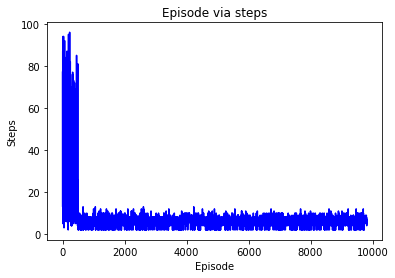

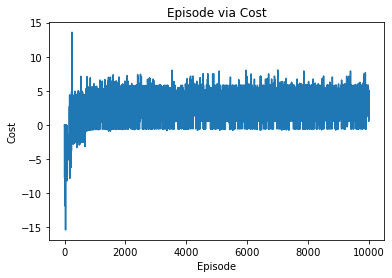

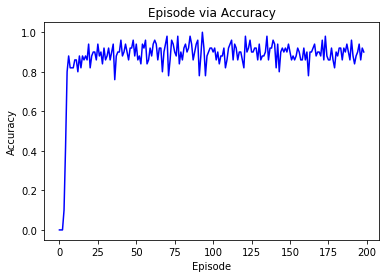

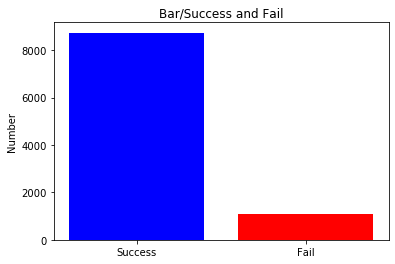

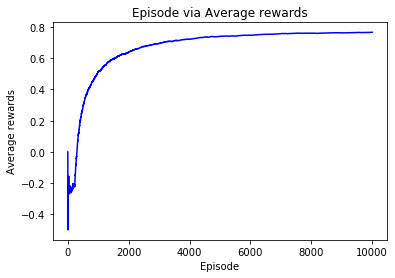

The shortest route: 6
The longest route: 96
correctness:1.0


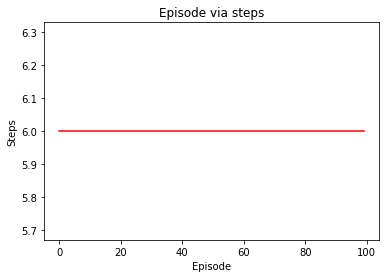

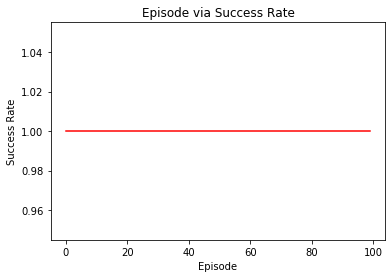

In [3]:
# First visit Monte Carlo method
import random
import numpy as np
import math
import matplotlib.pyplot as plt

from Environment import Environment
from collections import defaultdict
from Parameters import *

np.random.seed(10)



class Monte_carlo(object):
    def __init__(self, env, epsilon, gamma):
        # Variable initialization
        self.env = env
        self.n_obs = self.env.n_states
        self.n_a = self.env.n_actions

        self.epsilon = epsilon
        self.gamma = gamma
        # Variables for metrics
        self.steps = []
        self.all_cost = []
        self.accuracy = []
        self.Rewards_list = []
        self.rewards = 0
        self.positive_count = 0
        self.negative_count = 0
        self.goal_count = 0


        self.Q, self.Total_return, self.N = self.create_q_table()

    # Create a Q table
    def create_q_table(self):
        # Initialization
        # 1. Q[(s,a)]:initialize the dictionary for storing the Q values:
        # 2. Total_return[(s,a)]: initialize the dictionary for storing the total return of the state-action pair
        # 3. N[(s,a)]: initialize the dictionary for storing the count of the number of times a state-action pair is visited
        Q = defaultdict(float)
        N = defaultdict(int)
        Total_return = defaultdict(float)

        for s in range(self.n_obs):
            for a in range(self.n_a):
                Q[(s, a)] = 0.0
                Total_return[(s, a)] = 0
                N[(s, a)] = 0
        return Q, Total_return, N

    # Choose actions based on epsilon greedy policy
    def epsilon_greedy_policy(self, observation):
        """
        Define a epsilon greedy policy based on epsilon soft policy
        Argument: input observation, Q table
        Return: Action
        """
        # Sample a random number from a uniform distribution, if the number is less than
        # the value of epsilon then choose a random action, else choose the best action
        # which has the maximum Q value based on the current state
        if random.uniform(0,1) > self.epsilon:
            return np.random.randint(0,3)
        else:
            return max(list(range(self.n_a)), key = lambda x: self.Q[(observation,x)])

    # Choose actions based on optimal policy
    def optimal_policy(self, observation):
        """
        Define the optimal policy, choosing the best action which
        has the maximum Q value with the input observation

        Argument: input observation, Q table

        Return: Action
        """
        return max(list(range(self.n_a)), key = lambda x: self.Q[(observation,x)])

    # Generate a list of data for a episode
    def generate_episode(self):
        # To generate episodes/experience and store for updating Q table

        # initialize a list for storing the episode
        episode = []

        # Reset the environment and get the initial observation
        observation = self.env.reset()

        # Initialize
        steps = 0

        # Loop for each time step
        for t in range(NUM_STEPS):
            # Choose the action according to the epsilon greedy policy
            action = self.epsilon_greedy_policy(observation)

            # Perform the action the get the [next_obs, reward, info] tuple
            next_observation, reward, done, info = self.env.step(action)

            # Store the state, action, reward in the episode list
            episode.append((observation, action, reward))

            steps += 1

            # if the next state is the terminal, then break the loop
            if done:
                # Record the positive cost and negative cost
                if reward > 0:
                    self.positive_count += 1

                    self.goal_count += 1
                else:
                    self.negative_count += 1

                # Record the step
                self.steps += [steps]

                self.rewards += reward

                print("Episode finished after {} timesteps".format(t + 1))
                break

            # update time
            # else update the next observation to the current state
            observation = next_observation

        return episode

    # Updating Q(s,a) based on the First visit Monte Carlo method
    def fv_mc_prediction(self):
        # For each iteration
        for i in range(NUM_EPISODES):
            # Initialization
            cost = 0

            # Using the initialized Q table to generate an episode
            episode = self.generate_episode()

            # Get all state-action pairs in the episodes
            state_action_pairs = [(observation, action) for (observation, action, reward) in episode ]

            # Initialize the G value
            G = 0

            # Calculate the accuracy rate for every 50 steps
            if i != 0 and i % 50 == 0:
                self.goal_count = self.goal_count / 50
                self.accuracy += [self.goal_count]
                self.goal_count = 0
            # Record average rewards
            self.Rewards_list += [self.rewards / (i + 1)]

            # for each state-action pairs
            for i in range(len(episode)):
                # Calculate the return G from the end, T-1, T-2...... by G = gamma* G + R(t+1)
                observation, action, reward = episode[len(episode)-(i+1)]

                G = reward + self.gamma * G

                # Check if the state-action pair is occuring for the first time in the episode
                # #(limited by first visit MC method)
                if not (observation, reward) in state_action_pairs[:i]:
                    # update the total return of the state-action pair
                    self.Total_return[(observation, action)] += G

                    # update the number of times the state-action pair is visited
                    self.N[(observation, action)] += 1

                    # calculate the Q value for each state-action pair by taking the average
                    self.Q[(observation, action)] = self.Total_return[(observation, action)] / self.N[(observation, action)]

                # Record total cost
                cost += self.Q[(observation, action)]

            self.all_cost += [cost]

        all_cost_bar = [self.positive_count, self.negative_count]
        # Print final route
        # env.final()
        # Plot training results
        self.plot_results(self.steps, self.all_cost, self.accuracy, all_cost_bar, self.Rewards_list )

        return self.Q, self.steps, self.all_cost, self.accuracy, all_cost_bar, self.Rewards_list

    # Plot training results
    def plot_results(self, steps, all_cost, accuracy, all_cost_bar, Reward_list):
        # Plot Episodes vis steps
        plt.figure()
        plt.plot(np.arange(len(steps)), steps, 'b')
        plt.title('Episode via steps')
        plt.xlabel('Episode')
        plt.ylabel('Steps')

        # Plot Episodes via Cost
        plt.figure()
        plt.plot(np.arange(len(all_cost)), all_cost)
        plt.title('Episode via Cost')
        plt.xlabel('Episode')
        plt.ylabel('Cost')

        # Plot Episodes via Accuracy
        plt.figure()
        plt.plot(np.arange(len(accuracy)), accuracy, 'b')
        plt.title('Episode via Accuracy')
        plt.xlabel('Episode')
        plt.ylabel('Accuracy')

        # Plot Bar of Success and failure rate
        plt.figure()
        list = ['Success', 'Fail']
        color_list = ['blue', 'red']
        plt.bar(np.arange(len(all_cost_bar)), all_cost_bar, tick_label=list, color=color_list)
        plt.title('Bar/Success and Fail')
        plt.ylabel('Number')

        # Plot Episode via Average rewards
        plt.figure()
        plt.plot(np.arange(len(Reward_list)), Reward_list, 'b')
        plt.title('Episode via Average rewards')
        plt.xlabel('Episode')
        plt.ylabel('Average rewards')

        # Showing the plots
        plt.show()

    # Test after training
    def test(self):
        # run a set of episode to test the correctness of the method
        num_test = 100

        # Print route
        f = {}

        # Initialize count, and data store lists
        num_reach_goal = 0
        reward_list = []
        steps_list = []

        for i in range(num_test):
            # reset the environment
            observation = self.env.reset()

            # render the environment
            # env.render()

            for j in range(NUM_STEPS):
                # # render the environment
                # self.env.render()

                # Choose the best action based on the optimal_policy
                action = self.optimal_policy(observation)

                # perform action and get a tuple
                next_observation, reward, done, info = self.env.step(action)

                # Coordinate transformation
                y = int(math.floor(next_observation / GRID_SIZE)) * PIXELS
                x = int(next_observation % GRID_SIZE) * PIXELS
                f[j] = [x, y]

                if done:
                    if reward == 1:
                        num_reach_goal += 1
                    # While a episode terminates, record the total reward, step
                    # Then add to the list
                    r = reward
                    step = j + 1
                    reward_list += [r]
                    steps_list += [step]

                    break

                observation = next_observation

        # Print final route
        env.f = f
        env.final()

        print("correctness:{}".format(num_reach_goal/num_test))

        # Plot the test results
        plt.figure()
        plt.plot(np.arange(len(steps_list)), steps_list, 'r')
        plt.title('Episode via steps')
        plt.xlabel('Episode')
        plt.ylabel('Steps')

        #
        plt.figure()
        plt.plot(np.arange(len(reward_list)), reward_list, 'r')
        plt.title('Episode via Success Rate')
        plt.xlabel('Episode')
        plt.ylabel('Success Rate')

        # Showing the plots
        plt.show()


# Store the final Q table values
def write_Q_table(file_name, Q):
    # open data file
    filename = open(file_name, 'w')
    # write data
    for k, v in Q.items():
        filename.write(str(k) + ':' + str(v))
        filename.write('\n')
    # close file
    filename.close()


if __name__ == "__main__":
    # create a FrozenLake environment
    env = Environment()

    # Create a monte carlo agent
    monte_carlo = Monte_carlo(env, epsilon=EPSILON, gamma=GAMMA)

    # Learning and updating Q table
    Q = monte_carlo.fv_mc_prediction()

    # write_Q_table(file_name='./Q_table/monte_carlo', Q = Q)

    # Test after training
    monte_carlo.test()

    # Remain visualization
    env.mainloop()

## SARSA.py

episodes:0
episodes:1
episodes:2
episodes:3
episodes:4
episodes:5
episodes:6
episodes:7
episodes:8
episodes:9
episodes:10
episodes:11
episodes:12
episodes:13
episodes:14
episodes:15
episodes:16
episodes:17
episodes:18
episodes:19
episodes:20
episodes:21
episodes:22
episodes:23
episodes:24
episodes:25
episodes:26
episodes:27
episodes:28
episodes:29
episodes:30
episodes:31
episodes:32
episodes:33
episodes:34
episodes:35
episodes:36
episodes:37
episodes:38
episodes:39
episodes:40
episodes:41
episodes:42
episodes:43
episodes:44
episodes:45
episodes:46
episodes:47
episodes:48
episodes:49
episodes:50
episodes:51
episodes:52
episodes:53
episodes:54
episodes:55
episodes:56
episodes:57
episodes:58
episodes:59
episodes:60
episodes:61
episodes:62
episodes:63
episodes:64
episodes:65
episodes:66
episodes:67
episodes:68
episodes:69
episodes:70
episodes:71
episodes:72
episodes:73
episodes:74
episodes:75
episodes:76
episodes:77
episodes:78
episodes:79
episodes:80
episodes:81
episodes:82
episodes:83
ep

episodes:754
episodes:755
episodes:756
episodes:757
episodes:758
episodes:759
episodes:760
episodes:761
episodes:762
episodes:763
episodes:764
episodes:765
episodes:766
episodes:767
episodes:768
episodes:769
episodes:770
episodes:771
episodes:772
episodes:773
episodes:774
episodes:775
episodes:776
episodes:777
episodes:778
episodes:779
episodes:780
episodes:781
episodes:782
episodes:783
episodes:784
episodes:785
episodes:786
episodes:787
episodes:788
episodes:789
episodes:790
episodes:791
episodes:792
episodes:793
episodes:794
episodes:795
episodes:796
episodes:797
episodes:798
episodes:799
episodes:800
episodes:801
episodes:802
episodes:803
episodes:804
episodes:805
episodes:806
episodes:807
episodes:808
episodes:809
episodes:810
episodes:811
episodes:812
episodes:813
episodes:814
episodes:815
episodes:816
episodes:817
episodes:818
episodes:819
episodes:820
episodes:821
episodes:822
episodes:823
episodes:824
episodes:825
episodes:826
episodes:827
episodes:828
episodes:829
episodes:830

episodes:1506
episodes:1507
episodes:1508
episodes:1509
episodes:1510
episodes:1511
episodes:1512
episodes:1513
episodes:1514
episodes:1515
episodes:1516
episodes:1517
episodes:1518
episodes:1519
episodes:1520
episodes:1521
episodes:1522
episodes:1523
episodes:1524
episodes:1525
episodes:1526
episodes:1527
episodes:1528
episodes:1529
episodes:1530
episodes:1531
episodes:1532
episodes:1533
episodes:1534
episodes:1535
episodes:1536
episodes:1537
episodes:1538
episodes:1539
episodes:1540
episodes:1541
episodes:1542
episodes:1543
episodes:1544
episodes:1545
episodes:1546
episodes:1547
episodes:1548
episodes:1549
episodes:1550
episodes:1551
episodes:1552
episodes:1553
episodes:1554
episodes:1555
episodes:1556
episodes:1557
episodes:1558
episodes:1559
episodes:1560
episodes:1561
episodes:1562
episodes:1563
episodes:1564
episodes:1565
episodes:1566
episodes:1567
episodes:1568
episodes:1569
episodes:1570
episodes:1571
episodes:1572
episodes:1573
episodes:1574
episodes:1575
episodes:1576
episod

episodes:2134
episodes:2135
episodes:2136
episodes:2137
episodes:2138
episodes:2139
episodes:2140
episodes:2141
episodes:2142
episodes:2143
episodes:2144
episodes:2145
episodes:2146
episodes:2147
episodes:2148
episodes:2149
episodes:2150
episodes:2151
episodes:2152
episodes:2153
episodes:2154
episodes:2155
episodes:2156
episodes:2157
episodes:2158
episodes:2159
episodes:2160
episodes:2161
episodes:2162
episodes:2163
episodes:2164
episodes:2165
episodes:2166
episodes:2167
episodes:2168
episodes:2169
episodes:2170
episodes:2171
episodes:2172
episodes:2173
episodes:2174
episodes:2175
episodes:2176
episodes:2177
episodes:2178
episodes:2179
episodes:2180
episodes:2181
episodes:2182
episodes:2183
episodes:2184
episodes:2185
episodes:2186
episodes:2187
episodes:2188
episodes:2189
episodes:2190
episodes:2191
episodes:2192
episodes:2193
episodes:2194
episodes:2195
episodes:2196
episodes:2197
episodes:2198
episodes:2199
episodes:2200
episodes:2201
episodes:2202
episodes:2203
episodes:2204
episod

episodes:2811
episodes:2812
episodes:2813
episodes:2814
episodes:2815
episodes:2816
episodes:2817
episodes:2818
episodes:2819
episodes:2820
episodes:2821
episodes:2822
episodes:2823
episodes:2824
episodes:2825
episodes:2826
episodes:2827
episodes:2828
episodes:2829
episodes:2830
episodes:2831
episodes:2832
episodes:2833
episodes:2834
episodes:2835
episodes:2836
episodes:2837
episodes:2838
episodes:2839
episodes:2840
episodes:2841
episodes:2842
episodes:2843
episodes:2844
episodes:2845
episodes:2846
episodes:2847
episodes:2848
episodes:2849
episodes:2850
episodes:2851
episodes:2852
episodes:2853
episodes:2854
episodes:2855
episodes:2856
episodes:2857
episodes:2858
episodes:2859
episodes:2860
episodes:2861
episodes:2862
episodes:2863
episodes:2864
episodes:2865
episodes:2866
episodes:2867
episodes:2868
episodes:2869
episodes:2870
episodes:2871
episodes:2872
episodes:2873
episodes:2874
episodes:2875
episodes:2876
episodes:2877
episodes:2878
episodes:2879
episodes:2880
episodes:2881
episod

episodes:3515
episodes:3516
episodes:3517
episodes:3518
episodes:3519
episodes:3520
episodes:3521
episodes:3522
episodes:3523
episodes:3524
episodes:3525
episodes:3526
episodes:3527
episodes:3528
episodes:3529
episodes:3530
episodes:3531
episodes:3532
episodes:3533
episodes:3534
episodes:3535
episodes:3536
episodes:3537
episodes:3538
episodes:3539
episodes:3540
episodes:3541
episodes:3542
episodes:3543
episodes:3544
episodes:3545
episodes:3546
episodes:3547
episodes:3548
episodes:3549
episodes:3550
episodes:3551
episodes:3552
episodes:3553
episodes:3554
episodes:3555
episodes:3556
episodes:3557
episodes:3558
episodes:3559
episodes:3560
episodes:3561
episodes:3562
episodes:3563
episodes:3564
episodes:3565
episodes:3566
episodes:3567
episodes:3568
episodes:3569
episodes:3570
episodes:3571
episodes:3572
episodes:3573
episodes:3574
episodes:3575
episodes:3576
episodes:3577
episodes:3578
episodes:3579
episodes:3580
episodes:3581
episodes:3582
episodes:3583
episodes:3584
episodes:3585
episod

episodes:4257
episodes:4258
episodes:4259
episodes:4260
episodes:4261
episodes:4262
episodes:4263
episodes:4264
episodes:4265
episodes:4266
episodes:4267
episodes:4268
episodes:4269
episodes:4270
episodes:4271
episodes:4272
episodes:4273
episodes:4274
episodes:4275
episodes:4276
episodes:4277
episodes:4278
episodes:4279
episodes:4280
episodes:4281
episodes:4282
episodes:4283
episodes:4284
episodes:4285
episodes:4286
episodes:4287
episodes:4288
episodes:4289
episodes:4290
episodes:4291
episodes:4292
episodes:4293
episodes:4294
episodes:4295
episodes:4296
episodes:4297
episodes:4298
episodes:4299
episodes:4300
episodes:4301
episodes:4302
episodes:4303
episodes:4304
episodes:4305
episodes:4306
episodes:4307
episodes:4308
episodes:4309
episodes:4310
episodes:4311
episodes:4312
episodes:4313
episodes:4314
episodes:4315
episodes:4316
episodes:4317
episodes:4318
episodes:4319
episodes:4320
episodes:4321
episodes:4322
episodes:4323
episodes:4324
episodes:4325
episodes:4326
episodes:4327
episod

episodes:5035
episodes:5036
episodes:5037
episodes:5038
episodes:5039
episodes:5040
episodes:5041
episodes:5042
episodes:5043
episodes:5044
episodes:5045
episodes:5046
episodes:5047
episodes:5048
episodes:5049
episodes:5050
episodes:5051
episodes:5052
episodes:5053
episodes:5054
episodes:5055
episodes:5056
episodes:5057
episodes:5058
episodes:5059
episodes:5060
episodes:5061
episodes:5062
episodes:5063
episodes:5064
episodes:5065
episodes:5066
episodes:5067
episodes:5068
episodes:5069
episodes:5070
episodes:5071
episodes:5072
episodes:5073
episodes:5074
episodes:5075
episodes:5076
episodes:5077
episodes:5078
episodes:5079
episodes:5080
episodes:5081
episodes:5082
episodes:5083
episodes:5084
episodes:5085
episodes:5086
episodes:5087
episodes:5088
episodes:5089
episodes:5090
episodes:5091
episodes:5092
episodes:5093
episodes:5094
episodes:5095
episodes:5096
episodes:5097
episodes:5098
episodes:5099
episodes:5100
episodes:5101
episodes:5102
episodes:5103
episodes:5104
episodes:5105
episod

episodes:5812
episodes:5813
episodes:5814
episodes:5815
episodes:5816
episodes:5817
episodes:5818
episodes:5819
episodes:5820
episodes:5821
episodes:5822
episodes:5823
episodes:5824
episodes:5825
episodes:5826
episodes:5827
episodes:5828
episodes:5829
episodes:5830
episodes:5831
episodes:5832
episodes:5833
episodes:5834
episodes:5835
episodes:5836
episodes:5837
episodes:5838
episodes:5839
episodes:5840
episodes:5841
episodes:5842
episodes:5843
episodes:5844
episodes:5845
episodes:5846
episodes:5847
episodes:5848
episodes:5849
episodes:5850
episodes:5851
episodes:5852
episodes:5853
episodes:5854
episodes:5855
episodes:5856
episodes:5857
episodes:5858
episodes:5859
episodes:5860
episodes:5861
episodes:5862
episodes:5863
episodes:5864
episodes:5865
episodes:5866
episodes:5867
episodes:5868
episodes:5869
episodes:5870
episodes:5871
episodes:5872
episodes:5873
episodes:5874
episodes:5875
episodes:5876
episodes:5877
episodes:5878
episodes:5879
episodes:5880
episodes:5881
episodes:5882
episod

episodes:6588
episodes:6589
episodes:6590
episodes:6591
episodes:6592
episodes:6593
episodes:6594
episodes:6595
episodes:6596
episodes:6597
episodes:6598
episodes:6599
episodes:6600
episodes:6601
episodes:6602
episodes:6603
episodes:6604
episodes:6605
episodes:6606
episodes:6607
episodes:6608
episodes:6609
episodes:6610
episodes:6611
episodes:6612
episodes:6613
episodes:6614
episodes:6615
episodes:6616
episodes:6617
episodes:6618
episodes:6619
episodes:6620
episodes:6621
episodes:6622
episodes:6623
episodes:6624
episodes:6625
episodes:6626
episodes:6627
episodes:6628
episodes:6629
episodes:6630
episodes:6631
episodes:6632
episodes:6633
episodes:6634
episodes:6635
episodes:6636
episodes:6637
episodes:6638
episodes:6639
episodes:6640
episodes:6641
episodes:6642
episodes:6643
episodes:6644
episodes:6645
episodes:6646
episodes:6647
episodes:6648
episodes:6649
episodes:6650
episodes:6651
episodes:6652
episodes:6653
episodes:6654
episodes:6655
episodes:6656
episodes:6657
episodes:6658
episod

episodes:7370
episodes:7371
episodes:7372
episodes:7373
episodes:7374
episodes:7375
episodes:7376
episodes:7377
episodes:7378
episodes:7379
episodes:7380
episodes:7381
episodes:7382
episodes:7383
episodes:7384
episodes:7385
episodes:7386
episodes:7387
episodes:7388
episodes:7389
episodes:7390
episodes:7391
episodes:7392
episodes:7393
episodes:7394
episodes:7395
episodes:7396
episodes:7397
episodes:7398
episodes:7399
episodes:7400
episodes:7401
episodes:7402
episodes:7403
episodes:7404
episodes:7405
episodes:7406
episodes:7407
episodes:7408
episodes:7409
episodes:7410
episodes:7411
episodes:7412
episodes:7413
episodes:7414
episodes:7415
episodes:7416
episodes:7417
episodes:7418
episodes:7419
episodes:7420
episodes:7421
episodes:7422
episodes:7423
episodes:7424
episodes:7425
episodes:7426
episodes:7427
episodes:7428
episodes:7429
episodes:7430
episodes:7431
episodes:7432
episodes:7433
episodes:7434
episodes:7435
episodes:7436
episodes:7437
episodes:7438
episodes:7439
episodes:7440
episod

episodes:8156
episodes:8157
episodes:8158
episodes:8159
episodes:8160
episodes:8161
episodes:8162
episodes:8163
episodes:8164
episodes:8165
episodes:8166
episodes:8167
episodes:8168
episodes:8169
episodes:8170
episodes:8171
episodes:8172
episodes:8173
episodes:8174
episodes:8175
episodes:8176
episodes:8177
episodes:8178
episodes:8179
episodes:8180
episodes:8181
episodes:8182
episodes:8183
episodes:8184
episodes:8185
episodes:8186
episodes:8187
episodes:8188
episodes:8189
episodes:8190
episodes:8191
episodes:8192
episodes:8193
episodes:8194
episodes:8195
episodes:8196
episodes:8197
episodes:8198
episodes:8199
episodes:8200
episodes:8201
episodes:8202
episodes:8203
episodes:8204
episodes:8205
episodes:8206
episodes:8207
episodes:8208
episodes:8209
episodes:8210
episodes:8211
episodes:8212
episodes:8213
episodes:8214
episodes:8215
episodes:8216
episodes:8217
episodes:8218
episodes:8219
episodes:8220
episodes:8221
episodes:8222
episodes:8223
episodes:8224
episodes:8225
episodes:8226
episod

episodes:8881
episodes:8882
episodes:8883
episodes:8884
episodes:8885
episodes:8886
episodes:8887
episodes:8888
episodes:8889
episodes:8890
episodes:8891
episodes:8892
episodes:8893
episodes:8894
episodes:8895
episodes:8896
episodes:8897
episodes:8898
episodes:8899
episodes:8900
episodes:8901
episodes:8902
episodes:8903
episodes:8904
episodes:8905
episodes:8906
episodes:8907
episodes:8908
episodes:8909
episodes:8910
episodes:8911
episodes:8912
episodes:8913
episodes:8914
episodes:8915
episodes:8916
episodes:8917
episodes:8918
episodes:8919
episodes:8920
episodes:8921
episodes:8922
episodes:8923
episodes:8924
episodes:8925
episodes:8926
episodes:8927
episodes:8928
episodes:8929
episodes:8930
episodes:8931
episodes:8932
episodes:8933
episodes:8934
episodes:8935
episodes:8936
episodes:8937
episodes:8938
episodes:8939
episodes:8940
episodes:8941
episodes:8942
episodes:8943
episodes:8944
episodes:8945
episodes:8946
episodes:8947
episodes:8948
episodes:8949
episodes:8950
episodes:8951
episod

episodes:9585
episodes:9586
episodes:9587
episodes:9588
episodes:9589
episodes:9590
episodes:9591
episodes:9592
episodes:9593
episodes:9594
episodes:9595
episodes:9596
episodes:9597
episodes:9598
episodes:9599
episodes:9600
episodes:9601
episodes:9602
episodes:9603
episodes:9604
episodes:9605
episodes:9606
episodes:9607
episodes:9608
episodes:9609
episodes:9610
episodes:9611
episodes:9612
episodes:9613
episodes:9614
episodes:9615
episodes:9616
episodes:9617
episodes:9618
episodes:9619
episodes:9620
episodes:9621
episodes:9622
episodes:9623
episodes:9624
episodes:9625
episodes:9626
episodes:9627
episodes:9628
episodes:9629
episodes:9630
episodes:9631
episodes:9632
episodes:9633
episodes:9634
episodes:9635
episodes:9636
episodes:9637
episodes:9638
episodes:9639
episodes:9640
episodes:9641
episodes:9642
episodes:9643
episodes:9644
episodes:9645
episodes:9646
episodes:9647
episodes:9648
episodes:9649
episodes:9650
episodes:9651
episodes:9652
episodes:9653
episodes:9654
episodes:9655
episod

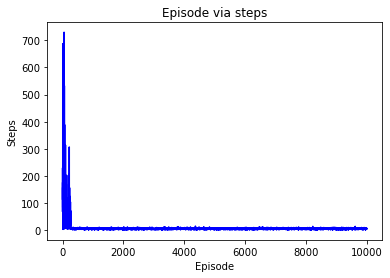

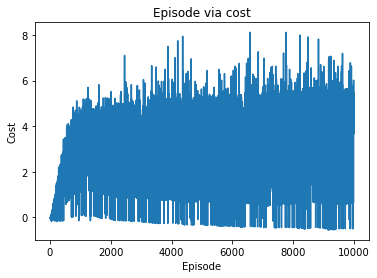

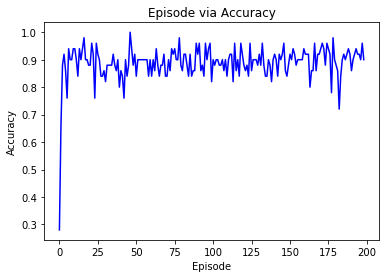

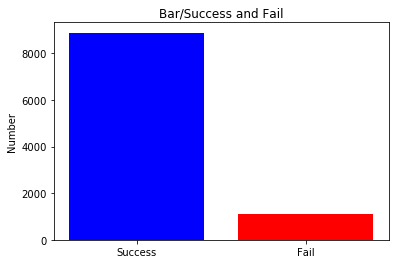

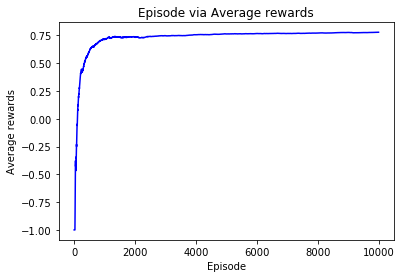

The shortest route: 6
The longest route: 532
correctness:1.0


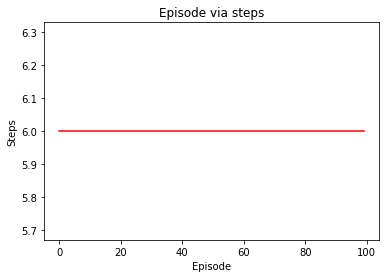

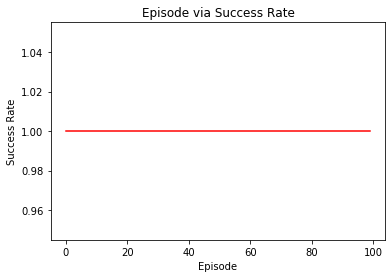

In [4]:
# SARSA
import random
import numpy as np
import math
import matplotlib.pyplot as plt

from Environment import Environment
from Parameters import *

# set the constant random seed
np.random.seed(1)


class SARSA(object):
    def __init__(self, env, learning_rate, gamma, epsilon):
        self.env = env
        self.n_obs = self.env.n_states
        self.n_a = self.env.n_actions

        # Hyper parameters
        self.lr = learning_rate
        self.gamma = gamma
        self.epsilon = epsilon

        self.Q = self.create_Q_table()

    # Create a Q table
    def create_Q_table(self):
        self.Q = {}
        for s in range(self.n_obs):
            for a in range(self.n_a):
                self.Q[(s, a)] = 0.0

        return self.Q

    # Choose actions based on epsilon greedy policy
    def epsilon_greedy(self, state):
        """
        Define a epsilon greedy policy based on epsilon soft policy
        Argument: input observation, Q table
        Return: Action
        """
        # Set the epsilon value(hyper-parameter)
        if random.uniform(0, 1) > self.epsilon:
            return random.randint(0, 3)
        else:
            return max(list(range(self.n_a)), key=lambda x: self.Q[(state, x)])

    # Choose actions based on optimal greedy policy
    def optimal_policy(self, observation):
        """
        Define the optimal policy, choosing the best action which
        has the maximum Q value with the input observation

        Argument: input observation, Q table

        Return: Action
        """

        return max(list(range(self.n_a)), key=lambda x: self.Q[(observation, x)])

    # Compute the optimal policy using the SARSA update rules as :
    # Q(s,a) = Q(s,a) + alpha *(r+gamma*Q(s',a')-Q(s,a))
    def train(self):
        # Resulted list for the plotting Episodes via Steps
        steps = []
        # Summed costs for all episodes in resulted list
        all_costs = []
        # Resulted list for accuracy rate
        accuracy = []
        # List for average rewards
        Reward_list = []
        # List for Q value
        Q_value = {}

        # Initialize the counts
        goal_count = 0
        rewards = 0
        positive_count = 0
        negative_count = 0

        #for each episode
        for i in range(NUM_EPISODES):
            # reset the environment and get initial observation
            observation = self.env.reset()

            # select a action according to the epsilon greedy policy
            action = self.epsilon_greedy(observation)

            # Updating number of Steps for each Episode
            step = 0

            # Updating the cost for each episode
            cost = 0

            # Calculate the accuracy rate for every 50 steps
            if i != 0 and i % 50 == 0:
                goal_count = goal_count / 50
                accuracy += [goal_count]
                goal_count = 0

            # Record Q value for specific grid for checking converging
            if i != 0 and i % 1000 == 0:
                Q_value[i] = []
                for j in range(self.env.n_actions):
                    Q_value[i].append(self.Q[((self.env.n_states-2), j)])

            # For each step
            while True:
                # perform the selected action and get the tuple
                next_observation, reward, done, info = self.env.step(action)

                # choose the next step action using the epsilon greedy policy
                next_action = self.epsilon_greedy(next_observation)

                # Calculate the Q value of the state-action pair
                # SARSA specifies unique next action based on epsilon greedy policy(different from q-learning)
                self.Q[(observation, action)] += self.lr * (reward + self.gamma * self.Q[(next_observation, next_action)] - self.Q[(observation, action)])

                # calculating the cost
                cost += self.Q[(observation, action)]

                # Calculating number of Steps in the current Episode
                step += 1

                # if the current state is the terminal state then break:
                if done:
                    # Record the positive cost and negative cost
                    if reward > 0:
                        positive_count += 1
                    else:
                        negative_count += 1

                    # Record the step
                    steps += [step]

                    # Record the cost
                    all_costs += [cost]

                    # Goal count +1, if reaching the goal
                    if reward == 1:
                        goal_count += 1

                    # Record average rewards
                    rewards += reward
                    Reward_list += [rewards / (i+1)]

                    break

                # update next state to current state
                observation = next_observation

                # update next action to current action
                action = next_action

            print("episodes:{}".format(i))

        # See if converge
        print("Q_value：{}".format(Q_value))

        # Record the data to the list
        all_cost_bar = [positive_count, negative_count]

        # Print final route
        # env.final()

        # Print results
        self.plot_results(steps, all_costs, accuracy, all_cost_bar, Reward_list)

        return self.Q, steps, all_costs, accuracy, all_cost_bar, Reward_list

    # Plotting the training results
    def plot_results(self, steps, cost, accuracy, all_cost_bar, Reward_list):
        #
        plt.figure()
        plt.plot(np.arange(len(steps)), steps, 'b')
        plt.title('Episode via steps')
        plt.xlabel('Episode')
        plt.ylabel('Steps')

        #
        plt.figure()
        plt.plot(np.arange(len(cost)), cost)
        plt.title('Episode via cost')
        plt.xlabel('Episode')
        plt.ylabel('Cost')

        #
        plt.figure()
        plt.plot(np.arange(len(accuracy)), accuracy, 'b')
        plt.title('Episode via Accuracy')
        plt.xlabel('Episode')
        plt.ylabel('Accuracy')

        #
        plt.figure()
        list = ['Success', 'Fail']
        color_list = ['blue', 'red']
        plt.bar(np.arange(len(all_cost_bar)), all_cost_bar, tick_label=list, color= color_list)
        plt.title('Bar/Success and Fail')
        plt.ylabel('Number')

        plt.figure()
        plt.plot(np.arange(len(Reward_list)), Reward_list, 'b')
        plt.title('Episode via Average rewards')
        plt.xlabel('Episode')
        plt.ylabel('Average rewards')

        # Showing the plots
        plt.show()

    # Test after training
    def test(self):
        # Test for 100 episodes
        num_test = 100

        # Print route
        f = {}

        # Initialize count, and data store lists
        num_find_goal = 0
        reward_list = []
        steps_list = []

        # run 100 episode to test the correctness of the method
        for i in range(num_test):
            # resert the environment
            observation = self.env.reset()

            for j in range(NUM_STEPS):
                # # render the environment
                # env.render()

                # Choose the best action based on the optimal_policy
                action = self.optimal_policy(observation)

                # perform action and get a tuple
                next_observation, reward, done, info = self.env.step(action)

                # Coordinate transformation
                y = int(math.floor(next_observation / GRID_SIZE)) * PIXELS
                x = int(next_observation % GRID_SIZE) * PIXELS
                f[j] = [x, y]

                if done:
                    # Record the number of goal reaching
                    if reward == 1:
                        num_find_goal += 1
                    # While a episode terminates, record the total reward, step
                    # Then add to the list
                    r = reward
                    step = j + 1
                    reward_list += [r]
                    steps_list += [step]

                    break

                observation = next_observation

        # Print final route
        self.env.f = f
        self.env.final()

        print("correctness:{}".format(num_find_goal / num_test))

        #
        plt.figure()
        plt.plot(np.arange(len(steps_list)), steps_list, 'r')
        plt.title('Episode via steps')
        plt.xlabel('Episode')
        plt.ylabel('Steps')

        #
        plt.figure()
        plt.plot(np.arange(len(reward_list)), reward_list, 'r')
        plt.title('Episode via Success Rate')
        plt.xlabel('Episode')
        plt.ylabel('Success Rate')

        # Showing the plots
        plt.show()


# Store the final Q table values
def write_Q_table(file_name, Q):
    # open data file
    filename = open(file_name, 'w')
    # write data
    for k, v in Q.items():
        filename.write(str(k) + ':' + str(v))
        filename.write('\n')
    # close file
    filename.close()



if __name__ == '__main__':
    # create a FrozenLake environment
    env = Environment()

    # Create a SARSA agent
    SARSA = SARSA(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

    # write_Q_table(file_name='./Q_table/SARSA', Q = Q)

    # Learning and updating
    SARSA.train()

    # Test after training
    SARSA.test()

    # Remain visualization
    env.mainloop()


## Q_learning.py

episode:0
episode:1
episode:2
episode:3
episode:4
episode:5
episode:6
episode:7
episode:8
episode:9
episode:10
episode:11
episode:12
episode:13
episode:14
episode:15
episode:16
episode:17
episode:18
episode:19
episode:20
episode:21
episode:22
episode:23
episode:24
episode:25
episode:26
episode:27
episode:28
episode:29
episode:30
episode:31
episode:32
episode:33
episode:34
episode:35
episode:36
episode:37
episode:38
episode:39
episode:40
episode:41
episode:42
episode:43
episode:44
episode:45
episode:46
episode:47
episode:48
episode:49
episode:50
episode:51
episode:52
episode:53
episode:54
episode:55
episode:56
episode:57
episode:58
episode:59
episode:60
episode:61
episode:62
episode:63
episode:64
episode:65
episode:66
episode:67
episode:68
episode:69
episode:70
episode:71
episode:72
episode:73
episode:74
episode:75
episode:76
episode:77
episode:78
episode:79
episode:80
episode:81
episode:82
episode:83
episode:84
episode:85
episode:86
episode:87
episode:88
episode:89
episode:90
episode:9

episode:716
episode:717
episode:718
episode:719
episode:720
episode:721
episode:722
episode:723
episode:724
episode:725
episode:726
episode:727
episode:728
episode:729
episode:730
episode:731
episode:732
episode:733
episode:734
episode:735
episode:736
episode:737
episode:738
episode:739
episode:740
episode:741
episode:742
episode:743
episode:744
episode:745
episode:746
episode:747
episode:748
episode:749
episode:750
episode:751
episode:752
episode:753
episode:754
episode:755
episode:756
episode:757
episode:758
episode:759
episode:760
episode:761
episode:762
episode:763
episode:764
episode:765
episode:766
episode:767
episode:768
episode:769
episode:770
episode:771
episode:772
episode:773
episode:774
episode:775
episode:776
episode:777
episode:778
episode:779
episode:780
episode:781
episode:782
episode:783
episode:784
episode:785
episode:786
episode:787
episode:788
episode:789
episode:790
episode:791
episode:792
episode:793
episode:794
episode:795
episode:796
episode:797
episode:798
epis

episode:2015
episode:2016
episode:2017
episode:2018
episode:2019
episode:2020
episode:2021
episode:2022
episode:2023
episode:2024
episode:2025
episode:2026
episode:2027
episode:2028
episode:2029
episode:2030
episode:2031
episode:2032
episode:2033
episode:2034
episode:2035
episode:2036
episode:2037
episode:2038
episode:2039
episode:2040
episode:2041
episode:2042
episode:2043
episode:2044
episode:2045
episode:2046
episode:2047
episode:2048
episode:2049
episode:2050
episode:2051
episode:2052
episode:2053
episode:2054
episode:2055
episode:2056
episode:2057
episode:2058
episode:2059
episode:2060
episode:2061
episode:2062
episode:2063
episode:2064
episode:2065
episode:2066
episode:2067
episode:2068
episode:2069
episode:2070
episode:2071
episode:2072
episode:2073
episode:2074
episode:2075
episode:2076
episode:2077
episode:2078
episode:2079
episode:2080
episode:2081
episode:2082
episode:2083
episode:2084
episode:2085
episode:2086
episode:2087
episode:2088
episode:2089
episode:2090
episode:2091

episode:2660
episode:2661
episode:2662
episode:2663
episode:2664
episode:2665
episode:2666
episode:2667
episode:2668
episode:2669
episode:2670
episode:2671
episode:2672
episode:2673
episode:2674
episode:2675
episode:2676
episode:2677
episode:2678
episode:2679
episode:2680
episode:2681
episode:2682
episode:2683
episode:2684
episode:2685
episode:2686
episode:2687
episode:2688
episode:2689
episode:2690
episode:2691
episode:2692
episode:2693
episode:2694
episode:2695
episode:2696
episode:2697
episode:2698
episode:2699
episode:2700
episode:2701
episode:2702
episode:2703
episode:2704
episode:2705
episode:2706
episode:2707
episode:2708
episode:2709
episode:2710
episode:2711
episode:2712
episode:2713
episode:2714
episode:2715
episode:2716
episode:2717
episode:2718
episode:2719
episode:2720
episode:2721
episode:2722
episode:2723
episode:2724
episode:2725
episode:2726
episode:2727
episode:2728
episode:2729
episode:2730
episode:2731
episode:2732
episode:2733
episode:2734
episode:2735
episode:2736

episode:3305
episode:3306
episode:3307
episode:3308
episode:3309
episode:3310
episode:3311
episode:3312
episode:3313
episode:3314
episode:3315
episode:3316
episode:3317
episode:3318
episode:3319
episode:3320
episode:3321
episode:3322
episode:3323
episode:3324
episode:3325
episode:3326
episode:3327
episode:3328
episode:3329
episode:3330
episode:3331
episode:3332
episode:3333
episode:3334
episode:3335
episode:3336
episode:3337
episode:3338
episode:3339
episode:3340
episode:3341
episode:3342
episode:3343
episode:3344
episode:3345
episode:3346
episode:3347
episode:3348
episode:3349
episode:3350
episode:3351
episode:3352
episode:3353
episode:3354
episode:3355
episode:3356
episode:3357
episode:3358
episode:3359
episode:3360
episode:3361
episode:3362
episode:3363
episode:3364
episode:3365
episode:3366
episode:3367
episode:3368
episode:3369
episode:3370
episode:3371
episode:3372
episode:3373
episode:3374
episode:3375
episode:3376
episode:3377
episode:3378
episode:3379
episode:3380
episode:3381

episode:3939
episode:3940
episode:3941
episode:3942
episode:3943
episode:3944
episode:3945
episode:3946
episode:3947
episode:3948
episode:3949
episode:3950
episode:3951
episode:3952
episode:3953
episode:3954
episode:3955
episode:3956
episode:3957
episode:3958
episode:3959
episode:3960
episode:3961
episode:3962
episode:3963
episode:3964
episode:3965
episode:3966
episode:3967
episode:3968
episode:3969
episode:3970
episode:3971
episode:3972
episode:3973
episode:3974
episode:3975
episode:3976
episode:3977
episode:3978
episode:3979
episode:3980
episode:3981
episode:3982
episode:3983
episode:3984
episode:3985
episode:3986
episode:3987
episode:3988
episode:3989
episode:3990
episode:3991
episode:3992
episode:3993
episode:3994
episode:3995
episode:3996
episode:3997
episode:3998
episode:3999
episode:4000
episode:4001
episode:4002
episode:4003
episode:4004
episode:4005
episode:4006
episode:4007
episode:4008
episode:4009
episode:4010
episode:4011
episode:4012
episode:4013
episode:4014
episode:4015

episode:4585
episode:4586
episode:4587
episode:4588
episode:4589
episode:4590
episode:4591
episode:4592
episode:4593
episode:4594
episode:4595
episode:4596
episode:4597
episode:4598
episode:4599
episode:4600
episode:4601
episode:4602
episode:4603
episode:4604
episode:4605
episode:4606
episode:4607
episode:4608
episode:4609
episode:4610
episode:4611
episode:4612
episode:4613
episode:4614
episode:4615
episode:4616
episode:4617
episode:4618
episode:4619
episode:4620
episode:4621
episode:4622
episode:4623
episode:4624
episode:4625
episode:4626
episode:4627
episode:4628
episode:4629
episode:4630
episode:4631
episode:4632
episode:4633
episode:4634
episode:4635
episode:4636
episode:4637
episode:4638
episode:4639
episode:4640
episode:4641
episode:4642
episode:4643
episode:4644
episode:4645
episode:4646
episode:4647
episode:4648
episode:4649
episode:4650
episode:4651
episode:4652
episode:4653
episode:4654
episode:4655
episode:4656
episode:4657
episode:4658
episode:4659
episode:4660
episode:4661

episode:5224
episode:5225
episode:5226
episode:5227
episode:5228
episode:5229
episode:5230
episode:5231
episode:5232
episode:5233
episode:5234
episode:5235
episode:5236
episode:5237
episode:5238
episode:5239
episode:5240
episode:5241
episode:5242
episode:5243
episode:5244
episode:5245
episode:5246
episode:5247
episode:5248
episode:5249
episode:5250
episode:5251
episode:5252
episode:5253
episode:5254
episode:5255
episode:5256
episode:5257
episode:5258
episode:5259
episode:5260
episode:5261
episode:5262
episode:5263
episode:5264
episode:5265
episode:5266
episode:5267
episode:5268
episode:5269
episode:5270
episode:5271
episode:5272
episode:5273
episode:5274
episode:5275
episode:5276
episode:5277
episode:5278
episode:5279
episode:5280
episode:5281
episode:5282
episode:5283
episode:5284
episode:5285
episode:5286
episode:5287
episode:5288
episode:5289
episode:5290
episode:5291
episode:5292
episode:5293
episode:5294
episode:5295
episode:5296
episode:5297
episode:5298
episode:5299
episode:5300

episode:5856
episode:5857
episode:5858
episode:5859
episode:5860
episode:5861
episode:5862
episode:5863
episode:5864
episode:5865
episode:5866
episode:5867
episode:5868
episode:5869
episode:5870
episode:5871
episode:5872
episode:5873
episode:5874
episode:5875
episode:5876
episode:5877
episode:5878
episode:5879
episode:5880
episode:5881
episode:5882
episode:5883
episode:5884
episode:5885
episode:5886
episode:5887
episode:5888
episode:5889
episode:5890
episode:5891
episode:5892
episode:5893
episode:5894
episode:5895
episode:5896
episode:5897
episode:5898
episode:5899
episode:5900
episode:5901
episode:5902
episode:5903
episode:5904
episode:5905
episode:5906
episode:5907
episode:5908
episode:5909
episode:5910
episode:5911
episode:5912
episode:5913
episode:5914
episode:5915
episode:5916
episode:5917
episode:5918
episode:5919
episode:5920
episode:5921
episode:5922
episode:5923
episode:5924
episode:5925
episode:5926
episode:5927
episode:5928
episode:5929
episode:5930
episode:5931
episode:5932

episode:6509
episode:6510
episode:6511
episode:6512
episode:6513
episode:6514
episode:6515
episode:6516
episode:6517
episode:6518
episode:6519
episode:6520
episode:6521
episode:6522
episode:6523
episode:6524
episode:6525
episode:6526
episode:6527
episode:6528
episode:6529
episode:6530
episode:6531
episode:6532
episode:6533
episode:6534
episode:6535
episode:6536
episode:6537
episode:6538
episode:6539
episode:6540
episode:6541
episode:6542
episode:6543
episode:6544
episode:6545
episode:6546
episode:6547
episode:6548
episode:6549
episode:6550
episode:6551
episode:6552
episode:6553
episode:6554
episode:6555
episode:6556
episode:6557
episode:6558
episode:6559
episode:6560
episode:6561
episode:6562
episode:6563
episode:6564
episode:6565
episode:6566
episode:6567
episode:6568
episode:6569
episode:6570
episode:6571
episode:6572
episode:6573
episode:6574
episode:6575
episode:6576
episode:6577
episode:6578
episode:6579
episode:6580
episode:6581
episode:6582
episode:6583
episode:6584
episode:6585

episode:7151
episode:7152
episode:7153
episode:7154
episode:7155
episode:7156
episode:7157
episode:7158
episode:7159
episode:7160
episode:7161
episode:7162
episode:7163
episode:7164
episode:7165
episode:7166
episode:7167
episode:7168
episode:7169
episode:7170
episode:7171
episode:7172
episode:7173
episode:7174
episode:7175
episode:7176
episode:7177
episode:7178
episode:7179
episode:7180
episode:7181
episode:7182
episode:7183
episode:7184
episode:7185
episode:7186
episode:7187
episode:7188
episode:7189
episode:7190
episode:7191
episode:7192
episode:7193
episode:7194
episode:7195
episode:7196
episode:7197
episode:7198
episode:7199
episode:7200
episode:7201
episode:7202
episode:7203
episode:7204
episode:7205
episode:7206
episode:7207
episode:7208
episode:7209
episode:7210
episode:7211
episode:7212
episode:7213
episode:7214
episode:7215
episode:7216
episode:7217
episode:7218
episode:7219
episode:7220
episode:7221
episode:7222
episode:7223
episode:7224
episode:7225
episode:7226
episode:7227

episode:7794
episode:7795
episode:7796
episode:7797
episode:7798
episode:7799
episode:7800
episode:7801
episode:7802
episode:7803
episode:7804
episode:7805
episode:7806
episode:7807
episode:7808
episode:7809
episode:7810
episode:7811
episode:7812
episode:7813
episode:7814
episode:7815
episode:7816
episode:7817
episode:7818
episode:7819
episode:7820
episode:7821
episode:7822
episode:7823
episode:7824
episode:7825
episode:7826
episode:7827
episode:7828
episode:7829
episode:7830
episode:7831
episode:7832
episode:7833
episode:7834
episode:7835
episode:7836
episode:7837
episode:7838
episode:7839
episode:7840
episode:7841
episode:7842
episode:7843
episode:7844
episode:7845
episode:7846
episode:7847
episode:7848
episode:7849
episode:7850
episode:7851
episode:7852
episode:7853
episode:7854
episode:7855
episode:7856
episode:7857
episode:7858
episode:7859
episode:7860
episode:7861
episode:7862
episode:7863
episode:7864
episode:7865
episode:7866
episode:7867
episode:7868
episode:7869
episode:7870

episode:8440
episode:8441
episode:8442
episode:8443
episode:8444
episode:8445
episode:8446
episode:8447
episode:8448
episode:8449
episode:8450
episode:8451
episode:8452
episode:8453
episode:8454
episode:8455
episode:8456
episode:8457
episode:8458
episode:8459
episode:8460
episode:8461
episode:8462
episode:8463
episode:8464
episode:8465
episode:8466
episode:8467
episode:8468
episode:8469
episode:8470
episode:8471
episode:8472
episode:8473
episode:8474
episode:8475
episode:8476
episode:8477
episode:8478
episode:8479
episode:8480
episode:8481
episode:8482
episode:8483
episode:8484
episode:8485
episode:8486
episode:8487
episode:8488
episode:8489
episode:8490
episode:8491
episode:8492
episode:8493
episode:8494
episode:8495
episode:8496
episode:8497
episode:8498
episode:8499
episode:8500
episode:8501
episode:8502
episode:8503
episode:8504
episode:8505
episode:8506
episode:8507
episode:8508
episode:8509
episode:8510
episode:8511
episode:8512
episode:8513
episode:8514
episode:8515
episode:8516

episode:9075
episode:9076
episode:9077
episode:9078
episode:9079
episode:9080
episode:9081
episode:9082
episode:9083
episode:9084
episode:9085
episode:9086
episode:9087
episode:9088
episode:9089
episode:9090
episode:9091
episode:9092
episode:9093
episode:9094
episode:9095
episode:9096
episode:9097
episode:9098
episode:9099
episode:9100
episode:9101
episode:9102
episode:9103
episode:9104
episode:9105
episode:9106
episode:9107
episode:9108
episode:9109
episode:9110
episode:9111
episode:9112
episode:9113
episode:9114
episode:9115
episode:9116
episode:9117
episode:9118
episode:9119
episode:9120
episode:9121
episode:9122
episode:9123
episode:9124
episode:9125
episode:9126
episode:9127
episode:9128
episode:9129
episode:9130
episode:9131
episode:9132
episode:9133
episode:9134
episode:9135
episode:9136
episode:9137
episode:9138
episode:9139
episode:9140
episode:9141
episode:9142
episode:9143
episode:9144
episode:9145
episode:9146
episode:9147
episode:9148
episode:9149
episode:9150
episode:9151

episode:9717
episode:9718
episode:9719
episode:9720
episode:9721
episode:9722
episode:9723
episode:9724
episode:9725
episode:9726
episode:9727
episode:9728
episode:9729
episode:9730
episode:9731
episode:9732
episode:9733
episode:9734
episode:9735
episode:9736
episode:9737
episode:9738
episode:9739
episode:9740
episode:9741
episode:9742
episode:9743
episode:9744
episode:9745
episode:9746
episode:9747
episode:9748
episode:9749
episode:9750
episode:9751
episode:9752
episode:9753
episode:9754
episode:9755
episode:9756
episode:9757
episode:9758
episode:9759
episode:9760
episode:9761
episode:9762
episode:9763
episode:9764
episode:9765
episode:9766
episode:9767
episode:9768
episode:9769
episode:9770
episode:9771
episode:9772
episode:9773
episode:9774
episode:9775
episode:9776
episode:9777
episode:9778
episode:9779
episode:9780
episode:9781
episode:9782
episode:9783
episode:9784
episode:9785
episode:9786
episode:9787
episode:9788
episode:9789
episode:9790
episode:9791
episode:9792
episode:9793

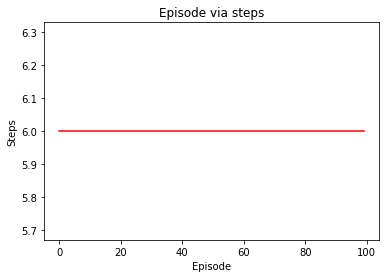

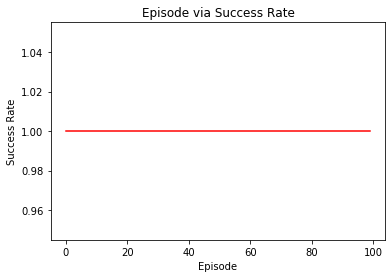

In [5]:
# Q learning
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from Environment import Environment
from Parameters import *


np.random.seed(1)


class Q_learning(object):
    def __init__(self, env, learning_rate, gamma, epsilon):
        # Class environment
        self.env = env
        # List of actions
        self.actions = list(range(self.env.n_actions))
        # Learning rate
        self.lr = learning_rate
        # Value of gamma
        self.gamma = gamma
        # Value of epsilon
        self.epsilon = epsilon
        # Creating full Q-table for all cells
        self.q_table = pd.DataFrame(columns=self.actions)
        # Creating Q-table for cells of the final route
        self.q_table_final = pd.DataFrame(columns=self.actions)

    # Adding to the Q-table new states
    def check_state_validation(self, state):
        if state not in self.q_table.index:
            self.q_table = self.q_table.append(
                pd.Series(
                    [0] * len(self.actions),
                    index=self.q_table.columns,
                    name=state,
                )
            )

        # Function for choosing the action for the agent

    # Choose valid actoins
    def epsilon_greedy_policy(self, observation):
        self.check_state_validation(observation)
        # action selection
        if np.random.uniform() < self.epsilon:
            # choose best action
            state_action = self.q_table.loc[observation, :]
            # some actions may have the same value, randomly choose on in these actions
            action = np.random.choice(state_action[state_action == np.max(state_action)].index)
        else:
            # choose random action
            action = np.random.choice(self.actions)
        return action

    # Function for learning and updating Q-table with new knowledge
    def learn(self, state, action, reward, next_state):
        # Checking if the next step exists in the Q-table
        self.check_state_validation(next_state)

        # Current state in the current position
        q_predict = self.q_table.loc[state, action]

        # Calculate the q target value according to update rules
        q_target = reward + self.gamma * self.q_table.loc[next_state, :].max()

        # Updating Q-table
        self.q_table.loc[state, action] += self.lr * (q_target - q_predict)

        return self.q_table.loc[state, action]

    # Train for updating the Q table
    def train(self):
        # Resulted list for the plotting Episodes via Steps
        steps = []
        # Resulted list for the plotting Episodes via cost
        all_costs = []
        # Resulted list for the plotting Episodes via average accuracy
        accuracy = []
        # List for average rewards
        Reward_list = []
        # List for Q value
        Q_value = {}

        # Initialize variable
        goal_count = 0
        rewards = 0
        positive_count = 0
        negative_count = 0

        for i in range(NUM_EPISODES):
            # Initial Observation
            observation = self.env.reset()

            # Initialize step count
            step = 0

            # Initialize cost count
            cost = 0

            # Calculate the accuracy for every 50 steps
            if i != 0 and i % 50 == 0:
                goal_count = goal_count / 50
                accuracy += [goal_count]
                goal_count = 0

            # Record Q value for specific grid for checking converging
            if i != 0 and i % 1000 == 0:
                Q_value[i] = []
                for j in range(self.env.n_actions):
                    Q_value[i].append(self.q_table.loc[str(14), j])

            while True:
                # Render environment
                #self.env.render()

                # RL chooses action based on epsilon greedy policy
                action = self.epsilon_greedy_policy(str(observation))

                # Takes an action and get the next observation and reward
                observation_, reward, done, info = self.env.step(action)

                # learns from this transition and calculating the cost
                cost += self.learn(str(observation), action, reward, str(observation_))

                # Swapping the observations - current and next
                observation = observation_

                # Count the number of Steps in the current Episode
                step += 1

                # Break while loop when it is the end of current Episode
                # When agent reached the goal or obstacle
                if done:
                    # Record the positive cost and negative cost
                    if reward > 0:
                        positive_count += 1
                    else:
                        negative_count += 1

                    # Record the step
                    steps += [step]

                    # Record the cost
                    all_costs += [cost]

                    # goal count +1, if reaching the goal
                    if reward == 1:
                        goal_count += 1

                    # Record total rewards to calculate average rewards
                    rewards += reward
                    Reward_list += [rewards / (i + 1)]

                    break

            print('episode:{}'.format(i))

        # See if converge
        print("Q_value：{}".format(Q_value))

        # Record the data to the list
        all_cost_bar = [positive_count, negative_count]

        # Showing the final route
        # self.env.final()

        # # Showing the Q-table with values for each action
        self.print_q_table()

        # # Plotting the results
        # self.plot_results(steps, all_costs, accuracy, all_cost_bar, Reward_list)

        return self.q_table, steps, all_costs, accuracy, all_cost_bar, Reward_list

    # Printing the Q-table with states
    def print_q_table(self):
        # Getting the coordinates of final route from env.py
        e = self.env.final_states()

        # Comparing the indexes with coordinates and writing in the new Q-table values
        for i in range(len(e)):
            state = str(e[i])
            # Going through all indexes and checking
            for j in range(len(self.q_table.index)):
                if self.q_table.index[j] == state:
                    self.q_table_final.loc[state, :] = self.q_table.loc[state, :]

        print()
        print('Length of full Q-table =', len(self.q_table.index))
        print('Full Q-table:')
        print(self.q_table)

    # plot training results
    def plot_results(self, steps, cost, accuracy, all_cost_bar, Reward_list):

        #
        f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
        #
        ax1.plot(np.arange(len(steps)), steps, 'b')
        ax1.set_xlabel('Episode')
        ax1.set_ylabel('Steps')
        ax1.set_title('Episode via steps')

        #
        ax2.plot(np.arange(len(cost)), cost, 'b')
        ax2.set_xlabel('Episode')
        ax2.set_ylabel('Cost')
        ax2.set_title('Episode via cost')

        #
        ax3.plot(np.arange(len(accuracy)), accuracy, 'b')
        ax3.set_xlabel('Episode')
        ax3.set_ylabel('Accuracy')
        ax3.set_title('Episode via Accuracy')

        plt.tight_layout()  # Function to make distance between figures

        #
        plt.figure()
        plt.plot(np.arange(len(steps)), steps, 'b')
        plt.title('Episode via steps')
        plt.xlabel('Episode')
        plt.ylabel('Steps')

               #
        plt.figure()
        plt.plot(np.arange(len(cost)), cost, 'r')
        plt.title('Episode via cost')
        plt.xlabel('Episode')
        plt.ylabel('Cost')

        #
        plt.figure()
        plt.plot(np.arange(len(accuracy)), accuracy, 'r')
        plt.title('Episode via Accuracy')
        plt.xlabel('Episode')
        plt.ylabel('Accuracy')

        plt.figure()
        list = ['Success', 'Fail']
        color_list = ['blue', 'red']
        plt.bar(np.arange(len(all_cost_bar)), all_cost_bar, tick_label=list, color=color_list)
        plt.title('Bar/Success and Fail')
        plt.ylabel('Number')

        plt.figure()
        plt.plot(np.arange(len(Reward_list)), Reward_list, 'b')
        plt.title('Episode via Average rewards')
        plt.xlabel('Episode')
        plt.ylabel('Average rewards')

        # Showing the plots
        plt.show()

    # Test after training
    def test(self):
        # Test for 100 episodes
        num_test = 100

        # Print route
        f = {}

        # Initialize count, and data store lists
        num_find_goal = 0
        reward_list = []
        steps_list = []

        # run 100 episode to test the correctness of the method
        for i in range(num_test):
             # resert the environment
            observation = self.env.reset()

            for j in range(NUM_STEPS):
                # render the environment
                # self.env.render()

                # Choose the best action based on the optimal_policy
                state_action = self.q_table.loc[str(observation), :]
                action = np.random.choice(state_action[state_action == np.max(state_action)].index)

                # perform action and get a tuple
                next_observation, reward, done, info = self.env.step(action)

                # Coordinate transformation
                y = int(math.floor(next_observation / GRID_SIZE)) * PIXELS
                x = int(next_observation % GRID_SIZE) * PIXELS
                f[j] = [x, y]

                if done:
                    # Record the number of goal reaching
                    if reward ==1:
                        num_find_goal += 1

                    # While a episode terminates, record the total reward, step
                    # Then add to the list
                    r = reward
                    step = j+1
                    reward_list += [r]
                    steps_list += [step]

                    break

                observation = next_observation

        # Print final route
        self.env.f = f
        self.env.final()

        print("correctness:{}".format(num_find_goal/num_test))

        # Plot results
        plt.figure()
        plt.plot(np.arange(len(steps_list)), steps_list, 'r')
        plt.title('Episode via steps')
        plt.xlabel('Episode')
        plt.ylabel('Steps')

        #
        plt.figure()
        plt.plot(np.arange(len(reward_list)), reward_list, 'r')
        plt.title('Episode via Success Rate')
        plt.xlabel('Episode')
        plt.ylabel('Success Rate')

        # Showing the plots
        plt.show()



# Commands to be implemented after running this file
if __name__ == "__main__":
    # Create an environment
    env = Environment()

    # Create a q learning agent
    Q_learning = Q_learning(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

    # Learning and updating
    Q_table = Q_learning.train()

    # Test after training
    Q_learning.test()

    # Remain visualization
    env.mainloop()

## Test.py 

episode:0
episode:1
episode:2
episode:3
episode:4
episode:5
episode:6
episode:7
episode:8
episode:9
episode:10
episode:11
episode:12
episode:13
episode:14
episode:15
episode:16
episode:17
episode:18
episode:19
episode:20
episode:21
episode:22
episode:23
episode:24
episode:25
episode:26
episode:27
episode:28
episode:29
episode:30
episode:31
episode:32
episode:33
episode:34
episode:35
episode:36
episode:37
episode:38
episode:39
episode:40
episode:41
episode:42
episode:43
episode:44
episode:45
episode:46
episode:47
episode:48
episode:49
episode:50
episode:51
episode:52
episode:53
episode:54
episode:55
episode:56
episode:57
episode:58
episode:59
episode:60
episode:61
episode:62
episode:63
episode:64
episode:65
episode:66
episode:67
episode:68
episode:69
episode:70
episode:71
episode:72
episode:73
episode:74
episode:75
episode:76
episode:77
episode:78
episode:79
episode:80
episode:81
episode:82
episode:83
episode:84
episode:85
episode:86
episode:87
episode:88
episode:89
episode:90
episode:9

episode:703
episode:704
episode:705
episode:706
episode:707
episode:708
episode:709
episode:710
episode:711
episode:712
episode:713
episode:714
episode:715
episode:716
episode:717
episode:718
episode:719
episode:720
episode:721
episode:722
episode:723
episode:724
episode:725
episode:726
episode:727
episode:728
episode:729
episode:730
episode:731
episode:732
episode:733
episode:734
episode:735
episode:736
episode:737
episode:738
episode:739
episode:740
episode:741
episode:742
episode:743
episode:744
episode:745
episode:746
episode:747
episode:748
episode:749
episode:750
episode:751
episode:752
episode:753
episode:754
episode:755
episode:756
episode:757
episode:758
episode:759
episode:760
episode:761
episode:762
episode:763
episode:764
episode:765
episode:766
episode:767
episode:768
episode:769
episode:770
episode:771
episode:772
episode:773
episode:774
episode:775
episode:776
episode:777
episode:778
episode:779
episode:780
episode:781
episode:782
episode:783
episode:784
episode:785
epis

episode:321
episode:322
episode:323
episode:324
episode:325
episode:326
episode:327
episode:328
episode:329
episode:330
episode:331
episode:332
episode:333
episode:334
episode:335
episode:336
episode:337
episode:338
episode:339
episode:340
episode:341
episode:342
episode:343
episode:344
episode:345
episode:346
episode:347
episode:348
episode:349
episode:350
episode:351
episode:352
episode:353
episode:354
episode:355
episode:356
episode:357
episode:358
episode:359
episode:360
episode:361
episode:362
episode:363
episode:364
episode:365
episode:366
episode:367
episode:368
episode:369
episode:370
episode:371
episode:372
episode:373
episode:374
episode:375
episode:376
episode:377
episode:378
episode:379
episode:380
episode:381
episode:382
episode:383
episode:384
episode:385
episode:386
episode:387
episode:388
episode:389
episode:390
episode:391
episode:392
episode:393
episode:394
episode:395
episode:396
episode:397
episode:398
episode:399
episode:400
episode:401
episode:402
episode:403
epis

episode:1
episode:2
episode:3
episode:4
episode:5
episode:6
episode:7
episode:8
episode:9
episode:10
episode:11
episode:12
episode:13
episode:14
episode:15
episode:16
episode:17
episode:18
episode:19
episode:20
episode:21
episode:22
episode:23
episode:24
episode:25
episode:26
episode:27
episode:28
episode:29
episode:30
episode:31
episode:32
episode:33
episode:34
episode:35
episode:36
episode:37
episode:38
episode:39
episode:40
episode:41
episode:42
episode:43
episode:44
episode:45
episode:46
episode:47
episode:48
episode:49
episode:50
episode:51
episode:52
episode:53
episode:54
episode:55
episode:56
episode:57
episode:58
episode:59
episode:60
episode:61
episode:62
episode:63
episode:64
episode:65
episode:66
episode:67
episode:68
episode:69
episode:70
episode:71
episode:72
episode:73
episode:74
episode:75
episode:76
episode:77
episode:78
episode:79
episode:80
episode:81
episode:82
episode:83
episode:84
episode:85
episode:86
episode:87
episode:88
episode:89
episode:90
episode:91
episode:

episode:699
episode:700
episode:701
episode:702
episode:703
episode:704
episode:705
episode:706
episode:707
episode:708
episode:709
episode:710
episode:711
episode:712
episode:713
episode:714
episode:715
episode:716
episode:717
episode:718
episode:719
episode:720
episode:721
episode:722
episode:723
episode:724
episode:725
episode:726
episode:727
episode:728
episode:729
episode:730
episode:731
episode:732
episode:733
episode:734
episode:735
episode:736
episode:737
episode:738
episode:739
episode:740
episode:741
episode:742
episode:743
episode:744
episode:745
episode:746
episode:747
episode:748
episode:749
episode:750
episode:751
episode:752
episode:753
episode:754
episode:755
episode:756
episode:757
episode:758
episode:759
episode:760
episode:761
episode:762
episode:763
episode:764
episode:765
episode:766
episode:767
episode:768
episode:769
episode:770
episode:771
episode:772
episode:773
episode:774
episode:775
episode:776
episode:777
episode:778
episode:779
episode:780
episode:781
epis

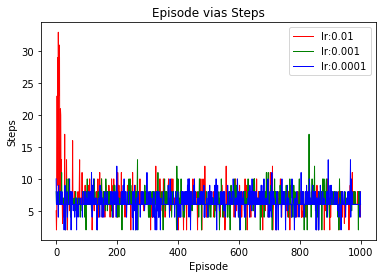

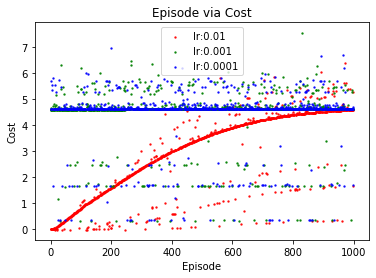

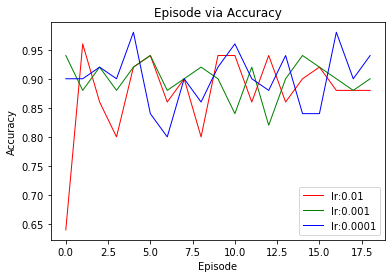

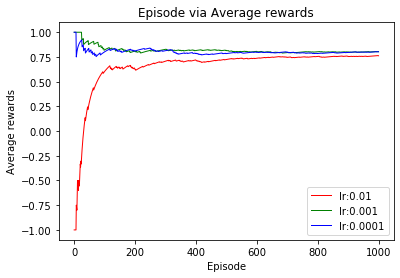

In [3]:
# Test
import numpy as np
import matplotlib.pyplot as plt

from Environment import Environment
from Parameters import *
from First_visit_Monte_carlo_control import Monte_carlo
from SARSA import SARSA
from Q_learning import  Q_learning

np.random.seed(1)

# Define line plot functions
# Episodes via steps
def plot_steps(steps, label):
    plt.figure()
    plt.plot(np.arange(len(steps[0])), steps[0], 'r', label =label[0], linewidth=1)
    plt.plot(np.arange(len(steps[1])), steps[1], 'g', label =label[1], linewidth=1)
    plt.plot(np.arange(len(steps[2])), steps[2], 'b', label =label[2], linewidth=1)
    plt.title('Episode vias Steps')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.legend(loc='best')
    plt.show()

# Episodes via Costs
def plot_all_cost(all_cost, label):
    plt.figure()
    plt.plot(np.arange(len(all_cost[0])), all_cost[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(all_cost[1])), all_cost[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(all_cost[2])), all_cost[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Cost')
    plt.xlabel('Episode')
    plt.ylabel('Cost')
    plt.legend(loc='best')
    plt.show()

# Episodes via Accuracy
def plot_accuracy(accuracy, label):
    plt.figure()
    plt.plot(np.arange(len(accuracy[0])), accuracy[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(accuracy[1])), accuracy[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(accuracy[2])), accuracy[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Accuracy')
    plt.xlabel('Episode')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

# Episodes via Average Rewards
def plot_average_rewards(Reward_list, label):
    plt.figure()
    plt.plot(np.arange(len(Reward_list[0])), Reward_list[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(Reward_list[1])), Reward_list[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(Reward_list[2])), Reward_list[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Average rewards')
    plt.xlabel('Episode')
    plt.ylabel('Average rewards')
    plt.legend(loc='best')
    plt.show()


# Define scatter plot functions
def plot_steps_scatter(steps, label):
    plt.figure()
    plt.scatter(np.arange(len(steps[0])), steps[0], alpha=0.8, s=1.5, c='r', label =label[0])
    plt.scatter(np.arange(len(steps[1])), steps[1], alpha=0.8, s=1.5, c='g', label =label[1])
    plt.scatter(np.arange(len(steps[2])), steps[2], alpha=0.8, s=1.5, c='b', label =label[2])
    plt.title('Episode via Steps')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.legend(loc='best')
    plt.show()


def plot_all_cost_scatter(all_cost, label):
    plt.figure()
    plt.scatter(np.arange(len(all_cost[0])), all_cost[0], label=label[0], alpha=0.8, s=2, c='r')
    plt.scatter(np.arange(len(all_cost[1])), all_cost[1], label=label[1], alpha=0.8, s=2, c='g')
    plt.scatter(np.arange(len(all_cost[2])), all_cost[2], label=label[2], alpha=0.8, s=2, c='b')
    plt.title('Episode via Cost')
    plt.xlabel('Episode')
    plt.ylabel('Cost')
    plt.legend(loc='best')
    plt.show()


def plot_accuracy_scatter(accuracy, label):
    plt.figure()
    plt.scatter(np.arange(len(accuracy[0])), accuracy[0], alpha=0.8, s=1.5, c='r', label=label[0])
    plt.scatter(np.arange(len(accuracy[1])), accuracy[1], alpha=0.8, s=1.5, c='g', label=label[1])
    plt.scatter(np.arange(len(accuracy[2])), accuracy[2], alpha=0.8, s=1.5, c='b', label=label[2])
    plt.title('Episode via Accuracy')
    plt.xlabel('Episode')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()


def plot_average_rewards_scatter(Reward_list, label):
    plt.figure()
    plt.scatter(np.arange(len(Reward_list[0])), Reward_list[0], alpha=0.8, s=1.5, c='r', label=label[0])
    plt.scatter(np.arange(len(Reward_list[1])), Reward_list[1], alpha=0.8, s=1.5, c='g', label=label[1])
    plt.scatter(np.arange(len(Reward_list[2])), Reward_list[2], alpha=0.8, s=1.5, c='b', label=label[2])
    plt.title('Episode via Average rewards')
    plt.xlabel('Episode')
    plt.ylabel('Average rewards')
    plt.legend(loc='best')
    plt.show()


if __name__ == '__main__':
    # Job 0, 4x4 frozen lake environment training, correctness test, and comparison test
    if Job == 0:
        NUM_EPISODES = 10000

        GRID_SIZE = 4

        env = Environment()
        # Create three agents corresponding to three algorithms
        Monte_carlo = Monte_carlo(env, epsilon=EPSILON, gamma=GAMMA)

        SARSA = SARSA(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

        Q_learning = Q_learning(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

        label_1 = ['Monte_carlo', 'SARSA', 'Q_learning']

        Q_1, steps_1, all_cost_1, accuracy_1, all_cost_bar_1, Rewards_list_1  = Monte_carlo.fv_mc_prediction()


        Q_2, steps_2, all_cost_2, accuracy_2, all_cost_bar_2, Rewards_list_2 = SARSA.train()


        Q_3, steps_3, all_cost_3, accuracy_3, all_cost_bar_3, Rewards_list_3 = Q_learning.train()

        steps = [steps_1, steps_2, steps_3]

        all_cost = [all_cost_1, all_cost_2, all_cost_3]

        accuracy = [accuracy_1, accuracy_2, accuracy_3]

        Rewards_list = [Rewards_list_1, Rewards_list_2, Rewards_list_3]

        plot_steps(steps, label_1)

        plot_all_cost_scatter(all_cost, label_1)

        plot_accuracy(accuracy, label_1)

        plot_average_rewards(Rewards_list, label_1)

    # Job 1, 10X10 frozen lake environment training, correctness test, and comparison test
    if Job == 1:
        NUM_EPISODES = 100000

        GRID_SIZE = 10

        env = Environment()
        # Create three agents corresponding to three algorithms
        Monte_carlo = Monte_carlo(env, epsilon=EPSILON, gamma=GAMMA)

        SARSA = SARSA(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

        Q_learning = Q_learning(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)


        label_1 = ['Monte_carlo', 'SARSA', 'Q_learning']

        Q_1, steps_1, all_cost_1, accuracy_1, all_cost_bar_1, Rewards_list_1  = Monte_carlo.fv_mc_prediction()


        Q_2, steps_2, all_cost_2, accuracy_2, all_cost_bar_2, Rewards_list_2 = SARSA.train()


        Q_3, steps_3, all_cost_3, accuracy_3, all_cost_bar_3, Rewards_list_3 = Q_learning.train()

        steps = [steps_1, steps_2, steps_3]

        all_cost = [all_cost_1, all_cost_2, all_cost_3]

        accuracy = [accuracy_1, accuracy_2, accuracy_3]

        Rewards_list = [Rewards_list_1, Rewards_list_2, Rewards_list_3]

        plot_steps(steps, label_1)

        plot_all_cost_scatter(all_cost, label_1)

        plot_accuracy(accuracy, label_1)

        plot_average_rewards(Rewards_list, label_1)

    # Job 2, comparison test for different learning rate value settings
    if Job == 2:
        env = Environment()

        label_2 = ['lr:0.01', 'lr:0.001', 'lr:0.0001']

        Q_learning = Q_learning(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

        Q_learning.lr = 0.01

        Q_1, steps_1, all_cost_1, accuracy_1, all_cost_bar_1, Rewards_list_1 = Q_learning.train()

        Q_learning.lr = 0.001

        Q_2, steps_2, all_cost_2, accuracy_2, all_cost_bar_2, Rewards_list_2 = Q_learning.train()

        Q_learning.lr = 0.0001

        Q_3, steps_3, all_cost_3, accuracy_3, all_cost_bar_3, Rewards_list_3 = Q_learning.train()

        steps = [steps_1, steps_2, steps_3]

        all_cost = [all_cost_1, all_cost_2, all_cost_3]

        accuracy = [accuracy_1, accuracy_2, accuracy_3]

        Rewards_list = [Rewards_list_1, Rewards_list_2, Rewards_list_3]

        plot_steps(steps, label_2)

        plot_all_cost_scatter(all_cost, label_2)

        plot_accuracy(accuracy, label_2)

        plot_average_rewards(Rewards_list, label_2)

    # Job 3, comparison test for different gamma value settings
    if Job == 3:
        env = Environment()

        label_3 = ['gamma:0.8', 'gamma:0.9', 'gamma:0.99']

        Q_learning = Q_learning(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

        Q_learning.gamma = 0.8
        Q_1, steps_1, all_cost_1, accuracy_1, all_cost_bar_1, Rewards_list_1  =  Q_learning.train()

        Q_learning.gamma = 0.9
        Q_2, steps_2, all_cost_2, accuracy_2, all_cost_bar_2, Rewards_list_2 =  Q_learning.train()

        Q_learning.gamma = 0.99
        Q_3, steps_3, all_cost_3, accuracy_3, all_cost_bar_3, Rewards_list_3 = Q_learning.train()

        steps = [steps_1, steps_2, steps_3]

        all_cost = [all_cost_1, all_cost_2, all_cost_3]

        accuracy = [accuracy_1, accuracy_2, accuracy_3]

        Rewards_list = [Rewards_list_1, Rewards_list_2, Rewards_list_3]

        plot_steps(steps, label_3)

        plot_all_cost_scatter(all_cost, label_3)

        plot_accuracy(accuracy, label_3)

        plot_average_rewards(Rewards_list, label_3)

    # Job 4, comparison test for different epsilon value settings
    if Job == 4:
        env = Environment()

        label_4 = ['epsilon:0.7', 'epsilon:0.8', 'epsilon:0.9']

        Q_learning = Q_learning(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

        Q_learning.epsilon = 0.7
        Q_1, steps_1, all_cost_1, accuracy_1, all_cost_bar_1, Rewards_list_1 = Q_learning.train()

        Q_learning.epsilon = 0.8
        Q_2, steps_2, all_cost_2, accuracy_2, all_cost_bar_2, Rewards_list_2 = Q_learning.train()

        Q_learning.epsilon = 0.9
        Q_3, steps_3, all_cost_3, accuracy_3, all_cost_bar_3, Rewards_list_3 = Q_learning.train()

        steps = [steps_1, steps_2, steps_3]

        all_cost = [all_cost_1, all_cost_2, all_cost_3]

        accuracy = [accuracy_1, accuracy_2, accuracy_3]

        Rewards_list = [Rewards_list_1, Rewards_list_2, Rewards_list_3]

        plot_steps(steps, label_4)

        plot_all_cost_scatter(all_cost, label_4)

        plot_accuracy(accuracy, label_4)

        plot_average_rewards(Rewards_list, label_4)




## Parameters.py

In [1]:
# Environment parameters
PIXELS        = 40          # pixels
GRID_SIZE     = 4           # Size of environment 4/10
ENV_HEIGHT    = GRID_SIZE   # grid height
ENV_WIDTH     = GRID_SIZE   # grid width


# Training parameters
NUM_STEPS     = 100
NUM_EPISODES  = 10000
LEARNING_RATE = 0.01
GAMMA         = 0.9
EPSILON       = 0.9


# Test parameters
"""
Job = 0 - 4x4 training comparision test
Job = 1 - 10x10 training comparision test
Job = 2 - Learning rate comparision test
Job = 3 - Gamma comparision test
Job = 4 - Epsilon comparision test
"""
Job           = 2


# Experiments

* ### 4x4 frozen lake/Monte Carolo mtehod Results
* ### 10x10 frozen lake/Monte Carolo mtehod
* ### 4X4 frozen lake/SARSA Results
* ### 10x10 frozen lake/SARSA Results
* ### 4X4 frozen lake/ Q learning Results
* ### 10x10 frozen lake/Q learning Results
* ### 4x4/10x10 frozen lake problem comparision test for Monte Carlo/SARSA/Q learning
* ### 4x4 frozen lake problem/ comparison test for different Learning rate
* ### 4x4 frozen lake problem/ comparison test for Discount factor
* ### 4x4 frozen lake problem/ comparison test for Epsilon

## 4x4 frozen lake/Monte Carolo mtehod Results

Episode finished after 77 timesteps
Episode finished after 29 timesteps
Episode finished after 91 timesteps
Episode finished after 14 timesteps
Episode finished after 17 timesteps
Episode finished after 30 timesteps
Episode finished after 91 timesteps
Episode finished after 13 timesteps
Episode finished after 59 timesteps
Episode finished after 26 timesteps
Episode finished after 33 timesteps
Episode finished after 29 timesteps
Episode finished after 45 timesteps
Episode finished after 85 timesteps
Episode finished after 54 timesteps
Episode finished after 93 timesteps
Episode finished after 91 timesteps
Episode finished after 77 timesteps
Episode finished after 42 timesteps
Episode finished after 47 timesteps
Episode finished after 7 timesteps
Episode finished after 60 timesteps
Episode finished after 19 timesteps
Episode finished after 72 timesteps
Episode finished after 69 timesteps
Episode finished after 85 timesteps
Episode finished after 80 timesteps
Episode finished after 47 tim

Episode finished after 11 timesteps
Episode finished after 48 timesteps
Episode finished after 33 timesteps
Episode finished after 53 timesteps
Episode finished after 9 timesteps
Episode finished after 19 timesteps
Episode finished after 55 timesteps
Episode finished after 68 timesteps
Episode finished after 13 timesteps
Episode finished after 31 timesteps
Episode finished after 16 timesteps
Episode finished after 8 timesteps
Episode finished after 49 timesteps
Episode finished after 20 timesteps
Episode finished after 9 timesteps
Episode finished after 17 timesteps
Episode finished after 27 timesteps
Episode finished after 10 timesteps
Episode finished after 32 timesteps
Episode finished after 17 timesteps
Episode finished after 19 timesteps
Episode finished after 17 timesteps
Episode finished after 12 timesteps
Episode finished after 10 timesteps
Episode finished after 28 timesteps
Episode finished after 15 timesteps
Episode finished after 23 timesteps
Episode finished after 8 timest

Episode finished after 49 timesteps
Episode finished after 10 timesteps
Episode finished after 19 timesteps
Episode finished after 12 timesteps
Episode finished after 22 timesteps
Episode finished after 10 timesteps
Episode finished after 24 timesteps
Episode finished after 9 timesteps
Episode finished after 34 timesteps
Episode finished after 6 timesteps
Episode finished after 14 timesteps
Episode finished after 15 timesteps
Episode finished after 21 timesteps
Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 11 timesteps
Episode finished after 14 timesteps
Episode finished after 22 timesteps
Episode finished after 18 timesteps
Episode finished after 21 timesteps
Episode finished after 12 timesteps
Episode finished after 17 timesteps
Episode finished after 23 timesteps
Episode finished after 10 timesteps
Episode finished after 26 timesteps
Episode finished after 7 timesteps
Episode finished after 65 timesteps
Episode finished after 21 timeste

Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 9 timesteps
Episode finished after 3 timesteps
Episode finished after 7 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 3 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 7 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 2 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 3 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 5 timesteps
Episode finished after 3 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 7 timesteps
Episode finished after 10 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished af

Episode finished after 7 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 5 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 11 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished af

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 3 timesteps
Episode finished after 3 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 10 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 10 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished a

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 12 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 3 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished af

Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 4 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 8 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 10 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished af

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 7 timesteps
Episode finished after 3 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 7 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 7 timesteps
Episode finished after 7 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 3 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 10 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 8 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished af

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 5 timesteps
Episode finished after 6 timesteps
Episode finished after 3 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished aft

Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 9 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 6 timesteps
Episode finished aft

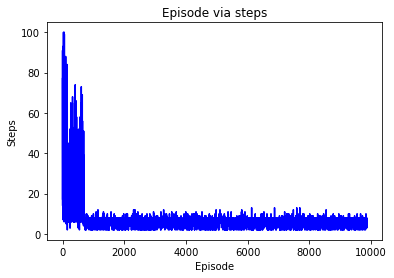

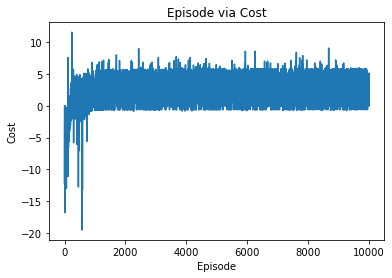

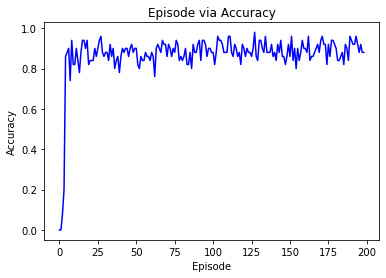

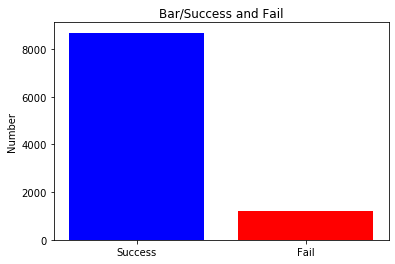

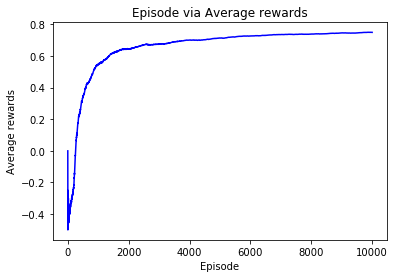

The shortest route: 6
The longest route: 99
correctness:1.0


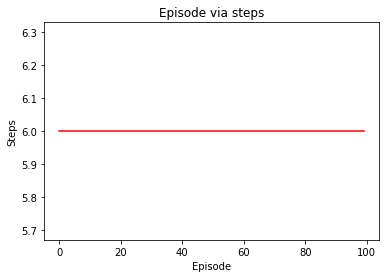

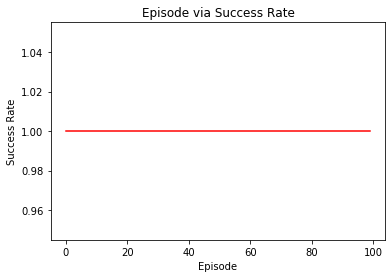

In [1]:
# 4x4 frozen lake/Monte Carolo mtehod
import random
import numpy as np
import math
import matplotlib.pyplot as plt

from Environment import Environment
from collections import defaultdict

from First_visit_Monte_carlo_control import Monte_carlo


np.random.seed(10)

# create a FrozenLake environment
env = Environment()

env.grid_size = 4

# Create a monte carlo agent
monte_carlo = Monte_carlo(env, epsilon=EPSILON, gamma=GAMMA)

# Learning and updating Q table
Q, steps, all_cost, accuracy, all_cost_bar, Reward_list = monte_carlo.fv_mc_prediction()

# write_Q_table(file_name='./Q_table/monte_carlo', Q = Q)
monte_carlo.plot_results(steps, all_cost, accuracy, all_cost_bar, Reward_list)

# Test after training
monte_carlo.test()

# Remain visualization
env.mainloop()

## 10x10 frozen lake/Monte Carolo mtehod

In [ ]:
# 10x10 frozen lake/Monte Carolo mtehod
import random
import numpy as np
import math
import matplotlib.pyplot as plt

from Environment import Environment
from collections import defaultdict

from First_visit_Monte_carlo_control import Monte_carlo

# Training parameters
NUM_STEPS     = 100
NUM_EPISODES  = 10000
LEARNING_RATE = 0.01
GAMMA         = 0.9
EPSILON       = 0.9

np.random.seed(10)

# create a FrozenLake environment
env = Environment()

env.grid_size = 10

# Create a monte carlo agent
monte_carlo = Monte_carlo(env, epsilon=EPSILON, gamma=GAMMA)

# Learning and updating Q table
Q, steps, all_cost, accuracy, all_cost_bar, Reward_list = monte_carlo.fv_mc_prediction()

# write_Q_table(file_name='./Q_table/monte_carlo', Q = Q)
monte_carlo.plot_results(steps, all_cost, accuracy, all_cost_bar, Reward_list)

# Test after training
monte_carlo.test()

# Remain visualization
env.mainloop()

## 4X4 frozen lake/SARSA Results

episodes:0
episodes:1
episodes:2
episodes:3
episodes:4
episodes:5
episodes:6
episodes:7
episodes:8
episodes:9
episodes:10
episodes:11
episodes:12
episodes:13
episodes:14
episodes:15
episodes:16
episodes:17
episodes:18
episodes:19
episodes:20
episodes:21
episodes:22
episodes:23
episodes:24
episodes:25
episodes:26
episodes:27
episodes:28
episodes:29
episodes:30
episodes:31
episodes:32
episodes:33
episodes:34
episodes:35
episodes:36
episodes:37
episodes:38
episodes:39
episodes:40
episodes:41
episodes:42
episodes:43
episodes:44
episodes:45
episodes:46
episodes:47
episodes:48
episodes:49
episodes:50
episodes:51
episodes:52
episodes:53
episodes:54
episodes:55
episodes:56
episodes:57
episodes:58
episodes:59
episodes:60
episodes:61
episodes:62
episodes:63
episodes:64
episodes:65
episodes:66
episodes:67
episodes:68
episodes:69
episodes:70
episodes:71
episodes:72
episodes:73
episodes:74
episodes:75
episodes:76
episodes:77
episodes:78
episodes:79
episodes:80
episodes:81
episodes:82
episodes:83
ep

episodes:658
episodes:659
episodes:660
episodes:661
episodes:662
episodes:663
episodes:664
episodes:665
episodes:666
episodes:667
episodes:668
episodes:669
episodes:670
episodes:671
episodes:672
episodes:673
episodes:674
episodes:675
episodes:676
episodes:677
episodes:678
episodes:679
episodes:680
episodes:681
episodes:682
episodes:683
episodes:684
episodes:685
episodes:686
episodes:687
episodes:688
episodes:689
episodes:690
episodes:691
episodes:692
episodes:693
episodes:694
episodes:695
episodes:696
episodes:697
episodes:698
episodes:699
episodes:700
episodes:701
episodes:702
episodes:703
episodes:704
episodes:705
episodes:706
episodes:707
episodes:708
episodes:709
episodes:710
episodes:711
episodes:712
episodes:713
episodes:714
episodes:715
episodes:716
episodes:717
episodes:718
episodes:719
episodes:720
episodes:721
episodes:722
episodes:723
episodes:724
episodes:725
episodes:726
episodes:727
episodes:728
episodes:729
episodes:730
episodes:731
episodes:732
episodes:733
episodes:734

episodes:1409
episodes:1410
episodes:1411
episodes:1412
episodes:1413
episodes:1414
episodes:1415
episodes:1416
episodes:1417
episodes:1418
episodes:1419
episodes:1420
episodes:1421
episodes:1422
episodes:1423
episodes:1424
episodes:1425
episodes:1426
episodes:1427
episodes:1428
episodes:1429
episodes:1430
episodes:1431
episodes:1432
episodes:1433
episodes:1434
episodes:1435
episodes:1436
episodes:1437
episodes:1438
episodes:1439
episodes:1440
episodes:1441
episodes:1442
episodes:1443
episodes:1444
episodes:1445
episodes:1446
episodes:1447
episodes:1448
episodes:1449
episodes:1450
episodes:1451
episodes:1452
episodes:1453
episodes:1454
episodes:1455
episodes:1456
episodes:1457
episodes:1458
episodes:1459
episodes:1460
episodes:1461
episodes:1462
episodes:1463
episodes:1464
episodes:1465
episodes:1466
episodes:1467
episodes:1468
episodes:1469
episodes:1470
episodes:1471
episodes:1472
episodes:1473
episodes:1474
episodes:1475
episodes:1476
episodes:1477
episodes:1478
episodes:1479
episod

episodes:2032
episodes:2033
episodes:2034
episodes:2035
episodes:2036
episodes:2037
episodes:2038
episodes:2039
episodes:2040
episodes:2041
episodes:2042
episodes:2043
episodes:2044
episodes:2045
episodes:2046
episodes:2047
episodes:2048
episodes:2049
episodes:2050
episodes:2051
episodes:2052
episodes:2053
episodes:2054
episodes:2055
episodes:2056
episodes:2057
episodes:2058
episodes:2059
episodes:2060
episodes:2061
episodes:2062
episodes:2063
episodes:2064
episodes:2065
episodes:2066
episodes:2067
episodes:2068
episodes:2069
episodes:2070
episodes:2071
episodes:2072
episodes:2073
episodes:2074
episodes:2075
episodes:2076
episodes:2077
episodes:2078
episodes:2079
episodes:2080
episodes:2081
episodes:2082
episodes:2083
episodes:2084
episodes:2085
episodes:2086
episodes:2087
episodes:2088
episodes:2089
episodes:2090
episodes:2091
episodes:2092
episodes:2093
episodes:2094
episodes:2095
episodes:2096
episodes:2097
episodes:2098
episodes:2099
episodes:2100
episodes:2101
episodes:2102
episod

episodes:2684
episodes:2685
episodes:2686
episodes:2687
episodes:2688
episodes:2689
episodes:2690
episodes:2691
episodes:2692
episodes:2693
episodes:2694
episodes:2695
episodes:2696
episodes:2697
episodes:2698
episodes:2699
episodes:2700
episodes:2701
episodes:2702
episodes:2703
episodes:2704
episodes:2705
episodes:2706
episodes:2707
episodes:2708
episodes:2709
episodes:2710
episodes:2711
episodes:2712
episodes:2713
episodes:2714
episodes:2715
episodes:2716
episodes:2717
episodes:2718
episodes:2719
episodes:2720
episodes:2721
episodes:2722
episodes:2723
episodes:2724
episodes:2725
episodes:2726
episodes:2727
episodes:2728
episodes:2729
episodes:2730
episodes:2731
episodes:2732
episodes:2733
episodes:2734
episodes:2735
episodes:2736
episodes:2737
episodes:2738
episodes:2739
episodes:2740
episodes:2741
episodes:2742
episodes:2743
episodes:2744
episodes:2745
episodes:2746
episodes:2747
episodes:2748
episodes:2749
episodes:2750
episodes:2751
episodes:2752
episodes:2753
episodes:2754
episod

episodes:3399
episodes:3400
episodes:3401
episodes:3402
episodes:3403
episodes:3404
episodes:3405
episodes:3406
episodes:3407
episodes:3408
episodes:3409
episodes:3410
episodes:3411
episodes:3412
episodes:3413
episodes:3414
episodes:3415
episodes:3416
episodes:3417
episodes:3418
episodes:3419
episodes:3420
episodes:3421
episodes:3422
episodes:3423
episodes:3424
episodes:3425
episodes:3426
episodes:3427
episodes:3428
episodes:3429
episodes:3430
episodes:3431
episodes:3432
episodes:3433
episodes:3434
episodes:3435
episodes:3436
episodes:3437
episodes:3438
episodes:3439
episodes:3440
episodes:3441
episodes:3442
episodes:3443
episodes:3444
episodes:3445
episodes:3446
episodes:3447
episodes:3448
episodes:3449
episodes:3450
episodes:3451
episodes:3452
episodes:3453
episodes:3454
episodes:3455
episodes:3456
episodes:3457
episodes:3458
episodes:3459
episodes:3460
episodes:3461
episodes:3462
episodes:3463
episodes:3464
episodes:3465
episodes:3466
episodes:3467
episodes:3468
episodes:3469
episod

episodes:4011
episodes:4012
episodes:4013
episodes:4014
episodes:4015
episodes:4016
episodes:4017
episodes:4018
episodes:4019
episodes:4020
episodes:4021
episodes:4022
episodes:4023
episodes:4024
episodes:4025
episodes:4026
episodes:4027
episodes:4028
episodes:4029
episodes:4030
episodes:4031
episodes:4032
episodes:4033
episodes:4034
episodes:4035
episodes:4036
episodes:4037
episodes:4038
episodes:4039
episodes:4040
episodes:4041
episodes:4042
episodes:4043
episodes:4044
episodes:4045
episodes:4046
episodes:4047
episodes:4048
episodes:4049
episodes:4050
episodes:4051
episodes:4052
episodes:4053
episodes:4054
episodes:4055
episodes:4056
episodes:4057
episodes:4058
episodes:4059
episodes:4060
episodes:4061
episodes:4062
episodes:4063
episodes:4064
episodes:4065
episodes:4066
episodes:4067
episodes:4068
episodes:4069
episodes:4070
episodes:4071
episodes:4072
episodes:4073
episodes:4074
episodes:4075
episodes:4076
episodes:4077
episodes:4078
episodes:4079
episodes:4080
episodes:4081
episod

episodes:4628
episodes:4629
episodes:4630
episodes:4631
episodes:4632
episodes:4633
episodes:4634
episodes:4635
episodes:4636
episodes:4637
episodes:4638
episodes:4639
episodes:4640
episodes:4641
episodes:4642
episodes:4643
episodes:4644
episodes:4645
episodes:4646
episodes:4647
episodes:4648
episodes:4649
episodes:4650
episodes:4651
episodes:4652
episodes:4653
episodes:4654
episodes:4655
episodes:4656
episodes:4657
episodes:4658
episodes:4659
episodes:4660
episodes:4661
episodes:4662
episodes:4663
episodes:4664
episodes:4665
episodes:4666
episodes:4667
episodes:4668
episodes:4669
episodes:4670
episodes:4671
episodes:4672
episodes:4673
episodes:4674
episodes:4675
episodes:4676
episodes:4677
episodes:4678
episodes:4679
episodes:4680
episodes:4681
episodes:4682
episodes:4683
episodes:4684
episodes:4685
episodes:4686
episodes:4687
episodes:4688
episodes:4689
episodes:4690
episodes:4691
episodes:4692
episodes:4693
episodes:4694
episodes:4695
episodes:4696
episodes:4697
episodes:4698
episod

episodes:5308
episodes:5309
episodes:5310
episodes:5311
episodes:5312
episodes:5313
episodes:5314
episodes:5315
episodes:5316
episodes:5317
episodes:5318
episodes:5319
episodes:5320
episodes:5321
episodes:5322
episodes:5323
episodes:5324
episodes:5325
episodes:5326
episodes:5327
episodes:5328
episodes:5329
episodes:5330
episodes:5331
episodes:5332
episodes:5333
episodes:5334
episodes:5335
episodes:5336
episodes:5337
episodes:5338
episodes:5339
episodes:5340
episodes:5341
episodes:5342
episodes:5343
episodes:5344
episodes:5345
episodes:5346
episodes:5347
episodes:5348
episodes:5349
episodes:5350
episodes:5351
episodes:5352
episodes:5353
episodes:5354
episodes:5355
episodes:5356
episodes:5357
episodes:5358
episodes:5359
episodes:5360
episodes:5361
episodes:5362
episodes:5363
episodes:5364
episodes:5365
episodes:5366
episodes:5367
episodes:5368
episodes:5369
episodes:5370
episodes:5371
episodes:5372
episodes:5373
episodes:5374
episodes:5375
episodes:5376
episodes:5377
episodes:5378
episod

episodes:5941
episodes:5942
episodes:5943
episodes:5944
episodes:5945
episodes:5946
episodes:5947
episodes:5948
episodes:5949
episodes:5950
episodes:5951
episodes:5952
episodes:5953
episodes:5954
episodes:5955
episodes:5956
episodes:5957
episodes:5958
episodes:5959
episodes:5960
episodes:5961
episodes:5962
episodes:5963
episodes:5964
episodes:5965
episodes:5966
episodes:5967
episodes:5968
episodes:5969
episodes:5970
episodes:5971
episodes:5972
episodes:5973
episodes:5974
episodes:5975
episodes:5976
episodes:5977
episodes:5978
episodes:5979
episodes:5980
episodes:5981
episodes:5982
episodes:5983
episodes:5984
episodes:5985
episodes:5986
episodes:5987
episodes:5988
episodes:5989
episodes:5990
episodes:5991
episodes:5992
episodes:5993
episodes:5994
episodes:5995
episodes:5996
episodes:5997
episodes:5998
episodes:5999
episodes:6000
episodes:6001
episodes:6002
episodes:6003
episodes:6004
episodes:6005
episodes:6006
episodes:6007
episodes:6008
episodes:6009
episodes:6010
episodes:6011
episod

episodes:6663
episodes:6664
episodes:6665
episodes:6666
episodes:6667
episodes:6668
episodes:6669
episodes:6670
episodes:6671
episodes:6672
episodes:6673
episodes:6674
episodes:6675
episodes:6676
episodes:6677
episodes:6678
episodes:6679
episodes:6680
episodes:6681
episodes:6682
episodes:6683
episodes:6684
episodes:6685
episodes:6686
episodes:6687
episodes:6688
episodes:6689
episodes:6690
episodes:6691
episodes:6692
episodes:6693
episodes:6694
episodes:6695
episodes:6696
episodes:6697
episodes:6698
episodes:6699
episodes:6700
episodes:6701
episodes:6702
episodes:6703
episodes:6704
episodes:6705
episodes:6706
episodes:6707
episodes:6708
episodes:6709
episodes:6710
episodes:6711
episodes:6712
episodes:6713
episodes:6714
episodes:6715
episodes:6716
episodes:6717
episodes:6718
episodes:6719
episodes:6720
episodes:6721
episodes:6722
episodes:6723
episodes:6724
episodes:6725
episodes:6726
episodes:6727
episodes:6728
episodes:6729
episodes:6730
episodes:6731
episodes:6732
episodes:6733
episod

episodes:7280
episodes:7281
episodes:7282
episodes:7283
episodes:7284
episodes:7285
episodes:7286
episodes:7287
episodes:7288
episodes:7289
episodes:7290
episodes:7291
episodes:7292
episodes:7293
episodes:7294
episodes:7295
episodes:7296
episodes:7297
episodes:7298
episodes:7299
episodes:7300
episodes:7301
episodes:7302
episodes:7303
episodes:7304
episodes:7305
episodes:7306
episodes:7307
episodes:7308
episodes:7309
episodes:7310
episodes:7311
episodes:7312
episodes:7313
episodes:7314
episodes:7315
episodes:7316
episodes:7317
episodes:7318
episodes:7319
episodes:7320
episodes:7321
episodes:7322
episodes:7323
episodes:7324
episodes:7325
episodes:7326
episodes:7327
episodes:7328
episodes:7329
episodes:7330
episodes:7331
episodes:7332
episodes:7333
episodes:7334
episodes:7335
episodes:7336
episodes:7337
episodes:7338
episodes:7339
episodes:7340
episodes:7341
episodes:7342
episodes:7343
episodes:7344
episodes:7345
episodes:7346
episodes:7347
episodes:7348
episodes:7349
episodes:7350
episod

episodes:7926
episodes:7927
episodes:7928
episodes:7929
episodes:7930
episodes:7931
episodes:7932
episodes:7933
episodes:7934
episodes:7935
episodes:7936
episodes:7937
episodes:7938
episodes:7939
episodes:7940
episodes:7941
episodes:7942
episodes:7943
episodes:7944
episodes:7945
episodes:7946
episodes:7947
episodes:7948
episodes:7949
episodes:7950
episodes:7951
episodes:7952
episodes:7953
episodes:7954
episodes:7955
episodes:7956
episodes:7957
episodes:7958
episodes:7959
episodes:7960
episodes:7961
episodes:7962
episodes:7963
episodes:7964
episodes:7965
episodes:7966
episodes:7967
episodes:7968
episodes:7969
episodes:7970
episodes:7971
episodes:7972
episodes:7973
episodes:7974
episodes:7975
episodes:7976
episodes:7977
episodes:7978
episodes:7979
episodes:7980
episodes:7981
episodes:7982
episodes:7983
episodes:7984
episodes:7985
episodes:7986
episodes:7987
episodes:7988
episodes:7989
episodes:7990
episodes:7991
episodes:7992
episodes:7993
episodes:7994
episodes:7995
episodes:7996
episod

episodes:8618
episodes:8619
episodes:8620
episodes:8621
episodes:8622
episodes:8623
episodes:8624
episodes:8625
episodes:8626
episodes:8627
episodes:8628
episodes:8629
episodes:8630
episodes:8631
episodes:8632
episodes:8633
episodes:8634
episodes:8635
episodes:8636
episodes:8637
episodes:8638
episodes:8639
episodes:8640
episodes:8641
episodes:8642
episodes:8643
episodes:8644
episodes:8645
episodes:8646
episodes:8647
episodes:8648
episodes:8649
episodes:8650
episodes:8651
episodes:8652
episodes:8653
episodes:8654
episodes:8655
episodes:8656
episodes:8657
episodes:8658
episodes:8659
episodes:8660
episodes:8661
episodes:8662
episodes:8663
episodes:8664
episodes:8665
episodes:8666
episodes:8667
episodes:8668
episodes:8669
episodes:8670
episodes:8671
episodes:8672
episodes:8673
episodes:8674
episodes:8675
episodes:8676
episodes:8677
episodes:8678
episodes:8679
episodes:8680
episodes:8681
episodes:8682
episodes:8683
episodes:8684
episodes:8685
episodes:8686
episodes:8687
episodes:8688
episod

episodes:9286
episodes:9287
episodes:9288
episodes:9289
episodes:9290
episodes:9291
episodes:9292
episodes:9293
episodes:9294
episodes:9295
episodes:9296
episodes:9297
episodes:9298
episodes:9299
episodes:9300
episodes:9301
episodes:9302
episodes:9303
episodes:9304
episodes:9305
episodes:9306
episodes:9307
episodes:9308
episodes:9309
episodes:9310
episodes:9311
episodes:9312
episodes:9313
episodes:9314
episodes:9315
episodes:9316
episodes:9317
episodes:9318
episodes:9319
episodes:9320
episodes:9321
episodes:9322
episodes:9323
episodes:9324
episodes:9325
episodes:9326
episodes:9327
episodes:9328
episodes:9329
episodes:9330
episodes:9331
episodes:9332
episodes:9333
episodes:9334
episodes:9335
episodes:9336
episodes:9337
episodes:9338
episodes:9339
episodes:9340
episodes:9341
episodes:9342
episodes:9343
episodes:9344
episodes:9345
episodes:9346
episodes:9347
episodes:9348
episodes:9349
episodes:9350
episodes:9351
episodes:9352
episodes:9353
episodes:9354
episodes:9355
episodes:9356
episod

episodes:9920
episodes:9921
episodes:9922
episodes:9923
episodes:9924
episodes:9925
episodes:9926
episodes:9927
episodes:9928
episodes:9929
episodes:9930
episodes:9931
episodes:9932
episodes:9933
episodes:9934
episodes:9935
episodes:9936
episodes:9937
episodes:9938
episodes:9939
episodes:9940
episodes:9941
episodes:9942
episodes:9943
episodes:9944
episodes:9945
episodes:9946
episodes:9947
episodes:9948
episodes:9949
episodes:9950
episodes:9951
episodes:9952
episodes:9953
episodes:9954
episodes:9955
episodes:9956
episodes:9957
episodes:9958
episodes:9959
episodes:9960
episodes:9961
episodes:9962
episodes:9963
episodes:9964
episodes:9965
episodes:9966
episodes:9967
episodes:9968
episodes:9969
episodes:9970
episodes:9971
episodes:9972
episodes:9973
episodes:9974
episodes:9975
episodes:9976
episodes:9977
episodes:9978
episodes:9979
episodes:9980
episodes:9981
episodes:9982
episodes:9983
episodes:9984
episodes:9985
episodes:9986
episodes:9987
episodes:9988
episodes:9989
episodes:9990
episod

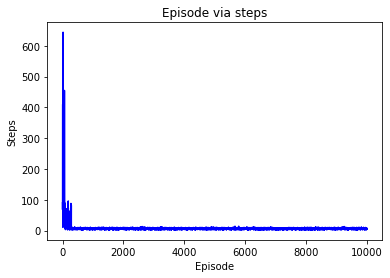

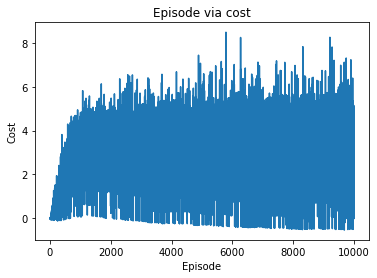

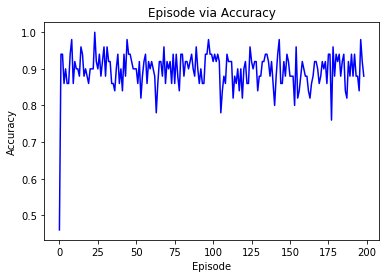

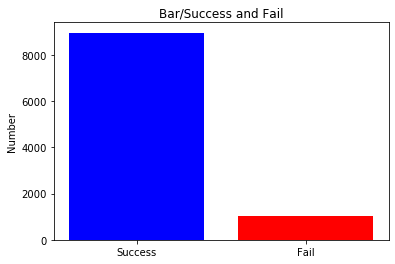

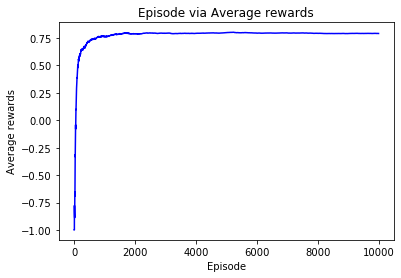

The shortest route: 6
The longest route: 455
correctness:1.0


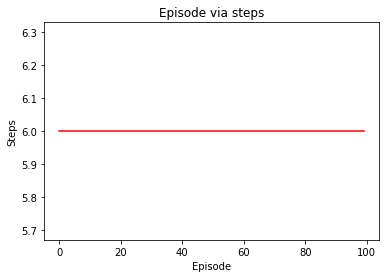

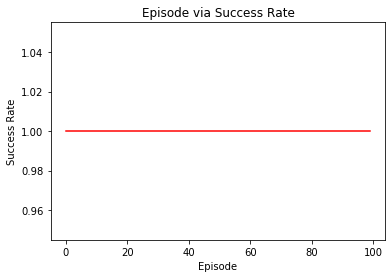

In [1]:
# 4X4 frozen lake/SARSA
import random
import numpy as np
import math
import matplotlib.pyplot as plt

from Parameters import *
from Environment import Environment
from SARSA import SARSA


# Training parameters
NUM_STEPS     = 100
NUM_EPISODES  = 10000
LEARNING_RATE = 0.01
GAMMA         = 0.9
EPSILON       = 0.9

np.random.seed(10)

# create a FrozenLake environment
env = Environment()

env.grid_size = 4

# Create a SARSA agent
SARSA = SARSA(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

# write_Q_table(file_name='./Q_table/SARSA', Q = Q)

# Learning and updating
Q, steps, all_costs, accuracy, all_cost_bar, Reward_list = SARSA.train()

SARSA.plot_results(steps, all_costs, accuracy, all_cost_bar, Reward_list)

# Test after training
SARSA.test()

# Remain visualization
env.mainloop()

## 10x10 frozen lake/SARSA Results

Create 10x10 environment!
episodes:0
episodes:1
episodes:2
episodes:3
episodes:4
episodes:5
episodes:6
episodes:7
episodes:8
episodes:9
episodes:10
episodes:11
episodes:12
episodes:13
episodes:14
episodes:15
episodes:16
episodes:17
episodes:18
episodes:19
episodes:20
episodes:21
episodes:22
episodes:23
episodes:24
episodes:25
episodes:26
episodes:27
episodes:28
episodes:29
episodes:30
episodes:31
episodes:32
episodes:33
episodes:34
episodes:35
episodes:36
episodes:37
episodes:38
episodes:39
episodes:40
episodes:41
episodes:42
episodes:43
episodes:44
episodes:45
episodes:46
episodes:47
episodes:48
episodes:49
episodes:50
episodes:51
episodes:52
episodes:53
episodes:54
episodes:55
episodes:56
episodes:57
episodes:58
episodes:59
episodes:60
episodes:61
episodes:62
episodes:63
episodes:64
episodes:65
episodes:66
episodes:67
episodes:68
episodes:69
episodes:70
episodes:71
episodes:72
episodes:73
episodes:74
episodes:75
episodes:76
episodes:77
episodes:78
episodes:79
episodes:80
episodes:81


episodes:639
episodes:640
episodes:641
episodes:642
episodes:643
episodes:644
episodes:645
episodes:646
episodes:647
episodes:648
episodes:649
episodes:650
episodes:651
episodes:652
episodes:653
episodes:654
episodes:655
episodes:656
episodes:657
episodes:658
episodes:659
episodes:660
episodes:661
episodes:662
episodes:663
episodes:664
episodes:665
episodes:666
episodes:667
episodes:668
episodes:669
episodes:670
episodes:671
episodes:672
episodes:673
episodes:674
episodes:675
episodes:676
episodes:677
episodes:678
episodes:679
episodes:680
episodes:681
episodes:682
episodes:683
episodes:684
episodes:685
episodes:686
episodes:687
episodes:688
episodes:689
episodes:690
episodes:691
episodes:692
episodes:693
episodes:694
episodes:695
episodes:696
episodes:697
episodes:698
episodes:699
episodes:700
episodes:701
episodes:702
episodes:703
episodes:704
episodes:705
episodes:706
episodes:707
episodes:708
episodes:709
episodes:710
episodes:711
episodes:712
episodes:713
episodes:714
episodes:715

episodes:1250
episodes:1251
episodes:1252
episodes:1253
episodes:1254
episodes:1255
episodes:1256
episodes:1257
episodes:1258
episodes:1259
episodes:1260
episodes:1261
episodes:1262
episodes:1263
episodes:1264
episodes:1265
episodes:1266
episodes:1267
episodes:1268
episodes:1269
episodes:1270
episodes:1271
episodes:1272
episodes:1273
episodes:1274
episodes:1275
episodes:1276
episodes:1277
episodes:1278
episodes:1279
episodes:1280
episodes:1281
episodes:1282
episodes:1283
episodes:1284
episodes:1285
episodes:1286
episodes:1287
episodes:1288
episodes:1289
episodes:1290
episodes:1291
episodes:1292
episodes:1293
episodes:1294
episodes:1295
episodes:1296
episodes:1297
episodes:1298
episodes:1299
episodes:1300
episodes:1301
episodes:1302
episodes:1303
episodes:1304
episodes:1305
episodes:1306
episodes:1307
episodes:1308
episodes:1309
episodes:1310
episodes:1311
episodes:1312
episodes:1313
episodes:1314
episodes:1315
episodes:1316
episodes:1317
episodes:1318
episodes:1319
episodes:1320
episod

episodes:1839
episodes:1840
episodes:1841
episodes:1842
episodes:1843
episodes:1844
episodes:1845
episodes:1846
episodes:1847
episodes:1848
episodes:1849
episodes:1850
episodes:1851
episodes:1852
episodes:1853
episodes:1854
episodes:1855
episodes:1856
episodes:1857
episodes:1858
episodes:1859
episodes:1860
episodes:1861
episodes:1862
episodes:1863
episodes:1864
episodes:1865
episodes:1866
episodes:1867
episodes:1868
episodes:1869
episodes:1870
episodes:1871
episodes:1872
episodes:1873
episodes:1874
episodes:1875
episodes:1876
episodes:1877
episodes:1878
episodes:1879
episodes:1880
episodes:1881
episodes:1882
episodes:1883
episodes:1884
episodes:1885
episodes:1886
episodes:1887
episodes:1888
episodes:1889
episodes:1890
episodes:1891
episodes:1892
episodes:1893
episodes:1894
episodes:1895
episodes:1896
episodes:1897
episodes:1898
episodes:1899
episodes:1900
episodes:1901
episodes:1902
episodes:1903
episodes:1904
episodes:1905
episodes:1906
episodes:1907
episodes:1908
episodes:1909
episod

episodes:2425
episodes:2426
episodes:2427
episodes:2428
episodes:2429
episodes:2430
episodes:2431
episodes:2432
episodes:2433
episodes:2434
episodes:2435
episodes:2436
episodes:2437
episodes:2438
episodes:2439
episodes:2440
episodes:2441
episodes:2442
episodes:2443
episodes:2444
episodes:2445
episodes:2446
episodes:2447
episodes:2448
episodes:2449
episodes:2450
episodes:2451
episodes:2452
episodes:2453
episodes:2454
episodes:2455
episodes:2456
episodes:2457
episodes:2458
episodes:2459
episodes:2460
episodes:2461
episodes:2462
episodes:2463
episodes:2464
episodes:2465
episodes:2466
episodes:2467
episodes:2468
episodes:2469
episodes:2470
episodes:2471
episodes:2472
episodes:2473
episodes:2474
episodes:2475
episodes:2476
episodes:2477
episodes:2478
episodes:2479
episodes:2480
episodes:2481
episodes:2482
episodes:2483
episodes:2484
episodes:2485
episodes:2486
episodes:2487
episodes:2488
episodes:2489
episodes:2490
episodes:2491
episodes:2492
episodes:2493
episodes:2494
episodes:2495
episod

episodes:3015
episodes:3016
episodes:3017
episodes:3018
episodes:3019
episodes:3020
episodes:3021
episodes:3022
episodes:3023
episodes:3024
episodes:3025
episodes:3026
episodes:3027
episodes:3028
episodes:3029
episodes:3030
episodes:3031
episodes:3032
episodes:3033
episodes:3034
episodes:3035
episodes:3036
episodes:3037
episodes:3038
episodes:3039
episodes:3040
episodes:3041
episodes:3042
episodes:3043
episodes:3044
episodes:3045
episodes:3046
episodes:3047
episodes:3048
episodes:3049
episodes:3050
episodes:3051
episodes:3052
episodes:3053
episodes:3054
episodes:3055
episodes:3056
episodes:3057
episodes:3058
episodes:3059
episodes:3060
episodes:3061
episodes:3062
episodes:3063
episodes:3064
episodes:3065
episodes:3066
episodes:3067
episodes:3068
episodes:3069
episodes:3070
episodes:3071
episodes:3072
episodes:3073
episodes:3074
episodes:3075
episodes:3076
episodes:3077
episodes:3078
episodes:3079
episodes:3080
episodes:3081
episodes:3082
episodes:3083
episodes:3084
episodes:3085
episod

episodes:3608
episodes:3609
episodes:3610
episodes:3611
episodes:3612
episodes:3613
episodes:3614
episodes:3615
episodes:3616
episodes:3617
episodes:3618
episodes:3619
episodes:3620
episodes:3621
episodes:3622
episodes:3623
episodes:3624
episodes:3625
episodes:3626
episodes:3627
episodes:3628
episodes:3629
episodes:3630
episodes:3631
episodes:3632
episodes:3633
episodes:3634
episodes:3635
episodes:3636
episodes:3637
episodes:3638
episodes:3639
episodes:3640
episodes:3641
episodes:3642
episodes:3643
episodes:3644
episodes:3645
episodes:3646
episodes:3647
episodes:3648
episodes:3649
episodes:3650
episodes:3651
episodes:3652
episodes:3653
episodes:3654
episodes:3655
episodes:3656
episodes:3657
episodes:3658
episodes:3659
episodes:3660
episodes:3661
episodes:3662
episodes:3663
episodes:3664
episodes:3665
episodes:3666
episodes:3667
episodes:3668
episodes:3669
episodes:3670
episodes:3671
episodes:3672
episodes:3673
episodes:3674
episodes:3675
episodes:3676
episodes:3677
episodes:3678
episod

episodes:4208
episodes:4209
episodes:4210
episodes:4211
episodes:4212
episodes:4213
episodes:4214
episodes:4215
episodes:4216
episodes:4217
episodes:4218
episodes:4219
episodes:4220
episodes:4221
episodes:4222
episodes:4223
episodes:4224
episodes:4225
episodes:4226
episodes:4227
episodes:4228
episodes:4229
episodes:4230
episodes:4231
episodes:4232
episodes:4233
episodes:4234
episodes:4235
episodes:4236
episodes:4237
episodes:4238
episodes:4239
episodes:4240
episodes:4241
episodes:4242
episodes:4243
episodes:4244
episodes:4245
episodes:4246
episodes:4247
episodes:4248
episodes:4249
episodes:4250
episodes:4251
episodes:4252
episodes:4253
episodes:4254
episodes:4255
episodes:4256
episodes:4257
episodes:4258
episodes:4259
episodes:4260
episodes:4261
episodes:4262
episodes:4263
episodes:4264
episodes:4265
episodes:4266
episodes:4267
episodes:4268
episodes:4269
episodes:4270
episodes:4271
episodes:4272
episodes:4273
episodes:4274
episodes:4275
episodes:4276
episodes:4277
episodes:4278
episod

episodes:4830
episodes:4831
episodes:4832
episodes:4833
episodes:4834
episodes:4835
episodes:4836
episodes:4837
episodes:4838
episodes:4839
episodes:4840
episodes:4841
episodes:4842
episodes:4843
episodes:4844
episodes:4845
episodes:4846
episodes:4847
episodes:4848
episodes:4849
episodes:4850
episodes:4851
episodes:4852
episodes:4853
episodes:4854
episodes:4855
episodes:4856
episodes:4857
episodes:4858
episodes:4859
episodes:4860
episodes:4861
episodes:4862
episodes:4863
episodes:4864
episodes:4865
episodes:4866
episodes:4867
episodes:4868
episodes:4869
episodes:4870
episodes:4871
episodes:4872
episodes:4873
episodes:4874
episodes:4875
episodes:4876
episodes:4877
episodes:4878
episodes:4879
episodes:4880
episodes:4881
episodes:4882
episodes:4883
episodes:4884
episodes:4885
episodes:4886
episodes:4887
episodes:4888
episodes:4889
episodes:4890
episodes:4891
episodes:4892
episodes:4893
episodes:4894
episodes:4895
episodes:4896
episodes:4897
episodes:4898
episodes:4899
episodes:4900
episod

episodes:5480
episodes:5481
episodes:5482
episodes:5483
episodes:5484
episodes:5485
episodes:5486
episodes:5487
episodes:5488
episodes:5489
episodes:5490
episodes:5491
episodes:5492
episodes:5493
episodes:5494
episodes:5495
episodes:5496
episodes:5497
episodes:5498
episodes:5499
episodes:5500
episodes:5501
episodes:5502
episodes:5503
episodes:5504
episodes:5505
episodes:5506
episodes:5507
episodes:5508
episodes:5509
episodes:5510
episodes:5511
episodes:5512
episodes:5513
episodes:5514
episodes:5515
episodes:5516
episodes:5517
episodes:5518
episodes:5519
episodes:5520
episodes:5521
episodes:5522
episodes:5523
episodes:5524
episodes:5525
episodes:5526
episodes:5527
episodes:5528
episodes:5529
episodes:5530
episodes:5531
episodes:5532
episodes:5533
episodes:5534
episodes:5535
episodes:5536
episodes:5537
episodes:5538
episodes:5539
episodes:5540
episodes:5541
episodes:5542
episodes:5543
episodes:5544
episodes:5545
episodes:5546
episodes:5547
episodes:5548
episodes:5549
episodes:5550
episod

episodes:6083
episodes:6084
episodes:6085
episodes:6086
episodes:6087
episodes:6088
episodes:6089
episodes:6090
episodes:6091
episodes:6092
episodes:6093
episodes:6094
episodes:6095
episodes:6096
episodes:6097
episodes:6098
episodes:6099
episodes:6100
episodes:6101
episodes:6102
episodes:6103
episodes:6104
episodes:6105
episodes:6106
episodes:6107
episodes:6108
episodes:6109
episodes:6110
episodes:6111
episodes:6112
episodes:6113
episodes:6114
episodes:6115
episodes:6116
episodes:6117
episodes:6118
episodes:6119
episodes:6120
episodes:6121
episodes:6122
episodes:6123
episodes:6124
episodes:6125
episodes:6126
episodes:6127
episodes:6128
episodes:6129
episodes:6130
episodes:6131
episodes:6132
episodes:6133
episodes:6134
episodes:6135
episodes:6136
episodes:6137
episodes:6138
episodes:6139
episodes:6140
episodes:6141
episodes:6142
episodes:6143
episodes:6144
episodes:6145
episodes:6146
episodes:6147
episodes:6148
episodes:6149
episodes:6150
episodes:6151
episodes:6152
episodes:6153
episod

episodes:6676
episodes:6677
episodes:6678
episodes:6679
episodes:6680
episodes:6681
episodes:6682
episodes:6683
episodes:6684
episodes:6685
episodes:6686
episodes:6687
episodes:6688
episodes:6689
episodes:6690
episodes:6691
episodes:6692
episodes:6693
episodes:6694
episodes:6695
episodes:6696
episodes:6697
episodes:6698
episodes:6699
episodes:6700
episodes:6701
episodes:6702
episodes:6703
episodes:6704
episodes:6705
episodes:6706
episodes:6707
episodes:6708
episodes:6709
episodes:6710
episodes:6711
episodes:6712
episodes:6713
episodes:6714
episodes:6715
episodes:6716
episodes:6717
episodes:6718
episodes:6719
episodes:6720
episodes:6721
episodes:6722
episodes:6723
episodes:6724
episodes:6725
episodes:6726
episodes:6727
episodes:6728
episodes:6729
episodes:6730
episodes:6731
episodes:6732
episodes:6733
episodes:6734
episodes:6735
episodes:6736
episodes:6737
episodes:6738
episodes:6739
episodes:6740
episodes:6741
episodes:6742
episodes:6743
episodes:6744
episodes:6745
episodes:6746
episod

episodes:7308
episodes:7309
episodes:7310
episodes:7311
episodes:7312
episodes:7313
episodes:7314
episodes:7315
episodes:7316
episodes:7317
episodes:7318
episodes:7319
episodes:7320
episodes:7321
episodes:7322
episodes:7323
episodes:7324
episodes:7325
episodes:7326
episodes:7327
episodes:7328
episodes:7329
episodes:7330
episodes:7331
episodes:7332
episodes:7333
episodes:7334
episodes:7335
episodes:7336
episodes:7337
episodes:7338
episodes:7339
episodes:7340
episodes:7341
episodes:7342
episodes:7343
episodes:7344
episodes:7345
episodes:7346
episodes:7347
episodes:7348
episodes:7349
episodes:7350
episodes:7351
episodes:7352
episodes:7353
episodes:7354
episodes:7355
episodes:7356
episodes:7357
episodes:7358
episodes:7359
episodes:7360
episodes:7361
episodes:7362
episodes:7363
episodes:7364
episodes:7365
episodes:7366
episodes:7367
episodes:7368
episodes:7369
episodes:7370
episodes:7371
episodes:7372
episodes:7373
episodes:7374
episodes:7375
episodes:7376
episodes:7377
episodes:7378
episod

episodes:7922
episodes:7923
episodes:7924
episodes:7925
episodes:7926
episodes:7927
episodes:7928
episodes:7929
episodes:7930
episodes:7931
episodes:7932
episodes:7933
episodes:7934
episodes:7935
episodes:7936
episodes:7937
episodes:7938
episodes:7939
episodes:7940
episodes:7941
episodes:7942
episodes:7943
episodes:7944
episodes:7945
episodes:7946
episodes:7947
episodes:7948
episodes:7949
episodes:7950
episodes:7951
episodes:7952
episodes:7953
episodes:7954
episodes:7955
episodes:7956
episodes:7957
episodes:7958
episodes:7959
episodes:7960
episodes:7961
episodes:7962
episodes:7963
episodes:7964
episodes:7965
episodes:7966
episodes:7967
episodes:7968
episodes:7969
episodes:7970
episodes:7971
episodes:7972
episodes:7973
episodes:7974
episodes:7975
episodes:7976
episodes:7977
episodes:7978
episodes:7979
episodes:7980
episodes:7981
episodes:7982
episodes:7983
episodes:7984
episodes:7985
episodes:7986
episodes:7987
episodes:7988
episodes:7989
episodes:7990
episodes:7991
episodes:7992
episod

episodes:8528
episodes:8529
episodes:8530
episodes:8531
episodes:8532
episodes:8533
episodes:8534
episodes:8535
episodes:8536
episodes:8537
episodes:8538
episodes:8539
episodes:8540
episodes:8541
episodes:8542
episodes:8543
episodes:8544
episodes:8545
episodes:8546
episodes:8547
episodes:8548
episodes:8549
episodes:8550
episodes:8551
episodes:8552
episodes:8553
episodes:8554
episodes:8555
episodes:8556
episodes:8557
episodes:8558
episodes:8559
episodes:8560
episodes:8561
episodes:8562
episodes:8563
episodes:8564
episodes:8565
episodes:8566
episodes:8567
episodes:8568
episodes:8569
episodes:8570
episodes:8571
episodes:8572
episodes:8573
episodes:8574
episodes:8575
episodes:8576
episodes:8577
episodes:8578
episodes:8579
episodes:8580
episodes:8581
episodes:8582
episodes:8583
episodes:8584
episodes:8585
episodes:8586
episodes:8587
episodes:8588
episodes:8589
episodes:8590
episodes:8591
episodes:8592
episodes:8593
episodes:8594
episodes:8595
episodes:8596
episodes:8597
episodes:8598
episod

episodes:9159
episodes:9160
episodes:9161
episodes:9162
episodes:9163
episodes:9164
episodes:9165
episodes:9166
episodes:9167
episodes:9168
episodes:9169
episodes:9170
episodes:9171
episodes:9172
episodes:9173
episodes:9174
episodes:9175
episodes:9176
episodes:9177
episodes:9178
episodes:9179
episodes:9180
episodes:9181
episodes:9182
episodes:9183
episodes:9184
episodes:9185
episodes:9186
episodes:9187
episodes:9188
episodes:9189
episodes:9190
episodes:9191
episodes:9192
episodes:9193
episodes:9194
episodes:9195
episodes:9196
episodes:9197
episodes:9198
episodes:9199
episodes:9200
episodes:9201
episodes:9202
episodes:9203
episodes:9204
episodes:9205
episodes:9206
episodes:9207
episodes:9208
episodes:9209
episodes:9210
episodes:9211
episodes:9212
episodes:9213
episodes:9214
episodes:9215
episodes:9216
episodes:9217
episodes:9218
episodes:9219
episodes:9220
episodes:9221
episodes:9222
episodes:9223
episodes:9224
episodes:9225
episodes:9226
episodes:9227
episodes:9228
episodes:9229
episod

episodes:9755
episodes:9756
episodes:9757
episodes:9758
episodes:9759
episodes:9760
episodes:9761
episodes:9762
episodes:9763
episodes:9764
episodes:9765
episodes:9766
episodes:9767
episodes:9768
episodes:9769
episodes:9770
episodes:9771
episodes:9772
episodes:9773
episodes:9774
episodes:9775
episodes:9776
episodes:9777
episodes:9778
episodes:9779
episodes:9780
episodes:9781
episodes:9782
episodes:9783
episodes:9784
episodes:9785
episodes:9786
episodes:9787
episodes:9788
episodes:9789
episodes:9790
episodes:9791
episodes:9792
episodes:9793
episodes:9794
episodes:9795
episodes:9796
episodes:9797
episodes:9798
episodes:9799
episodes:9800
episodes:9801
episodes:9802
episodes:9803
episodes:9804
episodes:9805
episodes:9806
episodes:9807
episodes:9808
episodes:9809
episodes:9810
episodes:9811
episodes:9812
episodes:9813
episodes:9814
episodes:9815
episodes:9816
episodes:9817
episodes:9818
episodes:9819
episodes:9820
episodes:9821
episodes:9822
episodes:9823
episodes:9824
episodes:9825
episod

episodes:10376
episodes:10377
episodes:10378
episodes:10379
episodes:10380
episodes:10381
episodes:10382
episodes:10383
episodes:10384
episodes:10385
episodes:10386
episodes:10387
episodes:10388
episodes:10389
episodes:10390
episodes:10391
episodes:10392
episodes:10393
episodes:10394
episodes:10395
episodes:10396
episodes:10397
episodes:10398
episodes:10399
episodes:10400
episodes:10401
episodes:10402
episodes:10403
episodes:10404
episodes:10405
episodes:10406
episodes:10407
episodes:10408
episodes:10409
episodes:10410
episodes:10411
episodes:10412
episodes:10413
episodes:10414
episodes:10415
episodes:10416
episodes:10417
episodes:10418
episodes:10419
episodes:10420
episodes:10421
episodes:10422
episodes:10423
episodes:10424
episodes:10425
episodes:10426
episodes:10427
episodes:10428
episodes:10429
episodes:10430
episodes:10431
episodes:10432
episodes:10433
episodes:10434
episodes:10435
episodes:10436
episodes:10437
episodes:10438
episodes:10439
episodes:10440
episodes:10441
episodes:1

episodes:10946
episodes:10947
episodes:10948
episodes:10949
episodes:10950
episodes:10951
episodes:10952
episodes:10953
episodes:10954
episodes:10955
episodes:10956
episodes:10957
episodes:10958
episodes:10959
episodes:10960
episodes:10961
episodes:10962
episodes:10963
episodes:10964
episodes:10965
episodes:10966
episodes:10967
episodes:10968
episodes:10969
episodes:10970
episodes:10971
episodes:10972
episodes:10973
episodes:10974
episodes:10975
episodes:10976
episodes:10977
episodes:10978
episodes:10979
episodes:10980
episodes:10981
episodes:10982
episodes:10983
episodes:10984
episodes:10985
episodes:10986
episodes:10987
episodes:10988
episodes:10989
episodes:10990
episodes:10991
episodes:10992
episodes:10993
episodes:10994
episodes:10995
episodes:10996
episodes:10997
episodes:10998
episodes:10999
episodes:11000
episodes:11001
episodes:11002
episodes:11003
episodes:11004
episodes:11005
episodes:11006
episodes:11007
episodes:11008
episodes:11009
episodes:11010
episodes:11011
episodes:1

episodes:11514
episodes:11515
episodes:11516
episodes:11517
episodes:11518
episodes:11519
episodes:11520
episodes:11521
episodes:11522
episodes:11523
episodes:11524
episodes:11525
episodes:11526
episodes:11527
episodes:11528
episodes:11529
episodes:11530
episodes:11531
episodes:11532
episodes:11533
episodes:11534
episodes:11535
episodes:11536
episodes:11537
episodes:11538
episodes:11539
episodes:11540
episodes:11541
episodes:11542
episodes:11543
episodes:11544
episodes:11545
episodes:11546
episodes:11547
episodes:11548
episodes:11549
episodes:11550
episodes:11551
episodes:11552
episodes:11553
episodes:11554
episodes:11555
episodes:11556
episodes:11557
episodes:11558
episodes:11559
episodes:11560
episodes:11561
episodes:11562
episodes:11563
episodes:11564
episodes:11565
episodes:11566
episodes:11567
episodes:11568
episodes:11569
episodes:11570
episodes:11571
episodes:11572
episodes:11573
episodes:11574
episodes:11575
episodes:11576
episodes:11577
episodes:11578
episodes:11579
episodes:1

episodes:12089
episodes:12090
episodes:12091
episodes:12092
episodes:12093
episodes:12094
episodes:12095
episodes:12096
episodes:12097
episodes:12098
episodes:12099
episodes:12100
episodes:12101
episodes:12102
episodes:12103
episodes:12104
episodes:12105
episodes:12106
episodes:12107
episodes:12108
episodes:12109
episodes:12110
episodes:12111
episodes:12112
episodes:12113
episodes:12114
episodes:12115
episodes:12116
episodes:12117
episodes:12118
episodes:12119
episodes:12120
episodes:12121
episodes:12122
episodes:12123
episodes:12124
episodes:12125
episodes:12126
episodes:12127
episodes:12128
episodes:12129
episodes:12130
episodes:12131
episodes:12132
episodes:12133
episodes:12134
episodes:12135
episodes:12136
episodes:12137
episodes:12138
episodes:12139
episodes:12140
episodes:12141
episodes:12142
episodes:12143
episodes:12144
episodes:12145
episodes:12146
episodes:12147
episodes:12148
episodes:12149
episodes:12150
episodes:12151
episodes:12152
episodes:12153
episodes:12154
episodes:1

episodes:12658
episodes:12659
episodes:12660
episodes:12661
episodes:12662
episodes:12663
episodes:12664
episodes:12665
episodes:12666
episodes:12667
episodes:12668
episodes:12669
episodes:12670
episodes:12671
episodes:12672
episodes:12673
episodes:12674
episodes:12675
episodes:12676
episodes:12677
episodes:12678
episodes:12679
episodes:12680
episodes:12681
episodes:12682
episodes:12683
episodes:12684
episodes:12685
episodes:12686
episodes:12687
episodes:12688
episodes:12689
episodes:12690
episodes:12691
episodes:12692
episodes:12693
episodes:12694
episodes:12695
episodes:12696
episodes:12697
episodes:12698
episodes:12699
episodes:12700
episodes:12701
episodes:12702
episodes:12703
episodes:12704
episodes:12705
episodes:12706
episodes:12707
episodes:12708
episodes:12709
episodes:12710
episodes:12711
episodes:12712
episodes:12713
episodes:12714
episodes:12715
episodes:12716
episodes:12717
episodes:12718
episodes:12719
episodes:12720
episodes:12721
episodes:12722
episodes:12723
episodes:1

episodes:13274
episodes:13275
episodes:13276
episodes:13277
episodes:13278
episodes:13279
episodes:13280
episodes:13281
episodes:13282
episodes:13283
episodes:13284
episodes:13285
episodes:13286
episodes:13287
episodes:13288
episodes:13289
episodes:13290
episodes:13291
episodes:13292
episodes:13293
episodes:13294
episodes:13295
episodes:13296
episodes:13297
episodes:13298
episodes:13299
episodes:13300
episodes:13301
episodes:13302
episodes:13303
episodes:13304
episodes:13305
episodes:13306
episodes:13307
episodes:13308
episodes:13309
episodes:13310
episodes:13311
episodes:13312
episodes:13313
episodes:13314
episodes:13315
episodes:13316
episodes:13317
episodes:13318
episodes:13319
episodes:13320
episodes:13321
episodes:13322
episodes:13323
episodes:13324
episodes:13325
episodes:13326
episodes:13327
episodes:13328
episodes:13329
episodes:13330
episodes:13331
episodes:13332
episodes:13333
episodes:13334
episodes:13335
episodes:13336
episodes:13337
episodes:13338
episodes:13339
episodes:1

episodes:13881
episodes:13882
episodes:13883
episodes:13884
episodes:13885
episodes:13886
episodes:13887
episodes:13888
episodes:13889
episodes:13890
episodes:13891
episodes:13892
episodes:13893
episodes:13894
episodes:13895
episodes:13896
episodes:13897
episodes:13898
episodes:13899
episodes:13900
episodes:13901
episodes:13902
episodes:13903
episodes:13904
episodes:13905
episodes:13906
episodes:13907
episodes:13908
episodes:13909
episodes:13910
episodes:13911
episodes:13912
episodes:13913
episodes:13914
episodes:13915
episodes:13916
episodes:13917
episodes:13918
episodes:13919
episodes:13920
episodes:13921
episodes:13922
episodes:13923
episodes:13924
episodes:13925
episodes:13926
episodes:13927
episodes:13928
episodes:13929
episodes:13930
episodes:13931
episodes:13932
episodes:13933
episodes:13934
episodes:13935
episodes:13936
episodes:13937
episodes:13938
episodes:13939
episodes:13940
episodes:13941
episodes:13942
episodes:13943
episodes:13944
episodes:13945
episodes:13946
episodes:1

episodes:14473
episodes:14474
episodes:14475
episodes:14476
episodes:14477
episodes:14478
episodes:14479
episodes:14480
episodes:14481
episodes:14482
episodes:14483
episodes:14484
episodes:14485
episodes:14486
episodes:14487
episodes:14488
episodes:14489
episodes:14490
episodes:14491
episodes:14492
episodes:14493
episodes:14494
episodes:14495
episodes:14496
episodes:14497
episodes:14498
episodes:14499
episodes:14500
episodes:14501
episodes:14502
episodes:14503
episodes:14504
episodes:14505
episodes:14506
episodes:14507
episodes:14508
episodes:14509
episodes:14510
episodes:14511
episodes:14512
episodes:14513
episodes:14514
episodes:14515
episodes:14516
episodes:14517
episodes:14518
episodes:14519
episodes:14520
episodes:14521
episodes:14522
episodes:14523
episodes:14524
episodes:14525
episodes:14526
episodes:14527
episodes:14528
episodes:14529
episodes:14530
episodes:14531
episodes:14532
episodes:14533
episodes:14534
episodes:14535
episodes:14536
episodes:14537
episodes:14538
episodes:1

episodes:15059
episodes:15060
episodes:15061
episodes:15062
episodes:15063
episodes:15064
episodes:15065
episodes:15066
episodes:15067
episodes:15068
episodes:15069
episodes:15070
episodes:15071
episodes:15072
episodes:15073
episodes:15074
episodes:15075
episodes:15076
episodes:15077
episodes:15078
episodes:15079
episodes:15080
episodes:15081
episodes:15082
episodes:15083
episodes:15084
episodes:15085
episodes:15086
episodes:15087
episodes:15088
episodes:15089
episodes:15090
episodes:15091
episodes:15092
episodes:15093
episodes:15094
episodes:15095
episodes:15096
episodes:15097
episodes:15098
episodes:15099
episodes:15100
episodes:15101
episodes:15102
episodes:15103
episodes:15104
episodes:15105
episodes:15106
episodes:15107
episodes:15108
episodes:15109
episodes:15110
episodes:15111
episodes:15112
episodes:15113
episodes:15114
episodes:15115
episodes:15116
episodes:15117
episodes:15118
episodes:15119
episodes:15120
episodes:15121
episodes:15122
episodes:15123
episodes:15124
episodes:1

episodes:15608
episodes:15609
episodes:15610
episodes:15611
episodes:15612
episodes:15613
episodes:15614
episodes:15615
episodes:15616
episodes:15617
episodes:15618
episodes:15619
episodes:15620
episodes:15621
episodes:15622
episodes:15623
episodes:15624
episodes:15625
episodes:15626
episodes:15627
episodes:15628
episodes:15629
episodes:15630
episodes:15631
episodes:15632
episodes:15633
episodes:15634
episodes:15635
episodes:15636
episodes:15637
episodes:15638
episodes:15639
episodes:15640
episodes:15641
episodes:15642
episodes:15643
episodes:15644
episodes:15645
episodes:15646
episodes:15647
episodes:15648
episodes:15649
episodes:15650
episodes:15651
episodes:15652
episodes:15653
episodes:15654
episodes:15655
episodes:15656
episodes:15657
episodes:15658
episodes:15659
episodes:15660
episodes:15661
episodes:15662
episodes:15663
episodes:15664
episodes:15665
episodes:15666
episodes:15667
episodes:15668
episodes:15669
episodes:15670
episodes:15671
episodes:15672
episodes:15673
episodes:1

episodes:16182
episodes:16183
episodes:16184
episodes:16185
episodes:16186
episodes:16187
episodes:16188
episodes:16189
episodes:16190
episodes:16191
episodes:16192
episodes:16193
episodes:16194
episodes:16195
episodes:16196
episodes:16197
episodes:16198
episodes:16199
episodes:16200
episodes:16201
episodes:16202
episodes:16203
episodes:16204
episodes:16205
episodes:16206
episodes:16207
episodes:16208
episodes:16209
episodes:16210
episodes:16211
episodes:16212
episodes:16213
episodes:16214
episodes:16215
episodes:16216
episodes:16217
episodes:16218
episodes:16219
episodes:16220
episodes:16221
episodes:16222
episodes:16223
episodes:16224
episodes:16225
episodes:16226
episodes:16227
episodes:16228
episodes:16229
episodes:16230
episodes:16231
episodes:16232
episodes:16233
episodes:16234
episodes:16235
episodes:16236
episodes:16237
episodes:16238
episodes:16239
episodes:16240
episodes:16241
episodes:16242
episodes:16243
episodes:16244
episodes:16245
episodes:16246
episodes:16247
episodes:1

episodes:16731
episodes:16732
episodes:16733
episodes:16734
episodes:16735
episodes:16736
episodes:16737
episodes:16738
episodes:16739
episodes:16740
episodes:16741
episodes:16742
episodes:16743
episodes:16744
episodes:16745
episodes:16746
episodes:16747
episodes:16748
episodes:16749
episodes:16750
episodes:16751
episodes:16752
episodes:16753
episodes:16754
episodes:16755
episodes:16756
episodes:16757
episodes:16758
episodes:16759
episodes:16760
episodes:16761
episodes:16762
episodes:16763
episodes:16764
episodes:16765
episodes:16766
episodes:16767
episodes:16768
episodes:16769
episodes:16770
episodes:16771
episodes:16772
episodes:16773
episodes:16774
episodes:16775
episodes:16776
episodes:16777
episodes:16778
episodes:16779
episodes:16780
episodes:16781
episodes:16782
episodes:16783
episodes:16784
episodes:16785
episodes:16786
episodes:16787
episodes:16788
episodes:16789
episodes:16790
episodes:16791
episodes:16792
episodes:16793
episodes:16794
episodes:16795
episodes:16796
episodes:1

episodes:17286
episodes:17287
episodes:17288
episodes:17289
episodes:17290
episodes:17291
episodes:17292
episodes:17293
episodes:17294
episodes:17295
episodes:17296
episodes:17297
episodes:17298
episodes:17299
episodes:17300
episodes:17301
episodes:17302
episodes:17303
episodes:17304
episodes:17305
episodes:17306
episodes:17307
episodes:17308
episodes:17309
episodes:17310
episodes:17311
episodes:17312
episodes:17313
episodes:17314
episodes:17315
episodes:17316
episodes:17317
episodes:17318
episodes:17319
episodes:17320
episodes:17321
episodes:17322
episodes:17323
episodes:17324
episodes:17325
episodes:17326
episodes:17327
episodes:17328
episodes:17329
episodes:17330
episodes:17331
episodes:17332
episodes:17333
episodes:17334
episodes:17335
episodes:17336
episodes:17337
episodes:17338
episodes:17339
episodes:17340
episodes:17341
episodes:17342
episodes:17343
episodes:17344
episodes:17345
episodes:17346
episodes:17347
episodes:17348
episodes:17349
episodes:17350
episodes:17351
episodes:1

episodes:17900
episodes:17901
episodes:17902
episodes:17903
episodes:17904
episodes:17905
episodes:17906
episodes:17907
episodes:17908
episodes:17909
episodes:17910
episodes:17911
episodes:17912
episodes:17913
episodes:17914
episodes:17915
episodes:17916
episodes:17917
episodes:17918
episodes:17919
episodes:17920
episodes:17921
episodes:17922
episodes:17923
episodes:17924
episodes:17925
episodes:17926
episodes:17927
episodes:17928
episodes:17929
episodes:17930
episodes:17931
episodes:17932
episodes:17933
episodes:17934
episodes:17935
episodes:17936
episodes:17937
episodes:17938
episodes:17939
episodes:17940
episodes:17941
episodes:17942
episodes:17943
episodes:17944
episodes:17945
episodes:17946
episodes:17947
episodes:17948
episodes:17949
episodes:17950
episodes:17951
episodes:17952
episodes:17953
episodes:17954
episodes:17955
episodes:17956
episodes:17957
episodes:17958
episodes:17959
episodes:17960
episodes:17961
episodes:17962
episodes:17963
episodes:17964
episodes:17965
episodes:1

episodes:18449
episodes:18450
episodes:18451
episodes:18452
episodes:18453
episodes:18454
episodes:18455
episodes:18456
episodes:18457
episodes:18458
episodes:18459
episodes:18460
episodes:18461
episodes:18462
episodes:18463
episodes:18464
episodes:18465
episodes:18466
episodes:18467
episodes:18468
episodes:18469
episodes:18470
episodes:18471
episodes:18472
episodes:18473
episodes:18474
episodes:18475
episodes:18476
episodes:18477
episodes:18478
episodes:18479
episodes:18480
episodes:18481
episodes:18482
episodes:18483
episodes:18484
episodes:18485
episodes:18486
episodes:18487
episodes:18488
episodes:18489
episodes:18490
episodes:18491
episodes:18492
episodes:18493
episodes:18494
episodes:18495
episodes:18496
episodes:18497
episodes:18498
episodes:18499
episodes:18500
episodes:18501
episodes:18502
episodes:18503
episodes:18504
episodes:18505
episodes:18506
episodes:18507
episodes:18508
episodes:18509
episodes:18510
episodes:18511
episodes:18512
episodes:18513
episodes:18514
episodes:1

episodes:19038
episodes:19039
episodes:19040
episodes:19041
episodes:19042
episodes:19043
episodes:19044
episodes:19045
episodes:19046
episodes:19047
episodes:19048
episodes:19049
episodes:19050
episodes:19051
episodes:19052
episodes:19053
episodes:19054
episodes:19055
episodes:19056
episodes:19057
episodes:19058
episodes:19059
episodes:19060
episodes:19061
episodes:19062
episodes:19063
episodes:19064
episodes:19065
episodes:19066
episodes:19067
episodes:19068
episodes:19069
episodes:19070
episodes:19071
episodes:19072
episodes:19073
episodes:19074
episodes:19075
episodes:19076
episodes:19077
episodes:19078
episodes:19079
episodes:19080
episodes:19081
episodes:19082
episodes:19083
episodes:19084
episodes:19085
episodes:19086
episodes:19087
episodes:19088
episodes:19089
episodes:19090
episodes:19091
episodes:19092
episodes:19093
episodes:19094
episodes:19095
episodes:19096
episodes:19097
episodes:19098
episodes:19099
episodes:19100
episodes:19101
episodes:19102
episodes:19103
episodes:1

episodes:19608
episodes:19609
episodes:19610
episodes:19611
episodes:19612
episodes:19613
episodes:19614
episodes:19615
episodes:19616
episodes:19617
episodes:19618
episodes:19619
episodes:19620
episodes:19621
episodes:19622
episodes:19623
episodes:19624
episodes:19625
episodes:19626
episodes:19627
episodes:19628
episodes:19629
episodes:19630
episodes:19631
episodes:19632
episodes:19633
episodes:19634
episodes:19635
episodes:19636
episodes:19637
episodes:19638
episodes:19639
episodes:19640
episodes:19641
episodes:19642
episodes:19643
episodes:19644
episodes:19645
episodes:19646
episodes:19647
episodes:19648
episodes:19649
episodes:19650
episodes:19651
episodes:19652
episodes:19653
episodes:19654
episodes:19655
episodes:19656
episodes:19657
episodes:19658
episodes:19659
episodes:19660
episodes:19661
episodes:19662
episodes:19663
episodes:19664
episodes:19665
episodes:19666
episodes:19667
episodes:19668
episodes:19669
episodes:19670
episodes:19671
episodes:19672
episodes:19673
episodes:1

episodes:20216
episodes:20217
episodes:20218
episodes:20219
episodes:20220
episodes:20221
episodes:20222
episodes:20223
episodes:20224
episodes:20225
episodes:20226
episodes:20227
episodes:20228
episodes:20229
episodes:20230
episodes:20231
episodes:20232
episodes:20233
episodes:20234
episodes:20235
episodes:20236
episodes:20237
episodes:20238
episodes:20239
episodes:20240
episodes:20241
episodes:20242
episodes:20243
episodes:20244
episodes:20245
episodes:20246
episodes:20247
episodes:20248
episodes:20249
episodes:20250
episodes:20251
episodes:20252
episodes:20253
episodes:20254
episodes:20255
episodes:20256
episodes:20257
episodes:20258
episodes:20259
episodes:20260
episodes:20261
episodes:20262
episodes:20263
episodes:20264
episodes:20265
episodes:20266
episodes:20267
episodes:20268
episodes:20269
episodes:20270
episodes:20271
episodes:20272
episodes:20273
episodes:20274
episodes:20275
episodes:20276
episodes:20277
episodes:20278
episodes:20279
episodes:20280
episodes:20281
episodes:2

episodes:20773
episodes:20774
episodes:20775
episodes:20776
episodes:20777
episodes:20778
episodes:20779
episodes:20780
episodes:20781
episodes:20782
episodes:20783
episodes:20784
episodes:20785
episodes:20786
episodes:20787
episodes:20788
episodes:20789
episodes:20790
episodes:20791
episodes:20792
episodes:20793
episodes:20794
episodes:20795
episodes:20796
episodes:20797
episodes:20798
episodes:20799
episodes:20800
episodes:20801
episodes:20802
episodes:20803
episodes:20804
episodes:20805
episodes:20806
episodes:20807
episodes:20808
episodes:20809
episodes:20810
episodes:20811
episodes:20812
episodes:20813
episodes:20814
episodes:20815
episodes:20816
episodes:20817
episodes:20818
episodes:20819
episodes:20820
episodes:20821
episodes:20822
episodes:20823
episodes:20824
episodes:20825
episodes:20826
episodes:20827
episodes:20828
episodes:20829
episodes:20830
episodes:20831
episodes:20832
episodes:20833
episodes:20834
episodes:20835
episodes:20836
episodes:20837
episodes:20838
episodes:2

episodes:21349
episodes:21350
episodes:21351
episodes:21352
episodes:21353
episodes:21354
episodes:21355
episodes:21356
episodes:21357
episodes:21358
episodes:21359
episodes:21360
episodes:21361
episodes:21362
episodes:21363
episodes:21364
episodes:21365
episodes:21366
episodes:21367
episodes:21368
episodes:21369
episodes:21370
episodes:21371
episodes:21372
episodes:21373
episodes:21374
episodes:21375
episodes:21376
episodes:21377
episodes:21378
episodes:21379
episodes:21380
episodes:21381
episodes:21382
episodes:21383
episodes:21384
episodes:21385
episodes:21386
episodes:21387
episodes:21388
episodes:21389
episodes:21390
episodes:21391
episodes:21392
episodes:21393
episodes:21394
episodes:21395
episodes:21396
episodes:21397
episodes:21398
episodes:21399
episodes:21400
episodes:21401
episodes:21402
episodes:21403
episodes:21404
episodes:21405
episodes:21406
episodes:21407
episodes:21408
episodes:21409
episodes:21410
episodes:21411
episodes:21412
episodes:21413
episodes:21414
episodes:2

episodes:21912
episodes:21913
episodes:21914
episodes:21915
episodes:21916
episodes:21917
episodes:21918
episodes:21919
episodes:21920
episodes:21921
episodes:21922
episodes:21923
episodes:21924
episodes:21925
episodes:21926
episodes:21927
episodes:21928
episodes:21929
episodes:21930
episodes:21931
episodes:21932
episodes:21933
episodes:21934
episodes:21935
episodes:21936
episodes:21937
episodes:21938
episodes:21939
episodes:21940
episodes:21941
episodes:21942
episodes:21943
episodes:21944
episodes:21945
episodes:21946
episodes:21947
episodes:21948
episodes:21949
episodes:21950
episodes:21951
episodes:21952
episodes:21953
episodes:21954
episodes:21955
episodes:21956
episodes:21957
episodes:21958
episodes:21959
episodes:21960
episodes:21961
episodes:21962
episodes:21963
episodes:21964
episodes:21965
episodes:21966
episodes:21967
episodes:21968
episodes:21969
episodes:21970
episodes:21971
episodes:21972
episodes:21973
episodes:21974
episodes:21975
episodes:21976
episodes:21977
episodes:2

episodes:22472
episodes:22473
episodes:22474
episodes:22475
episodes:22476
episodes:22477
episodes:22478
episodes:22479
episodes:22480
episodes:22481
episodes:22482
episodes:22483
episodes:22484
episodes:22485
episodes:22486
episodes:22487
episodes:22488
episodes:22489
episodes:22490
episodes:22491
episodes:22492
episodes:22493
episodes:22494
episodes:22495
episodes:22496
episodes:22497
episodes:22498
episodes:22499
episodes:22500
episodes:22501
episodes:22502
episodes:22503
episodes:22504
episodes:22505
episodes:22506
episodes:22507
episodes:22508
episodes:22509
episodes:22510
episodes:22511
episodes:22512
episodes:22513
episodes:22514
episodes:22515
episodes:22516
episodes:22517
episodes:22518
episodes:22519
episodes:22520
episodes:22521
episodes:22522
episodes:22523
episodes:22524
episodes:22525
episodes:22526
episodes:22527
episodes:22528
episodes:22529
episodes:22530
episodes:22531
episodes:22532
episodes:22533
episodes:22534
episodes:22535
episodes:22536
episodes:22537
episodes:2

episodes:23026
episodes:23027
episodes:23028
episodes:23029
episodes:23030
episodes:23031
episodes:23032
episodes:23033
episodes:23034
episodes:23035
episodes:23036
episodes:23037
episodes:23038
episodes:23039
episodes:23040
episodes:23041
episodes:23042
episodes:23043
episodes:23044
episodes:23045
episodes:23046
episodes:23047
episodes:23048
episodes:23049
episodes:23050
episodes:23051
episodes:23052
episodes:23053
episodes:23054
episodes:23055
episodes:23056
episodes:23057
episodes:23058
episodes:23059
episodes:23060
episodes:23061
episodes:23062
episodes:23063
episodes:23064
episodes:23065
episodes:23066
episodes:23067
episodes:23068
episodes:23069
episodes:23070
episodes:23071
episodes:23072
episodes:23073
episodes:23074
episodes:23075
episodes:23076
episodes:23077
episodes:23078
episodes:23079
episodes:23080
episodes:23081
episodes:23082
episodes:23083
episodes:23084
episodes:23085
episodes:23086
episodes:23087
episodes:23088
episodes:23089
episodes:23090
episodes:23091
episodes:2

episodes:23621
episodes:23622
episodes:23623
episodes:23624
episodes:23625
episodes:23626
episodes:23627
episodes:23628
episodes:23629
episodes:23630
episodes:23631
episodes:23632
episodes:23633
episodes:23634
episodes:23635
episodes:23636
episodes:23637
episodes:23638
episodes:23639
episodes:23640
episodes:23641
episodes:23642
episodes:23643
episodes:23644
episodes:23645
episodes:23646
episodes:23647
episodes:23648
episodes:23649
episodes:23650
episodes:23651
episodes:23652
episodes:23653
episodes:23654
episodes:23655
episodes:23656
episodes:23657
episodes:23658
episodes:23659
episodes:23660
episodes:23661
episodes:23662
episodes:23663
episodes:23664
episodes:23665
episodes:23666
episodes:23667
episodes:23668
episodes:23669
episodes:23670
episodes:23671
episodes:23672
episodes:23673
episodes:23674
episodes:23675
episodes:23676
episodes:23677
episodes:23678
episodes:23679
episodes:23680
episodes:23681
episodes:23682
episodes:23683
episodes:23684
episodes:23685
episodes:23686
episodes:2

episodes:24169
episodes:24170
episodes:24171
episodes:24172
episodes:24173
episodes:24174
episodes:24175
episodes:24176
episodes:24177
episodes:24178
episodes:24179
episodes:24180
episodes:24181
episodes:24182
episodes:24183
episodes:24184
episodes:24185
episodes:24186
episodes:24187
episodes:24188
episodes:24189
episodes:24190
episodes:24191
episodes:24192
episodes:24193
episodes:24194
episodes:24195
episodes:24196
episodes:24197
episodes:24198
episodes:24199
episodes:24200
episodes:24201
episodes:24202
episodes:24203
episodes:24204
episodes:24205
episodes:24206
episodes:24207
episodes:24208
episodes:24209
episodes:24210
episodes:24211
episodes:24212
episodes:24213
episodes:24214
episodes:24215
episodes:24216
episodes:24217
episodes:24218
episodes:24219
episodes:24220
episodes:24221
episodes:24222
episodes:24223
episodes:24224
episodes:24225
episodes:24226
episodes:24227
episodes:24228
episodes:24229
episodes:24230
episodes:24231
episodes:24232
episodes:24233
episodes:24234
episodes:2

episodes:24768
episodes:24769
episodes:24770
episodes:24771
episodes:24772
episodes:24773
episodes:24774
episodes:24775
episodes:24776
episodes:24777
episodes:24778
episodes:24779
episodes:24780
episodes:24781
episodes:24782
episodes:24783
episodes:24784
episodes:24785
episodes:24786
episodes:24787
episodes:24788
episodes:24789
episodes:24790
episodes:24791
episodes:24792
episodes:24793
episodes:24794
episodes:24795
episodes:24796
episodes:24797
episodes:24798
episodes:24799
episodes:24800
episodes:24801
episodes:24802
episodes:24803
episodes:24804
episodes:24805
episodes:24806
episodes:24807
episodes:24808
episodes:24809
episodes:24810
episodes:24811
episodes:24812
episodes:24813
episodes:24814
episodes:24815
episodes:24816
episodes:24817
episodes:24818
episodes:24819
episodes:24820
episodes:24821
episodes:24822
episodes:24823
episodes:24824
episodes:24825
episodes:24826
episodes:24827
episodes:24828
episodes:24829
episodes:24830
episodes:24831
episodes:24832
episodes:24833
episodes:2

episodes:25343
episodes:25344
episodes:25345
episodes:25346
episodes:25347
episodes:25348
episodes:25349
episodes:25350
episodes:25351
episodes:25352
episodes:25353
episodes:25354
episodes:25355
episodes:25356
episodes:25357
episodes:25358
episodes:25359
episodes:25360
episodes:25361
episodes:25362
episodes:25363
episodes:25364
episodes:25365
episodes:25366
episodes:25367
episodes:25368
episodes:25369
episodes:25370
episodes:25371
episodes:25372
episodes:25373
episodes:25374
episodes:25375
episodes:25376
episodes:25377
episodes:25378
episodes:25379
episodes:25380
episodes:25381
episodes:25382
episodes:25383
episodes:25384
episodes:25385
episodes:25386
episodes:25387
episodes:25388
episodes:25389
episodes:25390
episodes:25391
episodes:25392
episodes:25393
episodes:25394
episodes:25395
episodes:25396
episodes:25397
episodes:25398
episodes:25399
episodes:25400
episodes:25401
episodes:25402
episodes:25403
episodes:25404
episodes:25405
episodes:25406
episodes:25407
episodes:25408
episodes:2

episodes:25895
episodes:25896
episodes:25897
episodes:25898
episodes:25899
episodes:25900
episodes:25901
episodes:25902
episodes:25903
episodes:25904
episodes:25905
episodes:25906
episodes:25907
episodes:25908
episodes:25909
episodes:25910
episodes:25911
episodes:25912
episodes:25913
episodes:25914
episodes:25915
episodes:25916
episodes:25917
episodes:25918
episodes:25919
episodes:25920
episodes:25921
episodes:25922
episodes:25923
episodes:25924
episodes:25925
episodes:25926
episodes:25927
episodes:25928
episodes:25929
episodes:25930
episodes:25931
episodes:25932
episodes:25933
episodes:25934
episodes:25935
episodes:25936
episodes:25937
episodes:25938
episodes:25939
episodes:25940
episodes:25941
episodes:25942
episodes:25943
episodes:25944
episodes:25945
episodes:25946
episodes:25947
episodes:25948
episodes:25949
episodes:25950
episodes:25951
episodes:25952
episodes:25953
episodes:25954
episodes:25955
episodes:25956
episodes:25957
episodes:25958
episodes:25959
episodes:25960
episodes:2

episodes:26514
episodes:26515
episodes:26516
episodes:26517
episodes:26518
episodes:26519
episodes:26520
episodes:26521
episodes:26522
episodes:26523
episodes:26524
episodes:26525
episodes:26526
episodes:26527
episodes:26528
episodes:26529
episodes:26530
episodes:26531
episodes:26532
episodes:26533
episodes:26534
episodes:26535
episodes:26536
episodes:26537
episodes:26538
episodes:26539
episodes:26540
episodes:26541
episodes:26542
episodes:26543
episodes:26544
episodes:26545
episodes:26546
episodes:26547
episodes:26548
episodes:26549
episodes:26550
episodes:26551
episodes:26552
episodes:26553
episodes:26554
episodes:26555
episodes:26556
episodes:26557
episodes:26558
episodes:26559
episodes:26560
episodes:26561
episodes:26562
episodes:26563
episodes:26564
episodes:26565
episodes:26566
episodes:26567
episodes:26568
episodes:26569
episodes:26570
episodes:26571
episodes:26572
episodes:26573
episodes:26574
episodes:26575
episodes:26576
episodes:26577
episodes:26578
episodes:26579
episodes:2

episodes:27109
episodes:27110
episodes:27111
episodes:27112
episodes:27113
episodes:27114
episodes:27115
episodes:27116
episodes:27117
episodes:27118
episodes:27119
episodes:27120
episodes:27121
episodes:27122
episodes:27123
episodes:27124
episodes:27125
episodes:27126
episodes:27127
episodes:27128
episodes:27129
episodes:27130
episodes:27131
episodes:27132
episodes:27133
episodes:27134
episodes:27135
episodes:27136
episodes:27137
episodes:27138
episodes:27139
episodes:27140
episodes:27141
episodes:27142
episodes:27143
episodes:27144
episodes:27145
episodes:27146
episodes:27147
episodes:27148
episodes:27149
episodes:27150
episodes:27151
episodes:27152
episodes:27153
episodes:27154
episodes:27155
episodes:27156
episodes:27157
episodes:27158
episodes:27159
episodes:27160
episodes:27161
episodes:27162
episodes:27163
episodes:27164
episodes:27165
episodes:27166
episodes:27167
episodes:27168
episodes:27169
episodes:27170
episodes:27171
episodes:27172
episodes:27173
episodes:27174
episodes:2

episodes:27687
episodes:27688
episodes:27689
episodes:27690
episodes:27691
episodes:27692
episodes:27693
episodes:27694
episodes:27695
episodes:27696
episodes:27697
episodes:27698
episodes:27699
episodes:27700
episodes:27701
episodes:27702
episodes:27703
episodes:27704
episodes:27705
episodes:27706
episodes:27707
episodes:27708
episodes:27709
episodes:27710
episodes:27711
episodes:27712
episodes:27713
episodes:27714
episodes:27715
episodes:27716
episodes:27717
episodes:27718
episodes:27719
episodes:27720
episodes:27721
episodes:27722
episodes:27723
episodes:27724
episodes:27725
episodes:27726
episodes:27727
episodes:27728
episodes:27729
episodes:27730
episodes:27731
episodes:27732
episodes:27733
episodes:27734
episodes:27735
episodes:27736
episodes:27737
episodes:27738
episodes:27739
episodes:27740
episodes:27741
episodes:27742
episodes:27743
episodes:27744
episodes:27745
episodes:27746
episodes:27747
episodes:27748
episodes:27749
episodes:27750
episodes:27751
episodes:27752
episodes:2

episodes:28285
episodes:28286
episodes:28287
episodes:28288
episodes:28289
episodes:28290
episodes:28291
episodes:28292
episodes:28293
episodes:28294
episodes:28295
episodes:28296
episodes:28297
episodes:28298
episodes:28299
episodes:28300
episodes:28301
episodes:28302
episodes:28303
episodes:28304
episodes:28305
episodes:28306
episodes:28307
episodes:28308
episodes:28309
episodes:28310
episodes:28311
episodes:28312
episodes:28313
episodes:28314
episodes:28315
episodes:28316
episodes:28317
episodes:28318
episodes:28319
episodes:28320
episodes:28321
episodes:28322
episodes:28323
episodes:28324
episodes:28325
episodes:28326
episodes:28327
episodes:28328
episodes:28329
episodes:28330
episodes:28331
episodes:28332
episodes:28333
episodes:28334
episodes:28335
episodes:28336
episodes:28337
episodes:28338
episodes:28339
episodes:28340
episodes:28341
episodes:28342
episodes:28343
episodes:28344
episodes:28345
episodes:28346
episodes:28347
episodes:28348
episodes:28349
episodes:28350
episodes:2

episodes:28870
episodes:28871
episodes:28872
episodes:28873
episodes:28874
episodes:28875
episodes:28876
episodes:28877
episodes:28878
episodes:28879
episodes:28880
episodes:28881
episodes:28882
episodes:28883
episodes:28884
episodes:28885
episodes:28886
episodes:28887
episodes:28888
episodes:28889
episodes:28890
episodes:28891
episodes:28892
episodes:28893
episodes:28894
episodes:28895
episodes:28896
episodes:28897
episodes:28898
episodes:28899
episodes:28900
episodes:28901
episodes:28902
episodes:28903
episodes:28904
episodes:28905
episodes:28906
episodes:28907
episodes:28908
episodes:28909
episodes:28910
episodes:28911
episodes:28912
episodes:28913
episodes:28914
episodes:28915
episodes:28916
episodes:28917
episodes:28918
episodes:28919
episodes:28920
episodes:28921
episodes:28922
episodes:28923
episodes:28924
episodes:28925
episodes:28926
episodes:28927
episodes:28928
episodes:28929
episodes:28930
episodes:28931
episodes:28932
episodes:28933
episodes:28934
episodes:28935
episodes:2

episodes:29445
episodes:29446
episodes:29447
episodes:29448
episodes:29449
episodes:29450
episodes:29451
episodes:29452
episodes:29453
episodes:29454
episodes:29455
episodes:29456
episodes:29457
episodes:29458
episodes:29459
episodes:29460
episodes:29461
episodes:29462
episodes:29463
episodes:29464
episodes:29465
episodes:29466
episodes:29467
episodes:29468
episodes:29469
episodes:29470
episodes:29471
episodes:29472
episodes:29473
episodes:29474
episodes:29475
episodes:29476
episodes:29477
episodes:29478
episodes:29479
episodes:29480
episodes:29481
episodes:29482
episodes:29483
episodes:29484
episodes:29485
episodes:29486
episodes:29487
episodes:29488
episodes:29489
episodes:29490
episodes:29491
episodes:29492
episodes:29493
episodes:29494
episodes:29495
episodes:29496
episodes:29497
episodes:29498
episodes:29499
episodes:29500
episodes:29501
episodes:29502
episodes:29503
episodes:29504
episodes:29505
episodes:29506
episodes:29507
episodes:29508
episodes:29509
episodes:29510
episodes:2

episodes:30005
episodes:30006
episodes:30007
episodes:30008
episodes:30009
episodes:30010
episodes:30011
episodes:30012
episodes:30013
episodes:30014
episodes:30015
episodes:30016
episodes:30017
episodes:30018
episodes:30019
episodes:30020
episodes:30021
episodes:30022
episodes:30023
episodes:30024
episodes:30025
episodes:30026
episodes:30027
episodes:30028
episodes:30029
episodes:30030
episodes:30031
episodes:30032
episodes:30033
episodes:30034
episodes:30035
episodes:30036
episodes:30037
episodes:30038
episodes:30039
episodes:30040
episodes:30041
episodes:30042
episodes:30043
episodes:30044
episodes:30045
episodes:30046
episodes:30047
episodes:30048
episodes:30049
episodes:30050
episodes:30051
episodes:30052
episodes:30053
episodes:30054
episodes:30055
episodes:30056
episodes:30057
episodes:30058
episodes:30059
episodes:30060
episodes:30061
episodes:30062
episodes:30063
episodes:30064
episodes:30065
episodes:30066
episodes:30067
episodes:30068
episodes:30069
episodes:30070
episodes:3

episodes:30555
episodes:30556
episodes:30557
episodes:30558
episodes:30559
episodes:30560
episodes:30561
episodes:30562
episodes:30563
episodes:30564
episodes:30565
episodes:30566
episodes:30567
episodes:30568
episodes:30569
episodes:30570
episodes:30571
episodes:30572
episodes:30573
episodes:30574
episodes:30575
episodes:30576
episodes:30577
episodes:30578
episodes:30579
episodes:30580
episodes:30581
episodes:30582
episodes:30583
episodes:30584
episodes:30585
episodes:30586
episodes:30587
episodes:30588
episodes:30589
episodes:30590
episodes:30591
episodes:30592
episodes:30593
episodes:30594
episodes:30595
episodes:30596
episodes:30597
episodes:30598
episodes:30599
episodes:30600
episodes:30601
episodes:30602
episodes:30603
episodes:30604
episodes:30605
episodes:30606
episodes:30607
episodes:30608
episodes:30609
episodes:30610
episodes:30611
episodes:30612
episodes:30613
episodes:30614
episodes:30615
episodes:30616
episodes:30617
episodes:30618
episodes:30619
episodes:30620
episodes:3

episodes:31119
episodes:31120
episodes:31121
episodes:31122
episodes:31123
episodes:31124
episodes:31125
episodes:31126
episodes:31127
episodes:31128
episodes:31129
episodes:31130
episodes:31131
episodes:31132
episodes:31133
episodes:31134
episodes:31135
episodes:31136
episodes:31137
episodes:31138
episodes:31139
episodes:31140
episodes:31141
episodes:31142
episodes:31143
episodes:31144
episodes:31145
episodes:31146
episodes:31147
episodes:31148
episodes:31149
episodes:31150
episodes:31151
episodes:31152
episodes:31153
episodes:31154
episodes:31155
episodes:31156
episodes:31157
episodes:31158
episodes:31159
episodes:31160
episodes:31161
episodes:31162
episodes:31163
episodes:31164
episodes:31165
episodes:31166
episodes:31167
episodes:31168
episodes:31169
episodes:31170
episodes:31171
episodes:31172
episodes:31173
episodes:31174
episodes:31175
episodes:31176
episodes:31177
episodes:31178
episodes:31179
episodes:31180
episodes:31181
episodes:31182
episodes:31183
episodes:31184
episodes:3

episodes:31672
episodes:31673
episodes:31674
episodes:31675
episodes:31676
episodes:31677
episodes:31678
episodes:31679
episodes:31680
episodes:31681
episodes:31682
episodes:31683
episodes:31684
episodes:31685
episodes:31686
episodes:31687
episodes:31688
episodes:31689
episodes:31690
episodes:31691
episodes:31692
episodes:31693
episodes:31694
episodes:31695
episodes:31696
episodes:31697
episodes:31698
episodes:31699
episodes:31700
episodes:31701
episodes:31702
episodes:31703
episodes:31704
episodes:31705
episodes:31706
episodes:31707
episodes:31708
episodes:31709
episodes:31710
episodes:31711
episodes:31712
episodes:31713
episodes:31714
episodes:31715
episodes:31716
episodes:31717
episodes:31718
episodes:31719
episodes:31720
episodes:31721
episodes:31722
episodes:31723
episodes:31724
episodes:31725
episodes:31726
episodes:31727
episodes:31728
episodes:31729
episodes:31730
episodes:31731
episodes:31732
episodes:31733
episodes:31734
episodes:31735
episodes:31736
episodes:31737
episodes:3

episodes:32265
episodes:32266
episodes:32267
episodes:32268
episodes:32269
episodes:32270
episodes:32271
episodes:32272
episodes:32273
episodes:32274
episodes:32275
episodes:32276
episodes:32277
episodes:32278
episodes:32279
episodes:32280
episodes:32281
episodes:32282
episodes:32283
episodes:32284
episodes:32285
episodes:32286
episodes:32287
episodes:32288
episodes:32289
episodes:32290
episodes:32291
episodes:32292
episodes:32293
episodes:32294
episodes:32295
episodes:32296
episodes:32297
episodes:32298
episodes:32299
episodes:32300
episodes:32301
episodes:32302
episodes:32303
episodes:32304
episodes:32305
episodes:32306
episodes:32307
episodes:32308
episodes:32309
episodes:32310
episodes:32311
episodes:32312
episodes:32313
episodes:32314
episodes:32315
episodes:32316
episodes:32317
episodes:32318
episodes:32319
episodes:32320
episodes:32321
episodes:32322
episodes:32323
episodes:32324
episodes:32325
episodes:32326
episodes:32327
episodes:32328
episodes:32329
episodes:32330
episodes:3

episodes:32813
episodes:32814
episodes:32815
episodes:32816
episodes:32817
episodes:32818
episodes:32819
episodes:32820
episodes:32821
episodes:32822
episodes:32823
episodes:32824
episodes:32825
episodes:32826
episodes:32827
episodes:32828
episodes:32829
episodes:32830
episodes:32831
episodes:32832
episodes:32833
episodes:32834
episodes:32835
episodes:32836
episodes:32837
episodes:32838
episodes:32839
episodes:32840
episodes:32841
episodes:32842
episodes:32843
episodes:32844
episodes:32845
episodes:32846
episodes:32847
episodes:32848
episodes:32849
episodes:32850
episodes:32851
episodes:32852
episodes:32853
episodes:32854
episodes:32855
episodes:32856
episodes:32857
episodes:32858
episodes:32859
episodes:32860
episodes:32861
episodes:32862
episodes:32863
episodes:32864
episodes:32865
episodes:32866
episodes:32867
episodes:32868
episodes:32869
episodes:32870
episodes:32871
episodes:32872
episodes:32873
episodes:32874
episodes:32875
episodes:32876
episodes:32877
episodes:32878
episodes:3

episodes:33375
episodes:33376
episodes:33377
episodes:33378
episodes:33379
episodes:33380
episodes:33381
episodes:33382
episodes:33383
episodes:33384
episodes:33385
episodes:33386
episodes:33387
episodes:33388
episodes:33389
episodes:33390
episodes:33391
episodes:33392
episodes:33393
episodes:33394
episodes:33395
episodes:33396
episodes:33397
episodes:33398
episodes:33399
episodes:33400
episodes:33401
episodes:33402
episodes:33403
episodes:33404
episodes:33405
episodes:33406
episodes:33407
episodes:33408
episodes:33409
episodes:33410
episodes:33411
episodes:33412
episodes:33413
episodes:33414
episodes:33415
episodes:33416
episodes:33417
episodes:33418
episodes:33419
episodes:33420
episodes:33421
episodes:33422
episodes:33423
episodes:33424
episodes:33425
episodes:33426
episodes:33427
episodes:33428
episodes:33429
episodes:33430
episodes:33431
episodes:33432
episodes:33433
episodes:33434
episodes:33435
episodes:33436
episodes:33437
episodes:33438
episodes:33439
episodes:33440
episodes:3

episodes:33955
episodes:33956
episodes:33957
episodes:33958
episodes:33959
episodes:33960
episodes:33961
episodes:33962
episodes:33963
episodes:33964
episodes:33965
episodes:33966
episodes:33967
episodes:33968
episodes:33969
episodes:33970
episodes:33971
episodes:33972
episodes:33973
episodes:33974
episodes:33975
episodes:33976
episodes:33977
episodes:33978
episodes:33979
episodes:33980
episodes:33981
episodes:33982
episodes:33983
episodes:33984
episodes:33985
episodes:33986
episodes:33987
episodes:33988
episodes:33989
episodes:33990
episodes:33991
episodes:33992
episodes:33993
episodes:33994
episodes:33995
episodes:33996
episodes:33997
episodes:33998
episodes:33999
episodes:34000
episodes:34001
episodes:34002
episodes:34003
episodes:34004
episodes:34005
episodes:34006
episodes:34007
episodes:34008
episodes:34009
episodes:34010
episodes:34011
episodes:34012
episodes:34013
episodes:34014
episodes:34015
episodes:34016
episodes:34017
episodes:34018
episodes:34019
episodes:34020
episodes:3

episodes:34544
episodes:34545
episodes:34546
episodes:34547
episodes:34548
episodes:34549
episodes:34550
episodes:34551
episodes:34552
episodes:34553
episodes:34554
episodes:34555
episodes:34556
episodes:34557
episodes:34558
episodes:34559
episodes:34560
episodes:34561
episodes:34562
episodes:34563
episodes:34564
episodes:34565
episodes:34566
episodes:34567
episodes:34568
episodes:34569
episodes:34570
episodes:34571
episodes:34572
episodes:34573
episodes:34574
episodes:34575
episodes:34576
episodes:34577
episodes:34578
episodes:34579
episodes:34580
episodes:34581
episodes:34582
episodes:34583
episodes:34584
episodes:34585
episodes:34586
episodes:34587
episodes:34588
episodes:34589
episodes:34590
episodes:34591
episodes:34592
episodes:34593
episodes:34594
episodes:34595
episodes:34596
episodes:34597
episodes:34598
episodes:34599
episodes:34600
episodes:34601
episodes:34602
episodes:34603
episodes:34604
episodes:34605
episodes:34606
episodes:34607
episodes:34608
episodes:34609
episodes:3

episodes:35098
episodes:35099
episodes:35100
episodes:35101
episodes:35102
episodes:35103
episodes:35104
episodes:35105
episodes:35106
episodes:35107
episodes:35108
episodes:35109
episodes:35110
episodes:35111
episodes:35112
episodes:35113
episodes:35114
episodes:35115
episodes:35116
episodes:35117
episodes:35118
episodes:35119
episodes:35120
episodes:35121
episodes:35122
episodes:35123
episodes:35124
episodes:35125
episodes:35126
episodes:35127
episodes:35128
episodes:35129
episodes:35130
episodes:35131
episodes:35132
episodes:35133
episodes:35134
episodes:35135
episodes:35136
episodes:35137
episodes:35138
episodes:35139
episodes:35140
episodes:35141
episodes:35142
episodes:35143
episodes:35144
episodes:35145
episodes:35146
episodes:35147
episodes:35148
episodes:35149
episodes:35150
episodes:35151
episodes:35152
episodes:35153
episodes:35154
episodes:35155
episodes:35156
episodes:35157
episodes:35158
episodes:35159
episodes:35160
episodes:35161
episodes:35162
episodes:35163
episodes:3

episodes:35668
episodes:35669
episodes:35670
episodes:35671
episodes:35672
episodes:35673
episodes:35674
episodes:35675
episodes:35676
episodes:35677
episodes:35678
episodes:35679
episodes:35680
episodes:35681
episodes:35682
episodes:35683
episodes:35684
episodes:35685
episodes:35686
episodes:35687
episodes:35688
episodes:35689
episodes:35690
episodes:35691
episodes:35692
episodes:35693
episodes:35694
episodes:35695
episodes:35696
episodes:35697
episodes:35698
episodes:35699
episodes:35700
episodes:35701
episodes:35702
episodes:35703
episodes:35704
episodes:35705
episodes:35706
episodes:35707
episodes:35708
episodes:35709
episodes:35710
episodes:35711
episodes:35712
episodes:35713
episodes:35714
episodes:35715
episodes:35716
episodes:35717
episodes:35718
episodes:35719
episodes:35720
episodes:35721
episodes:35722
episodes:35723
episodes:35724
episodes:35725
episodes:35726
episodes:35727
episodes:35728
episodes:35729
episodes:35730
episodes:35731
episodes:35732
episodes:35733
episodes:3

episodes:36282
episodes:36283
episodes:36284
episodes:36285
episodes:36286
episodes:36287
episodes:36288
episodes:36289
episodes:36290
episodes:36291
episodes:36292
episodes:36293
episodes:36294
episodes:36295
episodes:36296
episodes:36297
episodes:36298
episodes:36299
episodes:36300
episodes:36301
episodes:36302
episodes:36303
episodes:36304
episodes:36305
episodes:36306
episodes:36307
episodes:36308
episodes:36309
episodes:36310
episodes:36311
episodes:36312
episodes:36313
episodes:36314
episodes:36315
episodes:36316
episodes:36317
episodes:36318
episodes:36319
episodes:36320
episodes:36321
episodes:36322
episodes:36323
episodes:36324
episodes:36325
episodes:36326
episodes:36327
episodes:36328
episodes:36329
episodes:36330
episodes:36331
episodes:36332
episodes:36333
episodes:36334
episodes:36335
episodes:36336
episodes:36337
episodes:36338
episodes:36339
episodes:36340
episodes:36341
episodes:36342
episodes:36343
episodes:36344
episodes:36345
episodes:36346
episodes:36347
episodes:3

episodes:36857
episodes:36858
episodes:36859
episodes:36860
episodes:36861
episodes:36862
episodes:36863
episodes:36864
episodes:36865
episodes:36866
episodes:36867
episodes:36868
episodes:36869
episodes:36870
episodes:36871
episodes:36872
episodes:36873
episodes:36874
episodes:36875
episodes:36876
episodes:36877
episodes:36878
episodes:36879
episodes:36880
episodes:36881
episodes:36882
episodes:36883
episodes:36884
episodes:36885
episodes:36886
episodes:36887
episodes:36888
episodes:36889
episodes:36890
episodes:36891
episodes:36892
episodes:36893
episodes:36894
episodes:36895
episodes:36896
episodes:36897
episodes:36898
episodes:36899
episodes:36900
episodes:36901
episodes:36902
episodes:36903
episodes:36904
episodes:36905
episodes:36906
episodes:36907
episodes:36908
episodes:36909
episodes:36910
episodes:36911
episodes:36912
episodes:36913
episodes:36914
episodes:36915
episodes:36916
episodes:36917
episodes:36918
episodes:36919
episodes:36920
episodes:36921
episodes:36922
episodes:3

episodes:37456
episodes:37457
episodes:37458
episodes:37459
episodes:37460
episodes:37461
episodes:37462
episodes:37463
episodes:37464
episodes:37465
episodes:37466
episodes:37467
episodes:37468
episodes:37469
episodes:37470
episodes:37471
episodes:37472
episodes:37473
episodes:37474
episodes:37475
episodes:37476
episodes:37477
episodes:37478
episodes:37479
episodes:37480
episodes:37481
episodes:37482
episodes:37483
episodes:37484
episodes:37485
episodes:37486
episodes:37487
episodes:37488
episodes:37489
episodes:37490
episodes:37491
episodes:37492
episodes:37493
episodes:37494
episodes:37495
episodes:37496
episodes:37497
episodes:37498
episodes:37499
episodes:37500
episodes:37501
episodes:37502
episodes:37503
episodes:37504
episodes:37505
episodes:37506
episodes:37507
episodes:37508
episodes:37509
episodes:37510
episodes:37511
episodes:37512
episodes:37513
episodes:37514
episodes:37515
episodes:37516
episodes:37517
episodes:37518
episodes:37519
episodes:37520
episodes:37521
episodes:3

episodes:38013
episodes:38014
episodes:38015
episodes:38016
episodes:38017
episodes:38018
episodes:38019
episodes:38020
episodes:38021
episodes:38022
episodes:38023
episodes:38024
episodes:38025
episodes:38026
episodes:38027
episodes:38028
episodes:38029
episodes:38030
episodes:38031
episodes:38032
episodes:38033
episodes:38034
episodes:38035
episodes:38036
episodes:38037
episodes:38038
episodes:38039
episodes:38040
episodes:38041
episodes:38042
episodes:38043
episodes:38044
episodes:38045
episodes:38046
episodes:38047
episodes:38048
episodes:38049
episodes:38050
episodes:38051
episodes:38052
episodes:38053
episodes:38054
episodes:38055
episodes:38056
episodes:38057
episodes:38058
episodes:38059
episodes:38060
episodes:38061
episodes:38062
episodes:38063
episodes:38064
episodes:38065
episodes:38066
episodes:38067
episodes:38068
episodes:38069
episodes:38070
episodes:38071
episodes:38072
episodes:38073
episodes:38074
episodes:38075
episodes:38076
episodes:38077
episodes:38078
episodes:3

episodes:38647
episodes:38648
episodes:38649
episodes:38650
episodes:38651
episodes:38652
episodes:38653
episodes:38654
episodes:38655
episodes:38656
episodes:38657
episodes:38658
episodes:38659
episodes:38660
episodes:38661
episodes:38662
episodes:38663
episodes:38664
episodes:38665
episodes:38666
episodes:38667
episodes:38668
episodes:38669
episodes:38670
episodes:38671
episodes:38672
episodes:38673
episodes:38674
episodes:38675
episodes:38676
episodes:38677
episodes:38678
episodes:38679
episodes:38680
episodes:38681
episodes:38682
episodes:38683
episodes:38684
episodes:38685
episodes:38686
episodes:38687
episodes:38688
episodes:38689
episodes:38690
episodes:38691
episodes:38692
episodes:38693
episodes:38694
episodes:38695
episodes:38696
episodes:38697
episodes:38698
episodes:38699
episodes:38700
episodes:38701
episodes:38702
episodes:38703
episodes:38704
episodes:38705
episodes:38706
episodes:38707
episodes:38708
episodes:38709
episodes:38710
episodes:38711
episodes:38712
episodes:3

episodes:39199
episodes:39200
episodes:39201
episodes:39202
episodes:39203
episodes:39204
episodes:39205
episodes:39206
episodes:39207
episodes:39208
episodes:39209
episodes:39210
episodes:39211
episodes:39212
episodes:39213
episodes:39214
episodes:39215
episodes:39216
episodes:39217
episodes:39218
episodes:39219
episodes:39220
episodes:39221
episodes:39222
episodes:39223
episodes:39224
episodes:39225
episodes:39226
episodes:39227
episodes:39228
episodes:39229
episodes:39230
episodes:39231
episodes:39232
episodes:39233
episodes:39234
episodes:39235
episodes:39236
episodes:39237
episodes:39238
episodes:39239
episodes:39240
episodes:39241
episodes:39242
episodes:39243
episodes:39244
episodes:39245
episodes:39246
episodes:39247
episodes:39248
episodes:39249
episodes:39250
episodes:39251
episodes:39252
episodes:39253
episodes:39254
episodes:39255
episodes:39256
episodes:39257
episodes:39258
episodes:39259
episodes:39260
episodes:39261
episodes:39262
episodes:39263
episodes:39264
episodes:3

episodes:39823
episodes:39824
episodes:39825
episodes:39826
episodes:39827
episodes:39828
episodes:39829
episodes:39830
episodes:39831
episodes:39832
episodes:39833
episodes:39834
episodes:39835
episodes:39836
episodes:39837
episodes:39838
episodes:39839
episodes:39840
episodes:39841
episodes:39842
episodes:39843
episodes:39844
episodes:39845
episodes:39846
episodes:39847
episodes:39848
episodes:39849
episodes:39850
episodes:39851
episodes:39852
episodes:39853
episodes:39854
episodes:39855
episodes:39856
episodes:39857
episodes:39858
episodes:39859
episodes:39860
episodes:39861
episodes:39862
episodes:39863
episodes:39864
episodes:39865
episodes:39866
episodes:39867
episodes:39868
episodes:39869
episodes:39870
episodes:39871
episodes:39872
episodes:39873
episodes:39874
episodes:39875
episodes:39876
episodes:39877
episodes:39878
episodes:39879
episodes:39880
episodes:39881
episodes:39882
episodes:39883
episodes:39884
episodes:39885
episodes:39886
episodes:39887
episodes:39888
episodes:3

episodes:40394
episodes:40395
episodes:40396
episodes:40397
episodes:40398
episodes:40399
episodes:40400
episodes:40401
episodes:40402
episodes:40403
episodes:40404
episodes:40405
episodes:40406
episodes:40407
episodes:40408
episodes:40409
episodes:40410
episodes:40411
episodes:40412
episodes:40413
episodes:40414
episodes:40415
episodes:40416
episodes:40417
episodes:40418
episodes:40419
episodes:40420
episodes:40421
episodes:40422
episodes:40423
episodes:40424
episodes:40425
episodes:40426
episodes:40427
episodes:40428
episodes:40429
episodes:40430
episodes:40431
episodes:40432
episodes:40433
episodes:40434
episodes:40435
episodes:40436
episodes:40437
episodes:40438
episodes:40439
episodes:40440
episodes:40441
episodes:40442
episodes:40443
episodes:40444
episodes:40445
episodes:40446
episodes:40447
episodes:40448
episodes:40449
episodes:40450
episodes:40451
episodes:40452
episodes:40453
episodes:40454
episodes:40455
episodes:40456
episodes:40457
episodes:40458
episodes:40459
episodes:4

episodes:40955
episodes:40956
episodes:40957
episodes:40958
episodes:40959
episodes:40960
episodes:40961
episodes:40962
episodes:40963
episodes:40964
episodes:40965
episodes:40966
episodes:40967
episodes:40968
episodes:40969
episodes:40970
episodes:40971
episodes:40972
episodes:40973
episodes:40974
episodes:40975
episodes:40976
episodes:40977
episodes:40978
episodes:40979
episodes:40980
episodes:40981
episodes:40982
episodes:40983
episodes:40984
episodes:40985
episodes:40986
episodes:40987
episodes:40988
episodes:40989
episodes:40990
episodes:40991
episodes:40992
episodes:40993
episodes:40994
episodes:40995
episodes:40996
episodes:40997
episodes:40998
episodes:40999
episodes:41000
episodes:41001
episodes:41002
episodes:41003
episodes:41004
episodes:41005
episodes:41006
episodes:41007
episodes:41008
episodes:41009
episodes:41010
episodes:41011
episodes:41012
episodes:41013
episodes:41014
episodes:41015
episodes:41016
episodes:41017
episodes:41018
episodes:41019
episodes:41020
episodes:4

episodes:41527
episodes:41528
episodes:41529
episodes:41530
episodes:41531
episodes:41532
episodes:41533
episodes:41534
episodes:41535
episodes:41536
episodes:41537
episodes:41538
episodes:41539
episodes:41540
episodes:41541
episodes:41542
episodes:41543
episodes:41544
episodes:41545
episodes:41546
episodes:41547
episodes:41548
episodes:41549
episodes:41550
episodes:41551
episodes:41552
episodes:41553
episodes:41554
episodes:41555
episodes:41556
episodes:41557
episodes:41558
episodes:41559
episodes:41560
episodes:41561
episodes:41562
episodes:41563
episodes:41564
episodes:41565
episodes:41566
episodes:41567
episodes:41568
episodes:41569
episodes:41570
episodes:41571
episodes:41572
episodes:41573
episodes:41574
episodes:41575
episodes:41576
episodes:41577
episodes:41578
episodes:41579
episodes:41580
episodes:41581
episodes:41582
episodes:41583
episodes:41584
episodes:41585
episodes:41586
episodes:41587
episodes:41588
episodes:41589
episodes:41590
episodes:41591
episodes:41592
episodes:4

episodes:42110
episodes:42111
episodes:42112
episodes:42113
episodes:42114
episodes:42115
episodes:42116
episodes:42117
episodes:42118
episodes:42119
episodes:42120
episodes:42121
episodes:42122
episodes:42123
episodes:42124
episodes:42125
episodes:42126
episodes:42127
episodes:42128
episodes:42129
episodes:42130
episodes:42131
episodes:42132
episodes:42133
episodes:42134
episodes:42135
episodes:42136
episodes:42137
episodes:42138
episodes:42139
episodes:42140
episodes:42141
episodes:42142
episodes:42143
episodes:42144
episodes:42145
episodes:42146
episodes:42147
episodes:42148
episodes:42149
episodes:42150
episodes:42151
episodes:42152
episodes:42153
episodes:42154
episodes:42155
episodes:42156
episodes:42157
episodes:42158
episodes:42159
episodes:42160
episodes:42161
episodes:42162
episodes:42163
episodes:42164
episodes:42165
episodes:42166
episodes:42167
episodes:42168
episodes:42169
episodes:42170
episodes:42171
episodes:42172
episodes:42173
episodes:42174
episodes:42175
episodes:4

episodes:42673
episodes:42674
episodes:42675
episodes:42676
episodes:42677
episodes:42678
episodes:42679
episodes:42680
episodes:42681
episodes:42682
episodes:42683
episodes:42684
episodes:42685
episodes:42686
episodes:42687
episodes:42688
episodes:42689
episodes:42690
episodes:42691
episodes:42692
episodes:42693
episodes:42694
episodes:42695
episodes:42696
episodes:42697
episodes:42698
episodes:42699
episodes:42700
episodes:42701
episodes:42702
episodes:42703
episodes:42704
episodes:42705
episodes:42706
episodes:42707
episodes:42708
episodes:42709
episodes:42710
episodes:42711
episodes:42712
episodes:42713
episodes:42714
episodes:42715
episodes:42716
episodes:42717
episodes:42718
episodes:42719
episodes:42720
episodes:42721
episodes:42722
episodes:42723
episodes:42724
episodes:42725
episodes:42726
episodes:42727
episodes:42728
episodes:42729
episodes:42730
episodes:42731
episodes:42732
episodes:42733
episodes:42734
episodes:42735
episodes:42736
episodes:42737
episodes:42738
episodes:4

episodes:43235
episodes:43236
episodes:43237
episodes:43238
episodes:43239
episodes:43240
episodes:43241
episodes:43242
episodes:43243
episodes:43244
episodes:43245
episodes:43246
episodes:43247
episodes:43248
episodes:43249
episodes:43250
episodes:43251
episodes:43252
episodes:43253
episodes:43254
episodes:43255
episodes:43256
episodes:43257
episodes:43258
episodes:43259
episodes:43260
episodes:43261
episodes:43262
episodes:43263
episodes:43264
episodes:43265
episodes:43266
episodes:43267
episodes:43268
episodes:43269
episodes:43270
episodes:43271
episodes:43272
episodes:43273
episodes:43274
episodes:43275
episodes:43276
episodes:43277
episodes:43278
episodes:43279
episodes:43280
episodes:43281
episodes:43282
episodes:43283
episodes:43284
episodes:43285
episodes:43286
episodes:43287
episodes:43288
episodes:43289
episodes:43290
episodes:43291
episodes:43292
episodes:43293
episodes:43294
episodes:43295
episodes:43296
episodes:43297
episodes:43298
episodes:43299
episodes:43300
episodes:4

episodes:43819
episodes:43820
episodes:43821
episodes:43822
episodes:43823
episodes:43824
episodes:43825
episodes:43826
episodes:43827
episodes:43828
episodes:43829
episodes:43830
episodes:43831
episodes:43832
episodes:43833
episodes:43834
episodes:43835
episodes:43836
episodes:43837
episodes:43838
episodes:43839
episodes:43840
episodes:43841
episodes:43842
episodes:43843
episodes:43844
episodes:43845
episodes:43846
episodes:43847
episodes:43848
episodes:43849
episodes:43850
episodes:43851
episodes:43852
episodes:43853
episodes:43854
episodes:43855
episodes:43856
episodes:43857
episodes:43858
episodes:43859
episodes:43860
episodes:43861
episodes:43862
episodes:43863
episodes:43864
episodes:43865
episodes:43866
episodes:43867
episodes:43868
episodes:43869
episodes:43870
episodes:43871
episodes:43872
episodes:43873
episodes:43874
episodes:43875
episodes:43876
episodes:43877
episodes:43878
episodes:43879
episodes:43880
episodes:43881
episodes:43882
episodes:43883
episodes:43884
episodes:4

episodes:44424
episodes:44425
episodes:44426
episodes:44427
episodes:44428
episodes:44429
episodes:44430
episodes:44431
episodes:44432
episodes:44433
episodes:44434
episodes:44435
episodes:44436
episodes:44437
episodes:44438
episodes:44439
episodes:44440
episodes:44441
episodes:44442
episodes:44443
episodes:44444
episodes:44445
episodes:44446
episodes:44447
episodes:44448
episodes:44449
episodes:44450
episodes:44451
episodes:44452
episodes:44453
episodes:44454
episodes:44455
episodes:44456
episodes:44457
episodes:44458
episodes:44459
episodes:44460
episodes:44461
episodes:44462
episodes:44463
episodes:44464
episodes:44465
episodes:44466
episodes:44467
episodes:44468
episodes:44469
episodes:44470
episodes:44471
episodes:44472
episodes:44473
episodes:44474
episodes:44475
episodes:44476
episodes:44477
episodes:44478
episodes:44479
episodes:44480
episodes:44481
episodes:44482
episodes:44483
episodes:44484
episodes:44485
episodes:44486
episodes:44487
episodes:44488
episodes:44489
episodes:4

episodes:44988
episodes:44989
episodes:44990
episodes:44991
episodes:44992
episodes:44993
episodes:44994
episodes:44995
episodes:44996
episodes:44997
episodes:44998
episodes:44999
episodes:45000
episodes:45001
episodes:45002
episodes:45003
episodes:45004
episodes:45005
episodes:45006
episodes:45007
episodes:45008
episodes:45009
episodes:45010
episodes:45011
episodes:45012
episodes:45013
episodes:45014
episodes:45015
episodes:45016
episodes:45017
episodes:45018
episodes:45019
episodes:45020
episodes:45021
episodes:45022
episodes:45023
episodes:45024
episodes:45025
episodes:45026
episodes:45027
episodes:45028
episodes:45029
episodes:45030
episodes:45031
episodes:45032
episodes:45033
episodes:45034
episodes:45035
episodes:45036
episodes:45037
episodes:45038
episodes:45039
episodes:45040
episodes:45041
episodes:45042
episodes:45043
episodes:45044
episodes:45045
episodes:45046
episodes:45047
episodes:45048
episodes:45049
episodes:45050
episodes:45051
episodes:45052
episodes:45053
episodes:4

episodes:45594
episodes:45595
episodes:45596
episodes:45597
episodes:45598
episodes:45599
episodes:45600
episodes:45601
episodes:45602
episodes:45603
episodes:45604
episodes:45605
episodes:45606
episodes:45607
episodes:45608
episodes:45609
episodes:45610
episodes:45611
episodes:45612
episodes:45613
episodes:45614
episodes:45615
episodes:45616
episodes:45617
episodes:45618
episodes:45619
episodes:45620
episodes:45621
episodes:45622
episodes:45623
episodes:45624
episodes:45625
episodes:45626
episodes:45627
episodes:45628
episodes:45629
episodes:45630
episodes:45631
episodes:45632
episodes:45633
episodes:45634
episodes:45635
episodes:45636
episodes:45637
episodes:45638
episodes:45639
episodes:45640
episodes:45641
episodes:45642
episodes:45643
episodes:45644
episodes:45645
episodes:45646
episodes:45647
episodes:45648
episodes:45649
episodes:45650
episodes:45651
episodes:45652
episodes:45653
episodes:45654
episodes:45655
episodes:45656
episodes:45657
episodes:45658
episodes:45659
episodes:4

episodes:46160
episodes:46161
episodes:46162
episodes:46163
episodes:46164
episodes:46165
episodes:46166
episodes:46167
episodes:46168
episodes:46169
episodes:46170
episodes:46171
episodes:46172
episodes:46173
episodes:46174
episodes:46175
episodes:46176
episodes:46177
episodes:46178
episodes:46179
episodes:46180
episodes:46181
episodes:46182
episodes:46183
episodes:46184
episodes:46185
episodes:46186
episodes:46187
episodes:46188
episodes:46189
episodes:46190
episodes:46191
episodes:46192
episodes:46193
episodes:46194
episodes:46195
episodes:46196
episodes:46197
episodes:46198
episodes:46199
episodes:46200
episodes:46201
episodes:46202
episodes:46203
episodes:46204
episodes:46205
episodes:46206
episodes:46207
episodes:46208
episodes:46209
episodes:46210
episodes:46211
episodes:46212
episodes:46213
episodes:46214
episodes:46215
episodes:46216
episodes:46217
episodes:46218
episodes:46219
episodes:46220
episodes:46221
episodes:46222
episodes:46223
episodes:46224
episodes:46225
episodes:4

episodes:46755
episodes:46756
episodes:46757
episodes:46758
episodes:46759
episodes:46760
episodes:46761
episodes:46762
episodes:46763
episodes:46764
episodes:46765
episodes:46766
episodes:46767
episodes:46768
episodes:46769
episodes:46770
episodes:46771
episodes:46772
episodes:46773
episodes:46774
episodes:46775
episodes:46776
episodes:46777
episodes:46778
episodes:46779
episodes:46780
episodes:46781
episodes:46782
episodes:46783
episodes:46784
episodes:46785
episodes:46786
episodes:46787
episodes:46788
episodes:46789
episodes:46790
episodes:46791
episodes:46792
episodes:46793
episodes:46794
episodes:46795
episodes:46796
episodes:46797
episodes:46798
episodes:46799
episodes:46800
episodes:46801
episodes:46802
episodes:46803
episodes:46804
episodes:46805
episodes:46806
episodes:46807
episodes:46808
episodes:46809
episodes:46810
episodes:46811
episodes:46812
episodes:46813
episodes:46814
episodes:46815
episodes:46816
episodes:46817
episodes:46818
episodes:46819
episodes:46820
episodes:4

episodes:47359
episodes:47360
episodes:47361
episodes:47362
episodes:47363
episodes:47364
episodes:47365
episodes:47366
episodes:47367
episodes:47368
episodes:47369
episodes:47370
episodes:47371
episodes:47372
episodes:47373
episodes:47374
episodes:47375
episodes:47376
episodes:47377
episodes:47378
episodes:47379
episodes:47380
episodes:47381
episodes:47382
episodes:47383
episodes:47384
episodes:47385
episodes:47386
episodes:47387
episodes:47388
episodes:47389
episodes:47390
episodes:47391
episodes:47392
episodes:47393
episodes:47394
episodes:47395
episodes:47396
episodes:47397
episodes:47398
episodes:47399
episodes:47400
episodes:47401
episodes:47402
episodes:47403
episodes:47404
episodes:47405
episodes:47406
episodes:47407
episodes:47408
episodes:47409
episodes:47410
episodes:47411
episodes:47412
episodes:47413
episodes:47414
episodes:47415
episodes:47416
episodes:47417
episodes:47418
episodes:47419
episodes:47420
episodes:47421
episodes:47422
episodes:47423
episodes:47424
episodes:4

episodes:47963
episodes:47964
episodes:47965
episodes:47966
episodes:47967
episodes:47968
episodes:47969
episodes:47970
episodes:47971
episodes:47972
episodes:47973
episodes:47974
episodes:47975
episodes:47976
episodes:47977
episodes:47978
episodes:47979
episodes:47980
episodes:47981
episodes:47982
episodes:47983
episodes:47984
episodes:47985
episodes:47986
episodes:47987
episodes:47988
episodes:47989
episodes:47990
episodes:47991
episodes:47992
episodes:47993
episodes:47994
episodes:47995
episodes:47996
episodes:47997
episodes:47998
episodes:47999
episodes:48000
episodes:48001
episodes:48002
episodes:48003
episodes:48004
episodes:48005
episodes:48006
episodes:48007
episodes:48008
episodes:48009
episodes:48010
episodes:48011
episodes:48012
episodes:48013
episodes:48014
episodes:48015
episodes:48016
episodes:48017
episodes:48018
episodes:48019
episodes:48020
episodes:48021
episodes:48022
episodes:48023
episodes:48024
episodes:48025
episodes:48026
episodes:48027
episodes:48028
episodes:4

episodes:48552
episodes:48553
episodes:48554
episodes:48555
episodes:48556
episodes:48557
episodes:48558
episodes:48559
episodes:48560
episodes:48561
episodes:48562
episodes:48563
episodes:48564
episodes:48565
episodes:48566
episodes:48567
episodes:48568
episodes:48569
episodes:48570
episodes:48571
episodes:48572
episodes:48573
episodes:48574
episodes:48575
episodes:48576
episodes:48577
episodes:48578
episodes:48579
episodes:48580
episodes:48581
episodes:48582
episodes:48583
episodes:48584
episodes:48585
episodes:48586
episodes:48587
episodes:48588
episodes:48589
episodes:48590
episodes:48591
episodes:48592
episodes:48593
episodes:48594
episodes:48595
episodes:48596
episodes:48597
episodes:48598
episodes:48599
episodes:48600
episodes:48601
episodes:48602
episodes:48603
episodes:48604
episodes:48605
episodes:48606
episodes:48607
episodes:48608
episodes:48609
episodes:48610
episodes:48611
episodes:48612
episodes:48613
episodes:48614
episodes:48615
episodes:48616
episodes:48617
episodes:4

episodes:49104
episodes:49105
episodes:49106
episodes:49107
episodes:49108
episodes:49109
episodes:49110
episodes:49111
episodes:49112
episodes:49113
episodes:49114
episodes:49115
episodes:49116
episodes:49117
episodes:49118
episodes:49119
episodes:49120
episodes:49121
episodes:49122
episodes:49123
episodes:49124
episodes:49125
episodes:49126
episodes:49127
episodes:49128
episodes:49129
episodes:49130
episodes:49131
episodes:49132
episodes:49133
episodes:49134
episodes:49135
episodes:49136
episodes:49137
episodes:49138
episodes:49139
episodes:49140
episodes:49141
episodes:49142
episodes:49143
episodes:49144
episodes:49145
episodes:49146
episodes:49147
episodes:49148
episodes:49149
episodes:49150
episodes:49151
episodes:49152
episodes:49153
episodes:49154
episodes:49155
episodes:49156
episodes:49157
episodes:49158
episodes:49159
episodes:49160
episodes:49161
episodes:49162
episodes:49163
episodes:49164
episodes:49165
episodes:49166
episodes:49167
episodes:49168
episodes:49169
episodes:4

episodes:49660
episodes:49661
episodes:49662
episodes:49663
episodes:49664
episodes:49665
episodes:49666
episodes:49667
episodes:49668
episodes:49669
episodes:49670
episodes:49671
episodes:49672
episodes:49673
episodes:49674
episodes:49675
episodes:49676
episodes:49677
episodes:49678
episodes:49679
episodes:49680
episodes:49681
episodes:49682
episodes:49683
episodes:49684
episodes:49685
episodes:49686
episodes:49687
episodes:49688
episodes:49689
episodes:49690
episodes:49691
episodes:49692
episodes:49693
episodes:49694
episodes:49695
episodes:49696
episodes:49697
episodes:49698
episodes:49699
episodes:49700
episodes:49701
episodes:49702
episodes:49703
episodes:49704
episodes:49705
episodes:49706
episodes:49707
episodes:49708
episodes:49709
episodes:49710
episodes:49711
episodes:49712
episodes:49713
episodes:49714
episodes:49715
episodes:49716
episodes:49717
episodes:49718
episodes:49719
episodes:49720
episodes:49721
episodes:49722
episodes:49723
episodes:49724
episodes:49725
episodes:4

episodes:50263
episodes:50264
episodes:50265
episodes:50266
episodes:50267
episodes:50268
episodes:50269
episodes:50270
episodes:50271
episodes:50272
episodes:50273
episodes:50274
episodes:50275
episodes:50276
episodes:50277
episodes:50278
episodes:50279
episodes:50280
episodes:50281
episodes:50282
episodes:50283
episodes:50284
episodes:50285
episodes:50286
episodes:50287
episodes:50288
episodes:50289
episodes:50290
episodes:50291
episodes:50292
episodes:50293
episodes:50294
episodes:50295
episodes:50296
episodes:50297
episodes:50298
episodes:50299
episodes:50300
episodes:50301
episodes:50302
episodes:50303
episodes:50304
episodes:50305
episodes:50306
episodes:50307
episodes:50308
episodes:50309
episodes:50310
episodes:50311
episodes:50312
episodes:50313
episodes:50314
episodes:50315
episodes:50316
episodes:50317
episodes:50318
episodes:50319
episodes:50320
episodes:50321
episodes:50322
episodes:50323
episodes:50324
episodes:50325
episodes:50326
episodes:50327
episodes:50328
episodes:5

episodes:50812
episodes:50813
episodes:50814
episodes:50815
episodes:50816
episodes:50817
episodes:50818
episodes:50819
episodes:50820
episodes:50821
episodes:50822
episodes:50823
episodes:50824
episodes:50825
episodes:50826
episodes:50827
episodes:50828
episodes:50829
episodes:50830
episodes:50831
episodes:50832
episodes:50833
episodes:50834
episodes:50835
episodes:50836
episodes:50837
episodes:50838
episodes:50839
episodes:50840
episodes:50841
episodes:50842
episodes:50843
episodes:50844
episodes:50845
episodes:50846
episodes:50847
episodes:50848
episodes:50849
episodes:50850
episodes:50851
episodes:50852
episodes:50853
episodes:50854
episodes:50855
episodes:50856
episodes:50857
episodes:50858
episodes:50859
episodes:50860
episodes:50861
episodes:50862
episodes:50863
episodes:50864
episodes:50865
episodes:50866
episodes:50867
episodes:50868
episodes:50869
episodes:50870
episodes:50871
episodes:50872
episodes:50873
episodes:50874
episodes:50875
episodes:50876
episodes:50877
episodes:5

episodes:51390
episodes:51391
episodes:51392
episodes:51393
episodes:51394
episodes:51395
episodes:51396
episodes:51397
episodes:51398
episodes:51399
episodes:51400
episodes:51401
episodes:51402
episodes:51403
episodes:51404
episodes:51405
episodes:51406
episodes:51407
episodes:51408
episodes:51409
episodes:51410
episodes:51411
episodes:51412
episodes:51413
episodes:51414
episodes:51415
episodes:51416
episodes:51417
episodes:51418
episodes:51419
episodes:51420
episodes:51421
episodes:51422
episodes:51423
episodes:51424
episodes:51425
episodes:51426
episodes:51427
episodes:51428
episodes:51429
episodes:51430
episodes:51431
episodes:51432
episodes:51433
episodes:51434
episodes:51435
episodes:51436
episodes:51437
episodes:51438
episodes:51439
episodes:51440
episodes:51441
episodes:51442
episodes:51443
episodes:51444
episodes:51445
episodes:51446
episodes:51447
episodes:51448
episodes:51449
episodes:51450
episodes:51451
episodes:51452
episodes:51453
episodes:51454
episodes:51455
episodes:5

episodes:51939
episodes:51940
episodes:51941
episodes:51942
episodes:51943
episodes:51944
episodes:51945
episodes:51946
episodes:51947
episodes:51948
episodes:51949
episodes:51950
episodes:51951
episodes:51952
episodes:51953
episodes:51954
episodes:51955
episodes:51956
episodes:51957
episodes:51958
episodes:51959
episodes:51960
episodes:51961
episodes:51962
episodes:51963
episodes:51964
episodes:51965
episodes:51966
episodes:51967
episodes:51968
episodes:51969
episodes:51970
episodes:51971
episodes:51972
episodes:51973
episodes:51974
episodes:51975
episodes:51976
episodes:51977
episodes:51978
episodes:51979
episodes:51980
episodes:51981
episodes:51982
episodes:51983
episodes:51984
episodes:51985
episodes:51986
episodes:51987
episodes:51988
episodes:51989
episodes:51990
episodes:51991
episodes:51992
episodes:51993
episodes:51994
episodes:51995
episodes:51996
episodes:51997
episodes:51998
episodes:51999
episodes:52000
episodes:52001
episodes:52002
episodes:52003
episodes:52004
episodes:5

episodes:52491
episodes:52492
episodes:52493
episodes:52494
episodes:52495
episodes:52496
episodes:52497
episodes:52498
episodes:52499
episodes:52500
episodes:52501
episodes:52502
episodes:52503
episodes:52504
episodes:52505
episodes:52506
episodes:52507
episodes:52508
episodes:52509
episodes:52510
episodes:52511
episodes:52512
episodes:52513
episodes:52514
episodes:52515
episodes:52516
episodes:52517
episodes:52518
episodes:52519
episodes:52520
episodes:52521
episodes:52522
episodes:52523
episodes:52524
episodes:52525
episodes:52526
episodes:52527
episodes:52528
episodes:52529
episodes:52530
episodes:52531
episodes:52532
episodes:52533
episodes:52534
episodes:52535
episodes:52536
episodes:52537
episodes:52538
episodes:52539
episodes:52540
episodes:52541
episodes:52542
episodes:52543
episodes:52544
episodes:52545
episodes:52546
episodes:52547
episodes:52548
episodes:52549
episodes:52550
episodes:52551
episodes:52552
episodes:52553
episodes:52554
episodes:52555
episodes:52556
episodes:5

episodes:53118
episodes:53119
episodes:53120
episodes:53121
episodes:53122
episodes:53123
episodes:53124
episodes:53125
episodes:53126
episodes:53127
episodes:53128
episodes:53129
episodes:53130
episodes:53131
episodes:53132
episodes:53133
episodes:53134
episodes:53135
episodes:53136
episodes:53137
episodes:53138
episodes:53139
episodes:53140
episodes:53141
episodes:53142
episodes:53143
episodes:53144
episodes:53145
episodes:53146
episodes:53147
episodes:53148
episodes:53149
episodes:53150
episodes:53151
episodes:53152
episodes:53153
episodes:53154
episodes:53155
episodes:53156
episodes:53157
episodes:53158
episodes:53159
episodes:53160
episodes:53161
episodes:53162
episodes:53163
episodes:53164
episodes:53165
episodes:53166
episodes:53167
episodes:53168
episodes:53169
episodes:53170
episodes:53171
episodes:53172
episodes:53173
episodes:53174
episodes:53175
episodes:53176
episodes:53177
episodes:53178
episodes:53179
episodes:53180
episodes:53181
episodes:53182
episodes:53183
episodes:5

episodes:53719
episodes:53720
episodes:53721
episodes:53722
episodes:53723
episodes:53724
episodes:53725
episodes:53726
episodes:53727
episodes:53728
episodes:53729
episodes:53730
episodes:53731
episodes:53732
episodes:53733
episodes:53734
episodes:53735
episodes:53736
episodes:53737
episodes:53738
episodes:53739
episodes:53740
episodes:53741
episodes:53742
episodes:53743
episodes:53744
episodes:53745
episodes:53746
episodes:53747
episodes:53748
episodes:53749
episodes:53750
episodes:53751
episodes:53752
episodes:53753
episodes:53754
episodes:53755
episodes:53756
episodes:53757
episodes:53758
episodes:53759
episodes:53760
episodes:53761
episodes:53762
episodes:53763
episodes:53764
episodes:53765
episodes:53766
episodes:53767
episodes:53768
episodes:53769
episodes:53770
episodes:53771
episodes:53772
episodes:53773
episodes:53774
episodes:53775
episodes:53776
episodes:53777
episodes:53778
episodes:53779
episodes:53780
episodes:53781
episodes:53782
episodes:53783
episodes:53784
episodes:5

episodes:54290
episodes:54291
episodes:54292
episodes:54293
episodes:54294
episodes:54295
episodes:54296
episodes:54297
episodes:54298
episodes:54299
episodes:54300
episodes:54301
episodes:54302
episodes:54303
episodes:54304
episodes:54305
episodes:54306
episodes:54307
episodes:54308
episodes:54309
episodes:54310
episodes:54311
episodes:54312
episodes:54313
episodes:54314
episodes:54315
episodes:54316
episodes:54317
episodes:54318
episodes:54319
episodes:54320
episodes:54321
episodes:54322
episodes:54323
episodes:54324
episodes:54325
episodes:54326
episodes:54327
episodes:54328
episodes:54329
episodes:54330
episodes:54331
episodes:54332
episodes:54333
episodes:54334
episodes:54335
episodes:54336
episodes:54337
episodes:54338
episodes:54339
episodes:54340
episodes:54341
episodes:54342
episodes:54343
episodes:54344
episodes:54345
episodes:54346
episodes:54347
episodes:54348
episodes:54349
episodes:54350
episodes:54351
episodes:54352
episodes:54353
episodes:54354
episodes:54355
episodes:5

episodes:54874
episodes:54875
episodes:54876
episodes:54877
episodes:54878
episodes:54879
episodes:54880
episodes:54881
episodes:54882
episodes:54883
episodes:54884
episodes:54885
episodes:54886
episodes:54887
episodes:54888
episodes:54889
episodes:54890
episodes:54891
episodes:54892
episodes:54893
episodes:54894
episodes:54895
episodes:54896
episodes:54897
episodes:54898
episodes:54899
episodes:54900
episodes:54901
episodes:54902
episodes:54903
episodes:54904
episodes:54905
episodes:54906
episodes:54907
episodes:54908
episodes:54909
episodes:54910
episodes:54911
episodes:54912
episodes:54913
episodes:54914
episodes:54915
episodes:54916
episodes:54917
episodes:54918
episodes:54919
episodes:54920
episodes:54921
episodes:54922
episodes:54923
episodes:54924
episodes:54925
episodes:54926
episodes:54927
episodes:54928
episodes:54929
episodes:54930
episodes:54931
episodes:54932
episodes:54933
episodes:54934
episodes:54935
episodes:54936
episodes:54937
episodes:54938
episodes:54939
episodes:5

episodes:55463
episodes:55464
episodes:55465
episodes:55466
episodes:55467
episodes:55468
episodes:55469
episodes:55470
episodes:55471
episodes:55472
episodes:55473
episodes:55474
episodes:55475
episodes:55476
episodes:55477
episodes:55478
episodes:55479
episodes:55480
episodes:55481
episodes:55482
episodes:55483
episodes:55484
episodes:55485
episodes:55486
episodes:55487
episodes:55488
episodes:55489
episodes:55490
episodes:55491
episodes:55492
episodes:55493
episodes:55494
episodes:55495
episodes:55496
episodes:55497
episodes:55498
episodes:55499
episodes:55500
episodes:55501
episodes:55502
episodes:55503
episodes:55504
episodes:55505
episodes:55506
episodes:55507
episodes:55508
episodes:55509
episodes:55510
episodes:55511
episodes:55512
episodes:55513
episodes:55514
episodes:55515
episodes:55516
episodes:55517
episodes:55518
episodes:55519
episodes:55520
episodes:55521
episodes:55522
episodes:55523
episodes:55524
episodes:55525
episodes:55526
episodes:55527
episodes:55528
episodes:5

episodes:56059
episodes:56060
episodes:56061
episodes:56062
episodes:56063
episodes:56064
episodes:56065
episodes:56066
episodes:56067
episodes:56068
episodes:56069
episodes:56070
episodes:56071
episodes:56072
episodes:56073
episodes:56074
episodes:56075
episodes:56076
episodes:56077
episodes:56078
episodes:56079
episodes:56080
episodes:56081
episodes:56082
episodes:56083
episodes:56084
episodes:56085
episodes:56086
episodes:56087
episodes:56088
episodes:56089
episodes:56090
episodes:56091
episodes:56092
episodes:56093
episodes:56094
episodes:56095
episodes:56096
episodes:56097
episodes:56098
episodes:56099
episodes:56100
episodes:56101
episodes:56102
episodes:56103
episodes:56104
episodes:56105
episodes:56106
episodes:56107
episodes:56108
episodes:56109
episodes:56110
episodes:56111
episodes:56112
episodes:56113
episodes:56114
episodes:56115
episodes:56116
episodes:56117
episodes:56118
episodes:56119
episodes:56120
episodes:56121
episodes:56122
episodes:56123
episodes:56124
episodes:5

episodes:56629
episodes:56630
episodes:56631
episodes:56632
episodes:56633
episodes:56634
episodes:56635
episodes:56636
episodes:56637
episodes:56638
episodes:56639
episodes:56640
episodes:56641
episodes:56642
episodes:56643
episodes:56644
episodes:56645
episodes:56646
episodes:56647
episodes:56648
episodes:56649
episodes:56650
episodes:56651
episodes:56652
episodes:56653
episodes:56654
episodes:56655
episodes:56656
episodes:56657
episodes:56658
episodes:56659
episodes:56660
episodes:56661
episodes:56662
episodes:56663
episodes:56664
episodes:56665
episodes:56666
episodes:56667
episodes:56668
episodes:56669
episodes:56670
episodes:56671
episodes:56672
episodes:56673
episodes:56674
episodes:56675
episodes:56676
episodes:56677
episodes:56678
episodes:56679
episodes:56680
episodes:56681
episodes:56682
episodes:56683
episodes:56684
episodes:56685
episodes:56686
episodes:56687
episodes:56688
episodes:56689
episodes:56690
episodes:56691
episodes:56692
episodes:56693
episodes:56694
episodes:5

episodes:57195
episodes:57196
episodes:57197
episodes:57198
episodes:57199
episodes:57200
episodes:57201
episodes:57202
episodes:57203
episodes:57204
episodes:57205
episodes:57206
episodes:57207
episodes:57208
episodes:57209
episodes:57210
episodes:57211
episodes:57212
episodes:57213
episodes:57214
episodes:57215
episodes:57216
episodes:57217
episodes:57218
episodes:57219
episodes:57220
episodes:57221
episodes:57222
episodes:57223
episodes:57224
episodes:57225
episodes:57226
episodes:57227
episodes:57228
episodes:57229
episodes:57230
episodes:57231
episodes:57232
episodes:57233
episodes:57234
episodes:57235
episodes:57236
episodes:57237
episodes:57238
episodes:57239
episodes:57240
episodes:57241
episodes:57242
episodes:57243
episodes:57244
episodes:57245
episodes:57246
episodes:57247
episodes:57248
episodes:57249
episodes:57250
episodes:57251
episodes:57252
episodes:57253
episodes:57254
episodes:57255
episodes:57256
episodes:57257
episodes:57258
episodes:57259
episodes:57260
episodes:5

episodes:57742
episodes:57743
episodes:57744
episodes:57745
episodes:57746
episodes:57747
episodes:57748
episodes:57749
episodes:57750
episodes:57751
episodes:57752
episodes:57753
episodes:57754
episodes:57755
episodes:57756
episodes:57757
episodes:57758
episodes:57759
episodes:57760
episodes:57761
episodes:57762
episodes:57763
episodes:57764
episodes:57765
episodes:57766
episodes:57767
episodes:57768
episodes:57769
episodes:57770
episodes:57771
episodes:57772
episodes:57773
episodes:57774
episodes:57775
episodes:57776
episodes:57777
episodes:57778
episodes:57779
episodes:57780
episodes:57781
episodes:57782
episodes:57783
episodes:57784
episodes:57785
episodes:57786
episodes:57787
episodes:57788
episodes:57789
episodes:57790
episodes:57791
episodes:57792
episodes:57793
episodes:57794
episodes:57795
episodes:57796
episodes:57797
episodes:57798
episodes:57799
episodes:57800
episodes:57801
episodes:57802
episodes:57803
episodes:57804
episodes:57805
episodes:57806
episodes:57807
episodes:5

episodes:58304
episodes:58305
episodes:58306
episodes:58307
episodes:58308
episodes:58309
episodes:58310
episodes:58311
episodes:58312
episodes:58313
episodes:58314
episodes:58315
episodes:58316
episodes:58317
episodes:58318
episodes:58319
episodes:58320
episodes:58321
episodes:58322
episodes:58323
episodes:58324
episodes:58325
episodes:58326
episodes:58327
episodes:58328
episodes:58329
episodes:58330
episodes:58331
episodes:58332
episodes:58333
episodes:58334
episodes:58335
episodes:58336
episodes:58337
episodes:58338
episodes:58339
episodes:58340
episodes:58341
episodes:58342
episodes:58343
episodes:58344
episodes:58345
episodes:58346
episodes:58347
episodes:58348
episodes:58349
episodes:58350
episodes:58351
episodes:58352
episodes:58353
episodes:58354
episodes:58355
episodes:58356
episodes:58357
episodes:58358
episodes:58359
episodes:58360
episodes:58361
episodes:58362
episodes:58363
episodes:58364
episodes:58365
episodes:58366
episodes:58367
episodes:58368
episodes:58369
episodes:5

episodes:58933
episodes:58934
episodes:58935
episodes:58936
episodes:58937
episodes:58938
episodes:58939
episodes:58940
episodes:58941
episodes:58942
episodes:58943
episodes:58944
episodes:58945
episodes:58946
episodes:58947
episodes:58948
episodes:58949
episodes:58950
episodes:58951
episodes:58952
episodes:58953
episodes:58954
episodes:58955
episodes:58956
episodes:58957
episodes:58958
episodes:58959
episodes:58960
episodes:58961
episodes:58962
episodes:58963
episodes:58964
episodes:58965
episodes:58966
episodes:58967
episodes:58968
episodes:58969
episodes:58970
episodes:58971
episodes:58972
episodes:58973
episodes:58974
episodes:58975
episodes:58976
episodes:58977
episodes:58978
episodes:58979
episodes:58980
episodes:58981
episodes:58982
episodes:58983
episodes:58984
episodes:58985
episodes:58986
episodes:58987
episodes:58988
episodes:58989
episodes:58990
episodes:58991
episodes:58992
episodes:58993
episodes:58994
episodes:58995
episodes:58996
episodes:58997
episodes:58998
episodes:5

episodes:59545
episodes:59546
episodes:59547
episodes:59548
episodes:59549
episodes:59550
episodes:59551
episodes:59552
episodes:59553
episodes:59554
episodes:59555
episodes:59556
episodes:59557
episodes:59558
episodes:59559
episodes:59560
episodes:59561
episodes:59562
episodes:59563
episodes:59564
episodes:59565
episodes:59566
episodes:59567
episodes:59568
episodes:59569
episodes:59570
episodes:59571
episodes:59572
episodes:59573
episodes:59574
episodes:59575
episodes:59576
episodes:59577
episodes:59578
episodes:59579
episodes:59580
episodes:59581
episodes:59582
episodes:59583
episodes:59584
episodes:59585
episodes:59586
episodes:59587
episodes:59588
episodes:59589
episodes:59590
episodes:59591
episodes:59592
episodes:59593
episodes:59594
episodes:59595
episodes:59596
episodes:59597
episodes:59598
episodes:59599
episodes:59600
episodes:59601
episodes:59602
episodes:59603
episodes:59604
episodes:59605
episodes:59606
episodes:59607
episodes:59608
episodes:59609
episodes:59610
episodes:5

episodes:60122
episodes:60123
episodes:60124
episodes:60125
episodes:60126
episodes:60127
episodes:60128
episodes:60129
episodes:60130
episodes:60131
episodes:60132
episodes:60133
episodes:60134
episodes:60135
episodes:60136
episodes:60137
episodes:60138
episodes:60139
episodes:60140
episodes:60141
episodes:60142
episodes:60143
episodes:60144
episodes:60145
episodes:60146
episodes:60147
episodes:60148
episodes:60149
episodes:60150
episodes:60151
episodes:60152
episodes:60153
episodes:60154
episodes:60155
episodes:60156
episodes:60157
episodes:60158
episodes:60159
episodes:60160
episodes:60161
episodes:60162
episodes:60163
episodes:60164
episodes:60165
episodes:60166
episodes:60167
episodes:60168
episodes:60169
episodes:60170
episodes:60171
episodes:60172
episodes:60173
episodes:60174
episodes:60175
episodes:60176
episodes:60177
episodes:60178
episodes:60179
episodes:60180
episodes:60181
episodes:60182
episodes:60183
episodes:60184
episodes:60185
episodes:60186
episodes:60187
episodes:6

episodes:60743
episodes:60744
episodes:60745
episodes:60746
episodes:60747
episodes:60748
episodes:60749
episodes:60750
episodes:60751
episodes:60752
episodes:60753
episodes:60754
episodes:60755
episodes:60756
episodes:60757
episodes:60758
episodes:60759
episodes:60760
episodes:60761
episodes:60762
episodes:60763
episodes:60764
episodes:60765
episodes:60766
episodes:60767
episodes:60768
episodes:60769
episodes:60770
episodes:60771
episodes:60772
episodes:60773
episodes:60774
episodes:60775
episodes:60776
episodes:60777
episodes:60778
episodes:60779
episodes:60780
episodes:60781
episodes:60782
episodes:60783
episodes:60784
episodes:60785
episodes:60786
episodes:60787
episodes:60788
episodes:60789
episodes:60790
episodes:60791
episodes:60792
episodes:60793
episodes:60794
episodes:60795
episodes:60796
episodes:60797
episodes:60798
episodes:60799
episodes:60800
episodes:60801
episodes:60802
episodes:60803
episodes:60804
episodes:60805
episodes:60806
episodes:60807
episodes:60808
episodes:6

episodes:61328
episodes:61329
episodes:61330
episodes:61331
episodes:61332
episodes:61333
episodes:61334
episodes:61335
episodes:61336
episodes:61337
episodes:61338
episodes:61339
episodes:61340
episodes:61341
episodes:61342
episodes:61343
episodes:61344
episodes:61345
episodes:61346
episodes:61347
episodes:61348
episodes:61349
episodes:61350
episodes:61351
episodes:61352
episodes:61353
episodes:61354
episodes:61355
episodes:61356
episodes:61357
episodes:61358
episodes:61359
episodes:61360
episodes:61361
episodes:61362
episodes:61363
episodes:61364
episodes:61365
episodes:61366
episodes:61367
episodes:61368
episodes:61369
episodes:61370
episodes:61371
episodes:61372
episodes:61373
episodes:61374
episodes:61375
episodes:61376
episodes:61377
episodes:61378
episodes:61379
episodes:61380
episodes:61381
episodes:61382
episodes:61383
episodes:61384
episodes:61385
episodes:61386
episodes:61387
episodes:61388
episodes:61389
episodes:61390
episodes:61391
episodes:61392
episodes:61393
episodes:6

episodes:61895
episodes:61896
episodes:61897
episodes:61898
episodes:61899
episodes:61900
episodes:61901
episodes:61902
episodes:61903
episodes:61904
episodes:61905
episodes:61906
episodes:61907
episodes:61908
episodes:61909
episodes:61910
episodes:61911
episodes:61912
episodes:61913
episodes:61914
episodes:61915
episodes:61916
episodes:61917
episodes:61918
episodes:61919
episodes:61920
episodes:61921
episodes:61922
episodes:61923
episodes:61924
episodes:61925
episodes:61926
episodes:61927
episodes:61928
episodes:61929
episodes:61930
episodes:61931
episodes:61932
episodes:61933
episodes:61934
episodes:61935
episodes:61936
episodes:61937
episodes:61938
episodes:61939
episodes:61940
episodes:61941
episodes:61942
episodes:61943
episodes:61944
episodes:61945
episodes:61946
episodes:61947
episodes:61948
episodes:61949
episodes:61950
episodes:61951
episodes:61952
episodes:61953
episodes:61954
episodes:61955
episodes:61956
episodes:61957
episodes:61958
episodes:61959
episodes:61960
episodes:6

episodes:62474
episodes:62475
episodes:62476
episodes:62477
episodes:62478
episodes:62479
episodes:62480
episodes:62481
episodes:62482
episodes:62483
episodes:62484
episodes:62485
episodes:62486
episodes:62487
episodes:62488
episodes:62489
episodes:62490
episodes:62491
episodes:62492
episodes:62493
episodes:62494
episodes:62495
episodes:62496
episodes:62497
episodes:62498
episodes:62499
episodes:62500
episodes:62501
episodes:62502
episodes:62503
episodes:62504
episodes:62505
episodes:62506
episodes:62507
episodes:62508
episodes:62509
episodes:62510
episodes:62511
episodes:62512
episodes:62513
episodes:62514
episodes:62515
episodes:62516
episodes:62517
episodes:62518
episodes:62519
episodes:62520
episodes:62521
episodes:62522
episodes:62523
episodes:62524
episodes:62525
episodes:62526
episodes:62527
episodes:62528
episodes:62529
episodes:62530
episodes:62531
episodes:62532
episodes:62533
episodes:62534
episodes:62535
episodes:62536
episodes:62537
episodes:62538
episodes:62539
episodes:6

episodes:63073
episodes:63074
episodes:63075
episodes:63076
episodes:63077
episodes:63078
episodes:63079
episodes:63080
episodes:63081
episodes:63082
episodes:63083
episodes:63084
episodes:63085
episodes:63086
episodes:63087
episodes:63088
episodes:63089
episodes:63090
episodes:63091
episodes:63092
episodes:63093
episodes:63094
episodes:63095
episodes:63096
episodes:63097
episodes:63098
episodes:63099
episodes:63100
episodes:63101
episodes:63102
episodes:63103
episodes:63104
episodes:63105
episodes:63106
episodes:63107
episodes:63108
episodes:63109
episodes:63110
episodes:63111
episodes:63112
episodes:63113
episodes:63114
episodes:63115
episodes:63116
episodes:63117
episodes:63118
episodes:63119
episodes:63120
episodes:63121
episodes:63122
episodes:63123
episodes:63124
episodes:63125
episodes:63126
episodes:63127
episodes:63128
episodes:63129
episodes:63130
episodes:63131
episodes:63132
episodes:63133
episodes:63134
episodes:63135
episodes:63136
episodes:63137
episodes:63138
episodes:6

episodes:63655
episodes:63656
episodes:63657
episodes:63658
episodes:63659
episodes:63660
episodes:63661
episodes:63662
episodes:63663
episodes:63664
episodes:63665
episodes:63666
episodes:63667
episodes:63668
episodes:63669
episodes:63670
episodes:63671
episodes:63672
episodes:63673
episodes:63674
episodes:63675
episodes:63676
episodes:63677
episodes:63678
episodes:63679
episodes:63680
episodes:63681
episodes:63682
episodes:63683
episodes:63684
episodes:63685
episodes:63686
episodes:63687
episodes:63688
episodes:63689
episodes:63690
episodes:63691
episodes:63692
episodes:63693
episodes:63694
episodes:63695
episodes:63696
episodes:63697
episodes:63698
episodes:63699
episodes:63700
episodes:63701
episodes:63702
episodes:63703
episodes:63704
episodes:63705
episodes:63706
episodes:63707
episodes:63708
episodes:63709
episodes:63710
episodes:63711
episodes:63712
episodes:63713
episodes:63714
episodes:63715
episodes:63716
episodes:63717
episodes:63718
episodes:63719
episodes:63720
episodes:6

episodes:64256
episodes:64257
episodes:64258
episodes:64259
episodes:64260
episodes:64261
episodes:64262
episodes:64263
episodes:64264
episodes:64265
episodes:64266
episodes:64267
episodes:64268
episodes:64269
episodes:64270
episodes:64271
episodes:64272
episodes:64273
episodes:64274
episodes:64275
episodes:64276
episodes:64277
episodes:64278
episodes:64279
episodes:64280
episodes:64281
episodes:64282
episodes:64283
episodes:64284
episodes:64285
episodes:64286
episodes:64287
episodes:64288
episodes:64289
episodes:64290
episodes:64291
episodes:64292
episodes:64293
episodes:64294
episodes:64295
episodes:64296
episodes:64297
episodes:64298
episodes:64299
episodes:64300
episodes:64301
episodes:64302
episodes:64303
episodes:64304
episodes:64305
episodes:64306
episodes:64307
episodes:64308
episodes:64309
episodes:64310
episodes:64311
episodes:64312
episodes:64313
episodes:64314
episodes:64315
episodes:64316
episodes:64317
episodes:64318
episodes:64319
episodes:64320
episodes:64321
episodes:6

episodes:64822
episodes:64823
episodes:64824
episodes:64825
episodes:64826
episodes:64827
episodes:64828
episodes:64829
episodes:64830
episodes:64831
episodes:64832
episodes:64833
episodes:64834
episodes:64835
episodes:64836
episodes:64837
episodes:64838
episodes:64839
episodes:64840
episodes:64841
episodes:64842
episodes:64843
episodes:64844
episodes:64845
episodes:64846
episodes:64847
episodes:64848
episodes:64849
episodes:64850
episodes:64851
episodes:64852
episodes:64853
episodes:64854
episodes:64855
episodes:64856
episodes:64857
episodes:64858
episodes:64859
episodes:64860
episodes:64861
episodes:64862
episodes:64863
episodes:64864
episodes:64865
episodes:64866
episodes:64867
episodes:64868
episodes:64869
episodes:64870
episodes:64871
episodes:64872
episodes:64873
episodes:64874
episodes:64875
episodes:64876
episodes:64877
episodes:64878
episodes:64879
episodes:64880
episodes:64881
episodes:64882
episodes:64883
episodes:64884
episodes:64885
episodes:64886
episodes:64887
episodes:6

episodes:65421
episodes:65422
episodes:65423
episodes:65424
episodes:65425
episodes:65426
episodes:65427
episodes:65428
episodes:65429
episodes:65430
episodes:65431
episodes:65432
episodes:65433
episodes:65434
episodes:65435
episodes:65436
episodes:65437
episodes:65438
episodes:65439
episodes:65440
episodes:65441
episodes:65442
episodes:65443
episodes:65444
episodes:65445
episodes:65446
episodes:65447
episodes:65448
episodes:65449
episodes:65450
episodes:65451
episodes:65452
episodes:65453
episodes:65454
episodes:65455
episodes:65456
episodes:65457
episodes:65458
episodes:65459
episodes:65460
episodes:65461
episodes:65462
episodes:65463
episodes:65464
episodes:65465
episodes:65466
episodes:65467
episodes:65468
episodes:65469
episodes:65470
episodes:65471
episodes:65472
episodes:65473
episodes:65474
episodes:65475
episodes:65476
episodes:65477
episodes:65478
episodes:65479
episodes:65480
episodes:65481
episodes:65482
episodes:65483
episodes:65484
episodes:65485
episodes:65486
episodes:6

episodes:65994
episodes:65995
episodes:65996
episodes:65997
episodes:65998
episodes:65999
episodes:66000
episodes:66001
episodes:66002
episodes:66003
episodes:66004
episodes:66005
episodes:66006
episodes:66007
episodes:66008
episodes:66009
episodes:66010
episodes:66011
episodes:66012
episodes:66013
episodes:66014
episodes:66015
episodes:66016
episodes:66017
episodes:66018
episodes:66019
episodes:66020
episodes:66021
episodes:66022
episodes:66023
episodes:66024
episodes:66025
episodes:66026
episodes:66027
episodes:66028
episodes:66029
episodes:66030
episodes:66031
episodes:66032
episodes:66033
episodes:66034
episodes:66035
episodes:66036
episodes:66037
episodes:66038
episodes:66039
episodes:66040
episodes:66041
episodes:66042
episodes:66043
episodes:66044
episodes:66045
episodes:66046
episodes:66047
episodes:66048
episodes:66049
episodes:66050
episodes:66051
episodes:66052
episodes:66053
episodes:66054
episodes:66055
episodes:66056
episodes:66057
episodes:66058
episodes:66059
episodes:6

episodes:66563
episodes:66564
episodes:66565
episodes:66566
episodes:66567
episodes:66568
episodes:66569
episodes:66570
episodes:66571
episodes:66572
episodes:66573
episodes:66574
episodes:66575
episodes:66576
episodes:66577
episodes:66578
episodes:66579
episodes:66580
episodes:66581
episodes:66582
episodes:66583
episodes:66584
episodes:66585
episodes:66586
episodes:66587
episodes:66588
episodes:66589
episodes:66590
episodes:66591
episodes:66592
episodes:66593
episodes:66594
episodes:66595
episodes:66596
episodes:66597
episodes:66598
episodes:66599
episodes:66600
episodes:66601
episodes:66602
episodes:66603
episodes:66604
episodes:66605
episodes:66606
episodes:66607
episodes:66608
episodes:66609
episodes:66610
episodes:66611
episodes:66612
episodes:66613
episodes:66614
episodes:66615
episodes:66616
episodes:66617
episodes:66618
episodes:66619
episodes:66620
episodes:66621
episodes:66622
episodes:66623
episodes:66624
episodes:66625
episodes:66626
episodes:66627
episodes:66628
episodes:6

episodes:67169
episodes:67170
episodes:67171
episodes:67172
episodes:67173
episodes:67174
episodes:67175
episodes:67176
episodes:67177
episodes:67178
episodes:67179
episodes:67180
episodes:67181
episodes:67182
episodes:67183
episodes:67184
episodes:67185
episodes:67186
episodes:67187
episodes:67188
episodes:67189
episodes:67190
episodes:67191
episodes:67192
episodes:67193
episodes:67194
episodes:67195
episodes:67196
episodes:67197
episodes:67198
episodes:67199
episodes:67200
episodes:67201
episodes:67202
episodes:67203
episodes:67204
episodes:67205
episodes:67206
episodes:67207
episodes:67208
episodes:67209
episodes:67210
episodes:67211
episodes:67212
episodes:67213
episodes:67214
episodes:67215
episodes:67216
episodes:67217
episodes:67218
episodes:67219
episodes:67220
episodes:67221
episodes:67222
episodes:67223
episodes:67224
episodes:67225
episodes:67226
episodes:67227
episodes:67228
episodes:67229
episodes:67230
episodes:67231
episodes:67232
episodes:67233
episodes:67234
episodes:6

episodes:67799
episodes:67800
episodes:67801
episodes:67802
episodes:67803
episodes:67804
episodes:67805
episodes:67806
episodes:67807
episodes:67808
episodes:67809
episodes:67810
episodes:67811
episodes:67812
episodes:67813
episodes:67814
episodes:67815
episodes:67816
episodes:67817
episodes:67818
episodes:67819
episodes:67820
episodes:67821
episodes:67822
episodes:67823
episodes:67824
episodes:67825
episodes:67826
episodes:67827
episodes:67828
episodes:67829
episodes:67830
episodes:67831
episodes:67832
episodes:67833
episodes:67834
episodes:67835
episodes:67836
episodes:67837
episodes:67838
episodes:67839
episodes:67840
episodes:67841
episodes:67842
episodes:67843
episodes:67844
episodes:67845
episodes:67846
episodes:67847
episodes:67848
episodes:67849
episodes:67850
episodes:67851
episodes:67852
episodes:67853
episodes:67854
episodes:67855
episodes:67856
episodes:67857
episodes:67858
episodes:67859
episodes:67860
episodes:67861
episodes:67862
episodes:67863
episodes:67864
episodes:6

episodes:68362
episodes:68363
episodes:68364
episodes:68365
episodes:68366
episodes:68367
episodes:68368
episodes:68369
episodes:68370
episodes:68371
episodes:68372
episodes:68373
episodes:68374
episodes:68375
episodes:68376
episodes:68377
episodes:68378
episodes:68379
episodes:68380
episodes:68381
episodes:68382
episodes:68383
episodes:68384
episodes:68385
episodes:68386
episodes:68387
episodes:68388
episodes:68389
episodes:68390
episodes:68391
episodes:68392
episodes:68393
episodes:68394
episodes:68395
episodes:68396
episodes:68397
episodes:68398
episodes:68399
episodes:68400
episodes:68401
episodes:68402
episodes:68403
episodes:68404
episodes:68405
episodes:68406
episodes:68407
episodes:68408
episodes:68409
episodes:68410
episodes:68411
episodes:68412
episodes:68413
episodes:68414
episodes:68415
episodes:68416
episodes:68417
episodes:68418
episodes:68419
episodes:68420
episodes:68421
episodes:68422
episodes:68423
episodes:68424
episodes:68425
episodes:68426
episodes:68427
episodes:6

episodes:68921
episodes:68922
episodes:68923
episodes:68924
episodes:68925
episodes:68926
episodes:68927
episodes:68928
episodes:68929
episodes:68930
episodes:68931
episodes:68932
episodes:68933
episodes:68934
episodes:68935
episodes:68936
episodes:68937
episodes:68938
episodes:68939
episodes:68940
episodes:68941
episodes:68942
episodes:68943
episodes:68944
episodes:68945
episodes:68946
episodes:68947
episodes:68948
episodes:68949
episodes:68950
episodes:68951
episodes:68952
episodes:68953
episodes:68954
episodes:68955
episodes:68956
episodes:68957
episodes:68958
episodes:68959
episodes:68960
episodes:68961
episodes:68962
episodes:68963
episodes:68964
episodes:68965
episodes:68966
episodes:68967
episodes:68968
episodes:68969
episodes:68970
episodes:68971
episodes:68972
episodes:68973
episodes:68974
episodes:68975
episodes:68976
episodes:68977
episodes:68978
episodes:68979
episodes:68980
episodes:68981
episodes:68982
episodes:68983
episodes:68984
episodes:68985
episodes:68986
episodes:6

episodes:69497
episodes:69498
episodes:69499
episodes:69500
episodes:69501
episodes:69502
episodes:69503
episodes:69504
episodes:69505
episodes:69506
episodes:69507
episodes:69508
episodes:69509
episodes:69510
episodes:69511
episodes:69512
episodes:69513
episodes:69514
episodes:69515
episodes:69516
episodes:69517
episodes:69518
episodes:69519
episodes:69520
episodes:69521
episodes:69522
episodes:69523
episodes:69524
episodes:69525
episodes:69526
episodes:69527
episodes:69528
episodes:69529
episodes:69530
episodes:69531
episodes:69532
episodes:69533
episodes:69534
episodes:69535
episodes:69536
episodes:69537
episodes:69538
episodes:69539
episodes:69540
episodes:69541
episodes:69542
episodes:69543
episodes:69544
episodes:69545
episodes:69546
episodes:69547
episodes:69548
episodes:69549
episodes:69550
episodes:69551
episodes:69552
episodes:69553
episodes:69554
episodes:69555
episodes:69556
episodes:69557
episodes:69558
episodes:69559
episodes:69560
episodes:69561
episodes:69562
episodes:6

episodes:70086
episodes:70087
episodes:70088
episodes:70089
episodes:70090
episodes:70091
episodes:70092
episodes:70093
episodes:70094
episodes:70095
episodes:70096
episodes:70097
episodes:70098
episodes:70099
episodes:70100
episodes:70101
episodes:70102
episodes:70103
episodes:70104
episodes:70105
episodes:70106
episodes:70107
episodes:70108
episodes:70109
episodes:70110
episodes:70111
episodes:70112
episodes:70113
episodes:70114
episodes:70115
episodes:70116
episodes:70117
episodes:70118
episodes:70119
episodes:70120
episodes:70121
episodes:70122
episodes:70123
episodes:70124
episodes:70125
episodes:70126
episodes:70127
episodes:70128
episodes:70129
episodes:70130
episodes:70131
episodes:70132
episodes:70133
episodes:70134
episodes:70135
episodes:70136
episodes:70137
episodes:70138
episodes:70139
episodes:70140
episodes:70141
episodes:70142
episodes:70143
episodes:70144
episodes:70145
episodes:70146
episodes:70147
episodes:70148
episodes:70149
episodes:70150
episodes:70151
episodes:7

episodes:70667
episodes:70668
episodes:70669
episodes:70670
episodes:70671
episodes:70672
episodes:70673
episodes:70674
episodes:70675
episodes:70676
episodes:70677
episodes:70678
episodes:70679
episodes:70680
episodes:70681
episodes:70682
episodes:70683
episodes:70684
episodes:70685
episodes:70686
episodes:70687
episodes:70688
episodes:70689
episodes:70690
episodes:70691
episodes:70692
episodes:70693
episodes:70694
episodes:70695
episodes:70696
episodes:70697
episodes:70698
episodes:70699
episodes:70700
episodes:70701
episodes:70702
episodes:70703
episodes:70704
episodes:70705
episodes:70706
episodes:70707
episodes:70708
episodes:70709
episodes:70710
episodes:70711
episodes:70712
episodes:70713
episodes:70714
episodes:70715
episodes:70716
episodes:70717
episodes:70718
episodes:70719
episodes:70720
episodes:70721
episodes:70722
episodes:70723
episodes:70724
episodes:70725
episodes:70726
episodes:70727
episodes:70728
episodes:70729
episodes:70730
episodes:70731
episodes:70732
episodes:7

episodes:71255
episodes:71256
episodes:71257
episodes:71258
episodes:71259
episodes:71260
episodes:71261
episodes:71262
episodes:71263
episodes:71264
episodes:71265
episodes:71266
episodes:71267
episodes:71268
episodes:71269
episodes:71270
episodes:71271
episodes:71272
episodes:71273
episodes:71274
episodes:71275
episodes:71276
episodes:71277
episodes:71278
episodes:71279
episodes:71280
episodes:71281
episodes:71282
episodes:71283
episodes:71284
episodes:71285
episodes:71286
episodes:71287
episodes:71288
episodes:71289
episodes:71290
episodes:71291
episodes:71292
episodes:71293
episodes:71294
episodes:71295
episodes:71296
episodes:71297
episodes:71298
episodes:71299
episodes:71300
episodes:71301
episodes:71302
episodes:71303
episodes:71304
episodes:71305
episodes:71306
episodes:71307
episodes:71308
episodes:71309
episodes:71310
episodes:71311
episodes:71312
episodes:71313
episodes:71314
episodes:71315
episodes:71316
episodes:71317
episodes:71318
episodes:71319
episodes:71320
episodes:7

episodes:71830
episodes:71831
episodes:71832
episodes:71833
episodes:71834
episodes:71835
episodes:71836
episodes:71837
episodes:71838
episodes:71839
episodes:71840
episodes:71841
episodes:71842
episodes:71843
episodes:71844
episodes:71845
episodes:71846
episodes:71847
episodes:71848
episodes:71849
episodes:71850
episodes:71851
episodes:71852
episodes:71853
episodes:71854
episodes:71855
episodes:71856
episodes:71857
episodes:71858
episodes:71859
episodes:71860
episodes:71861
episodes:71862
episodes:71863
episodes:71864
episodes:71865
episodes:71866
episodes:71867
episodes:71868
episodes:71869
episodes:71870
episodes:71871
episodes:71872
episodes:71873
episodes:71874
episodes:71875
episodes:71876
episodes:71877
episodes:71878
episodes:71879
episodes:71880
episodes:71881
episodes:71882
episodes:71883
episodes:71884
episodes:71885
episodes:71886
episodes:71887
episodes:71888
episodes:71889
episodes:71890
episodes:71891
episodes:71892
episodes:71893
episodes:71894
episodes:71895
episodes:7

episodes:72405
episodes:72406
episodes:72407
episodes:72408
episodes:72409
episodes:72410
episodes:72411
episodes:72412
episodes:72413
episodes:72414
episodes:72415
episodes:72416
episodes:72417
episodes:72418
episodes:72419
episodes:72420
episodes:72421
episodes:72422
episodes:72423
episodes:72424
episodes:72425
episodes:72426
episodes:72427
episodes:72428
episodes:72429
episodes:72430
episodes:72431
episodes:72432
episodes:72433
episodes:72434
episodes:72435
episodes:72436
episodes:72437
episodes:72438
episodes:72439
episodes:72440
episodes:72441
episodes:72442
episodes:72443
episodes:72444
episodes:72445
episodes:72446
episodes:72447
episodes:72448
episodes:72449
episodes:72450
episodes:72451
episodes:72452
episodes:72453
episodes:72454
episodes:72455
episodes:72456
episodes:72457
episodes:72458
episodes:72459
episodes:72460
episodes:72461
episodes:72462
episodes:72463
episodes:72464
episodes:72465
episodes:72466
episodes:72467
episodes:72468
episodes:72469
episodes:72470
episodes:7

episodes:72968
episodes:72969
episodes:72970
episodes:72971
episodes:72972
episodes:72973
episodes:72974
episodes:72975
episodes:72976
episodes:72977
episodes:72978
episodes:72979
episodes:72980
episodes:72981
episodes:72982
episodes:72983
episodes:72984
episodes:72985
episodes:72986
episodes:72987
episodes:72988
episodes:72989
episodes:72990
episodes:72991
episodes:72992
episodes:72993
episodes:72994
episodes:72995
episodes:72996
episodes:72997
episodes:72998
episodes:72999
episodes:73000
episodes:73001
episodes:73002
episodes:73003
episodes:73004
episodes:73005
episodes:73006
episodes:73007
episodes:73008
episodes:73009
episodes:73010
episodes:73011
episodes:73012
episodes:73013
episodes:73014
episodes:73015
episodes:73016
episodes:73017
episodes:73018
episodes:73019
episodes:73020
episodes:73021
episodes:73022
episodes:73023
episodes:73024
episodes:73025
episodes:73026
episodes:73027
episodes:73028
episodes:73029
episodes:73030
episodes:73031
episodes:73032
episodes:73033
episodes:7

episodes:73522
episodes:73523
episodes:73524
episodes:73525
episodes:73526
episodes:73527
episodes:73528
episodes:73529
episodes:73530
episodes:73531
episodes:73532
episodes:73533
episodes:73534
episodes:73535
episodes:73536
episodes:73537
episodes:73538
episodes:73539
episodes:73540
episodes:73541
episodes:73542
episodes:73543
episodes:73544
episodes:73545
episodes:73546
episodes:73547
episodes:73548
episodes:73549
episodes:73550
episodes:73551
episodes:73552
episodes:73553
episodes:73554
episodes:73555
episodes:73556
episodes:73557
episodes:73558
episodes:73559
episodes:73560
episodes:73561
episodes:73562
episodes:73563
episodes:73564
episodes:73565
episodes:73566
episodes:73567
episodes:73568
episodes:73569
episodes:73570
episodes:73571
episodes:73572
episodes:73573
episodes:73574
episodes:73575
episodes:73576
episodes:73577
episodes:73578
episodes:73579
episodes:73580
episodes:73581
episodes:73582
episodes:73583
episodes:73584
episodes:73585
episodes:73586
episodes:73587
episodes:7

episodes:74154
episodes:74155
episodes:74156
episodes:74157
episodes:74158
episodes:74159
episodes:74160
episodes:74161
episodes:74162
episodes:74163
episodes:74164
episodes:74165
episodes:74166
episodes:74167
episodes:74168
episodes:74169
episodes:74170
episodes:74171
episodes:74172
episodes:74173
episodes:74174
episodes:74175
episodes:74176
episodes:74177
episodes:74178
episodes:74179
episodes:74180
episodes:74181
episodes:74182
episodes:74183
episodes:74184
episodes:74185
episodes:74186
episodes:74187
episodes:74188
episodes:74189
episodes:74190
episodes:74191
episodes:74192
episodes:74193
episodes:74194
episodes:74195
episodes:74196
episodes:74197
episodes:74198
episodes:74199
episodes:74200
episodes:74201
episodes:74202
episodes:74203
episodes:74204
episodes:74205
episodes:74206
episodes:74207
episodes:74208
episodes:74209
episodes:74210
episodes:74211
episodes:74212
episodes:74213
episodes:74214
episodes:74215
episodes:74216
episodes:74217
episodes:74218
episodes:74219
episodes:7

episodes:74731
episodes:74732
episodes:74733
episodes:74734
episodes:74735
episodes:74736
episodes:74737
episodes:74738
episodes:74739
episodes:74740
episodes:74741
episodes:74742
episodes:74743
episodes:74744
episodes:74745
episodes:74746
episodes:74747
episodes:74748
episodes:74749
episodes:74750
episodes:74751
episodes:74752
episodes:74753
episodes:74754
episodes:74755
episodes:74756
episodes:74757
episodes:74758
episodes:74759
episodes:74760
episodes:74761
episodes:74762
episodes:74763
episodes:74764
episodes:74765
episodes:74766
episodes:74767
episodes:74768
episodes:74769
episodes:74770
episodes:74771
episodes:74772
episodes:74773
episodes:74774
episodes:74775
episodes:74776
episodes:74777
episodes:74778
episodes:74779
episodes:74780
episodes:74781
episodes:74782
episodes:74783
episodes:74784
episodes:74785
episodes:74786
episodes:74787
episodes:74788
episodes:74789
episodes:74790
episodes:74791
episodes:74792
episodes:74793
episodes:74794
episodes:74795
episodes:74796
episodes:7

episodes:75335
episodes:75336
episodes:75337
episodes:75338
episodes:75339
episodes:75340
episodes:75341
episodes:75342
episodes:75343
episodes:75344
episodes:75345
episodes:75346
episodes:75347
episodes:75348
episodes:75349
episodes:75350
episodes:75351
episodes:75352
episodes:75353
episodes:75354
episodes:75355
episodes:75356
episodes:75357
episodes:75358
episodes:75359
episodes:75360
episodes:75361
episodes:75362
episodes:75363
episodes:75364
episodes:75365
episodes:75366
episodes:75367
episodes:75368
episodes:75369
episodes:75370
episodes:75371
episodes:75372
episodes:75373
episodes:75374
episodes:75375
episodes:75376
episodes:75377
episodes:75378
episodes:75379
episodes:75380
episodes:75381
episodes:75382
episodes:75383
episodes:75384
episodes:75385
episodes:75386
episodes:75387
episodes:75388
episodes:75389
episodes:75390
episodes:75391
episodes:75392
episodes:75393
episodes:75394
episodes:75395
episodes:75396
episodes:75397
episodes:75398
episodes:75399
episodes:75400
episodes:7

episodes:75888
episodes:75889
episodes:75890
episodes:75891
episodes:75892
episodes:75893
episodes:75894
episodes:75895
episodes:75896
episodes:75897
episodes:75898
episodes:75899
episodes:75900
episodes:75901
episodes:75902
episodes:75903
episodes:75904
episodes:75905
episodes:75906
episodes:75907
episodes:75908
episodes:75909
episodes:75910
episodes:75911
episodes:75912
episodes:75913
episodes:75914
episodes:75915
episodes:75916
episodes:75917
episodes:75918
episodes:75919
episodes:75920
episodes:75921
episodes:75922
episodes:75923
episodes:75924
episodes:75925
episodes:75926
episodes:75927
episodes:75928
episodes:75929
episodes:75930
episodes:75931
episodes:75932
episodes:75933
episodes:75934
episodes:75935
episodes:75936
episodes:75937
episodes:75938
episodes:75939
episodes:75940
episodes:75941
episodes:75942
episodes:75943
episodes:75944
episodes:75945
episodes:75946
episodes:75947
episodes:75948
episodes:75949
episodes:75950
episodes:75951
episodes:75952
episodes:75953
episodes:7

episodes:76436
episodes:76437
episodes:76438
episodes:76439
episodes:76440
episodes:76441
episodes:76442
episodes:76443
episodes:76444
episodes:76445
episodes:76446
episodes:76447
episodes:76448
episodes:76449
episodes:76450
episodes:76451
episodes:76452
episodes:76453
episodes:76454
episodes:76455
episodes:76456
episodes:76457
episodes:76458
episodes:76459
episodes:76460
episodes:76461
episodes:76462
episodes:76463
episodes:76464
episodes:76465
episodes:76466
episodes:76467
episodes:76468
episodes:76469
episodes:76470
episodes:76471
episodes:76472
episodes:76473
episodes:76474
episodes:76475
episodes:76476
episodes:76477
episodes:76478
episodes:76479
episodes:76480
episodes:76481
episodes:76482
episodes:76483
episodes:76484
episodes:76485
episodes:76486
episodes:76487
episodes:76488
episodes:76489
episodes:76490
episodes:76491
episodes:76492
episodes:76493
episodes:76494
episodes:76495
episodes:76496
episodes:76497
episodes:76498
episodes:76499
episodes:76500
episodes:76501
episodes:7

episodes:77054
episodes:77055
episodes:77056
episodes:77057
episodes:77058
episodes:77059
episodes:77060
episodes:77061
episodes:77062
episodes:77063
episodes:77064
episodes:77065
episodes:77066
episodes:77067
episodes:77068
episodes:77069
episodes:77070
episodes:77071
episodes:77072
episodes:77073
episodes:77074
episodes:77075
episodes:77076
episodes:77077
episodes:77078
episodes:77079
episodes:77080
episodes:77081
episodes:77082
episodes:77083
episodes:77084
episodes:77085
episodes:77086
episodes:77087
episodes:77088
episodes:77089
episodes:77090
episodes:77091
episodes:77092
episodes:77093
episodes:77094
episodes:77095
episodes:77096
episodes:77097
episodes:77098
episodes:77099
episodes:77100
episodes:77101
episodes:77102
episodes:77103
episodes:77104
episodes:77105
episodes:77106
episodes:77107
episodes:77108
episodes:77109
episodes:77110
episodes:77111
episodes:77112
episodes:77113
episodes:77114
episodes:77115
episodes:77116
episodes:77117
episodes:77118
episodes:77119
episodes:7

episodes:77605
episodes:77606
episodes:77607
episodes:77608
episodes:77609
episodes:77610
episodes:77611
episodes:77612
episodes:77613
episodes:77614
episodes:77615
episodes:77616
episodes:77617
episodes:77618
episodes:77619
episodes:77620
episodes:77621
episodes:77622
episodes:77623
episodes:77624
episodes:77625
episodes:77626
episodes:77627
episodes:77628
episodes:77629
episodes:77630
episodes:77631
episodes:77632
episodes:77633
episodes:77634
episodes:77635
episodes:77636
episodes:77637
episodes:77638
episodes:77639
episodes:77640
episodes:77641
episodes:77642
episodes:77643
episodes:77644
episodes:77645
episodes:77646
episodes:77647
episodes:77648
episodes:77649
episodes:77650
episodes:77651
episodes:77652
episodes:77653
episodes:77654
episodes:77655
episodes:77656
episodes:77657
episodes:77658
episodes:77659
episodes:77660
episodes:77661
episodes:77662
episodes:77663
episodes:77664
episodes:77665
episodes:77666
episodes:77667
episodes:77668
episodes:77669
episodes:77670
episodes:7

episodes:78168
episodes:78169
episodes:78170
episodes:78171
episodes:78172
episodes:78173
episodes:78174
episodes:78175
episodes:78176
episodes:78177
episodes:78178
episodes:78179
episodes:78180
episodes:78181
episodes:78182
episodes:78183
episodes:78184
episodes:78185
episodes:78186
episodes:78187
episodes:78188
episodes:78189
episodes:78190
episodes:78191
episodes:78192
episodes:78193
episodes:78194
episodes:78195
episodes:78196
episodes:78197
episodes:78198
episodes:78199
episodes:78200
episodes:78201
episodes:78202
episodes:78203
episodes:78204
episodes:78205
episodes:78206
episodes:78207
episodes:78208
episodes:78209
episodes:78210
episodes:78211
episodes:78212
episodes:78213
episodes:78214
episodes:78215
episodes:78216
episodes:78217
episodes:78218
episodes:78219
episodes:78220
episodes:78221
episodes:78222
episodes:78223
episodes:78224
episodes:78225
episodes:78226
episodes:78227
episodes:78228
episodes:78229
episodes:78230
episodes:78231
episodes:78232
episodes:78233
episodes:7

episodes:78732
episodes:78733
episodes:78734
episodes:78735
episodes:78736
episodes:78737
episodes:78738
episodes:78739
episodes:78740
episodes:78741
episodes:78742
episodes:78743
episodes:78744
episodes:78745
episodes:78746
episodes:78747
episodes:78748
episodes:78749
episodes:78750
episodes:78751
episodes:78752
episodes:78753
episodes:78754
episodes:78755
episodes:78756
episodes:78757
episodes:78758
episodes:78759
episodes:78760
episodes:78761
episodes:78762
episodes:78763
episodes:78764
episodes:78765
episodes:78766
episodes:78767
episodes:78768
episodes:78769
episodes:78770
episodes:78771
episodes:78772
episodes:78773
episodes:78774
episodes:78775
episodes:78776
episodes:78777
episodes:78778
episodes:78779
episodes:78780
episodes:78781
episodes:78782
episodes:78783
episodes:78784
episodes:78785
episodes:78786
episodes:78787
episodes:78788
episodes:78789
episodes:78790
episodes:78791
episodes:78792
episodes:78793
episodes:78794
episodes:78795
episodes:78796
episodes:78797
episodes:7

episodes:79317
episodes:79318
episodes:79319
episodes:79320
episodes:79321
episodes:79322
episodes:79323
episodes:79324
episodes:79325
episodes:79326
episodes:79327
episodes:79328
episodes:79329
episodes:79330
episodes:79331
episodes:79332
episodes:79333
episodes:79334
episodes:79335
episodes:79336
episodes:79337
episodes:79338
episodes:79339
episodes:79340
episodes:79341
episodes:79342
episodes:79343
episodes:79344
episodes:79345
episodes:79346
episodes:79347
episodes:79348
episodes:79349
episodes:79350
episodes:79351
episodes:79352
episodes:79353
episodes:79354
episodes:79355
episodes:79356
episodes:79357
episodes:79358
episodes:79359
episodes:79360
episodes:79361
episodes:79362
episodes:79363
episodes:79364
episodes:79365
episodes:79366
episodes:79367
episodes:79368
episodes:79369
episodes:79370
episodes:79371
episodes:79372
episodes:79373
episodes:79374
episodes:79375
episodes:79376
episodes:79377
episodes:79378
episodes:79379
episodes:79380
episodes:79381
episodes:79382
episodes:7

episodes:79927
episodes:79928
episodes:79929
episodes:79930
episodes:79931
episodes:79932
episodes:79933
episodes:79934
episodes:79935
episodes:79936
episodes:79937
episodes:79938
episodes:79939
episodes:79940
episodes:79941
episodes:79942
episodes:79943
episodes:79944
episodes:79945
episodes:79946
episodes:79947
episodes:79948
episodes:79949
episodes:79950
episodes:79951
episodes:79952
episodes:79953
episodes:79954
episodes:79955
episodes:79956
episodes:79957
episodes:79958
episodes:79959
episodes:79960
episodes:79961
episodes:79962
episodes:79963
episodes:79964
episodes:79965
episodes:79966
episodes:79967
episodes:79968
episodes:79969
episodes:79970
episodes:79971
episodes:79972
episodes:79973
episodes:79974
episodes:79975
episodes:79976
episodes:79977
episodes:79978
episodes:79979
episodes:79980
episodes:79981
episodes:79982
episodes:79983
episodes:79984
episodes:79985
episodes:79986
episodes:79987
episodes:79988
episodes:79989
episodes:79990
episodes:79991
episodes:79992
episodes:7

episodes:80490
episodes:80491
episodes:80492
episodes:80493
episodes:80494
episodes:80495
episodes:80496
episodes:80497
episodes:80498
episodes:80499
episodes:80500
episodes:80501
episodes:80502
episodes:80503
episodes:80504
episodes:80505
episodes:80506
episodes:80507
episodes:80508
episodes:80509
episodes:80510
episodes:80511
episodes:80512
episodes:80513
episodes:80514
episodes:80515
episodes:80516
episodes:80517
episodes:80518
episodes:80519
episodes:80520
episodes:80521
episodes:80522
episodes:80523
episodes:80524
episodes:80525
episodes:80526
episodes:80527
episodes:80528
episodes:80529
episodes:80530
episodes:80531
episodes:80532
episodes:80533
episodes:80534
episodes:80535
episodes:80536
episodes:80537
episodes:80538
episodes:80539
episodes:80540
episodes:80541
episodes:80542
episodes:80543
episodes:80544
episodes:80545
episodes:80546
episodes:80547
episodes:80548
episodes:80549
episodes:80550
episodes:80551
episodes:80552
episodes:80553
episodes:80554
episodes:80555
episodes:8

episodes:81091
episodes:81092
episodes:81093
episodes:81094
episodes:81095
episodes:81096
episodes:81097
episodes:81098
episodes:81099
episodes:81100
episodes:81101
episodes:81102
episodes:81103
episodes:81104
episodes:81105
episodes:81106
episodes:81107
episodes:81108
episodes:81109
episodes:81110
episodes:81111
episodes:81112
episodes:81113
episodes:81114
episodes:81115
episodes:81116
episodes:81117
episodes:81118
episodes:81119
episodes:81120
episodes:81121
episodes:81122
episodes:81123
episodes:81124
episodes:81125
episodes:81126
episodes:81127
episodes:81128
episodes:81129
episodes:81130
episodes:81131
episodes:81132
episodes:81133
episodes:81134
episodes:81135
episodes:81136
episodes:81137
episodes:81138
episodes:81139
episodes:81140
episodes:81141
episodes:81142
episodes:81143
episodes:81144
episodes:81145
episodes:81146
episodes:81147
episodes:81148
episodes:81149
episodes:81150
episodes:81151
episodes:81152
episodes:81153
episodes:81154
episodes:81155
episodes:81156
episodes:8

episodes:81693
episodes:81694
episodes:81695
episodes:81696
episodes:81697
episodes:81698
episodes:81699
episodes:81700
episodes:81701
episodes:81702
episodes:81703
episodes:81704
episodes:81705
episodes:81706
episodes:81707
episodes:81708
episodes:81709
episodes:81710
episodes:81711
episodes:81712
episodes:81713
episodes:81714
episodes:81715
episodes:81716
episodes:81717
episodes:81718
episodes:81719
episodes:81720
episodes:81721
episodes:81722
episodes:81723
episodes:81724
episodes:81725
episodes:81726
episodes:81727
episodes:81728
episodes:81729
episodes:81730
episodes:81731
episodes:81732
episodes:81733
episodes:81734
episodes:81735
episodes:81736
episodes:81737
episodes:81738
episodes:81739
episodes:81740
episodes:81741
episodes:81742
episodes:81743
episodes:81744
episodes:81745
episodes:81746
episodes:81747
episodes:81748
episodes:81749
episodes:81750
episodes:81751
episodes:81752
episodes:81753
episodes:81754
episodes:81755
episodes:81756
episodes:81757
episodes:81758
episodes:8

episodes:82316
episodes:82317
episodes:82318
episodes:82319
episodes:82320
episodes:82321
episodes:82322
episodes:82323
episodes:82324
episodes:82325
episodes:82326
episodes:82327
episodes:82328
episodes:82329
episodes:82330
episodes:82331
episodes:82332
episodes:82333
episodes:82334
episodes:82335
episodes:82336
episodes:82337
episodes:82338
episodes:82339
episodes:82340
episodes:82341
episodes:82342
episodes:82343
episodes:82344
episodes:82345
episodes:82346
episodes:82347
episodes:82348
episodes:82349
episodes:82350
episodes:82351
episodes:82352
episodes:82353
episodes:82354
episodes:82355
episodes:82356
episodes:82357
episodes:82358
episodes:82359
episodes:82360
episodes:82361
episodes:82362
episodes:82363
episodes:82364
episodes:82365
episodes:82366
episodes:82367
episodes:82368
episodes:82369
episodes:82370
episodes:82371
episodes:82372
episodes:82373
episodes:82374
episodes:82375
episodes:82376
episodes:82377
episodes:82378
episodes:82379
episodes:82380
episodes:82381
episodes:8

episodes:82897
episodes:82898
episodes:82899
episodes:82900
episodes:82901
episodes:82902
episodes:82903
episodes:82904
episodes:82905
episodes:82906
episodes:82907
episodes:82908
episodes:82909
episodes:82910
episodes:82911
episodes:82912
episodes:82913
episodes:82914
episodes:82915
episodes:82916
episodes:82917
episodes:82918
episodes:82919
episodes:82920
episodes:82921
episodes:82922
episodes:82923
episodes:82924
episodes:82925
episodes:82926
episodes:82927
episodes:82928
episodes:82929
episodes:82930
episodes:82931
episodes:82932
episodes:82933
episodes:82934
episodes:82935
episodes:82936
episodes:82937
episodes:82938
episodes:82939
episodes:82940
episodes:82941
episodes:82942
episodes:82943
episodes:82944
episodes:82945
episodes:82946
episodes:82947
episodes:82948
episodes:82949
episodes:82950
episodes:82951
episodes:82952
episodes:82953
episodes:82954
episodes:82955
episodes:82956
episodes:82957
episodes:82958
episodes:82959
episodes:82960
episodes:82961
episodes:82962
episodes:8

episodes:83501
episodes:83502
episodes:83503
episodes:83504
episodes:83505
episodes:83506
episodes:83507
episodes:83508
episodes:83509
episodes:83510
episodes:83511
episodes:83512
episodes:83513
episodes:83514
episodes:83515
episodes:83516
episodes:83517
episodes:83518
episodes:83519
episodes:83520
episodes:83521
episodes:83522
episodes:83523
episodes:83524
episodes:83525
episodes:83526
episodes:83527
episodes:83528
episodes:83529
episodes:83530
episodes:83531
episodes:83532
episodes:83533
episodes:83534
episodes:83535
episodes:83536
episodes:83537
episodes:83538
episodes:83539
episodes:83540
episodes:83541
episodes:83542
episodes:83543
episodes:83544
episodes:83545
episodes:83546
episodes:83547
episodes:83548
episodes:83549
episodes:83550
episodes:83551
episodes:83552
episodes:83553
episodes:83554
episodes:83555
episodes:83556
episodes:83557
episodes:83558
episodes:83559
episodes:83560
episodes:83561
episodes:83562
episodes:83563
episodes:83564
episodes:83565
episodes:83566
episodes:8

episodes:84063
episodes:84064
episodes:84065
episodes:84066
episodes:84067
episodes:84068
episodes:84069
episodes:84070
episodes:84071
episodes:84072
episodes:84073
episodes:84074
episodes:84075
episodes:84076
episodes:84077
episodes:84078
episodes:84079
episodes:84080
episodes:84081
episodes:84082
episodes:84083
episodes:84084
episodes:84085
episodes:84086
episodes:84087
episodes:84088
episodes:84089
episodes:84090
episodes:84091
episodes:84092
episodes:84093
episodes:84094
episodes:84095
episodes:84096
episodes:84097
episodes:84098
episodes:84099
episodes:84100
episodes:84101
episodes:84102
episodes:84103
episodes:84104
episodes:84105
episodes:84106
episodes:84107
episodes:84108
episodes:84109
episodes:84110
episodes:84111
episodes:84112
episodes:84113
episodes:84114
episodes:84115
episodes:84116
episodes:84117
episodes:84118
episodes:84119
episodes:84120
episodes:84121
episodes:84122
episodes:84123
episodes:84124
episodes:84125
episodes:84126
episodes:84127
episodes:84128
episodes:8

episodes:84676
episodes:84677
episodes:84678
episodes:84679
episodes:84680
episodes:84681
episodes:84682
episodes:84683
episodes:84684
episodes:84685
episodes:84686
episodes:84687
episodes:84688
episodes:84689
episodes:84690
episodes:84691
episodes:84692
episodes:84693
episodes:84694
episodes:84695
episodes:84696
episodes:84697
episodes:84698
episodes:84699
episodes:84700
episodes:84701
episodes:84702
episodes:84703
episodes:84704
episodes:84705
episodes:84706
episodes:84707
episodes:84708
episodes:84709
episodes:84710
episodes:84711
episodes:84712
episodes:84713
episodes:84714
episodes:84715
episodes:84716
episodes:84717
episodes:84718
episodes:84719
episodes:84720
episodes:84721
episodes:84722
episodes:84723
episodes:84724
episodes:84725
episodes:84726
episodes:84727
episodes:84728
episodes:84729
episodes:84730
episodes:84731
episodes:84732
episodes:84733
episodes:84734
episodes:84735
episodes:84736
episodes:84737
episodes:84738
episodes:84739
episodes:84740
episodes:84741
episodes:8

episodes:85290
episodes:85291
episodes:85292
episodes:85293
episodes:85294
episodes:85295
episodes:85296
episodes:85297
episodes:85298
episodes:85299
episodes:85300
episodes:85301
episodes:85302
episodes:85303
episodes:85304
episodes:85305
episodes:85306
episodes:85307
episodes:85308
episodes:85309
episodes:85310
episodes:85311
episodes:85312
episodes:85313
episodes:85314
episodes:85315
episodes:85316
episodes:85317
episodes:85318
episodes:85319
episodes:85320
episodes:85321
episodes:85322
episodes:85323
episodes:85324
episodes:85325
episodes:85326
episodes:85327
episodes:85328
episodes:85329
episodes:85330
episodes:85331
episodes:85332
episodes:85333
episodes:85334
episodes:85335
episodes:85336
episodes:85337
episodes:85338
episodes:85339
episodes:85340
episodes:85341
episodes:85342
episodes:85343
episodes:85344
episodes:85345
episodes:85346
episodes:85347
episodes:85348
episodes:85349
episodes:85350
episodes:85351
episodes:85352
episodes:85353
episodes:85354
episodes:85355
episodes:8

episodes:85838
episodes:85839
episodes:85840
episodes:85841
episodes:85842
episodes:85843
episodes:85844
episodes:85845
episodes:85846
episodes:85847
episodes:85848
episodes:85849
episodes:85850
episodes:85851
episodes:85852
episodes:85853
episodes:85854
episodes:85855
episodes:85856
episodes:85857
episodes:85858
episodes:85859
episodes:85860
episodes:85861
episodes:85862
episodes:85863
episodes:85864
episodes:85865
episodes:85866
episodes:85867
episodes:85868
episodes:85869
episodes:85870
episodes:85871
episodes:85872
episodes:85873
episodes:85874
episodes:85875
episodes:85876
episodes:85877
episodes:85878
episodes:85879
episodes:85880
episodes:85881
episodes:85882
episodes:85883
episodes:85884
episodes:85885
episodes:85886
episodes:85887
episodes:85888
episodes:85889
episodes:85890
episodes:85891
episodes:85892
episodes:85893
episodes:85894
episodes:85895
episodes:85896
episodes:85897
episodes:85898
episodes:85899
episodes:85900
episodes:85901
episodes:85902
episodes:85903
episodes:8

episodes:86391
episodes:86392
episodes:86393
episodes:86394
episodes:86395
episodes:86396
episodes:86397
episodes:86398
episodes:86399
episodes:86400
episodes:86401
episodes:86402
episodes:86403
episodes:86404
episodes:86405
episodes:86406
episodes:86407
episodes:86408
episodes:86409
episodes:86410
episodes:86411
episodes:86412
episodes:86413
episodes:86414
episodes:86415
episodes:86416
episodes:86417
episodes:86418
episodes:86419
episodes:86420
episodes:86421
episodes:86422
episodes:86423
episodes:86424
episodes:86425
episodes:86426
episodes:86427
episodes:86428
episodes:86429
episodes:86430
episodes:86431
episodes:86432
episodes:86433
episodes:86434
episodes:86435
episodes:86436
episodes:86437
episodes:86438
episodes:86439
episodes:86440
episodes:86441
episodes:86442
episodes:86443
episodes:86444
episodes:86445
episodes:86446
episodes:86447
episodes:86448
episodes:86449
episodes:86450
episodes:86451
episodes:86452
episodes:86453
episodes:86454
episodes:86455
episodes:86456
episodes:8

episodes:86958
episodes:86959
episodes:86960
episodes:86961
episodes:86962
episodes:86963
episodes:86964
episodes:86965
episodes:86966
episodes:86967
episodes:86968
episodes:86969
episodes:86970
episodes:86971
episodes:86972
episodes:86973
episodes:86974
episodes:86975
episodes:86976
episodes:86977
episodes:86978
episodes:86979
episodes:86980
episodes:86981
episodes:86982
episodes:86983
episodes:86984
episodes:86985
episodes:86986
episodes:86987
episodes:86988
episodes:86989
episodes:86990
episodes:86991
episodes:86992
episodes:86993
episodes:86994
episodes:86995
episodes:86996
episodes:86997
episodes:86998
episodes:86999
episodes:87000
episodes:87001
episodes:87002
episodes:87003
episodes:87004
episodes:87005
episodes:87006
episodes:87007
episodes:87008
episodes:87009
episodes:87010
episodes:87011
episodes:87012
episodes:87013
episodes:87014
episodes:87015
episodes:87016
episodes:87017
episodes:87018
episodes:87019
episodes:87020
episodes:87021
episodes:87022
episodes:87023
episodes:8

episodes:87527
episodes:87528
episodes:87529
episodes:87530
episodes:87531
episodes:87532
episodes:87533
episodes:87534
episodes:87535
episodes:87536
episodes:87537
episodes:87538
episodes:87539
episodes:87540
episodes:87541
episodes:87542
episodes:87543
episodes:87544
episodes:87545
episodes:87546
episodes:87547
episodes:87548
episodes:87549
episodes:87550
episodes:87551
episodes:87552
episodes:87553
episodes:87554
episodes:87555
episodes:87556
episodes:87557
episodes:87558
episodes:87559
episodes:87560
episodes:87561
episodes:87562
episodes:87563
episodes:87564
episodes:87565
episodes:87566
episodes:87567
episodes:87568
episodes:87569
episodes:87570
episodes:87571
episodes:87572
episodes:87573
episodes:87574
episodes:87575
episodes:87576
episodes:87577
episodes:87578
episodes:87579
episodes:87580
episodes:87581
episodes:87582
episodes:87583
episodes:87584
episodes:87585
episodes:87586
episodes:87587
episodes:87588
episodes:87589
episodes:87590
episodes:87591
episodes:87592
episodes:8

episodes:88086
episodes:88087
episodes:88088
episodes:88089
episodes:88090
episodes:88091
episodes:88092
episodes:88093
episodes:88094
episodes:88095
episodes:88096
episodes:88097
episodes:88098
episodes:88099
episodes:88100
episodes:88101
episodes:88102
episodes:88103
episodes:88104
episodes:88105
episodes:88106
episodes:88107
episodes:88108
episodes:88109
episodes:88110
episodes:88111
episodes:88112
episodes:88113
episodes:88114
episodes:88115
episodes:88116
episodes:88117
episodes:88118
episodes:88119
episodes:88120
episodes:88121
episodes:88122
episodes:88123
episodes:88124
episodes:88125
episodes:88126
episodes:88127
episodes:88128
episodes:88129
episodes:88130
episodes:88131
episodes:88132
episodes:88133
episodes:88134
episodes:88135
episodes:88136
episodes:88137
episodes:88138
episodes:88139
episodes:88140
episodes:88141
episodes:88142
episodes:88143
episodes:88144
episodes:88145
episodes:88146
episodes:88147
episodes:88148
episodes:88149
episodes:88150
episodes:88151
episodes:8

episodes:88758
episodes:88759
episodes:88760
episodes:88761
episodes:88762
episodes:88763
episodes:88764
episodes:88765
episodes:88766
episodes:88767
episodes:88768
episodes:88769
episodes:88770
episodes:88771
episodes:88772
episodes:88773
episodes:88774
episodes:88775
episodes:88776
episodes:88777
episodes:88778
episodes:88779
episodes:88780
episodes:88781
episodes:88782
episodes:88783
episodes:88784
episodes:88785
episodes:88786
episodes:88787
episodes:88788
episodes:88789
episodes:88790
episodes:88791
episodes:88792
episodes:88793
episodes:88794
episodes:88795
episodes:88796
episodes:88797
episodes:88798
episodes:88799
episodes:88800
episodes:88801
episodes:88802
episodes:88803
episodes:88804
episodes:88805
episodes:88806
episodes:88807
episodes:88808
episodes:88809
episodes:88810
episodes:88811
episodes:88812
episodes:88813
episodes:88814
episodes:88815
episodes:88816
episodes:88817
episodes:88818
episodes:88819
episodes:88820
episodes:88821
episodes:88822
episodes:88823
episodes:8

episodes:89362
episodes:89363
episodes:89364
episodes:89365
episodes:89366
episodes:89367
episodes:89368
episodes:89369
episodes:89370
episodes:89371
episodes:89372
episodes:89373
episodes:89374
episodes:89375
episodes:89376
episodes:89377
episodes:89378
episodes:89379
episodes:89380
episodes:89381
episodes:89382
episodes:89383
episodes:89384
episodes:89385
episodes:89386
episodes:89387
episodes:89388
episodes:89389
episodes:89390
episodes:89391
episodes:89392
episodes:89393
episodes:89394
episodes:89395
episodes:89396
episodes:89397
episodes:89398
episodes:89399
episodes:89400
episodes:89401
episodes:89402
episodes:89403
episodes:89404
episodes:89405
episodes:89406
episodes:89407
episodes:89408
episodes:89409
episodes:89410
episodes:89411
episodes:89412
episodes:89413
episodes:89414
episodes:89415
episodes:89416
episodes:89417
episodes:89418
episodes:89419
episodes:89420
episodes:89421
episodes:89422
episodes:89423
episodes:89424
episodes:89425
episodes:89426
episodes:89427
episodes:8

episodes:89976
episodes:89977
episodes:89978
episodes:89979
episodes:89980
episodes:89981
episodes:89982
episodes:89983
episodes:89984
episodes:89985
episodes:89986
episodes:89987
episodes:89988
episodes:89989
episodes:89990
episodes:89991
episodes:89992
episodes:89993
episodes:89994
episodes:89995
episodes:89996
episodes:89997
episodes:89998
episodes:89999
episodes:90000
episodes:90001
episodes:90002
episodes:90003
episodes:90004
episodes:90005
episodes:90006
episodes:90007
episodes:90008
episodes:90009
episodes:90010
episodes:90011
episodes:90012
episodes:90013
episodes:90014
episodes:90015
episodes:90016
episodes:90017
episodes:90018
episodes:90019
episodes:90020
episodes:90021
episodes:90022
episodes:90023
episodes:90024
episodes:90025
episodes:90026
episodes:90027
episodes:90028
episodes:90029
episodes:90030
episodes:90031
episodes:90032
episodes:90033
episodes:90034
episodes:90035
episodes:90036
episodes:90037
episodes:90038
episodes:90039
episodes:90040
episodes:90041
episodes:9

episodes:90629
episodes:90630
episodes:90631
episodes:90632
episodes:90633
episodes:90634
episodes:90635
episodes:90636
episodes:90637
episodes:90638
episodes:90639
episodes:90640
episodes:90641
episodes:90642
episodes:90643
episodes:90644
episodes:90645
episodes:90646
episodes:90647
episodes:90648
episodes:90649
episodes:90650
episodes:90651
episodes:90652
episodes:90653
episodes:90654
episodes:90655
episodes:90656
episodes:90657
episodes:90658
episodes:90659
episodes:90660
episodes:90661
episodes:90662
episodes:90663
episodes:90664
episodes:90665
episodes:90666
episodes:90667
episodes:90668
episodes:90669
episodes:90670
episodes:90671
episodes:90672
episodes:90673
episodes:90674
episodes:90675
episodes:90676
episodes:90677
episodes:90678
episodes:90679
episodes:90680
episodes:90681
episodes:90682
episodes:90683
episodes:90684
episodes:90685
episodes:90686
episodes:90687
episodes:90688
episodes:90689
episodes:90690
episodes:90691
episodes:90692
episodes:90693
episodes:90694
episodes:9

episodes:91305
episodes:91306
episodes:91307
episodes:91308
episodes:91309
episodes:91310
episodes:91311
episodes:91312
episodes:91313
episodes:91314
episodes:91315
episodes:91316
episodes:91317
episodes:91318
episodes:91319
episodes:91320
episodes:91321
episodes:91322
episodes:91323
episodes:91324
episodes:91325
episodes:91326
episodes:91327
episodes:91328
episodes:91329
episodes:91330
episodes:91331
episodes:91332
episodes:91333
episodes:91334
episodes:91335
episodes:91336
episodes:91337
episodes:91338
episodes:91339
episodes:91340
episodes:91341
episodes:91342
episodes:91343
episodes:91344
episodes:91345
episodes:91346
episodes:91347
episodes:91348
episodes:91349
episodes:91350
episodes:91351
episodes:91352
episodes:91353
episodes:91354
episodes:91355
episodes:91356
episodes:91357
episodes:91358
episodes:91359
episodes:91360
episodes:91361
episodes:91362
episodes:91363
episodes:91364
episodes:91365
episodes:91366
episodes:91367
episodes:91368
episodes:91369
episodes:91370
episodes:9

episodes:91976
episodes:91977
episodes:91978
episodes:91979
episodes:91980
episodes:91981
episodes:91982
episodes:91983
episodes:91984
episodes:91985
episodes:91986
episodes:91987
episodes:91988
episodes:91989
episodes:91990
episodes:91991
episodes:91992
episodes:91993
episodes:91994
episodes:91995
episodes:91996
episodes:91997
episodes:91998
episodes:91999
episodes:92000
episodes:92001
episodes:92002
episodes:92003
episodes:92004
episodes:92005
episodes:92006
episodes:92007
episodes:92008
episodes:92009
episodes:92010
episodes:92011
episodes:92012
episodes:92013
episodes:92014
episodes:92015
episodes:92016
episodes:92017
episodes:92018
episodes:92019
episodes:92020
episodes:92021
episodes:92022
episodes:92023
episodes:92024
episodes:92025
episodes:92026
episodes:92027
episodes:92028
episodes:92029
episodes:92030
episodes:92031
episodes:92032
episodes:92033
episodes:92034
episodes:92035
episodes:92036
episodes:92037
episodes:92038
episodes:92039
episodes:92040
episodes:92041
episodes:9

episodes:92571
episodes:92572
episodes:92573
episodes:92574
episodes:92575
episodes:92576
episodes:92577
episodes:92578
episodes:92579
episodes:92580
episodes:92581
episodes:92582
episodes:92583
episodes:92584
episodes:92585
episodes:92586
episodes:92587
episodes:92588
episodes:92589
episodes:92590
episodes:92591
episodes:92592
episodes:92593
episodes:92594
episodes:92595
episodes:92596
episodes:92597
episodes:92598
episodes:92599
episodes:92600
episodes:92601
episodes:92602
episodes:92603
episodes:92604
episodes:92605
episodes:92606
episodes:92607
episodes:92608
episodes:92609
episodes:92610
episodes:92611
episodes:92612
episodes:92613
episodes:92614
episodes:92615
episodes:92616
episodes:92617
episodes:92618
episodes:92619
episodes:92620
episodes:92621
episodes:92622
episodes:92623
episodes:92624
episodes:92625
episodes:92626
episodes:92627
episodes:92628
episodes:92629
episodes:92630
episodes:92631
episodes:92632
episodes:92633
episodes:92634
episodes:92635
episodes:92636
episodes:9

episodes:93241
episodes:93242
episodes:93243
episodes:93244
episodes:93245
episodes:93246
episodes:93247
episodes:93248
episodes:93249
episodes:93250
episodes:93251
episodes:93252
episodes:93253
episodes:93254
episodes:93255
episodes:93256
episodes:93257
episodes:93258
episodes:93259
episodes:93260
episodes:93261
episodes:93262
episodes:93263
episodes:93264
episodes:93265
episodes:93266
episodes:93267
episodes:93268
episodes:93269
episodes:93270
episodes:93271
episodes:93272
episodes:93273
episodes:93274
episodes:93275
episodes:93276
episodes:93277
episodes:93278
episodes:93279
episodes:93280
episodes:93281
episodes:93282
episodes:93283
episodes:93284
episodes:93285
episodes:93286
episodes:93287
episodes:93288
episodes:93289
episodes:93290
episodes:93291
episodes:93292
episodes:93293
episodes:93294
episodes:93295
episodes:93296
episodes:93297
episodes:93298
episodes:93299
episodes:93300
episodes:93301
episodes:93302
episodes:93303
episodes:93304
episodes:93305
episodes:93306
episodes:9

episodes:93845
episodes:93846
episodes:93847
episodes:93848
episodes:93849
episodes:93850
episodes:93851
episodes:93852
episodes:93853
episodes:93854
episodes:93855
episodes:93856
episodes:93857
episodes:93858
episodes:93859
episodes:93860
episodes:93861
episodes:93862
episodes:93863
episodes:93864
episodes:93865
episodes:93866
episodes:93867
episodes:93868
episodes:93869
episodes:93870
episodes:93871
episodes:93872
episodes:93873
episodes:93874
episodes:93875
episodes:93876
episodes:93877
episodes:93878
episodes:93879
episodes:93880
episodes:93881
episodes:93882
episodes:93883
episodes:93884
episodes:93885
episodes:93886
episodes:93887
episodes:93888
episodes:93889
episodes:93890
episodes:93891
episodes:93892
episodes:93893
episodes:93894
episodes:93895
episodes:93896
episodes:93897
episodes:93898
episodes:93899
episodes:93900
episodes:93901
episodes:93902
episodes:93903
episodes:93904
episodes:93905
episodes:93906
episodes:93907
episodes:93908
episodes:93909
episodes:93910
episodes:9

episodes:94467
episodes:94468
episodes:94469
episodes:94470
episodes:94471
episodes:94472
episodes:94473
episodes:94474
episodes:94475
episodes:94476
episodes:94477
episodes:94478
episodes:94479
episodes:94480
episodes:94481
episodes:94482
episodes:94483
episodes:94484
episodes:94485
episodes:94486
episodes:94487
episodes:94488
episodes:94489
episodes:94490
episodes:94491
episodes:94492
episodes:94493
episodes:94494
episodes:94495
episodes:94496
episodes:94497
episodes:94498
episodes:94499
episodes:94500
episodes:94501
episodes:94502
episodes:94503
episodes:94504
episodes:94505
episodes:94506
episodes:94507
episodes:94508
episodes:94509
episodes:94510
episodes:94511
episodes:94512
episodes:94513
episodes:94514
episodes:94515
episodes:94516
episodes:94517
episodes:94518
episodes:94519
episodes:94520
episodes:94521
episodes:94522
episodes:94523
episodes:94524
episodes:94525
episodes:94526
episodes:94527
episodes:94528
episodes:94529
episodes:94530
episodes:94531
episodes:94532
episodes:9

episodes:95148
episodes:95149
episodes:95150
episodes:95151
episodes:95152
episodes:95153
episodes:95154
episodes:95155
episodes:95156
episodes:95157
episodes:95158
episodes:95159
episodes:95160
episodes:95161
episodes:95162
episodes:95163
episodes:95164
episodes:95165
episodes:95166
episodes:95167
episodes:95168
episodes:95169
episodes:95170
episodes:95171
episodes:95172
episodes:95173
episodes:95174
episodes:95175
episodes:95176
episodes:95177
episodes:95178
episodes:95179
episodes:95180
episodes:95181
episodes:95182
episodes:95183
episodes:95184
episodes:95185
episodes:95186
episodes:95187
episodes:95188
episodes:95189
episodes:95190
episodes:95191
episodes:95192
episodes:95193
episodes:95194
episodes:95195
episodes:95196
episodes:95197
episodes:95198
episodes:95199
episodes:95200
episodes:95201
episodes:95202
episodes:95203
episodes:95204
episodes:95205
episodes:95206
episodes:95207
episodes:95208
episodes:95209
episodes:95210
episodes:95211
episodes:95212
episodes:95213
episodes:9

episodes:95708
episodes:95709
episodes:95710
episodes:95711
episodes:95712
episodes:95713
episodes:95714
episodes:95715
episodes:95716
episodes:95717
episodes:95718
episodes:95719
episodes:95720
episodes:95721
episodes:95722
episodes:95723
episodes:95724
episodes:95725
episodes:95726
episodes:95727
episodes:95728
episodes:95729
episodes:95730
episodes:95731
episodes:95732
episodes:95733
episodes:95734
episodes:95735
episodes:95736
episodes:95737
episodes:95738
episodes:95739
episodes:95740
episodes:95741
episodes:95742
episodes:95743
episodes:95744
episodes:95745
episodes:95746
episodes:95747
episodes:95748
episodes:95749
episodes:95750
episodes:95751
episodes:95752
episodes:95753
episodes:95754
episodes:95755
episodes:95756
episodes:95757
episodes:95758
episodes:95759
episodes:95760
episodes:95761
episodes:95762
episodes:95763
episodes:95764
episodes:95765
episodes:95766
episodes:95767
episodes:95768
episodes:95769
episodes:95770
episodes:95771
episodes:95772
episodes:95773
episodes:9

episodes:96348
episodes:96349
episodes:96350
episodes:96351
episodes:96352
episodes:96353
episodes:96354
episodes:96355
episodes:96356
episodes:96357
episodes:96358
episodes:96359
episodes:96360
episodes:96361
episodes:96362
episodes:96363
episodes:96364
episodes:96365
episodes:96366
episodes:96367
episodes:96368
episodes:96369
episodes:96370
episodes:96371
episodes:96372
episodes:96373
episodes:96374
episodes:96375
episodes:96376
episodes:96377
episodes:96378
episodes:96379
episodes:96380
episodes:96381
episodes:96382
episodes:96383
episodes:96384
episodes:96385
episodes:96386
episodes:96387
episodes:96388
episodes:96389
episodes:96390
episodes:96391
episodes:96392
episodes:96393
episodes:96394
episodes:96395
episodes:96396
episodes:96397
episodes:96398
episodes:96399
episodes:96400
episodes:96401
episodes:96402
episodes:96403
episodes:96404
episodes:96405
episodes:96406
episodes:96407
episodes:96408
episodes:96409
episodes:96410
episodes:96411
episodes:96412
episodes:96413
episodes:9

episodes:96940
episodes:96941
episodes:96942
episodes:96943
episodes:96944
episodes:96945
episodes:96946
episodes:96947
episodes:96948
episodes:96949
episodes:96950
episodes:96951
episodes:96952
episodes:96953
episodes:96954
episodes:96955
episodes:96956
episodes:96957
episodes:96958
episodes:96959
episodes:96960
episodes:96961
episodes:96962
episodes:96963
episodes:96964
episodes:96965
episodes:96966
episodes:96967
episodes:96968
episodes:96969
episodes:96970
episodes:96971
episodes:96972
episodes:96973
episodes:96974
episodes:96975
episodes:96976
episodes:96977
episodes:96978
episodes:96979
episodes:96980
episodes:96981
episodes:96982
episodes:96983
episodes:96984
episodes:96985
episodes:96986
episodes:96987
episodes:96988
episodes:96989
episodes:96990
episodes:96991
episodes:96992
episodes:96993
episodes:96994
episodes:96995
episodes:96996
episodes:96997
episodes:96998
episodes:96999
episodes:97000
episodes:97001
episodes:97002
episodes:97003
episodes:97004
episodes:97005
episodes:9

episodes:97662
episodes:97663
episodes:97664
episodes:97665
episodes:97666
episodes:97667
episodes:97668
episodes:97669
episodes:97670
episodes:97671
episodes:97672
episodes:97673
episodes:97674
episodes:97675
episodes:97676
episodes:97677
episodes:97678
episodes:97679
episodes:97680
episodes:97681
episodes:97682
episodes:97683
episodes:97684
episodes:97685
episodes:97686
episodes:97687
episodes:97688
episodes:97689
episodes:97690
episodes:97691
episodes:97692
episodes:97693
episodes:97694
episodes:97695
episodes:97696
episodes:97697
episodes:97698
episodes:97699
episodes:97700
episodes:97701
episodes:97702
episodes:97703
episodes:97704
episodes:97705
episodes:97706
episodes:97707
episodes:97708
episodes:97709
episodes:97710
episodes:97711
episodes:97712
episodes:97713
episodes:97714
episodes:97715
episodes:97716
episodes:97717
episodes:97718
episodes:97719
episodes:97720
episodes:97721
episodes:97722
episodes:97723
episodes:97724
episodes:97725
episodes:97726
episodes:97727
episodes:9

episodes:98211
episodes:98212
episodes:98213
episodes:98214
episodes:98215
episodes:98216
episodes:98217
episodes:98218
episodes:98219
episodes:98220
episodes:98221
episodes:98222
episodes:98223
episodes:98224
episodes:98225
episodes:98226
episodes:98227
episodes:98228
episodes:98229
episodes:98230
episodes:98231
episodes:98232
episodes:98233
episodes:98234
episodes:98235
episodes:98236
episodes:98237
episodes:98238
episodes:98239
episodes:98240
episodes:98241
episodes:98242
episodes:98243
episodes:98244
episodes:98245
episodes:98246
episodes:98247
episodes:98248
episodes:98249
episodes:98250
episodes:98251
episodes:98252
episodes:98253
episodes:98254
episodes:98255
episodes:98256
episodes:98257
episodes:98258
episodes:98259
episodes:98260
episodes:98261
episodes:98262
episodes:98263
episodes:98264
episodes:98265
episodes:98266
episodes:98267
episodes:98268
episodes:98269
episodes:98270
episodes:98271
episodes:98272
episodes:98273
episodes:98274
episodes:98275
episodes:98276
episodes:9

episodes:98825
episodes:98826
episodes:98827
episodes:98828
episodes:98829
episodes:98830
episodes:98831
episodes:98832
episodes:98833
episodes:98834
episodes:98835
episodes:98836
episodes:98837
episodes:98838
episodes:98839
episodes:98840
episodes:98841
episodes:98842
episodes:98843
episodes:98844
episodes:98845
episodes:98846
episodes:98847
episodes:98848
episodes:98849
episodes:98850
episodes:98851
episodes:98852
episodes:98853
episodes:98854
episodes:98855
episodes:98856
episodes:98857
episodes:98858
episodes:98859
episodes:98860
episodes:98861
episodes:98862
episodes:98863
episodes:98864
episodes:98865
episodes:98866
episodes:98867
episodes:98868
episodes:98869
episodes:98870
episodes:98871
episodes:98872
episodes:98873
episodes:98874
episodes:98875
episodes:98876
episodes:98877
episodes:98878
episodes:98879
episodes:98880
episodes:98881
episodes:98882
episodes:98883
episodes:98884
episodes:98885
episodes:98886
episodes:98887
episodes:98888
episodes:98889
episodes:98890
episodes:9

episodes:99425
episodes:99426
episodes:99427
episodes:99428
episodes:99429
episodes:99430
episodes:99431
episodes:99432
episodes:99433
episodes:99434
episodes:99435
episodes:99436
episodes:99437
episodes:99438
episodes:99439
episodes:99440
episodes:99441
episodes:99442
episodes:99443
episodes:99444
episodes:99445
episodes:99446
episodes:99447
episodes:99448
episodes:99449
episodes:99450
episodes:99451
episodes:99452
episodes:99453
episodes:99454
episodes:99455
episodes:99456
episodes:99457
episodes:99458
episodes:99459
episodes:99460
episodes:99461
episodes:99462
episodes:99463
episodes:99464
episodes:99465
episodes:99466
episodes:99467
episodes:99468
episodes:99469
episodes:99470
episodes:99471
episodes:99472
episodes:99473
episodes:99474
episodes:99475
episodes:99476
episodes:99477
episodes:99478
episodes:99479
episodes:99480
episodes:99481
episodes:99482
episodes:99483
episodes:99484
episodes:99485
episodes:99486
episodes:99487
episodes:99488
episodes:99489
episodes:99490
episodes:9

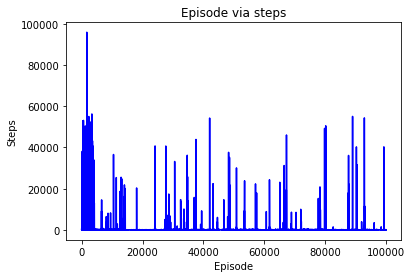

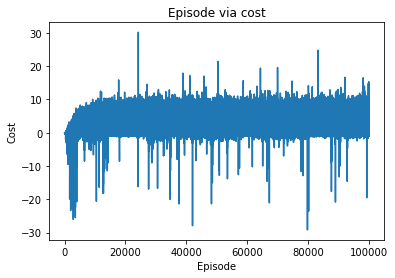

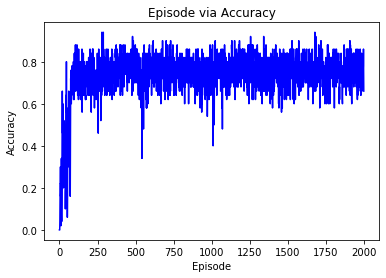

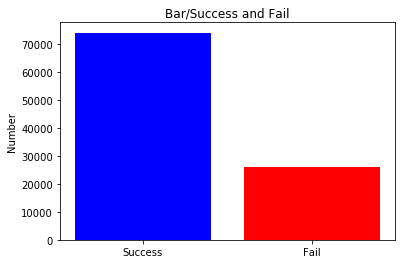

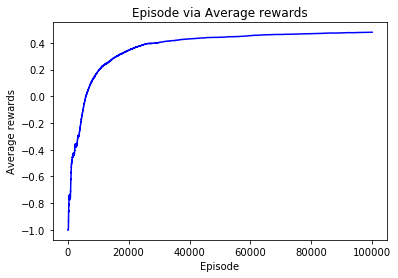

The shortest route: 18
The longest route: 52973
correctness:1.0


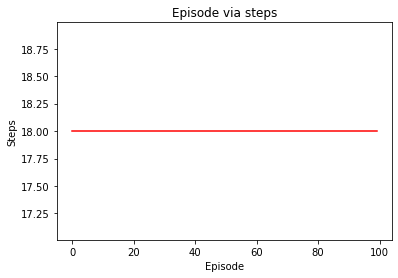

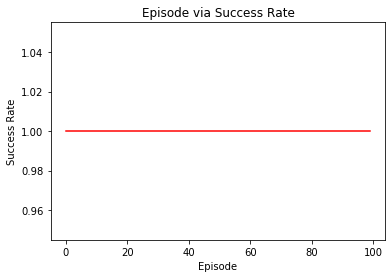

In [1]:
#10x10 frozen lake/SARSA
import random
import numpy as np
import math
import matplotlib.pyplot as plt

from Parameters import *
from Environment import Environment
from SARSA import SARSA


# Training parameters
NUM_STEPS     = 100
NUM_EPISODES  = 100000
LEARNING_RATE = 0.01
GAMMA         = 0.9
EPSILON       = 0.9

np.random.seed(10)

# create a FrozenLake environment
env = Environment()


# Create a SARSA agent
SARSA = SARSA(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

# write_Q_table(file_name='./Q_table/SARSA', Q = Q)

# Learning and updating
Q, steps, all_costs, accuracy, all_cost_bar, Reward_list = SARSA.train()

SARSA.plot_results(steps, all_costs, accuracy, all_cost_bar, Reward_list)

# Test after training
SARSA.test()

# Remain visualization
env.mainloop()


## 4X4 frozen lake/ Q learning Results

Create 4x4 environment!
episode:0
episode:1
episode:2
episode:3
episode:4
episode:5
episode:6
episode:7
episode:8
episode:9
episode:10
episode:11
episode:12
episode:13
episode:14
episode:15
episode:16
episode:17
episode:18
episode:19
episode:20
episode:21
episode:22
episode:23
episode:24
episode:25
episode:26
episode:27
episode:28
episode:29
episode:30
episode:31
episode:32
episode:33
episode:34
episode:35
episode:36
episode:37
episode:38
episode:39
episode:40
episode:41
episode:42
episode:43
episode:44
episode:45
episode:46
episode:47
episode:48
episode:49
episode:50
episode:51
episode:52
episode:53
episode:54
episode:55
episode:56
episode:57
episode:58
episode:59
episode:60
episode:61
episode:62
episode:63
episode:64
episode:65
episode:66
episode:67
episode:68
episode:69
episode:70
episode:71
episode:72
episode:73
episode:74
episode:75
episode:76
episode:77
episode:78
episode:79
episode:80
episode:81
episode:82
episode:83
episode:84
episode:85
episode:86
episode:87
episode:88
episode

episode:703
episode:704
episode:705
episode:706
episode:707
episode:708
episode:709
episode:710
episode:711
episode:712
episode:713
episode:714
episode:715
episode:716
episode:717
episode:718
episode:719
episode:720
episode:721
episode:722
episode:723
episode:724
episode:725
episode:726
episode:727
episode:728
episode:729
episode:730
episode:731
episode:732
episode:733
episode:734
episode:735
episode:736
episode:737
episode:738
episode:739
episode:740
episode:741
episode:742
episode:743
episode:744
episode:745
episode:746
episode:747
episode:748
episode:749
episode:750
episode:751
episode:752
episode:753
episode:754
episode:755
episode:756
episode:757
episode:758
episode:759
episode:760
episode:761
episode:762
episode:763
episode:764
episode:765
episode:766
episode:767
episode:768
episode:769
episode:770
episode:771
episode:772
episode:773
episode:774
episode:775
episode:776
episode:777
episode:778
episode:779
episode:780
episode:781
episode:782
episode:783
episode:784
episode:785
epis

episode:1369
episode:1370
episode:1371
episode:1372
episode:1373
episode:1374
episode:1375
episode:1376
episode:1377
episode:1378
episode:1379
episode:1380
episode:1381
episode:1382
episode:1383
episode:1384
episode:1385
episode:1386
episode:1387
episode:1388
episode:1389
episode:1390
episode:1391
episode:1392
episode:1393
episode:1394
episode:1395
episode:1396
episode:1397
episode:1398
episode:1399
episode:1400
episode:1401
episode:1402
episode:1403
episode:1404
episode:1405
episode:1406
episode:1407
episode:1408
episode:1409
episode:1410
episode:1411
episode:1412
episode:1413
episode:1414
episode:1415
episode:1416
episode:1417
episode:1418
episode:1419
episode:1420
episode:1421
episode:1422
episode:1423
episode:1424
episode:1425
episode:1426
episode:1427
episode:1428
episode:1429
episode:1430
episode:1431
episode:1432
episode:1433
episode:1434
episode:1435
episode:1436
episode:1437
episode:1438
episode:1439
episode:1440
episode:1441
episode:1442
episode:1443
episode:1444
episode:1445

episode:2007
episode:2008
episode:2009
episode:2010
episode:2011
episode:2012
episode:2013
episode:2014
episode:2015
episode:2016
episode:2017
episode:2018
episode:2019
episode:2020
episode:2021
episode:2022
episode:2023
episode:2024
episode:2025
episode:2026
episode:2027
episode:2028
episode:2029
episode:2030
episode:2031
episode:2032
episode:2033
episode:2034
episode:2035
episode:2036
episode:2037
episode:2038
episode:2039
episode:2040
episode:2041
episode:2042
episode:2043
episode:2044
episode:2045
episode:2046
episode:2047
episode:2048
episode:2049
episode:2050
episode:2051
episode:2052
episode:2053
episode:2054
episode:2055
episode:2056
episode:2057
episode:2058
episode:2059
episode:2060
episode:2061
episode:2062
episode:2063
episode:2064
episode:2065
episode:2066
episode:2067
episode:2068
episode:2069
episode:2070
episode:2071
episode:2072
episode:2073
episode:2074
episode:2075
episode:2076
episode:2077
episode:2078
episode:2079
episode:2080
episode:2081
episode:2082
episode:2083

episode:2647
episode:2648
episode:2649
episode:2650
episode:2651
episode:2652
episode:2653
episode:2654
episode:2655
episode:2656
episode:2657
episode:2658
episode:2659
episode:2660
episode:2661
episode:2662
episode:2663
episode:2664
episode:2665
episode:2666
episode:2667
episode:2668
episode:2669
episode:2670
episode:2671
episode:2672
episode:2673
episode:2674
episode:2675
episode:2676
episode:2677
episode:2678
episode:2679
episode:2680
episode:2681
episode:2682
episode:2683
episode:2684
episode:2685
episode:2686
episode:2687
episode:2688
episode:2689
episode:2690
episode:2691
episode:2692
episode:2693
episode:2694
episode:2695
episode:2696
episode:2697
episode:2698
episode:2699
episode:2700
episode:2701
episode:2702
episode:2703
episode:2704
episode:2705
episode:2706
episode:2707
episode:2708
episode:2709
episode:2710
episode:2711
episode:2712
episode:2713
episode:2714
episode:2715
episode:2716
episode:2717
episode:2718
episode:2719
episode:2720
episode:2721
episode:2722
episode:2723

episode:3296
episode:3297
episode:3298
episode:3299
episode:3300
episode:3301
episode:3302
episode:3303
episode:3304
episode:3305
episode:3306
episode:3307
episode:3308
episode:3309
episode:3310
episode:3311
episode:3312
episode:3313
episode:3314
episode:3315
episode:3316
episode:3317
episode:3318
episode:3319
episode:3320
episode:3321
episode:3322
episode:3323
episode:3324
episode:3325
episode:3326
episode:3327
episode:3328
episode:3329
episode:3330
episode:3331
episode:3332
episode:3333
episode:3334
episode:3335
episode:3336
episode:3337
episode:3338
episode:3339
episode:3340
episode:3341
episode:3342
episode:3343
episode:3344
episode:3345
episode:3346
episode:3347
episode:3348
episode:3349
episode:3350
episode:3351
episode:3352
episode:3353
episode:3354
episode:3355
episode:3356
episode:3357
episode:3358
episode:3359
episode:3360
episode:3361
episode:3362
episode:3363
episode:3364
episode:3365
episode:3366
episode:3367
episode:3368
episode:3369
episode:3370
episode:3371
episode:3372

episode:3935
episode:3936
episode:3937
episode:3938
episode:3939
episode:3940
episode:3941
episode:3942
episode:3943
episode:3944
episode:3945
episode:3946
episode:3947
episode:3948
episode:3949
episode:3950
episode:3951
episode:3952
episode:3953
episode:3954
episode:3955
episode:3956
episode:3957
episode:3958
episode:3959
episode:3960
episode:3961
episode:3962
episode:3963
episode:3964
episode:3965
episode:3966
episode:3967
episode:3968
episode:3969
episode:3970
episode:3971
episode:3972
episode:3973
episode:3974
episode:3975
episode:3976
episode:3977
episode:3978
episode:3979
episode:3980
episode:3981
episode:3982
episode:3983
episode:3984
episode:3985
episode:3986
episode:3987
episode:3988
episode:3989
episode:3990
episode:3991
episode:3992
episode:3993
episode:3994
episode:3995
episode:3996
episode:3997
episode:3998
episode:3999
episode:4000
episode:4001
episode:4002
episode:4003
episode:4004
episode:4005
episode:4006
episode:4007
episode:4008
episode:4009
episode:4010
episode:4011

episode:4586
episode:4587
episode:4588
episode:4589
episode:4590
episode:4591
episode:4592
episode:4593
episode:4594
episode:4595
episode:4596
episode:4597
episode:4598
episode:4599
episode:4600
episode:4601
episode:4602
episode:4603
episode:4604
episode:4605
episode:4606
episode:4607
episode:4608
episode:4609
episode:4610
episode:4611
episode:4612
episode:4613
episode:4614
episode:4615
episode:4616
episode:4617
episode:4618
episode:4619
episode:4620
episode:4621
episode:4622
episode:4623
episode:4624
episode:4625
episode:4626
episode:4627
episode:4628
episode:4629
episode:4630
episode:4631
episode:4632
episode:4633
episode:4634
episode:4635
episode:4636
episode:4637
episode:4638
episode:4639
episode:4640
episode:4641
episode:4642
episode:4643
episode:4644
episode:4645
episode:4646
episode:4647
episode:4648
episode:4649
episode:4650
episode:4651
episode:4652
episode:4653
episode:4654
episode:4655
episode:4656
episode:4657
episode:4658
episode:4659
episode:4660
episode:4661
episode:4662

episode:5217
episode:5218
episode:5219
episode:5220
episode:5221
episode:5222
episode:5223
episode:5224
episode:5225
episode:5226
episode:5227
episode:5228
episode:5229
episode:5230
episode:5231
episode:5232
episode:5233
episode:5234
episode:5235
episode:5236
episode:5237
episode:5238
episode:5239
episode:5240
episode:5241
episode:5242
episode:5243
episode:5244
episode:5245
episode:5246
episode:5247
episode:5248
episode:5249
episode:5250
episode:5251
episode:5252
episode:5253
episode:5254
episode:5255
episode:5256
episode:5257
episode:5258
episode:5259
episode:5260
episode:5261
episode:5262
episode:5263
episode:5264
episode:5265
episode:5266
episode:5267
episode:5268
episode:5269
episode:5270
episode:5271
episode:5272
episode:5273
episode:5274
episode:5275
episode:5276
episode:5277
episode:5278
episode:5279
episode:5280
episode:5281
episode:5282
episode:5283
episode:5284
episode:5285
episode:5286
episode:5287
episode:5288
episode:5289
episode:5290
episode:5291
episode:5292
episode:5293

episode:5856
episode:5857
episode:5858
episode:5859
episode:5860
episode:5861
episode:5862
episode:5863
episode:5864
episode:5865
episode:5866
episode:5867
episode:5868
episode:5869
episode:5870
episode:5871
episode:5872
episode:5873
episode:5874
episode:5875
episode:5876
episode:5877
episode:5878
episode:5879
episode:5880
episode:5881
episode:5882
episode:5883
episode:5884
episode:5885
episode:5886
episode:5887
episode:5888
episode:5889
episode:5890
episode:5891
episode:5892
episode:5893
episode:5894
episode:5895
episode:5896
episode:5897
episode:5898
episode:5899
episode:5900
episode:5901
episode:5902
episode:5903
episode:5904
episode:5905
episode:5906
episode:5907
episode:5908
episode:5909
episode:5910
episode:5911
episode:5912
episode:5913
episode:5914
episode:5915
episode:5916
episode:5917
episode:5918
episode:5919
episode:5920
episode:5921
episode:5922
episode:5923
episode:5924
episode:5925
episode:5926
episode:5927
episode:5928
episode:5929
episode:5930
episode:5931
episode:5932

episode:6505
episode:6506
episode:6507
episode:6508
episode:6509
episode:6510
episode:6511
episode:6512
episode:6513
episode:6514
episode:6515
episode:6516
episode:6517
episode:6518
episode:6519
episode:6520
episode:6521
episode:6522
episode:6523
episode:6524
episode:6525
episode:6526
episode:6527
episode:6528
episode:6529
episode:6530
episode:6531
episode:6532
episode:6533
episode:6534
episode:6535
episode:6536
episode:6537
episode:6538
episode:6539
episode:6540
episode:6541
episode:6542
episode:6543
episode:6544
episode:6545
episode:6546
episode:6547
episode:6548
episode:6549
episode:6550
episode:6551
episode:6552
episode:6553
episode:6554
episode:6555
episode:6556
episode:6557
episode:6558
episode:6559
episode:6560
episode:6561
episode:6562
episode:6563
episode:6564
episode:6565
episode:6566
episode:6567
episode:6568
episode:6569
episode:6570
episode:6571
episode:6572
episode:6573
episode:6574
episode:6575
episode:6576
episode:6577
episode:6578
episode:6579
episode:6580
episode:6581

episode:7144
episode:7145
episode:7146
episode:7147
episode:7148
episode:7149
episode:7150
episode:7151
episode:7152
episode:7153
episode:7154
episode:7155
episode:7156
episode:7157
episode:7158
episode:7159
episode:7160
episode:7161
episode:7162
episode:7163
episode:7164
episode:7165
episode:7166
episode:7167
episode:7168
episode:7169
episode:7170
episode:7171
episode:7172
episode:7173
episode:7174
episode:7175
episode:7176
episode:7177
episode:7178
episode:7179
episode:7180
episode:7181
episode:7182
episode:7183
episode:7184
episode:7185
episode:7186
episode:7187
episode:7188
episode:7189
episode:7190
episode:7191
episode:7192
episode:7193
episode:7194
episode:7195
episode:7196
episode:7197
episode:7198
episode:7199
episode:7200
episode:7201
episode:7202
episode:7203
episode:7204
episode:7205
episode:7206
episode:7207
episode:7208
episode:7209
episode:7210
episode:7211
episode:7212
episode:7213
episode:7214
episode:7215
episode:7216
episode:7217
episode:7218
episode:7219
episode:7220

episode:7778
episode:7779
episode:7780
episode:7781
episode:7782
episode:7783
episode:7784
episode:7785
episode:7786
episode:7787
episode:7788
episode:7789
episode:7790
episode:7791
episode:7792
episode:7793
episode:7794
episode:7795
episode:7796
episode:7797
episode:7798
episode:7799
episode:7800
episode:7801
episode:7802
episode:7803
episode:7804
episode:7805
episode:7806
episode:7807
episode:7808
episode:7809
episode:7810
episode:7811
episode:7812
episode:7813
episode:7814
episode:7815
episode:7816
episode:7817
episode:7818
episode:7819
episode:7820
episode:7821
episode:7822
episode:7823
episode:7824
episode:7825
episode:7826
episode:7827
episode:7828
episode:7829
episode:7830
episode:7831
episode:7832
episode:7833
episode:7834
episode:7835
episode:7836
episode:7837
episode:7838
episode:7839
episode:7840
episode:7841
episode:7842
episode:7843
episode:7844
episode:7845
episode:7846
episode:7847
episode:7848
episode:7849
episode:7850
episode:7851
episode:7852
episode:7853
episode:7854

episode:8412
episode:8413
episode:8414
episode:8415
episode:8416
episode:8417
episode:8418
episode:8419
episode:8420
episode:8421
episode:8422
episode:8423
episode:8424
episode:8425
episode:8426
episode:8427
episode:8428
episode:8429
episode:8430
episode:8431
episode:8432
episode:8433
episode:8434
episode:8435
episode:8436
episode:8437
episode:8438
episode:8439
episode:8440
episode:8441
episode:8442
episode:8443
episode:8444
episode:8445
episode:8446
episode:8447
episode:8448
episode:8449
episode:8450
episode:8451
episode:8452
episode:8453
episode:8454
episode:8455
episode:8456
episode:8457
episode:8458
episode:8459
episode:8460
episode:8461
episode:8462
episode:8463
episode:8464
episode:8465
episode:8466
episode:8467
episode:8468
episode:8469
episode:8470
episode:8471
episode:8472
episode:8473
episode:8474
episode:8475
episode:8476
episode:8477
episode:8478
episode:8479
episode:8480
episode:8481
episode:8482
episode:8483
episode:8484
episode:8485
episode:8486
episode:8487
episode:8488

episode:9051
episode:9052
episode:9053
episode:9054
episode:9055
episode:9056
episode:9057
episode:9058
episode:9059
episode:9060
episode:9061
episode:9062
episode:9063
episode:9064
episode:9065
episode:9066
episode:9067
episode:9068
episode:9069
episode:9070
episode:9071
episode:9072
episode:9073
episode:9074
episode:9075
episode:9076
episode:9077
episode:9078
episode:9079
episode:9080
episode:9081
episode:9082
episode:9083
episode:9084
episode:9085
episode:9086
episode:9087
episode:9088
episode:9089
episode:9090
episode:9091
episode:9092
episode:9093
episode:9094
episode:9095
episode:9096
episode:9097
episode:9098
episode:9099
episode:9100
episode:9101
episode:9102
episode:9103
episode:9104
episode:9105
episode:9106
episode:9107
episode:9108
episode:9109
episode:9110
episode:9111
episode:9112
episode:9113
episode:9114
episode:9115
episode:9116
episode:9117
episode:9118
episode:9119
episode:9120
episode:9121
episode:9122
episode:9123
episode:9124
episode:9125
episode:9126
episode:9127

episode:9696
episode:9697
episode:9698
episode:9699
episode:9700
episode:9701
episode:9702
episode:9703
episode:9704
episode:9705
episode:9706
episode:9707
episode:9708
episode:9709
episode:9710
episode:9711
episode:9712
episode:9713
episode:9714
episode:9715
episode:9716
episode:9717
episode:9718
episode:9719
episode:9720
episode:9721
episode:9722
episode:9723
episode:9724
episode:9725
episode:9726
episode:9727
episode:9728
episode:9729
episode:9730
episode:9731
episode:9732
episode:9733
episode:9734
episode:9735
episode:9736
episode:9737
episode:9738
episode:9739
episode:9740
episode:9741
episode:9742
episode:9743
episode:9744
episode:9745
episode:9746
episode:9747
episode:9748
episode:9749
episode:9750
episode:9751
episode:9752
episode:9753
episode:9754
episode:9755
episode:9756
episode:9757
episode:9758
episode:9759
episode:9760
episode:9761
episode:9762
episode:9763
episode:9764
episode:9765
episode:9766
episode:9767
episode:9768
episode:9769
episode:9770
episode:9771
episode:9772

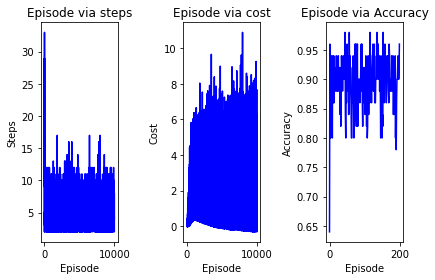

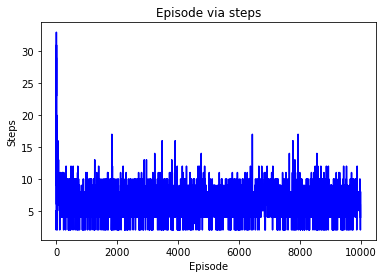

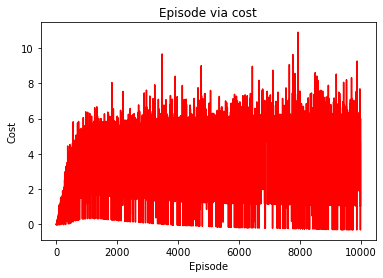

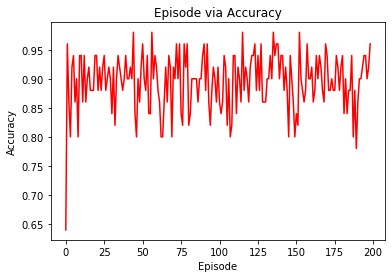

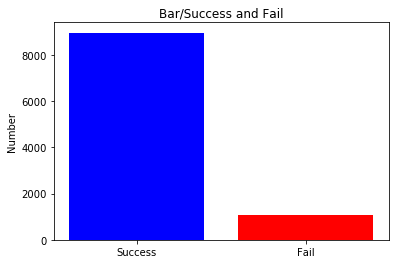

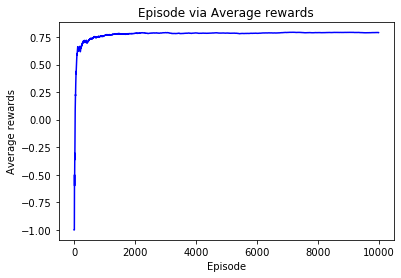

The shortest route: 6
The longest route: 33
correctness:1.0


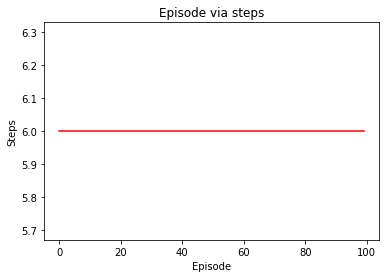

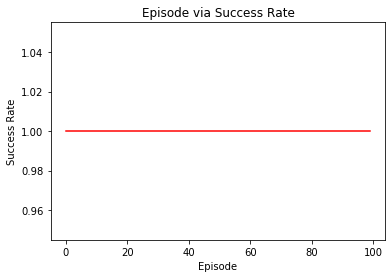

In [1]:
# 4X4 frozen lake/ Q learning
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from Q_learning import Q_learning
from Environment import Environment
from Parameters import *

np.random.seed(1)

# Create an environment
env = Environment()

env.grid_size = 4

# Create a q learning agent
Q_learning = Q_learning(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

# Learning and updating
Q_table, steps, all_costs, accuracy, all_cost_bar, Reward_list = Q_learning.train()

Q_learning.plot_results(steps, all_costs, accuracy, all_cost_bar, Reward_list)

# Test after training
Q_learning.test()

# Remain visualization
env.mainloop()


## 10x10 frozen lake/Q learning Results

Create 10x10 environment!
episode:0
episode:1
episode:2
episode:3
episode:4
episode:5
episode:6
episode:7
episode:8
episode:9
episode:10
episode:11
episode:12
episode:13
episode:14
episode:15
episode:16
episode:17
episode:18
episode:19
episode:20
episode:21
episode:22
episode:23
episode:24
episode:25
episode:26
episode:27
episode:28
episode:29
episode:30
episode:31
episode:32
episode:33
episode:34
episode:35
episode:36
episode:37
episode:38
episode:39
episode:40
episode:41
episode:42
episode:43
episode:44
episode:45
episode:46
episode:47
episode:48
episode:49
episode:50
episode:51
episode:52
episode:53
episode:54
episode:55
episode:56
episode:57
episode:58
episode:59
episode:60
episode:61
episode:62
episode:63
episode:64
episode:65
episode:66
episode:67
episode:68
episode:69
episode:70
episode:71
episode:72
episode:73
episode:74
episode:75
episode:76
episode:77
episode:78
episode:79
episode:80
episode:81
episode:82
episode:83
episode:84
episode:85
episode:86
episode:87
episode:88
episo

episode:693
episode:694
episode:695
episode:696
episode:697
episode:698
episode:699
episode:700
episode:701
episode:702
episode:703
episode:704
episode:705
episode:706
episode:707
episode:708
episode:709
episode:710
episode:711
episode:712
episode:713
episode:714
episode:715
episode:716
episode:717
episode:718
episode:719
episode:720
episode:721
episode:722
episode:723
episode:724
episode:725
episode:726
episode:727
episode:728
episode:729
episode:730
episode:731
episode:732
episode:733
episode:734
episode:735
episode:736
episode:737
episode:738
episode:739
episode:740
episode:741
episode:742
episode:743
episode:744
episode:745
episode:746
episode:747
episode:748
episode:749
episode:750
episode:751
episode:752
episode:753
episode:754
episode:755
episode:756
episode:757
episode:758
episode:759
episode:760
episode:761
episode:762
episode:763
episode:764
episode:765
episode:766
episode:767
episode:768
episode:769
episode:770
episode:771
episode:772
episode:773
episode:774
episode:775
epis

episode:1357
episode:1358
episode:1359
episode:1360
episode:1361
episode:1362
episode:1363
episode:1364
episode:1365
episode:1366
episode:1367
episode:1368
episode:1369
episode:1370
episode:1371
episode:1372
episode:1373
episode:1374
episode:1375
episode:1376
episode:1377
episode:1378
episode:1379
episode:1380
episode:1381
episode:1382
episode:1383
episode:1384
episode:1385
episode:1386
episode:1387
episode:1388
episode:1389
episode:1390
episode:1391
episode:1392
episode:1393
episode:1394
episode:1395
episode:1396
episode:1397
episode:1398
episode:1399
episode:1400
episode:1401
episode:1402
episode:1403
episode:1404
episode:1405
episode:1406
episode:1407
episode:1408
episode:1409
episode:1410
episode:1411
episode:1412
episode:1413
episode:1414
episode:1415
episode:1416
episode:1417
episode:1418
episode:1419
episode:1420
episode:1421
episode:1422
episode:1423
episode:1424
episode:1425
episode:1426
episode:1427
episode:1428
episode:1429
episode:1430
episode:1431
episode:1432
episode:1433

episode:1999
episode:2000
episode:2001
episode:2002
episode:2003
episode:2004
episode:2005
episode:2006
episode:2007
episode:2008
episode:2009
episode:2010
episode:2011
episode:2012
episode:2013
episode:2014
episode:2015
episode:2016
episode:2017
episode:2018
episode:2019
episode:2020
episode:2021
episode:2022
episode:2023
episode:2024
episode:2025
episode:2026
episode:2027
episode:2028
episode:2029
episode:2030
episode:2031
episode:2032
episode:2033
episode:2034
episode:2035
episode:2036
episode:2037
episode:2038
episode:2039
episode:2040
episode:2041
episode:2042
episode:2043
episode:2044
episode:2045
episode:2046
episode:2047
episode:2048
episode:2049
episode:2050
episode:2051
episode:2052
episode:2053
episode:2054
episode:2055
episode:2056
episode:2057
episode:2058
episode:2059
episode:2060
episode:2061
episode:2062
episode:2063
episode:2064
episode:2065
episode:2066
episode:2067
episode:2068
episode:2069
episode:2070
episode:2071
episode:2072
episode:2073
episode:2074
episode:2075

episode:2633
episode:2634
episode:2635
episode:2636
episode:2637
episode:2638
episode:2639
episode:2640
episode:2641
episode:2642
episode:2643
episode:2644
episode:2645
episode:2646
episode:2647
episode:2648
episode:2649
episode:2650
episode:2651
episode:2652
episode:2653
episode:2654
episode:2655
episode:2656
episode:2657
episode:2658
episode:2659
episode:2660
episode:2661
episode:2662
episode:2663
episode:2664
episode:2665
episode:2666
episode:2667
episode:2668
episode:2669
episode:2670
episode:2671
episode:2672
episode:2673
episode:2674
episode:2675
episode:2676
episode:2677
episode:2678
episode:2679
episode:2680
episode:2681
episode:2682
episode:2683
episode:2684
episode:2685
episode:2686
episode:2687
episode:2688
episode:2689
episode:2690
episode:2691
episode:2692
episode:2693
episode:2694
episode:2695
episode:2696
episode:2697
episode:2698
episode:2699
episode:2700
episode:2701
episode:2702
episode:2703
episode:2704
episode:2705
episode:2706
episode:2707
episode:2708
episode:2709

episode:3268
episode:3269
episode:3270
episode:3271
episode:3272
episode:3273
episode:3274
episode:3275
episode:3276
episode:3277
episode:3278
episode:3279
episode:3280
episode:3281
episode:3282
episode:3283
episode:3284
episode:3285
episode:3286
episode:3287
episode:3288
episode:3289
episode:3290
episode:3291
episode:3292
episode:3293
episode:3294
episode:3295
episode:3296
episode:3297
episode:3298
episode:3299
episode:3300
episode:3301
episode:3302
episode:3303
episode:3304
episode:3305
episode:3306
episode:3307
episode:3308
episode:3309
episode:3310
episode:3311
episode:3312
episode:3313
episode:3314
episode:3315
episode:3316
episode:3317
episode:3318
episode:3319
episode:3320
episode:3321
episode:3322
episode:3323
episode:3324
episode:3325
episode:3326
episode:3327
episode:3328
episode:3329
episode:3330
episode:3331
episode:3332
episode:3333
episode:3334
episode:3335
episode:3336
episode:3337
episode:3338
episode:3339
episode:3340
episode:3341
episode:3342
episode:3343
episode:3344

episode:3905
episode:3906
episode:3907
episode:3908
episode:3909
episode:3910
episode:3911
episode:3912
episode:3913
episode:3914
episode:3915
episode:3916
episode:3917
episode:3918
episode:3919
episode:3920
episode:3921
episode:3922
episode:3923
episode:3924
episode:3925
episode:3926
episode:3927
episode:3928
episode:3929
episode:3930
episode:3931
episode:3932
episode:3933
episode:3934
episode:3935
episode:3936
episode:3937
episode:3938
episode:3939
episode:3940
episode:3941
episode:3942
episode:3943
episode:3944
episode:3945
episode:3946
episode:3947
episode:3948
episode:3949
episode:3950
episode:3951
episode:3952
episode:3953
episode:3954
episode:3955
episode:3956
episode:3957
episode:3958
episode:3959
episode:3960
episode:3961
episode:3962
episode:3963
episode:3964
episode:3965
episode:3966
episode:3967
episode:3968
episode:3969
episode:3970
episode:3971
episode:3972
episode:3973
episode:3974
episode:3975
episode:3976
episode:3977
episode:3978
episode:3979
episode:3980
episode:3981

episode:4540
episode:4541
episode:4542
episode:4543
episode:4544
episode:4545
episode:4546
episode:4547
episode:4548
episode:4549
episode:4550
episode:4551
episode:4552
episode:4553
episode:4554
episode:4555
episode:4556
episode:4557
episode:4558
episode:4559
episode:4560
episode:4561
episode:4562
episode:4563
episode:4564
episode:4565
episode:4566
episode:4567
episode:4568
episode:4569
episode:4570
episode:4571
episode:4572
episode:4573
episode:4574
episode:4575
episode:4576
episode:4577
episode:4578
episode:4579
episode:4580
episode:4581
episode:4582
episode:4583
episode:4584
episode:4585
episode:4586
episode:4587
episode:4588
episode:4589
episode:4590
episode:4591
episode:4592
episode:4593
episode:4594
episode:4595
episode:4596
episode:4597
episode:4598
episode:4599
episode:4600
episode:4601
episode:4602
episode:4603
episode:4604
episode:4605
episode:4606
episode:4607
episode:4608
episode:4609
episode:4610
episode:4611
episode:4612
episode:4613
episode:4614
episode:4615
episode:4616

episode:5174
episode:5175
episode:5176
episode:5177
episode:5178
episode:5179
episode:5180
episode:5181
episode:5182
episode:5183
episode:5184
episode:5185
episode:5186
episode:5187
episode:5188
episode:5189
episode:5190
episode:5191
episode:5192
episode:5193
episode:5194
episode:5195
episode:5196
episode:5197
episode:5198
episode:5199
episode:5200
episode:5201
episode:5202
episode:5203
episode:5204
episode:5205
episode:5206
episode:5207
episode:5208
episode:5209
episode:5210
episode:5211
episode:5212
episode:5213
episode:5214
episode:5215
episode:5216
episode:5217
episode:5218
episode:5219
episode:5220
episode:5221
episode:5222
episode:5223
episode:5224
episode:5225
episode:5226
episode:5227
episode:5228
episode:5229
episode:5230
episode:5231
episode:5232
episode:5233
episode:5234
episode:5235
episode:5236
episode:5237
episode:5238
episode:5239
episode:5240
episode:5241
episode:5242
episode:5243
episode:5244
episode:5245
episode:5246
episode:5247
episode:5248
episode:5249
episode:5250

episode:5807
episode:5808
episode:5809
episode:5810
episode:5811
episode:5812
episode:5813
episode:5814
episode:5815
episode:5816
episode:5817
episode:5818
episode:5819
episode:5820
episode:5821
episode:5822
episode:5823
episode:5824
episode:5825
episode:5826
episode:5827
episode:5828
episode:5829
episode:5830
episode:5831
episode:5832
episode:5833
episode:5834
episode:5835
episode:5836
episode:5837
episode:5838
episode:5839
episode:5840
episode:5841
episode:5842
episode:5843
episode:5844
episode:5845
episode:5846
episode:5847
episode:5848
episode:5849
episode:5850
episode:5851
episode:5852
episode:5853
episode:5854
episode:5855
episode:5856
episode:5857
episode:5858
episode:5859
episode:5860
episode:5861
episode:5862
episode:5863
episode:5864
episode:5865
episode:5866
episode:5867
episode:5868
episode:5869
episode:5870
episode:5871
episode:5872
episode:5873
episode:5874
episode:5875
episode:5876
episode:5877
episode:5878
episode:5879
episode:5880
episode:5881
episode:5882
episode:5883

episode:6446
episode:6447
episode:6448
episode:6449
episode:6450
episode:6451
episode:6452
episode:6453
episode:6454
episode:6455
episode:6456
episode:6457
episode:6458
episode:6459
episode:6460
episode:6461
episode:6462
episode:6463
episode:6464
episode:6465
episode:6466
episode:6467
episode:6468
episode:6469
episode:6470
episode:6471
episode:6472
episode:6473
episode:6474
episode:6475
episode:6476
episode:6477
episode:6478
episode:6479
episode:6480
episode:6481
episode:6482
episode:6483
episode:6484
episode:6485
episode:6486
episode:6487
episode:6488
episode:6489
episode:6490
episode:6491
episode:6492
episode:6493
episode:6494
episode:6495
episode:6496
episode:6497
episode:6498
episode:6499
episode:6500
episode:6501
episode:6502
episode:6503
episode:6504
episode:6505
episode:6506
episode:6507
episode:6508
episode:6509
episode:6510
episode:6511
episode:6512
episode:6513
episode:6514
episode:6515
episode:6516
episode:6517
episode:6518
episode:6519
episode:6520
episode:6521
episode:6522

episode:7085
episode:7086
episode:7087
episode:7088
episode:7089
episode:7090
episode:7091
episode:7092
episode:7093
episode:7094
episode:7095
episode:7096
episode:7097
episode:7098
episode:7099
episode:7100
episode:7101
episode:7102
episode:7103
episode:7104
episode:7105
episode:7106
episode:7107
episode:7108
episode:7109
episode:7110
episode:7111
episode:7112
episode:7113
episode:7114
episode:7115
episode:7116
episode:7117
episode:7118
episode:7119
episode:7120
episode:7121
episode:7122
episode:7123
episode:7124
episode:7125
episode:7126
episode:7127
episode:7128
episode:7129
episode:7130
episode:7131
episode:7132
episode:7133
episode:7134
episode:7135
episode:7136
episode:7137
episode:7138
episode:7139
episode:7140
episode:7141
episode:7142
episode:7143
episode:7144
episode:7145
episode:7146
episode:7147
episode:7148
episode:7149
episode:7150
episode:7151
episode:7152
episode:7153
episode:7154
episode:7155
episode:7156
episode:7157
episode:7158
episode:7159
episode:7160
episode:7161

episode:7720
episode:7721
episode:7722
episode:7723
episode:7724
episode:7725
episode:7726
episode:7727
episode:7728
episode:7729
episode:7730
episode:7731
episode:7732
episode:7733
episode:7734
episode:7735
episode:7736
episode:7737
episode:7738
episode:7739
episode:7740
episode:7741
episode:7742
episode:7743
episode:7744
episode:7745
episode:7746
episode:7747
episode:7748
episode:7749
episode:7750
episode:7751
episode:7752
episode:7753
episode:7754
episode:7755
episode:7756
episode:7757
episode:7758
episode:7759
episode:7760
episode:7761
episode:7762
episode:7763
episode:7764
episode:7765
episode:7766
episode:7767
episode:7768
episode:7769
episode:7770
episode:7771
episode:7772
episode:7773
episode:7774
episode:7775
episode:7776
episode:7777
episode:7778
episode:7779
episode:7780
episode:7781
episode:7782
episode:7783
episode:7784
episode:7785
episode:7786
episode:7787
episode:7788
episode:7789
episode:7790
episode:7791
episode:7792
episode:7793
episode:7794
episode:7795
episode:7796

episode:8356
episode:8357
episode:8358
episode:8359
episode:8360
episode:8361
episode:8362
episode:8363
episode:8364
episode:8365
episode:8366
episode:8367
episode:8368
episode:8369
episode:8370
episode:8371
episode:8372
episode:8373
episode:8374
episode:8375
episode:8376
episode:8377
episode:8378
episode:8379
episode:8380
episode:8381
episode:8382
episode:8383
episode:8384
episode:8385
episode:8386
episode:8387
episode:8388
episode:8389
episode:8390
episode:8391
episode:8392
episode:8393
episode:8394
episode:8395
episode:8396
episode:8397
episode:8398
episode:8399
episode:8400
episode:8401
episode:8402
episode:8403
episode:8404
episode:8405
episode:8406
episode:8407
episode:8408
episode:8409
episode:8410
episode:8411
episode:8412
episode:8413
episode:8414
episode:8415
episode:8416
episode:8417
episode:8418
episode:8419
episode:8420
episode:8421
episode:8422
episode:8423
episode:8424
episode:8425
episode:8426
episode:8427
episode:8428
episode:8429
episode:8430
episode:8431
episode:8432

episode:8998
episode:8999
episode:9000
episode:9001
episode:9002
episode:9003
episode:9004
episode:9005
episode:9006
episode:9007
episode:9008
episode:9009
episode:9010
episode:9011
episode:9012
episode:9013
episode:9014
episode:9015
episode:9016
episode:9017
episode:9018
episode:9019
episode:9020
episode:9021
episode:9022
episode:9023
episode:9024
episode:9025
episode:9026
episode:9027
episode:9028
episode:9029
episode:9030
episode:9031
episode:9032
episode:9033
episode:9034
episode:9035
episode:9036
episode:9037
episode:9038
episode:9039
episode:9040
episode:9041
episode:9042
episode:9043
episode:9044
episode:9045
episode:9046
episode:9047
episode:9048
episode:9049
episode:9050
episode:9051
episode:9052
episode:9053
episode:9054
episode:9055
episode:9056
episode:9057
episode:9058
episode:9059
episode:9060
episode:9061
episode:9062
episode:9063
episode:9064
episode:9065
episode:9066
episode:9067
episode:9068
episode:9069
episode:9070
episode:9071
episode:9072
episode:9073
episode:9074

episode:9636
episode:9637
episode:9638
episode:9639
episode:9640
episode:9641
episode:9642
episode:9643
episode:9644
episode:9645
episode:9646
episode:9647
episode:9648
episode:9649
episode:9650
episode:9651
episode:9652
episode:9653
episode:9654
episode:9655
episode:9656
episode:9657
episode:9658
episode:9659
episode:9660
episode:9661
episode:9662
episode:9663
episode:9664
episode:9665
episode:9666
episode:9667
episode:9668
episode:9669
episode:9670
episode:9671
episode:9672
episode:9673
episode:9674
episode:9675
episode:9676
episode:9677
episode:9678
episode:9679
episode:9680
episode:9681
episode:9682
episode:9683
episode:9684
episode:9685
episode:9686
episode:9687
episode:9688
episode:9689
episode:9690
episode:9691
episode:9692
episode:9693
episode:9694
episode:9695
episode:9696
episode:9697
episode:9698
episode:9699
episode:9700
episode:9701
episode:9702
episode:9703
episode:9704
episode:9705
episode:9706
episode:9707
episode:9708
episode:9709
episode:9710
episode:9711
episode:9712

episode:10252
episode:10253
episode:10254
episode:10255
episode:10256
episode:10257
episode:10258
episode:10259
episode:10260
episode:10261
episode:10262
episode:10263
episode:10264
episode:10265
episode:10266
episode:10267
episode:10268
episode:10269
episode:10270
episode:10271
episode:10272
episode:10273
episode:10274
episode:10275
episode:10276
episode:10277
episode:10278
episode:10279
episode:10280
episode:10281
episode:10282
episode:10283
episode:10284
episode:10285
episode:10286
episode:10287
episode:10288
episode:10289
episode:10290
episode:10291
episode:10292
episode:10293
episode:10294
episode:10295
episode:10296
episode:10297
episode:10298
episode:10299
episode:10300
episode:10301
episode:10302
episode:10303
episode:10304
episode:10305
episode:10306
episode:10307
episode:10308
episode:10309
episode:10310
episode:10311
episode:10312
episode:10313
episode:10314
episode:10315
episode:10316
episode:10317
episode:10318
episode:10319
episode:10320
episode:10321
episode:10322
episod

episode:10845
episode:10846
episode:10847
episode:10848
episode:10849
episode:10850
episode:10851
episode:10852
episode:10853
episode:10854
episode:10855
episode:10856
episode:10857
episode:10858
episode:10859
episode:10860
episode:10861
episode:10862
episode:10863
episode:10864
episode:10865
episode:10866
episode:10867
episode:10868
episode:10869
episode:10870
episode:10871
episode:10872
episode:10873
episode:10874
episode:10875
episode:10876
episode:10877
episode:10878
episode:10879
episode:10880
episode:10881
episode:10882
episode:10883
episode:10884
episode:10885
episode:10886
episode:10887
episode:10888
episode:10889
episode:10890
episode:10891
episode:10892
episode:10893
episode:10894
episode:10895
episode:10896
episode:10897
episode:10898
episode:10899
episode:10900
episode:10901
episode:10902
episode:10903
episode:10904
episode:10905
episode:10906
episode:10907
episode:10908
episode:10909
episode:10910
episode:10911
episode:10912
episode:10913
episode:10914
episode:10915
episod

episode:11438
episode:11439
episode:11440
episode:11441
episode:11442
episode:11443
episode:11444
episode:11445
episode:11446
episode:11447
episode:11448
episode:11449
episode:11450
episode:11451
episode:11452
episode:11453
episode:11454
episode:11455
episode:11456
episode:11457
episode:11458
episode:11459
episode:11460
episode:11461
episode:11462
episode:11463
episode:11464
episode:11465
episode:11466
episode:11467
episode:11468
episode:11469
episode:11470
episode:11471
episode:11472
episode:11473
episode:11474
episode:11475
episode:11476
episode:11477
episode:11478
episode:11479
episode:11480
episode:11481
episode:11482
episode:11483
episode:11484
episode:11485
episode:11486
episode:11487
episode:11488
episode:11489
episode:11490
episode:11491
episode:11492
episode:11493
episode:11494
episode:11495
episode:11496
episode:11497
episode:11498
episode:11499
episode:11500
episode:11501
episode:11502
episode:11503
episode:11504
episode:11505
episode:11506
episode:11507
episode:11508
episod

episode:12032
episode:12033
episode:12034
episode:12035
episode:12036
episode:12037
episode:12038
episode:12039
episode:12040
episode:12041
episode:12042
episode:12043
episode:12044
episode:12045
episode:12046
episode:12047
episode:12048
episode:12049
episode:12050
episode:12051
episode:12052
episode:12053
episode:12054
episode:12055
episode:12056
episode:12057
episode:12058
episode:12059
episode:12060
episode:12061
episode:12062
episode:12063
episode:12064
episode:12065
episode:12066
episode:12067
episode:12068
episode:12069
episode:12070
episode:12071
episode:12072
episode:12073
episode:12074
episode:12075
episode:12076
episode:12077
episode:12078
episode:12079
episode:12080
episode:12081
episode:12082
episode:12083
episode:12084
episode:12085
episode:12086
episode:12087
episode:12088
episode:12089
episode:12090
episode:12091
episode:12092
episode:12093
episode:12094
episode:12095
episode:12096
episode:12097
episode:12098
episode:12099
episode:12100
episode:12101
episode:12102
episod

episode:12631
episode:12632
episode:12633
episode:12634
episode:12635
episode:12636
episode:12637
episode:12638
episode:12639
episode:12640
episode:12641
episode:12642
episode:12643
episode:12644
episode:12645
episode:12646
episode:12647
episode:12648
episode:12649
episode:12650
episode:12651
episode:12652
episode:12653
episode:12654
episode:12655
episode:12656
episode:12657
episode:12658
episode:12659
episode:12660
episode:12661
episode:12662
episode:12663
episode:12664
episode:12665
episode:12666
episode:12667
episode:12668
episode:12669
episode:12670
episode:12671
episode:12672
episode:12673
episode:12674
episode:12675
episode:12676
episode:12677
episode:12678
episode:12679
episode:12680
episode:12681
episode:12682
episode:12683
episode:12684
episode:12685
episode:12686
episode:12687
episode:12688
episode:12689
episode:12690
episode:12691
episode:12692
episode:12693
episode:12694
episode:12695
episode:12696
episode:12697
episode:12698
episode:12699
episode:12700
episode:12701
episod

episode:13221
episode:13222
episode:13223
episode:13224
episode:13225
episode:13226
episode:13227
episode:13228
episode:13229
episode:13230
episode:13231
episode:13232
episode:13233
episode:13234
episode:13235
episode:13236
episode:13237
episode:13238
episode:13239
episode:13240
episode:13241
episode:13242
episode:13243
episode:13244
episode:13245
episode:13246
episode:13247
episode:13248
episode:13249
episode:13250
episode:13251
episode:13252
episode:13253
episode:13254
episode:13255
episode:13256
episode:13257
episode:13258
episode:13259
episode:13260
episode:13261
episode:13262
episode:13263
episode:13264
episode:13265
episode:13266
episode:13267
episode:13268
episode:13269
episode:13270
episode:13271
episode:13272
episode:13273
episode:13274
episode:13275
episode:13276
episode:13277
episode:13278
episode:13279
episode:13280
episode:13281
episode:13282
episode:13283
episode:13284
episode:13285
episode:13286
episode:13287
episode:13288
episode:13289
episode:13290
episode:13291
episod

episode:13811
episode:13812
episode:13813
episode:13814
episode:13815
episode:13816
episode:13817
episode:13818
episode:13819
episode:13820
episode:13821
episode:13822
episode:13823
episode:13824
episode:13825
episode:13826
episode:13827
episode:13828
episode:13829
episode:13830
episode:13831
episode:13832
episode:13833
episode:13834
episode:13835
episode:13836
episode:13837
episode:13838
episode:13839
episode:13840
episode:13841
episode:13842
episode:13843
episode:13844
episode:13845
episode:13846
episode:13847
episode:13848
episode:13849
episode:13850
episode:13851
episode:13852
episode:13853
episode:13854
episode:13855
episode:13856
episode:13857
episode:13858
episode:13859
episode:13860
episode:13861
episode:13862
episode:13863
episode:13864
episode:13865
episode:13866
episode:13867
episode:13868
episode:13869
episode:13870
episode:13871
episode:13872
episode:13873
episode:13874
episode:13875
episode:13876
episode:13877
episode:13878
episode:13879
episode:13880
episode:13881
episod

episode:14397
episode:14398
episode:14399
episode:14400
episode:14401
episode:14402
episode:14403
episode:14404
episode:14405
episode:14406
episode:14407
episode:14408
episode:14409
episode:14410
episode:14411
episode:14412
episode:14413
episode:14414
episode:14415
episode:14416
episode:14417
episode:14418
episode:14419
episode:14420
episode:14421
episode:14422
episode:14423
episode:14424
episode:14425
episode:14426
episode:14427
episode:14428
episode:14429
episode:14430
episode:14431
episode:14432
episode:14433
episode:14434
episode:14435
episode:14436
episode:14437
episode:14438
episode:14439
episode:14440
episode:14441
episode:14442
episode:14443
episode:14444
episode:14445
episode:14446
episode:14447
episode:14448
episode:14449
episode:14450
episode:14451
episode:14452
episode:14453
episode:14454
episode:14455
episode:14456
episode:14457
episode:14458
episode:14459
episode:14460
episode:14461
episode:14462
episode:14463
episode:14464
episode:14465
episode:14466
episode:14467
episod

episode:14983
episode:14984
episode:14985
episode:14986
episode:14987
episode:14988
episode:14989
episode:14990
episode:14991
episode:14992
episode:14993
episode:14994
episode:14995
episode:14996
episode:14997
episode:14998
episode:14999
episode:15000
episode:15001
episode:15002
episode:15003
episode:15004
episode:15005
episode:15006
episode:15007
episode:15008
episode:15009
episode:15010
episode:15011
episode:15012
episode:15013
episode:15014
episode:15015
episode:15016
episode:15017
episode:15018
episode:15019
episode:15020
episode:15021
episode:15022
episode:15023
episode:15024
episode:15025
episode:15026
episode:15027
episode:15028
episode:15029
episode:15030
episode:15031
episode:15032
episode:15033
episode:15034
episode:15035
episode:15036
episode:15037
episode:15038
episode:15039
episode:15040
episode:15041
episode:15042
episode:15043
episode:15044
episode:15045
episode:15046
episode:15047
episode:15048
episode:15049
episode:15050
episode:15051
episode:15052
episode:15053
episod

episode:15575
episode:15576
episode:15577
episode:15578
episode:15579
episode:15580
episode:15581
episode:15582
episode:15583
episode:15584
episode:15585
episode:15586
episode:15587
episode:15588
episode:15589
episode:15590
episode:15591
episode:15592
episode:15593
episode:15594
episode:15595
episode:15596
episode:15597
episode:15598
episode:15599
episode:15600
episode:15601
episode:15602
episode:15603
episode:15604
episode:15605
episode:15606
episode:15607
episode:15608
episode:15609
episode:15610
episode:15611
episode:15612
episode:15613
episode:15614
episode:15615
episode:15616
episode:15617
episode:15618
episode:15619
episode:15620
episode:15621
episode:15622
episode:15623
episode:15624
episode:15625
episode:15626
episode:15627
episode:15628
episode:15629
episode:15630
episode:15631
episode:15632
episode:15633
episode:15634
episode:15635
episode:15636
episode:15637
episode:15638
episode:15639
episode:15640
episode:15641
episode:15642
episode:15643
episode:15644
episode:15645
episod

episode:16167
episode:16168
episode:16169
episode:16170
episode:16171
episode:16172
episode:16173
episode:16174
episode:16175
episode:16176
episode:16177
episode:16178
episode:16179
episode:16180
episode:16181
episode:16182
episode:16183
episode:16184
episode:16185
episode:16186
episode:16187
episode:16188
episode:16189
episode:16190
episode:16191
episode:16192
episode:16193
episode:16194
episode:16195
episode:16196
episode:16197
episode:16198
episode:16199
episode:16200
episode:16201
episode:16202
episode:16203
episode:16204
episode:16205
episode:16206
episode:16207
episode:16208
episode:16209
episode:16210
episode:16211
episode:16212
episode:16213
episode:16214
episode:16215
episode:16216
episode:16217
episode:16218
episode:16219
episode:16220
episode:16221
episode:16222
episode:16223
episode:16224
episode:16225
episode:16226
episode:16227
episode:16228
episode:16229
episode:16230
episode:16231
episode:16232
episode:16233
episode:16234
episode:16235
episode:16236
episode:16237
episod

episode:16758
episode:16759
episode:16760
episode:16761
episode:16762
episode:16763
episode:16764
episode:16765
episode:16766
episode:16767
episode:16768
episode:16769
episode:16770
episode:16771
episode:16772
episode:16773
episode:16774
episode:16775
episode:16776
episode:16777
episode:16778
episode:16779
episode:16780
episode:16781
episode:16782
episode:16783
episode:16784
episode:16785
episode:16786
episode:16787
episode:16788
episode:16789
episode:16790
episode:16791
episode:16792
episode:16793
episode:16794
episode:16795
episode:16796
episode:16797
episode:16798
episode:16799
episode:16800
episode:16801
episode:16802
episode:16803
episode:16804
episode:16805
episode:16806
episode:16807
episode:16808
episode:16809
episode:16810
episode:16811
episode:16812
episode:16813
episode:16814
episode:16815
episode:16816
episode:16817
episode:16818
episode:16819
episode:16820
episode:16821
episode:16822
episode:16823
episode:16824
episode:16825
episode:16826
episode:16827
episode:16828
episod

episode:17345
episode:17346
episode:17347
episode:17348
episode:17349
episode:17350
episode:17351
episode:17352
episode:17353
episode:17354
episode:17355
episode:17356
episode:17357
episode:17358
episode:17359
episode:17360
episode:17361
episode:17362
episode:17363
episode:17364
episode:17365
episode:17366
episode:17367
episode:17368
episode:17369
episode:17370
episode:17371
episode:17372
episode:17373
episode:17374
episode:17375
episode:17376
episode:17377
episode:17378
episode:17379
episode:17380
episode:17381
episode:17382
episode:17383
episode:17384
episode:17385
episode:17386
episode:17387
episode:17388
episode:17389
episode:17390
episode:17391
episode:17392
episode:17393
episode:17394
episode:17395
episode:17396
episode:17397
episode:17398
episode:17399
episode:17400
episode:17401
episode:17402
episode:17403
episode:17404
episode:17405
episode:17406
episode:17407
episode:17408
episode:17409
episode:17410
episode:17411
episode:17412
episode:17413
episode:17414
episode:17415
episod

episode:17932
episode:17933
episode:17934
episode:17935
episode:17936
episode:17937
episode:17938
episode:17939
episode:17940
episode:17941
episode:17942
episode:17943
episode:17944
episode:17945
episode:17946
episode:17947
episode:17948
episode:17949
episode:17950
episode:17951
episode:17952
episode:17953
episode:17954
episode:17955
episode:17956
episode:17957
episode:17958
episode:17959
episode:17960
episode:17961
episode:17962
episode:17963
episode:17964
episode:17965
episode:17966
episode:17967
episode:17968
episode:17969
episode:17970
episode:17971
episode:17972
episode:17973
episode:17974
episode:17975
episode:17976
episode:17977
episode:17978
episode:17979
episode:17980
episode:17981
episode:17982
episode:17983
episode:17984
episode:17985
episode:17986
episode:17987
episode:17988
episode:17989
episode:17990
episode:17991
episode:17992
episode:17993
episode:17994
episode:17995
episode:17996
episode:17997
episode:17998
episode:17999
episode:18000
episode:18001
episode:18002
episod

episode:18524
episode:18525
episode:18526
episode:18527
episode:18528
episode:18529
episode:18530
episode:18531
episode:18532
episode:18533
episode:18534
episode:18535
episode:18536
episode:18537
episode:18538
episode:18539
episode:18540
episode:18541
episode:18542
episode:18543
episode:18544
episode:18545
episode:18546
episode:18547
episode:18548
episode:18549
episode:18550
episode:18551
episode:18552
episode:18553
episode:18554
episode:18555
episode:18556
episode:18557
episode:18558
episode:18559
episode:18560
episode:18561
episode:18562
episode:18563
episode:18564
episode:18565
episode:18566
episode:18567
episode:18568
episode:18569
episode:18570
episode:18571
episode:18572
episode:18573
episode:18574
episode:18575
episode:18576
episode:18577
episode:18578
episode:18579
episode:18580
episode:18581
episode:18582
episode:18583
episode:18584
episode:18585
episode:18586
episode:18587
episode:18588
episode:18589
episode:18590
episode:18591
episode:18592
episode:18593
episode:18594
episod

episode:19113
episode:19114
episode:19115
episode:19116
episode:19117
episode:19118
episode:19119
episode:19120
episode:19121
episode:19122
episode:19123
episode:19124
episode:19125
episode:19126
episode:19127
episode:19128
episode:19129
episode:19130
episode:19131
episode:19132
episode:19133
episode:19134
episode:19135
episode:19136
episode:19137
episode:19138
episode:19139
episode:19140
episode:19141
episode:19142
episode:19143
episode:19144
episode:19145
episode:19146
episode:19147
episode:19148
episode:19149
episode:19150
episode:19151
episode:19152
episode:19153
episode:19154
episode:19155
episode:19156
episode:19157
episode:19158
episode:19159
episode:19160
episode:19161
episode:19162
episode:19163
episode:19164
episode:19165
episode:19166
episode:19167
episode:19168
episode:19169
episode:19170
episode:19171
episode:19172
episode:19173
episode:19174
episode:19175
episode:19176
episode:19177
episode:19178
episode:19179
episode:19180
episode:19181
episode:19182
episode:19183
episod

episode:19703
episode:19704
episode:19705
episode:19706
episode:19707
episode:19708
episode:19709
episode:19710
episode:19711
episode:19712
episode:19713
episode:19714
episode:19715
episode:19716
episode:19717
episode:19718
episode:19719
episode:19720
episode:19721
episode:19722
episode:19723
episode:19724
episode:19725
episode:19726
episode:19727
episode:19728
episode:19729
episode:19730
episode:19731
episode:19732
episode:19733
episode:19734
episode:19735
episode:19736
episode:19737
episode:19738
episode:19739
episode:19740
episode:19741
episode:19742
episode:19743
episode:19744
episode:19745
episode:19746
episode:19747
episode:19748
episode:19749
episode:19750
episode:19751
episode:19752
episode:19753
episode:19754
episode:19755
episode:19756
episode:19757
episode:19758
episode:19759
episode:19760
episode:19761
episode:19762
episode:19763
episode:19764
episode:19765
episode:19766
episode:19767
episode:19768
episode:19769
episode:19770
episode:19771
episode:19772
episode:19773
episod

episode:20292
episode:20293
episode:20294
episode:20295
episode:20296
episode:20297
episode:20298
episode:20299
episode:20300
episode:20301
episode:20302
episode:20303
episode:20304
episode:20305
episode:20306
episode:20307
episode:20308
episode:20309
episode:20310
episode:20311
episode:20312
episode:20313
episode:20314
episode:20315
episode:20316
episode:20317
episode:20318
episode:20319
episode:20320
episode:20321
episode:20322
episode:20323
episode:20324
episode:20325
episode:20326
episode:20327
episode:20328
episode:20329
episode:20330
episode:20331
episode:20332
episode:20333
episode:20334
episode:20335
episode:20336
episode:20337
episode:20338
episode:20339
episode:20340
episode:20341
episode:20342
episode:20343
episode:20344
episode:20345
episode:20346
episode:20347
episode:20348
episode:20349
episode:20350
episode:20351
episode:20352
episode:20353
episode:20354
episode:20355
episode:20356
episode:20357
episode:20358
episode:20359
episode:20360
episode:20361
episode:20362
episod

episode:20883
episode:20884
episode:20885
episode:20886
episode:20887
episode:20888
episode:20889
episode:20890
episode:20891
episode:20892
episode:20893
episode:20894
episode:20895
episode:20896
episode:20897
episode:20898
episode:20899
episode:20900
episode:20901
episode:20902
episode:20903
episode:20904
episode:20905
episode:20906
episode:20907
episode:20908
episode:20909
episode:20910
episode:20911
episode:20912
episode:20913
episode:20914
episode:20915
episode:20916
episode:20917
episode:20918
episode:20919
episode:20920
episode:20921
episode:20922
episode:20923
episode:20924
episode:20925
episode:20926
episode:20927
episode:20928
episode:20929
episode:20930
episode:20931
episode:20932
episode:20933
episode:20934
episode:20935
episode:20936
episode:20937
episode:20938
episode:20939
episode:20940
episode:20941
episode:20942
episode:20943
episode:20944
episode:20945
episode:20946
episode:20947
episode:20948
episode:20949
episode:20950
episode:20951
episode:20952
episode:20953
episod

episode:21473
episode:21474
episode:21475
episode:21476
episode:21477
episode:21478
episode:21479
episode:21480
episode:21481
episode:21482
episode:21483
episode:21484
episode:21485
episode:21486
episode:21487
episode:21488
episode:21489
episode:21490
episode:21491
episode:21492
episode:21493
episode:21494
episode:21495
episode:21496
episode:21497
episode:21498
episode:21499
episode:21500
episode:21501
episode:21502
episode:21503
episode:21504
episode:21505
episode:21506
episode:21507
episode:21508
episode:21509
episode:21510
episode:21511
episode:21512
episode:21513
episode:21514
episode:21515
episode:21516
episode:21517
episode:21518
episode:21519
episode:21520
episode:21521
episode:21522
episode:21523
episode:21524
episode:21525
episode:21526
episode:21527
episode:21528
episode:21529
episode:21530
episode:21531
episode:21532
episode:21533
episode:21534
episode:21535
episode:21536
episode:21537
episode:21538
episode:21539
episode:21540
episode:21541
episode:21542
episode:21543
episod

episode:22075
episode:22076
episode:22077
episode:22078
episode:22079
episode:22080
episode:22081
episode:22082
episode:22083
episode:22084
episode:22085
episode:22086
episode:22087
episode:22088
episode:22089
episode:22090
episode:22091
episode:22092
episode:22093
episode:22094
episode:22095
episode:22096
episode:22097
episode:22098
episode:22099
episode:22100
episode:22101
episode:22102
episode:22103
episode:22104
episode:22105
episode:22106
episode:22107
episode:22108
episode:22109
episode:22110
episode:22111
episode:22112
episode:22113
episode:22114
episode:22115
episode:22116
episode:22117
episode:22118
episode:22119
episode:22120
episode:22121
episode:22122
episode:22123
episode:22124
episode:22125
episode:22126
episode:22127
episode:22128
episode:22129
episode:22130
episode:22131
episode:22132
episode:22133
episode:22134
episode:22135
episode:22136
episode:22137
episode:22138
episode:22139
episode:22140
episode:22141
episode:22142
episode:22143
episode:22144
episode:22145
episod

episode:22664
episode:22665
episode:22666
episode:22667
episode:22668
episode:22669
episode:22670
episode:22671
episode:22672
episode:22673
episode:22674
episode:22675
episode:22676
episode:22677
episode:22678
episode:22679
episode:22680
episode:22681
episode:22682
episode:22683
episode:22684
episode:22685
episode:22686
episode:22687
episode:22688
episode:22689
episode:22690
episode:22691
episode:22692
episode:22693
episode:22694
episode:22695
episode:22696
episode:22697
episode:22698
episode:22699
episode:22700
episode:22701
episode:22702
episode:22703
episode:22704
episode:22705
episode:22706
episode:22707
episode:22708
episode:22709
episode:22710
episode:22711
episode:22712
episode:22713
episode:22714
episode:22715
episode:22716
episode:22717
episode:22718
episode:22719
episode:22720
episode:22721
episode:22722
episode:22723
episode:22724
episode:22725
episode:22726
episode:22727
episode:22728
episode:22729
episode:22730
episode:22731
episode:22732
episode:22733
episode:22734
episod

episode:23256
episode:23257
episode:23258
episode:23259
episode:23260
episode:23261
episode:23262
episode:23263
episode:23264
episode:23265
episode:23266
episode:23267
episode:23268
episode:23269
episode:23270
episode:23271
episode:23272
episode:23273
episode:23274
episode:23275
episode:23276
episode:23277
episode:23278
episode:23279
episode:23280
episode:23281
episode:23282
episode:23283
episode:23284
episode:23285
episode:23286
episode:23287
episode:23288
episode:23289
episode:23290
episode:23291
episode:23292
episode:23293
episode:23294
episode:23295
episode:23296
episode:23297
episode:23298
episode:23299
episode:23300
episode:23301
episode:23302
episode:23303
episode:23304
episode:23305
episode:23306
episode:23307
episode:23308
episode:23309
episode:23310
episode:23311
episode:23312
episode:23313
episode:23314
episode:23315
episode:23316
episode:23317
episode:23318
episode:23319
episode:23320
episode:23321
episode:23322
episode:23323
episode:23324
episode:23325
episode:23326
episod

episode:23842
episode:23843
episode:23844
episode:23845
episode:23846
episode:23847
episode:23848
episode:23849
episode:23850
episode:23851
episode:23852
episode:23853
episode:23854
episode:23855
episode:23856
episode:23857
episode:23858
episode:23859
episode:23860
episode:23861
episode:23862
episode:23863
episode:23864
episode:23865
episode:23866
episode:23867
episode:23868
episode:23869
episode:23870
episode:23871
episode:23872
episode:23873
episode:23874
episode:23875
episode:23876
episode:23877
episode:23878
episode:23879
episode:23880
episode:23881
episode:23882
episode:23883
episode:23884
episode:23885
episode:23886
episode:23887
episode:23888
episode:23889
episode:23890
episode:23891
episode:23892
episode:23893
episode:23894
episode:23895
episode:23896
episode:23897
episode:23898
episode:23899
episode:23900
episode:23901
episode:23902
episode:23903
episode:23904
episode:23905
episode:23906
episode:23907
episode:23908
episode:23909
episode:23910
episode:23911
episode:23912
episod

episode:24432
episode:24433
episode:24434
episode:24435
episode:24436
episode:24437
episode:24438
episode:24439
episode:24440
episode:24441
episode:24442
episode:24443
episode:24444
episode:24445
episode:24446
episode:24447
episode:24448
episode:24449
episode:24450
episode:24451
episode:24452
episode:24453
episode:24454
episode:24455
episode:24456
episode:24457
episode:24458
episode:24459
episode:24460
episode:24461
episode:24462
episode:24463
episode:24464
episode:24465
episode:24466
episode:24467
episode:24468
episode:24469
episode:24470
episode:24471
episode:24472
episode:24473
episode:24474
episode:24475
episode:24476
episode:24477
episode:24478
episode:24479
episode:24480
episode:24481
episode:24482
episode:24483
episode:24484
episode:24485
episode:24486
episode:24487
episode:24488
episode:24489
episode:24490
episode:24491
episode:24492
episode:24493
episode:24494
episode:24495
episode:24496
episode:24497
episode:24498
episode:24499
episode:24500
episode:24501
episode:24502
episod

episode:25025
episode:25026
episode:25027
episode:25028
episode:25029
episode:25030
episode:25031
episode:25032
episode:25033
episode:25034
episode:25035
episode:25036
episode:25037
episode:25038
episode:25039
episode:25040
episode:25041
episode:25042
episode:25043
episode:25044
episode:25045
episode:25046
episode:25047
episode:25048
episode:25049
episode:25050
episode:25051
episode:25052
episode:25053
episode:25054
episode:25055
episode:25056
episode:25057
episode:25058
episode:25059
episode:25060
episode:25061
episode:25062
episode:25063
episode:25064
episode:25065
episode:25066
episode:25067
episode:25068
episode:25069
episode:25070
episode:25071
episode:25072
episode:25073
episode:25074
episode:25075
episode:25076
episode:25077
episode:25078
episode:25079
episode:25080
episode:25081
episode:25082
episode:25083
episode:25084
episode:25085
episode:25086
episode:25087
episode:25088
episode:25089
episode:25090
episode:25091
episode:25092
episode:25093
episode:25094
episode:25095
episod

episode:25622
episode:25623
episode:25624
episode:25625
episode:25626
episode:25627
episode:25628
episode:25629
episode:25630
episode:25631
episode:25632
episode:25633
episode:25634
episode:25635
episode:25636
episode:25637
episode:25638
episode:25639
episode:25640
episode:25641
episode:25642
episode:25643
episode:25644
episode:25645
episode:25646
episode:25647
episode:25648
episode:25649
episode:25650
episode:25651
episode:25652
episode:25653
episode:25654
episode:25655
episode:25656
episode:25657
episode:25658
episode:25659
episode:25660
episode:25661
episode:25662
episode:25663
episode:25664
episode:25665
episode:25666
episode:25667
episode:25668
episode:25669
episode:25670
episode:25671
episode:25672
episode:25673
episode:25674
episode:25675
episode:25676
episode:25677
episode:25678
episode:25679
episode:25680
episode:25681
episode:25682
episode:25683
episode:25684
episode:25685
episode:25686
episode:25687
episode:25688
episode:25689
episode:25690
episode:25691
episode:25692
episod

episode:26214
episode:26215
episode:26216
episode:26217
episode:26218
episode:26219
episode:26220
episode:26221
episode:26222
episode:26223
episode:26224
episode:26225
episode:26226
episode:26227
episode:26228
episode:26229
episode:26230
episode:26231
episode:26232
episode:26233
episode:26234
episode:26235
episode:26236
episode:26237
episode:26238
episode:26239
episode:26240
episode:26241
episode:26242
episode:26243
episode:26244
episode:26245
episode:26246
episode:26247
episode:26248
episode:26249
episode:26250
episode:26251
episode:26252
episode:26253
episode:26254
episode:26255
episode:26256
episode:26257
episode:26258
episode:26259
episode:26260
episode:26261
episode:26262
episode:26263
episode:26264
episode:26265
episode:26266
episode:26267
episode:26268
episode:26269
episode:26270
episode:26271
episode:26272
episode:26273
episode:26274
episode:26275
episode:26276
episode:26277
episode:26278
episode:26279
episode:26280
episode:26281
episode:26282
episode:26283
episode:26284
episod

episode:26807
episode:26808
episode:26809
episode:26810
episode:26811
episode:26812
episode:26813
episode:26814
episode:26815
episode:26816
episode:26817
episode:26818
episode:26819
episode:26820
episode:26821
episode:26822
episode:26823
episode:26824
episode:26825
episode:26826
episode:26827
episode:26828
episode:26829
episode:26830
episode:26831
episode:26832
episode:26833
episode:26834
episode:26835
episode:26836
episode:26837
episode:26838
episode:26839
episode:26840
episode:26841
episode:26842
episode:26843
episode:26844
episode:26845
episode:26846
episode:26847
episode:26848
episode:26849
episode:26850
episode:26851
episode:26852
episode:26853
episode:26854
episode:26855
episode:26856
episode:26857
episode:26858
episode:26859
episode:26860
episode:26861
episode:26862
episode:26863
episode:26864
episode:26865
episode:26866
episode:26867
episode:26868
episode:26869
episode:26870
episode:26871
episode:26872
episode:26873
episode:26874
episode:26875
episode:26876
episode:26877
episod

episode:27404
episode:27405
episode:27406
episode:27407
episode:27408
episode:27409
episode:27410
episode:27411
episode:27412
episode:27413
episode:27414
episode:27415
episode:27416
episode:27417
episode:27418
episode:27419
episode:27420
episode:27421
episode:27422
episode:27423
episode:27424
episode:27425
episode:27426
episode:27427
episode:27428
episode:27429
episode:27430
episode:27431
episode:27432
episode:27433
episode:27434
episode:27435
episode:27436
episode:27437
episode:27438
episode:27439
episode:27440
episode:27441
episode:27442
episode:27443
episode:27444
episode:27445
episode:27446
episode:27447
episode:27448
episode:27449
episode:27450
episode:27451
episode:27452
episode:27453
episode:27454
episode:27455
episode:27456
episode:27457
episode:27458
episode:27459
episode:27460
episode:27461
episode:27462
episode:27463
episode:27464
episode:27465
episode:27466
episode:27467
episode:27468
episode:27469
episode:27470
episode:27471
episode:27472
episode:27473
episode:27474
episod

episode:27995
episode:27996
episode:27997
episode:27998
episode:27999
episode:28000
episode:28001
episode:28002
episode:28003
episode:28004
episode:28005
episode:28006
episode:28007
episode:28008
episode:28009
episode:28010
episode:28011
episode:28012
episode:28013
episode:28014
episode:28015
episode:28016
episode:28017
episode:28018
episode:28019
episode:28020
episode:28021
episode:28022
episode:28023
episode:28024
episode:28025
episode:28026
episode:28027
episode:28028
episode:28029
episode:28030
episode:28031
episode:28032
episode:28033
episode:28034
episode:28035
episode:28036
episode:28037
episode:28038
episode:28039
episode:28040
episode:28041
episode:28042
episode:28043
episode:28044
episode:28045
episode:28046
episode:28047
episode:28048
episode:28049
episode:28050
episode:28051
episode:28052
episode:28053
episode:28054
episode:28055
episode:28056
episode:28057
episode:28058
episode:28059
episode:28060
episode:28061
episode:28062
episode:28063
episode:28064
episode:28065
episod

episode:28591
episode:28592
episode:28593
episode:28594
episode:28595
episode:28596
episode:28597
episode:28598
episode:28599
episode:28600
episode:28601
episode:28602
episode:28603
episode:28604
episode:28605
episode:28606
episode:28607
episode:28608
episode:28609
episode:28610
episode:28611
episode:28612
episode:28613
episode:28614
episode:28615
episode:28616
episode:28617
episode:28618
episode:28619
episode:28620
episode:28621
episode:28622
episode:28623
episode:28624
episode:28625
episode:28626
episode:28627
episode:28628
episode:28629
episode:28630
episode:28631
episode:28632
episode:28633
episode:28634
episode:28635
episode:28636
episode:28637
episode:28638
episode:28639
episode:28640
episode:28641
episode:28642
episode:28643
episode:28644
episode:28645
episode:28646
episode:28647
episode:28648
episode:28649
episode:28650
episode:28651
episode:28652
episode:28653
episode:28654
episode:28655
episode:28656
episode:28657
episode:28658
episode:28659
episode:28660
episode:28661
episod

episode:29178
episode:29179
episode:29180
episode:29181
episode:29182
episode:29183
episode:29184
episode:29185
episode:29186
episode:29187
episode:29188
episode:29189
episode:29190
episode:29191
episode:29192
episode:29193
episode:29194
episode:29195
episode:29196
episode:29197
episode:29198
episode:29199
episode:29200
episode:29201
episode:29202
episode:29203
episode:29204
episode:29205
episode:29206
episode:29207
episode:29208
episode:29209
episode:29210
episode:29211
episode:29212
episode:29213
episode:29214
episode:29215
episode:29216
episode:29217
episode:29218
episode:29219
episode:29220
episode:29221
episode:29222
episode:29223
episode:29224
episode:29225
episode:29226
episode:29227
episode:29228
episode:29229
episode:29230
episode:29231
episode:29232
episode:29233
episode:29234
episode:29235
episode:29236
episode:29237
episode:29238
episode:29239
episode:29240
episode:29241
episode:29242
episode:29243
episode:29244
episode:29245
episode:29246
episode:29247
episode:29248
episod

episode:29766
episode:29767
episode:29768
episode:29769
episode:29770
episode:29771
episode:29772
episode:29773
episode:29774
episode:29775
episode:29776
episode:29777
episode:29778
episode:29779
episode:29780
episode:29781
episode:29782
episode:29783
episode:29784
episode:29785
episode:29786
episode:29787
episode:29788
episode:29789
episode:29790
episode:29791
episode:29792
episode:29793
episode:29794
episode:29795
episode:29796
episode:29797
episode:29798
episode:29799
episode:29800
episode:29801
episode:29802
episode:29803
episode:29804
episode:29805
episode:29806
episode:29807
episode:29808
episode:29809
episode:29810
episode:29811
episode:29812
episode:29813
episode:29814
episode:29815
episode:29816
episode:29817
episode:29818
episode:29819
episode:29820
episode:29821
episode:29822
episode:29823
episode:29824
episode:29825
episode:29826
episode:29827
episode:29828
episode:29829
episode:29830
episode:29831
episode:29832
episode:29833
episode:29834
episode:29835
episode:29836
episod

episode:30363
episode:30364
episode:30365
episode:30366
episode:30367
episode:30368
episode:30369
episode:30370
episode:30371
episode:30372
episode:30373
episode:30374
episode:30375
episode:30376
episode:30377
episode:30378
episode:30379
episode:30380
episode:30381
episode:30382
episode:30383
episode:30384
episode:30385
episode:30386
episode:30387
episode:30388
episode:30389
episode:30390
episode:30391
episode:30392
episode:30393
episode:30394
episode:30395
episode:30396
episode:30397
episode:30398
episode:30399
episode:30400
episode:30401
episode:30402
episode:30403
episode:30404
episode:30405
episode:30406
episode:30407
episode:30408
episode:30409
episode:30410
episode:30411
episode:30412
episode:30413
episode:30414
episode:30415
episode:30416
episode:30417
episode:30418
episode:30419
episode:30420
episode:30421
episode:30422
episode:30423
episode:30424
episode:30425
episode:30426
episode:30427
episode:30428
episode:30429
episode:30430
episode:30431
episode:30432
episode:30433
episod

episode:30953
episode:30954
episode:30955
episode:30956
episode:30957
episode:30958
episode:30959
episode:30960
episode:30961
episode:30962
episode:30963
episode:30964
episode:30965
episode:30966
episode:30967
episode:30968
episode:30969
episode:30970
episode:30971
episode:30972
episode:30973
episode:30974
episode:30975
episode:30976
episode:30977
episode:30978
episode:30979
episode:30980
episode:30981
episode:30982
episode:30983
episode:30984
episode:30985
episode:30986
episode:30987
episode:30988
episode:30989
episode:30990
episode:30991
episode:30992
episode:30993
episode:30994
episode:30995
episode:30996
episode:30997
episode:30998
episode:30999
episode:31000
episode:31001
episode:31002
episode:31003
episode:31004
episode:31005
episode:31006
episode:31007
episode:31008
episode:31009
episode:31010
episode:31011
episode:31012
episode:31013
episode:31014
episode:31015
episode:31016
episode:31017
episode:31018
episode:31019
episode:31020
episode:31021
episode:31022
episode:31023
episod

episode:31545
episode:31546
episode:31547
episode:31548
episode:31549
episode:31550
episode:31551
episode:31552
episode:31553
episode:31554
episode:31555
episode:31556
episode:31557
episode:31558
episode:31559
episode:31560
episode:31561
episode:31562
episode:31563
episode:31564
episode:31565
episode:31566
episode:31567
episode:31568
episode:31569
episode:31570
episode:31571
episode:31572
episode:31573
episode:31574
episode:31575
episode:31576
episode:31577
episode:31578
episode:31579
episode:31580
episode:31581
episode:31582
episode:31583
episode:31584
episode:31585
episode:31586
episode:31587
episode:31588
episode:31589
episode:31590
episode:31591
episode:31592
episode:31593
episode:31594
episode:31595
episode:31596
episode:31597
episode:31598
episode:31599
episode:31600
episode:31601
episode:31602
episode:31603
episode:31604
episode:31605
episode:31606
episode:31607
episode:31608
episode:31609
episode:31610
episode:31611
episode:31612
episode:31613
episode:31614
episode:31615
episod

episode:32141
episode:32142
episode:32143
episode:32144
episode:32145
episode:32146
episode:32147
episode:32148
episode:32149
episode:32150
episode:32151
episode:32152
episode:32153
episode:32154
episode:32155
episode:32156
episode:32157
episode:32158
episode:32159
episode:32160
episode:32161
episode:32162
episode:32163
episode:32164
episode:32165
episode:32166
episode:32167
episode:32168
episode:32169
episode:32170
episode:32171
episode:32172
episode:32173
episode:32174
episode:32175
episode:32176
episode:32177
episode:32178
episode:32179
episode:32180
episode:32181
episode:32182
episode:32183
episode:32184
episode:32185
episode:32186
episode:32187
episode:32188
episode:32189
episode:32190
episode:32191
episode:32192
episode:32193
episode:32194
episode:32195
episode:32196
episode:32197
episode:32198
episode:32199
episode:32200
episode:32201
episode:32202
episode:32203
episode:32204
episode:32205
episode:32206
episode:32207
episode:32208
episode:32209
episode:32210
episode:32211
episod

episode:32727
episode:32728
episode:32729
episode:32730
episode:32731
episode:32732
episode:32733
episode:32734
episode:32735
episode:32736
episode:32737
episode:32738
episode:32739
episode:32740
episode:32741
episode:32742
episode:32743
episode:32744
episode:32745
episode:32746
episode:32747
episode:32748
episode:32749
episode:32750
episode:32751
episode:32752
episode:32753
episode:32754
episode:32755
episode:32756
episode:32757
episode:32758
episode:32759
episode:32760
episode:32761
episode:32762
episode:32763
episode:32764
episode:32765
episode:32766
episode:32767
episode:32768
episode:32769
episode:32770
episode:32771
episode:32772
episode:32773
episode:32774
episode:32775
episode:32776
episode:32777
episode:32778
episode:32779
episode:32780
episode:32781
episode:32782
episode:32783
episode:32784
episode:32785
episode:32786
episode:32787
episode:32788
episode:32789
episode:32790
episode:32791
episode:32792
episode:32793
episode:32794
episode:32795
episode:32796
episode:32797
episod

episode:33321
episode:33322
episode:33323
episode:33324
episode:33325
episode:33326
episode:33327
episode:33328
episode:33329
episode:33330
episode:33331
episode:33332
episode:33333
episode:33334
episode:33335
episode:33336
episode:33337
episode:33338
episode:33339
episode:33340
episode:33341
episode:33342
episode:33343
episode:33344
episode:33345
episode:33346
episode:33347
episode:33348
episode:33349
episode:33350
episode:33351
episode:33352
episode:33353
episode:33354
episode:33355
episode:33356
episode:33357
episode:33358
episode:33359
episode:33360
episode:33361
episode:33362
episode:33363
episode:33364
episode:33365
episode:33366
episode:33367
episode:33368
episode:33369
episode:33370
episode:33371
episode:33372
episode:33373
episode:33374
episode:33375
episode:33376
episode:33377
episode:33378
episode:33379
episode:33380
episode:33381
episode:33382
episode:33383
episode:33384
episode:33385
episode:33386
episode:33387
episode:33388
episode:33389
episode:33390
episode:33391
episod

episode:33914
episode:33915
episode:33916
episode:33917
episode:33918
episode:33919
episode:33920
episode:33921
episode:33922
episode:33923
episode:33924
episode:33925
episode:33926
episode:33927
episode:33928
episode:33929
episode:33930
episode:33931
episode:33932
episode:33933
episode:33934
episode:33935
episode:33936
episode:33937
episode:33938
episode:33939
episode:33940
episode:33941
episode:33942
episode:33943
episode:33944
episode:33945
episode:33946
episode:33947
episode:33948
episode:33949
episode:33950
episode:33951
episode:33952
episode:33953
episode:33954
episode:33955
episode:33956
episode:33957
episode:33958
episode:33959
episode:33960
episode:33961
episode:33962
episode:33963
episode:33964
episode:33965
episode:33966
episode:33967
episode:33968
episode:33969
episode:33970
episode:33971
episode:33972
episode:33973
episode:33974
episode:33975
episode:33976
episode:33977
episode:33978
episode:33979
episode:33980
episode:33981
episode:33982
episode:33983
episode:33984
episod

episode:34511
episode:34512
episode:34513
episode:34514
episode:34515
episode:34516
episode:34517
episode:34518
episode:34519
episode:34520
episode:34521
episode:34522
episode:34523
episode:34524
episode:34525
episode:34526
episode:34527
episode:34528
episode:34529
episode:34530
episode:34531
episode:34532
episode:34533
episode:34534
episode:34535
episode:34536
episode:34537
episode:34538
episode:34539
episode:34540
episode:34541
episode:34542
episode:34543
episode:34544
episode:34545
episode:34546
episode:34547
episode:34548
episode:34549
episode:34550
episode:34551
episode:34552
episode:34553
episode:34554
episode:34555
episode:34556
episode:34557
episode:34558
episode:34559
episode:34560
episode:34561
episode:34562
episode:34563
episode:34564
episode:34565
episode:34566
episode:34567
episode:34568
episode:34569
episode:34570
episode:34571
episode:34572
episode:34573
episode:34574
episode:34575
episode:34576
episode:34577
episode:34578
episode:34579
episode:34580
episode:34581
episod

episode:35101
episode:35102
episode:35103
episode:35104
episode:35105
episode:35106
episode:35107
episode:35108
episode:35109
episode:35110
episode:35111
episode:35112
episode:35113
episode:35114
episode:35115
episode:35116
episode:35117
episode:35118
episode:35119
episode:35120
episode:35121
episode:35122
episode:35123
episode:35124
episode:35125
episode:35126
episode:35127
episode:35128
episode:35129
episode:35130
episode:35131
episode:35132
episode:35133
episode:35134
episode:35135
episode:35136
episode:35137
episode:35138
episode:35139
episode:35140
episode:35141
episode:35142
episode:35143
episode:35144
episode:35145
episode:35146
episode:35147
episode:35148
episode:35149
episode:35150
episode:35151
episode:35152
episode:35153
episode:35154
episode:35155
episode:35156
episode:35157
episode:35158
episode:35159
episode:35160
episode:35161
episode:35162
episode:35163
episode:35164
episode:35165
episode:35166
episode:35167
episode:35168
episode:35169
episode:35170
episode:35171
episod

episode:35693
episode:35694
episode:35695
episode:35696
episode:35697
episode:35698
episode:35699
episode:35700
episode:35701
episode:35702
episode:35703
episode:35704
episode:35705
episode:35706
episode:35707
episode:35708
episode:35709
episode:35710
episode:35711
episode:35712
episode:35713
episode:35714
episode:35715
episode:35716
episode:35717
episode:35718
episode:35719
episode:35720
episode:35721
episode:35722
episode:35723
episode:35724
episode:35725
episode:35726
episode:35727
episode:35728
episode:35729
episode:35730
episode:35731
episode:35732
episode:35733
episode:35734
episode:35735
episode:35736
episode:35737
episode:35738
episode:35739
episode:35740
episode:35741
episode:35742
episode:35743
episode:35744
episode:35745
episode:35746
episode:35747
episode:35748
episode:35749
episode:35750
episode:35751
episode:35752
episode:35753
episode:35754
episode:35755
episode:35756
episode:35757
episode:35758
episode:35759
episode:35760
episode:35761
episode:35762
episode:35763
episod

episode:36280
episode:36281
episode:36282
episode:36283
episode:36284
episode:36285
episode:36286
episode:36287
episode:36288
episode:36289
episode:36290
episode:36291
episode:36292
episode:36293
episode:36294
episode:36295
episode:36296
episode:36297
episode:36298
episode:36299
episode:36300
episode:36301
episode:36302
episode:36303
episode:36304
episode:36305
episode:36306
episode:36307
episode:36308
episode:36309
episode:36310
episode:36311
episode:36312
episode:36313
episode:36314
episode:36315
episode:36316
episode:36317
episode:36318
episode:36319
episode:36320
episode:36321
episode:36322
episode:36323
episode:36324
episode:36325
episode:36326
episode:36327
episode:36328
episode:36329
episode:36330
episode:36331
episode:36332
episode:36333
episode:36334
episode:36335
episode:36336
episode:36337
episode:36338
episode:36339
episode:36340
episode:36341
episode:36342
episode:36343
episode:36344
episode:36345
episode:36346
episode:36347
episode:36348
episode:36349
episode:36350
episod

episode:36867
episode:36868
episode:36869
episode:36870
episode:36871
episode:36872
episode:36873
episode:36874
episode:36875
episode:36876
episode:36877
episode:36878
episode:36879
episode:36880
episode:36881
episode:36882
episode:36883
episode:36884
episode:36885
episode:36886
episode:36887
episode:36888
episode:36889
episode:36890
episode:36891
episode:36892
episode:36893
episode:36894
episode:36895
episode:36896
episode:36897
episode:36898
episode:36899
episode:36900
episode:36901
episode:36902
episode:36903
episode:36904
episode:36905
episode:36906
episode:36907
episode:36908
episode:36909
episode:36910
episode:36911
episode:36912
episode:36913
episode:36914
episode:36915
episode:36916
episode:36917
episode:36918
episode:36919
episode:36920
episode:36921
episode:36922
episode:36923
episode:36924
episode:36925
episode:36926
episode:36927
episode:36928
episode:36929
episode:36930
episode:36931
episode:36932
episode:36933
episode:36934
episode:36935
episode:36936
episode:36937
episod

episode:37462
episode:37463
episode:37464
episode:37465
episode:37466
episode:37467
episode:37468
episode:37469
episode:37470
episode:37471
episode:37472
episode:37473
episode:37474
episode:37475
episode:37476
episode:37477
episode:37478
episode:37479
episode:37480
episode:37481
episode:37482
episode:37483
episode:37484
episode:37485
episode:37486
episode:37487
episode:37488
episode:37489
episode:37490
episode:37491
episode:37492
episode:37493
episode:37494
episode:37495
episode:37496
episode:37497
episode:37498
episode:37499
episode:37500
episode:37501
episode:37502
episode:37503
episode:37504
episode:37505
episode:37506
episode:37507
episode:37508
episode:37509
episode:37510
episode:37511
episode:37512
episode:37513
episode:37514
episode:37515
episode:37516
episode:37517
episode:37518
episode:37519
episode:37520
episode:37521
episode:37522
episode:37523
episode:37524
episode:37525
episode:37526
episode:37527
episode:37528
episode:37529
episode:37530
episode:37531
episode:37532
episod

episode:38058
episode:38059
episode:38060
episode:38061
episode:38062
episode:38063
episode:38064
episode:38065
episode:38066
episode:38067
episode:38068
episode:38069
episode:38070
episode:38071
episode:38072
episode:38073
episode:38074
episode:38075
episode:38076
episode:38077
episode:38078
episode:38079
episode:38080
episode:38081
episode:38082
episode:38083
episode:38084
episode:38085
episode:38086
episode:38087
episode:38088
episode:38089
episode:38090
episode:38091
episode:38092
episode:38093
episode:38094
episode:38095
episode:38096
episode:38097
episode:38098
episode:38099
episode:38100
episode:38101
episode:38102
episode:38103
episode:38104
episode:38105
episode:38106
episode:38107
episode:38108
episode:38109
episode:38110
episode:38111
episode:38112
episode:38113
episode:38114
episode:38115
episode:38116
episode:38117
episode:38118
episode:38119
episode:38120
episode:38121
episode:38122
episode:38123
episode:38124
episode:38125
episode:38126
episode:38127
episode:38128
episod

episode:38648
episode:38649
episode:38650
episode:38651
episode:38652
episode:38653
episode:38654
episode:38655
episode:38656
episode:38657
episode:38658
episode:38659
episode:38660
episode:38661
episode:38662
episode:38663
episode:38664
episode:38665
episode:38666
episode:38667
episode:38668
episode:38669
episode:38670
episode:38671
episode:38672
episode:38673
episode:38674
episode:38675
episode:38676
episode:38677
episode:38678
episode:38679
episode:38680
episode:38681
episode:38682
episode:38683
episode:38684
episode:38685
episode:38686
episode:38687
episode:38688
episode:38689
episode:38690
episode:38691
episode:38692
episode:38693
episode:38694
episode:38695
episode:38696
episode:38697
episode:38698
episode:38699
episode:38700
episode:38701
episode:38702
episode:38703
episode:38704
episode:38705
episode:38706
episode:38707
episode:38708
episode:38709
episode:38710
episode:38711
episode:38712
episode:38713
episode:38714
episode:38715
episode:38716
episode:38717
episode:38718
episod

episode:39238
episode:39239
episode:39240
episode:39241
episode:39242
episode:39243
episode:39244
episode:39245
episode:39246
episode:39247
episode:39248
episode:39249
episode:39250
episode:39251
episode:39252
episode:39253
episode:39254
episode:39255
episode:39256
episode:39257
episode:39258
episode:39259
episode:39260
episode:39261
episode:39262
episode:39263
episode:39264
episode:39265
episode:39266
episode:39267
episode:39268
episode:39269
episode:39270
episode:39271
episode:39272
episode:39273
episode:39274
episode:39275
episode:39276
episode:39277
episode:39278
episode:39279
episode:39280
episode:39281
episode:39282
episode:39283
episode:39284
episode:39285
episode:39286
episode:39287
episode:39288
episode:39289
episode:39290
episode:39291
episode:39292
episode:39293
episode:39294
episode:39295
episode:39296
episode:39297
episode:39298
episode:39299
episode:39300
episode:39301
episode:39302
episode:39303
episode:39304
episode:39305
episode:39306
episode:39307
episode:39308
episod

episode:39824
episode:39825
episode:39826
episode:39827
episode:39828
episode:39829
episode:39830
episode:39831
episode:39832
episode:39833
episode:39834
episode:39835
episode:39836
episode:39837
episode:39838
episode:39839
episode:39840
episode:39841
episode:39842
episode:39843
episode:39844
episode:39845
episode:39846
episode:39847
episode:39848
episode:39849
episode:39850
episode:39851
episode:39852
episode:39853
episode:39854
episode:39855
episode:39856
episode:39857
episode:39858
episode:39859
episode:39860
episode:39861
episode:39862
episode:39863
episode:39864
episode:39865
episode:39866
episode:39867
episode:39868
episode:39869
episode:39870
episode:39871
episode:39872
episode:39873
episode:39874
episode:39875
episode:39876
episode:39877
episode:39878
episode:39879
episode:39880
episode:39881
episode:39882
episode:39883
episode:39884
episode:39885
episode:39886
episode:39887
episode:39888
episode:39889
episode:39890
episode:39891
episode:39892
episode:39893
episode:39894
episod

episode:40417
episode:40418
episode:40419
episode:40420
episode:40421
episode:40422
episode:40423
episode:40424
episode:40425
episode:40426
episode:40427
episode:40428
episode:40429
episode:40430
episode:40431
episode:40432
episode:40433
episode:40434
episode:40435
episode:40436
episode:40437
episode:40438
episode:40439
episode:40440
episode:40441
episode:40442
episode:40443
episode:40444
episode:40445
episode:40446
episode:40447
episode:40448
episode:40449
episode:40450
episode:40451
episode:40452
episode:40453
episode:40454
episode:40455
episode:40456
episode:40457
episode:40458
episode:40459
episode:40460
episode:40461
episode:40462
episode:40463
episode:40464
episode:40465
episode:40466
episode:40467
episode:40468
episode:40469
episode:40470
episode:40471
episode:40472
episode:40473
episode:40474
episode:40475
episode:40476
episode:40477
episode:40478
episode:40479
episode:40480
episode:40481
episode:40482
episode:40483
episode:40484
episode:40485
episode:40486
episode:40487
episod

episode:41013
episode:41014
episode:41015
episode:41016
episode:41017
episode:41018
episode:41019
episode:41020
episode:41021
episode:41022
episode:41023
episode:41024
episode:41025
episode:41026
episode:41027
episode:41028
episode:41029
episode:41030
episode:41031
episode:41032
episode:41033
episode:41034
episode:41035
episode:41036
episode:41037
episode:41038
episode:41039
episode:41040
episode:41041
episode:41042
episode:41043
episode:41044
episode:41045
episode:41046
episode:41047
episode:41048
episode:41049
episode:41050
episode:41051
episode:41052
episode:41053
episode:41054
episode:41055
episode:41056
episode:41057
episode:41058
episode:41059
episode:41060
episode:41061
episode:41062
episode:41063
episode:41064
episode:41065
episode:41066
episode:41067
episode:41068
episode:41069
episode:41070
episode:41071
episode:41072
episode:41073
episode:41074
episode:41075
episode:41076
episode:41077
episode:41078
episode:41079
episode:41080
episode:41081
episode:41082
episode:41083
episod

episode:41605
episode:41606
episode:41607
episode:41608
episode:41609
episode:41610
episode:41611
episode:41612
episode:41613
episode:41614
episode:41615
episode:41616
episode:41617
episode:41618
episode:41619
episode:41620
episode:41621
episode:41622
episode:41623
episode:41624
episode:41625
episode:41626
episode:41627
episode:41628
episode:41629
episode:41630
episode:41631
episode:41632
episode:41633
episode:41634
episode:41635
episode:41636
episode:41637
episode:41638
episode:41639
episode:41640
episode:41641
episode:41642
episode:41643
episode:41644
episode:41645
episode:41646
episode:41647
episode:41648
episode:41649
episode:41650
episode:41651
episode:41652
episode:41653
episode:41654
episode:41655
episode:41656
episode:41657
episode:41658
episode:41659
episode:41660
episode:41661
episode:41662
episode:41663
episode:41664
episode:41665
episode:41666
episode:41667
episode:41668
episode:41669
episode:41670
episode:41671
episode:41672
episode:41673
episode:41674
episode:41675
episod

episode:42193
episode:42194
episode:42195
episode:42196
episode:42197
episode:42198
episode:42199
episode:42200
episode:42201
episode:42202
episode:42203
episode:42204
episode:42205
episode:42206
episode:42207
episode:42208
episode:42209
episode:42210
episode:42211
episode:42212
episode:42213
episode:42214
episode:42215
episode:42216
episode:42217
episode:42218
episode:42219
episode:42220
episode:42221
episode:42222
episode:42223
episode:42224
episode:42225
episode:42226
episode:42227
episode:42228
episode:42229
episode:42230
episode:42231
episode:42232
episode:42233
episode:42234
episode:42235
episode:42236
episode:42237
episode:42238
episode:42239
episode:42240
episode:42241
episode:42242
episode:42243
episode:42244
episode:42245
episode:42246
episode:42247
episode:42248
episode:42249
episode:42250
episode:42251
episode:42252
episode:42253
episode:42254
episode:42255
episode:42256
episode:42257
episode:42258
episode:42259
episode:42260
episode:42261
episode:42262
episode:42263
episod

episode:42790
episode:42791
episode:42792
episode:42793
episode:42794
episode:42795
episode:42796
episode:42797
episode:42798
episode:42799
episode:42800
episode:42801
episode:42802
episode:42803
episode:42804
episode:42805
episode:42806
episode:42807
episode:42808
episode:42809
episode:42810
episode:42811
episode:42812
episode:42813
episode:42814
episode:42815
episode:42816
episode:42817
episode:42818
episode:42819
episode:42820
episode:42821
episode:42822
episode:42823
episode:42824
episode:42825
episode:42826
episode:42827
episode:42828
episode:42829
episode:42830
episode:42831
episode:42832
episode:42833
episode:42834
episode:42835
episode:42836
episode:42837
episode:42838
episode:42839
episode:42840
episode:42841
episode:42842
episode:42843
episode:42844
episode:42845
episode:42846
episode:42847
episode:42848
episode:42849
episode:42850
episode:42851
episode:42852
episode:42853
episode:42854
episode:42855
episode:42856
episode:42857
episode:42858
episode:42859
episode:42860
episod

episode:43383
episode:43384
episode:43385
episode:43386
episode:43387
episode:43388
episode:43389
episode:43390
episode:43391
episode:43392
episode:43393
episode:43394
episode:43395
episode:43396
episode:43397
episode:43398
episode:43399
episode:43400
episode:43401
episode:43402
episode:43403
episode:43404
episode:43405
episode:43406
episode:43407
episode:43408
episode:43409
episode:43410
episode:43411
episode:43412
episode:43413
episode:43414
episode:43415
episode:43416
episode:43417
episode:43418
episode:43419
episode:43420
episode:43421
episode:43422
episode:43423
episode:43424
episode:43425
episode:43426
episode:43427
episode:43428
episode:43429
episode:43430
episode:43431
episode:43432
episode:43433
episode:43434
episode:43435
episode:43436
episode:43437
episode:43438
episode:43439
episode:43440
episode:43441
episode:43442
episode:43443
episode:43444
episode:43445
episode:43446
episode:43447
episode:43448
episode:43449
episode:43450
episode:43451
episode:43452
episode:43453
episod

episode:43978
episode:43979
episode:43980
episode:43981
episode:43982
episode:43983
episode:43984
episode:43985
episode:43986
episode:43987
episode:43988
episode:43989
episode:43990
episode:43991
episode:43992
episode:43993
episode:43994
episode:43995
episode:43996
episode:43997
episode:43998
episode:43999
episode:44000
episode:44001
episode:44002
episode:44003
episode:44004
episode:44005
episode:44006
episode:44007
episode:44008
episode:44009
episode:44010
episode:44011
episode:44012
episode:44013
episode:44014
episode:44015
episode:44016
episode:44017
episode:44018
episode:44019
episode:44020
episode:44021
episode:44022
episode:44023
episode:44024
episode:44025
episode:44026
episode:44027
episode:44028
episode:44029
episode:44030
episode:44031
episode:44032
episode:44033
episode:44034
episode:44035
episode:44036
episode:44037
episode:44038
episode:44039
episode:44040
episode:44041
episode:44042
episode:44043
episode:44044
episode:44045
episode:44046
episode:44047
episode:44048
episod

episode:44575
episode:44576
episode:44577
episode:44578
episode:44579
episode:44580
episode:44581
episode:44582
episode:44583
episode:44584
episode:44585
episode:44586
episode:44587
episode:44588
episode:44589
episode:44590
episode:44591
episode:44592
episode:44593
episode:44594
episode:44595
episode:44596
episode:44597
episode:44598
episode:44599
episode:44600
episode:44601
episode:44602
episode:44603
episode:44604
episode:44605
episode:44606
episode:44607
episode:44608
episode:44609
episode:44610
episode:44611
episode:44612
episode:44613
episode:44614
episode:44615
episode:44616
episode:44617
episode:44618
episode:44619
episode:44620
episode:44621
episode:44622
episode:44623
episode:44624
episode:44625
episode:44626
episode:44627
episode:44628
episode:44629
episode:44630
episode:44631
episode:44632
episode:44633
episode:44634
episode:44635
episode:44636
episode:44637
episode:44638
episode:44639
episode:44640
episode:44641
episode:44642
episode:44643
episode:44644
episode:44645
episod

episode:45161
episode:45162
episode:45163
episode:45164
episode:45165
episode:45166
episode:45167
episode:45168
episode:45169
episode:45170
episode:45171
episode:45172
episode:45173
episode:45174
episode:45175
episode:45176
episode:45177
episode:45178
episode:45179
episode:45180
episode:45181
episode:45182
episode:45183
episode:45184
episode:45185
episode:45186
episode:45187
episode:45188
episode:45189
episode:45190
episode:45191
episode:45192
episode:45193
episode:45194
episode:45195
episode:45196
episode:45197
episode:45198
episode:45199
episode:45200
episode:45201
episode:45202
episode:45203
episode:45204
episode:45205
episode:45206
episode:45207
episode:45208
episode:45209
episode:45210
episode:45211
episode:45212
episode:45213
episode:45214
episode:45215
episode:45216
episode:45217
episode:45218
episode:45219
episode:45220
episode:45221
episode:45222
episode:45223
episode:45224
episode:45225
episode:45226
episode:45227
episode:45228
episode:45229
episode:45230
episode:45231
episod

episode:45755
episode:45756
episode:45757
episode:45758
episode:45759
episode:45760
episode:45761
episode:45762
episode:45763
episode:45764
episode:45765
episode:45766
episode:45767
episode:45768
episode:45769
episode:45770
episode:45771
episode:45772
episode:45773
episode:45774
episode:45775
episode:45776
episode:45777
episode:45778
episode:45779
episode:45780
episode:45781
episode:45782
episode:45783
episode:45784
episode:45785
episode:45786
episode:45787
episode:45788
episode:45789
episode:45790
episode:45791
episode:45792
episode:45793
episode:45794
episode:45795
episode:45796
episode:45797
episode:45798
episode:45799
episode:45800
episode:45801
episode:45802
episode:45803
episode:45804
episode:45805
episode:45806
episode:45807
episode:45808
episode:45809
episode:45810
episode:45811
episode:45812
episode:45813
episode:45814
episode:45815
episode:45816
episode:45817
episode:45818
episode:45819
episode:45820
episode:45821
episode:45822
episode:45823
episode:45824
episode:45825
episod

episode:46346
episode:46347
episode:46348
episode:46349
episode:46350
episode:46351
episode:46352
episode:46353
episode:46354
episode:46355
episode:46356
episode:46357
episode:46358
episode:46359
episode:46360
episode:46361
episode:46362
episode:46363
episode:46364
episode:46365
episode:46366
episode:46367
episode:46368
episode:46369
episode:46370
episode:46371
episode:46372
episode:46373
episode:46374
episode:46375
episode:46376
episode:46377
episode:46378
episode:46379
episode:46380
episode:46381
episode:46382
episode:46383
episode:46384
episode:46385
episode:46386
episode:46387
episode:46388
episode:46389
episode:46390
episode:46391
episode:46392
episode:46393
episode:46394
episode:46395
episode:46396
episode:46397
episode:46398
episode:46399
episode:46400
episode:46401
episode:46402
episode:46403
episode:46404
episode:46405
episode:46406
episode:46407
episode:46408
episode:46409
episode:46410
episode:46411
episode:46412
episode:46413
episode:46414
episode:46415
episode:46416
episod

episode:46936
episode:46937
episode:46938
episode:46939
episode:46940
episode:46941
episode:46942
episode:46943
episode:46944
episode:46945
episode:46946
episode:46947
episode:46948
episode:46949
episode:46950
episode:46951
episode:46952
episode:46953
episode:46954
episode:46955
episode:46956
episode:46957
episode:46958
episode:46959
episode:46960
episode:46961
episode:46962
episode:46963
episode:46964
episode:46965
episode:46966
episode:46967
episode:46968
episode:46969
episode:46970
episode:46971
episode:46972
episode:46973
episode:46974
episode:46975
episode:46976
episode:46977
episode:46978
episode:46979
episode:46980
episode:46981
episode:46982
episode:46983
episode:46984
episode:46985
episode:46986
episode:46987
episode:46988
episode:46989
episode:46990
episode:46991
episode:46992
episode:46993
episode:46994
episode:46995
episode:46996
episode:46997
episode:46998
episode:46999
episode:47000
episode:47001
episode:47002
episode:47003
episode:47004
episode:47005
episode:47006
episod

episode:47523
episode:47524
episode:47525
episode:47526
episode:47527
episode:47528
episode:47529
episode:47530
episode:47531
episode:47532
episode:47533
episode:47534
episode:47535
episode:47536
episode:47537
episode:47538
episode:47539
episode:47540
episode:47541
episode:47542
episode:47543
episode:47544
episode:47545
episode:47546
episode:47547
episode:47548
episode:47549
episode:47550
episode:47551
episode:47552
episode:47553
episode:47554
episode:47555
episode:47556
episode:47557
episode:47558
episode:47559
episode:47560
episode:47561
episode:47562
episode:47563
episode:47564
episode:47565
episode:47566
episode:47567
episode:47568
episode:47569
episode:47570
episode:47571
episode:47572
episode:47573
episode:47574
episode:47575
episode:47576
episode:47577
episode:47578
episode:47579
episode:47580
episode:47581
episode:47582
episode:47583
episode:47584
episode:47585
episode:47586
episode:47587
episode:47588
episode:47589
episode:47590
episode:47591
episode:47592
episode:47593
episod

episode:48113
episode:48114
episode:48115
episode:48116
episode:48117
episode:48118
episode:48119
episode:48120
episode:48121
episode:48122
episode:48123
episode:48124
episode:48125
episode:48126
episode:48127
episode:48128
episode:48129
episode:48130
episode:48131
episode:48132
episode:48133
episode:48134
episode:48135
episode:48136
episode:48137
episode:48138
episode:48139
episode:48140
episode:48141
episode:48142
episode:48143
episode:48144
episode:48145
episode:48146
episode:48147
episode:48148
episode:48149
episode:48150
episode:48151
episode:48152
episode:48153
episode:48154
episode:48155
episode:48156
episode:48157
episode:48158
episode:48159
episode:48160
episode:48161
episode:48162
episode:48163
episode:48164
episode:48165
episode:48166
episode:48167
episode:48168
episode:48169
episode:48170
episode:48171
episode:48172
episode:48173
episode:48174
episode:48175
episode:48176
episode:48177
episode:48178
episode:48179
episode:48180
episode:48181
episode:48182
episode:48183
episod

episode:48707
episode:48708
episode:48709
episode:48710
episode:48711
episode:48712
episode:48713
episode:48714
episode:48715
episode:48716
episode:48717
episode:48718
episode:48719
episode:48720
episode:48721
episode:48722
episode:48723
episode:48724
episode:48725
episode:48726
episode:48727
episode:48728
episode:48729
episode:48730
episode:48731
episode:48732
episode:48733
episode:48734
episode:48735
episode:48736
episode:48737
episode:48738
episode:48739
episode:48740
episode:48741
episode:48742
episode:48743
episode:48744
episode:48745
episode:48746
episode:48747
episode:48748
episode:48749
episode:48750
episode:48751
episode:48752
episode:48753
episode:48754
episode:48755
episode:48756
episode:48757
episode:48758
episode:48759
episode:48760
episode:48761
episode:48762
episode:48763
episode:48764
episode:48765
episode:48766
episode:48767
episode:48768
episode:48769
episode:48770
episode:48771
episode:48772
episode:48773
episode:48774
episode:48775
episode:48776
episode:48777
episod

episode:49296
episode:49297
episode:49298
episode:49299
episode:49300
episode:49301
episode:49302
episode:49303
episode:49304
episode:49305
episode:49306
episode:49307
episode:49308
episode:49309
episode:49310
episode:49311
episode:49312
episode:49313
episode:49314
episode:49315
episode:49316
episode:49317
episode:49318
episode:49319
episode:49320
episode:49321
episode:49322
episode:49323
episode:49324
episode:49325
episode:49326
episode:49327
episode:49328
episode:49329
episode:49330
episode:49331
episode:49332
episode:49333
episode:49334
episode:49335
episode:49336
episode:49337
episode:49338
episode:49339
episode:49340
episode:49341
episode:49342
episode:49343
episode:49344
episode:49345
episode:49346
episode:49347
episode:49348
episode:49349
episode:49350
episode:49351
episode:49352
episode:49353
episode:49354
episode:49355
episode:49356
episode:49357
episode:49358
episode:49359
episode:49360
episode:49361
episode:49362
episode:49363
episode:49364
episode:49365
episode:49366
episod

episode:49890
episode:49891
episode:49892
episode:49893
episode:49894
episode:49895
episode:49896
episode:49897
episode:49898
episode:49899
episode:49900
episode:49901
episode:49902
episode:49903
episode:49904
episode:49905
episode:49906
episode:49907
episode:49908
episode:49909
episode:49910
episode:49911
episode:49912
episode:49913
episode:49914
episode:49915
episode:49916
episode:49917
episode:49918
episode:49919
episode:49920
episode:49921
episode:49922
episode:49923
episode:49924
episode:49925
episode:49926
episode:49927
episode:49928
episode:49929
episode:49930
episode:49931
episode:49932
episode:49933
episode:49934
episode:49935
episode:49936
episode:49937
episode:49938
episode:49939
episode:49940
episode:49941
episode:49942
episode:49943
episode:49944
episode:49945
episode:49946
episode:49947
episode:49948
episode:49949
episode:49950
episode:49951
episode:49952
episode:49953
episode:49954
episode:49955
episode:49956
episode:49957
episode:49958
episode:49959
episode:49960
episod

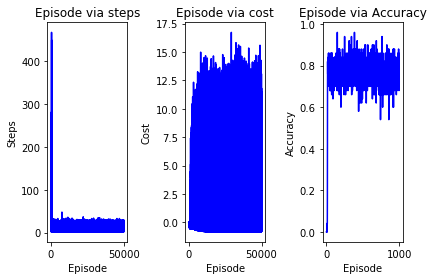

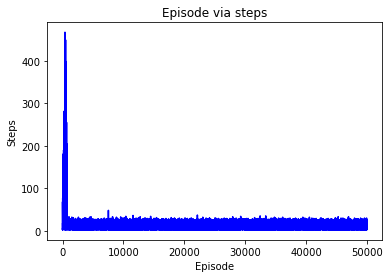

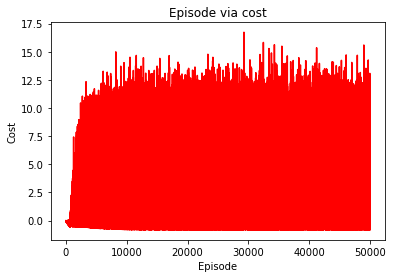

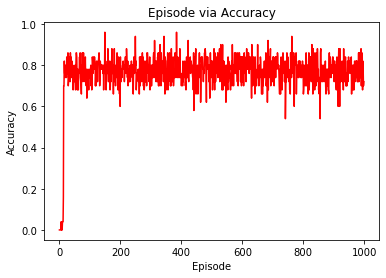

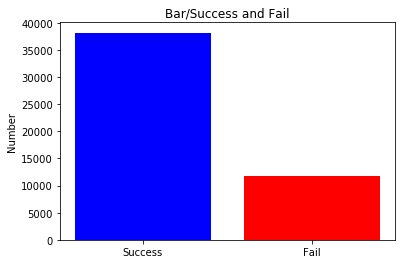

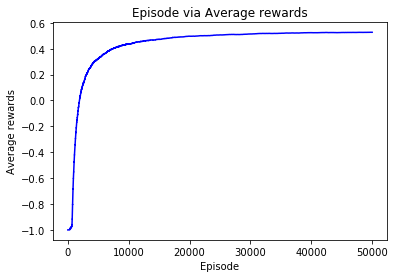

The shortest route: 18
The longest route: 398
correctness:1.0


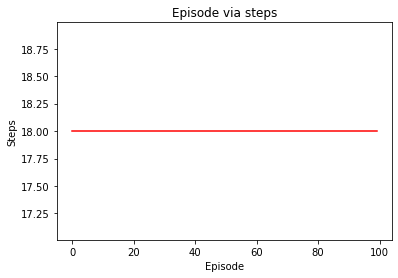

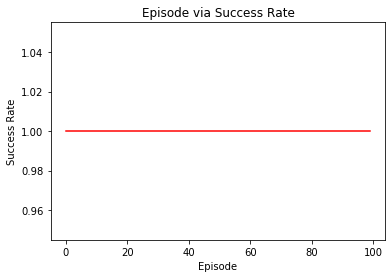

In [1]:
#10x10 frozen lake/Q learning
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

from Q_learning import Q_learning
from Environment import Environment
from Parameters import *

np.random.seed(1)

# Create an environment
env = Environment()

env.grid_size = 10

# Create a q learning agent
Q_learning = Q_learning(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

# Learning and updating
Q_table, steps, all_costs, accuracy, all_cost_bar, Reward_list = Q_learning.train()

Q_learning.plot_results(steps, all_costs, accuracy, all_cost_bar, Reward_list)

# Test after training
Q_learning.test()

# Remain visualization
env.mainloop()


## 4x4 frozen lake problem comparision test for Monte Carlo/SARSA/Q learning

### Change Job  == 0 before runnning, make sure GRID_SIZE == 4 and recommend NUM_EPISODES == 10000

## 10x10 frozen lake problem comparision test for Monte Carlo/SARSA/Q learning

### Change Job  == 1 before runnning, make sure GRID_SIZE == 10 and recommend NUM_EPISODES == 100000

Create 4x4 environment!
Episode finished after 53 timesteps
Episode finished after 47 timesteps
Episode finished after 84 timesteps
Episode finished after 80 timesteps
Episode finished after 34 timesteps
Episode finished after 68 timesteps
Episode finished after 12 timesteps
Episode finished after 5 timesteps
Episode finished after 15 timesteps
Episode finished after 47 timesteps
Episode finished after 53 timesteps
Episode finished after 13 timesteps
Episode finished after 57 timesteps
Episode finished after 30 timesteps
Episode finished after 29 timesteps
Episode finished after 5 timesteps
Episode finished after 86 timesteps
Episode finished after 81 timesteps
Episode finished after 51 timesteps
Episode finished after 8 timesteps
Episode finished after 98 timesteps
Episode finished after 18 timesteps
Episode finished after 72 timesteps
Episode finished after 69 timesteps
Episode finished after 9 timesteps
Episode finished after 55 timesteps
Episode finished after 72 timesteps
Episode 

Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 14 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished af

Episode finished after 6 timesteps
Episode finished after 2 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 4 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 8 timesteps
Episode finished after 3 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 6 timesteps
Episode finished after 7 timesteps
Episode finished after 6 timesteps
Episode finished aft

episodes:156
episodes:157
episodes:158
episodes:159
episodes:160
episodes:161
episodes:162
episodes:163
episodes:164
episodes:165
episodes:166
episodes:167
episodes:168
episodes:169
episodes:170
episodes:171
episodes:172
episodes:173
episodes:174
episodes:175
episodes:176
episodes:177
episodes:178
episodes:179
episodes:180
episodes:181
episodes:182
episodes:183
episodes:184
episodes:185
episodes:186
episodes:187
episodes:188
episodes:189
episodes:190
episodes:191
episodes:192
episodes:193
episodes:194
episodes:195
episodes:196
episodes:197
episodes:198
episodes:199
episodes:200
episodes:201
episodes:202
episodes:203
episodes:204
episodes:205
episodes:206
episodes:207
episodes:208
episodes:209
episodes:210
episodes:211
episodes:212
episodes:213
episodes:214
episodes:215
episodes:216
episodes:217
episodes:218
episodes:219
episodes:220
episodes:221
episodes:222
episodes:223
episodes:224
episodes:225
episodes:226
episodes:227
episodes:228
episodes:229
episodes:230
episodes:231
episodes:232

episodes:820
episodes:821
episodes:822
episodes:823
episodes:824
episodes:825
episodes:826
episodes:827
episodes:828
episodes:829
episodes:830
episodes:831
episodes:832
episodes:833
episodes:834
episodes:835
episodes:836
episodes:837
episodes:838
episodes:839
episodes:840
episodes:841
episodes:842
episodes:843
episodes:844
episodes:845
episodes:846
episodes:847
episodes:848
episodes:849
episodes:850
episodes:851
episodes:852
episodes:853
episodes:854
episodes:855
episodes:856
episodes:857
episodes:858
episodes:859
episodes:860
episodes:861
episodes:862
episodes:863
episodes:864
episodes:865
episodes:866
episodes:867
episodes:868
episodes:869
episodes:870
episodes:871
episodes:872
episodes:873
episodes:874
episodes:875
episodes:876
episodes:877
episodes:878
episodes:879
episodes:880
episodes:881
episodes:882
episodes:883
episodes:884
episodes:885
episodes:886
episodes:887
episodes:888
episodes:889
episodes:890
episodes:891
episodes:892
episodes:893
episodes:894
episodes:895
episodes:896

episode:499
episode:500
episode:501
episode:502
episode:503
episode:504
episode:505
episode:506
episode:507
episode:508
episode:509
episode:510
episode:511
episode:512
episode:513
episode:514
episode:515
episode:516
episode:517
episode:518
episode:519
episode:520
episode:521
episode:522
episode:523
episode:524
episode:525
episode:526
episode:527
episode:528
episode:529
episode:530
episode:531
episode:532
episode:533
episode:534
episode:535
episode:536
episode:537
episode:538
episode:539
episode:540
episode:541
episode:542
episode:543
episode:544
episode:545
episode:546
episode:547
episode:548
episode:549
episode:550
episode:551
episode:552
episode:553
episode:554
episode:555
episode:556
episode:557
episode:558
episode:559
episode:560
episode:561
episode:562
episode:563
episode:564
episode:565
episode:566
episode:567
episode:568
episode:569
episode:570
episode:571
episode:572
episode:573
episode:574
episode:575
episode:576
episode:577
episode:578
episode:579
episode:580
episode:581
epis

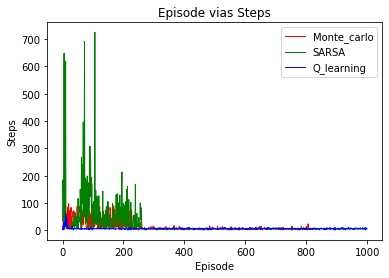

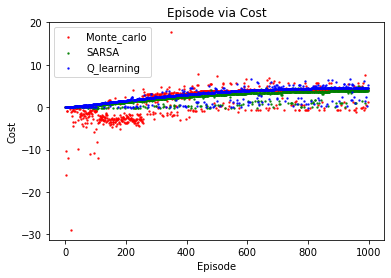

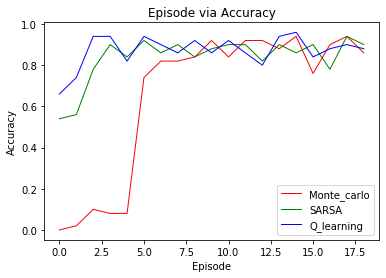

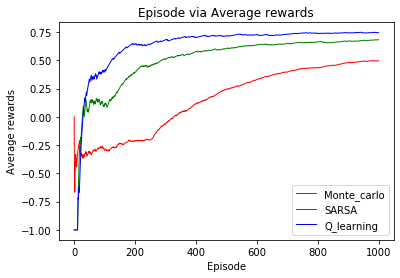

In [1]:
# 4x4 frozen lake problem comparision test for Monte Carlo/SARSA/Q learning
# Change Job index == 0 before runnning, make sure GRID_SIZE == 4 and recommend NUM_EPISODES == 10000
# 10X 10 frozen lake problem comparision test for Monte Carlo/SARSA/Q learning
# Change Job index == 1 before runnning, make sure GRID_SIZE == 10 and recommend NUM_EPISODES == 100000
import numpy as np
import matplotlib.pyplot as plt

from Environment import Environment
from Parameters import *
from First_visit_Monte_carlo_control import Monte_carlo
from SARSA import SARSA
from Q_learning import  Q_learning

np.random.seed(10)

# Define line plot functions
# Episodes via steps
def plot_steps(steps, label):
    plt.figure()
    plt.plot(np.arange(len(steps[0])), steps[0], 'r', label =label[0], linewidth=1)
    plt.plot(np.arange(len(steps[1])), steps[1], 'g', label =label[1], linewidth=1)
    plt.plot(np.arange(len(steps[2])), steps[2], 'b', label =label[2], linewidth=1)
    plt.title('Episode vias Steps')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.legend(loc='best')
    plt.show()

# Episodes via Costs
def plot_all_cost(all_cost, label):
    plt.figure()
    plt.plot(np.arange(len(all_cost[0])), all_cost[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(all_cost[1])), all_cost[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(all_cost[2])), all_cost[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Cost')
    plt.xlabel('Episode')
    plt.ylabel('Cost')
    plt.legend(loc='best')
    plt.show()

# Episodes via Accuracy
def plot_accuracy(accuracy, label):
    plt.figure()
    plt.plot(np.arange(len(accuracy[0])), accuracy[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(accuracy[1])), accuracy[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(accuracy[2])), accuracy[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Accuracy')
    plt.xlabel('Episode')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

# Episodes via Average Rewards
def plot_average_rewards(Reward_list, label):
    plt.figure()
    plt.plot(np.arange(len(Reward_list[0])), Reward_list[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(Reward_list[1])), Reward_list[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(Reward_list[2])), Reward_list[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Average rewards')
    plt.xlabel('Episode')
    plt.ylabel('Average rewards')
    plt.legend(loc='best')
    plt.show()


# Define scatter plot functions
def plot_steps_scatter(steps, label):
    plt.figure()
    plt.scatter(np.arange(len(steps[0])), steps[0], alpha=0.8, s=1.5, c='r', label =label[0])
    plt.scatter(np.arange(len(steps[1])), steps[1], alpha=0.8, s=1.5, c='g', label =label[1])
    plt.scatter(np.arange(len(steps[2])), steps[2], alpha=0.8, s=1.5, c='b', label =label[2])
    plt.title('Episode via Steps')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.legend(loc='best')
    plt.show()


def plot_all_cost_scatter(all_cost, label):
    plt.figure()
    plt.scatter(np.arange(len(all_cost[0])), all_cost[0], label=label[0], alpha=0.8, s=2, c='r')
    plt.scatter(np.arange(len(all_cost[1])), all_cost[1], label=label[1], alpha=0.8, s=2, c='g')
    plt.scatter(np.arange(len(all_cost[2])), all_cost[2], label=label[2], alpha=0.8, s=2, c='b')
    plt.title('Episode via Cost')
    plt.xlabel('Episode')
    plt.ylabel('Cost')
    plt.legend(loc='best')
    plt.show()


def plot_accuracy_scatter(accuracy, label):
    plt.figure()
    plt.scatter(np.arange(len(accuracy[0])), accuracy[0], alpha=0.8, s=1.5, c='r', label=label[0])
    plt.scatter(np.arange(len(accuracy[1])), accuracy[1], alpha=0.8, s=1.5, c='g', label=label[1])
    plt.scatter(np.arange(len(accuracy[2])), accuracy[2], alpha=0.8, s=1.5, c='b', label=label[2])
    plt.title('Episode via Accuracy')
    plt.xlabel('Episode')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()


def plot_average_rewards_scatter(Reward_list, label):
    plt.figure()
    plt.scatter(np.arange(len(Reward_list[0])), Reward_list[0], alpha=0.8, s=1.5, c='r', label=label[0])
    plt.scatter(np.arange(len(Reward_list[1])), Reward_list[1], alpha=0.8, s=1.5, c='g', label=label[1])
    plt.scatter(np.arange(len(Reward_list[2])), Reward_list[2], alpha=0.8, s=1.5, c='b', label=label[2])
    plt.title('Episode via Average rewards')
    plt.xlabel('Episode')
    plt.ylabel('Average rewards')
    plt.legend(loc='best')
    plt.show()



env = Environment()

env.grid_size = 4
# Create three agents corresponding to three algorithms
Monte_carlo = Monte_carlo(env, epsilon=EPSILON, gamma=GAMMA)

SARSA = SARSA(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

Q_learning = Q_learning(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

label_1 = ['Monte_carlo', 'SARSA', 'Q_learning']

Q_1, steps_1, all_cost_1, accuracy_1, all_cost_bar_1, Rewards_list_1  = Monte_carlo.fv_mc_prediction()


Q_2, steps_2, all_cost_2, accuracy_2, all_cost_bar_2, Rewards_list_2 = SARSA.train()


Q_3, steps_3, all_cost_3, accuracy_3, all_cost_bar_3, Rewards_list_3 = Q_learning.train()

steps = [steps_1, steps_2, steps_3]

all_cost = [all_cost_1, all_cost_2, all_cost_3]

accuracy = [accuracy_1, accuracy_2, accuracy_3]

Rewards_list = [Rewards_list_1, Rewards_list_2, Rewards_list_3]

plot_steps(steps, label_1)

plot_all_cost_scatter(all_cost, label_1)

plot_accuracy(accuracy, label_1)

plot_average_rewards(Rewards_list, label_1)

## 4x4 frozen lake problem/ Comparison test for different learning rate

###  Change Job  == 2 before runnning

Create 4x4 environment!
episode:0
episode:1
episode:2
episode:3
episode:4
episode:5
episode:6
episode:7
episode:8
episode:9
episode:10
episode:11
episode:12
episode:13
episode:14
episode:15
episode:16
episode:17
episode:18
episode:19
episode:20
episode:21
episode:22
episode:23
episode:24
episode:25
episode:26
episode:27
episode:28
episode:29
episode:30
episode:31
episode:32
episode:33
episode:34
episode:35
episode:36
episode:37
episode:38
episode:39
episode:40
episode:41
episode:42
episode:43
episode:44
episode:45
episode:46
episode:47
episode:48
episode:49
episode:50
episode:51
episode:52
episode:53
episode:54
episode:55
episode:56
episode:57
episode:58
episode:59
episode:60
episode:61
episode:62
episode:63
episode:64
episode:65
episode:66
episode:67
episode:68
episode:69
episode:70
episode:71
episode:72
episode:73
episode:74
episode:75
episode:76
episode:77
episode:78
episode:79
episode:80
episode:81
episode:82
episode:83
episode:84
episode:85
episode:86
episode:87
episode:88
episode

episode:710
episode:711
episode:712
episode:713
episode:714
episode:715
episode:716
episode:717
episode:718
episode:719
episode:720
episode:721
episode:722
episode:723
episode:724
episode:725
episode:726
episode:727
episode:728
episode:729
episode:730
episode:731
episode:732
episode:733
episode:734
episode:735
episode:736
episode:737
episode:738
episode:739
episode:740
episode:741
episode:742
episode:743
episode:744
episode:745
episode:746
episode:747
episode:748
episode:749
episode:750
episode:751
episode:752
episode:753
episode:754
episode:755
episode:756
episode:757
episode:758
episode:759
episode:760
episode:761
episode:762
episode:763
episode:764
episode:765
episode:766
episode:767
episode:768
episode:769
episode:770
episode:771
episode:772
episode:773
episode:774
episode:775
episode:776
episode:777
episode:778
episode:779
episode:780
episode:781
episode:782
episode:783
episode:784
episode:785
episode:786
episode:787
episode:788
episode:789
episode:790
episode:791
episode:792
epis

episode:325
episode:326
episode:327
episode:328
episode:329
episode:330
episode:331
episode:332
episode:333
episode:334
episode:335
episode:336
episode:337
episode:338
episode:339
episode:340
episode:341
episode:342
episode:343
episode:344
episode:345
episode:346
episode:347
episode:348
episode:349
episode:350
episode:351
episode:352
episode:353
episode:354
episode:355
episode:356
episode:357
episode:358
episode:359
episode:360
episode:361
episode:362
episode:363
episode:364
episode:365
episode:366
episode:367
episode:368
episode:369
episode:370
episode:371
episode:372
episode:373
episode:374
episode:375
episode:376
episode:377
episode:378
episode:379
episode:380
episode:381
episode:382
episode:383
episode:384
episode:385
episode:386
episode:387
episode:388
episode:389
episode:390
episode:391
episode:392
episode:393
episode:394
episode:395
episode:396
episode:397
episode:398
episode:399
episode:400
episode:401
episode:402
episode:403
episode:404
episode:405
episode:406
episode:407
epis

episode:13
episode:14
episode:15
episode:16
episode:17
episode:18
episode:19
episode:20
episode:21
episode:22
episode:23
episode:24
episode:25
episode:26
episode:27
episode:28
episode:29
episode:30
episode:31
episode:32
episode:33
episode:34
episode:35
episode:36
episode:37
episode:38
episode:39
episode:40
episode:41
episode:42
episode:43
episode:44
episode:45
episode:46
episode:47
episode:48
episode:49
episode:50
episode:51
episode:52
episode:53
episode:54
episode:55
episode:56
episode:57
episode:58
episode:59
episode:60
episode:61
episode:62
episode:63
episode:64
episode:65
episode:66
episode:67
episode:68
episode:69
episode:70
episode:71
episode:72
episode:73
episode:74
episode:75
episode:76
episode:77
episode:78
episode:79
episode:80
episode:81
episode:82
episode:83
episode:84
episode:85
episode:86
episode:87
episode:88
episode:89
episode:90
episode:91
episode:92
episode:93
episode:94
episode:95
episode:96
episode:97
episode:98
episode:99
episode:100
episode:101
episode:102
episode

episode:709
episode:710
episode:711
episode:712
episode:713
episode:714
episode:715
episode:716
episode:717
episode:718
episode:719
episode:720
episode:721
episode:722
episode:723
episode:724
episode:725
episode:726
episode:727
episode:728
episode:729
episode:730
episode:731
episode:732
episode:733
episode:734
episode:735
episode:736
episode:737
episode:738
episode:739
episode:740
episode:741
episode:742
episode:743
episode:744
episode:745
episode:746
episode:747
episode:748
episode:749
episode:750
episode:751
episode:752
episode:753
episode:754
episode:755
episode:756
episode:757
episode:758
episode:759
episode:760
episode:761
episode:762
episode:763
episode:764
episode:765
episode:766
episode:767
episode:768
episode:769
episode:770
episode:771
episode:772
episode:773
episode:774
episode:775
episode:776
episode:777
episode:778
episode:779
episode:780
episode:781
episode:782
episode:783
episode:784
episode:785
episode:786
episode:787
episode:788
episode:789
episode:790
episode:791
epis

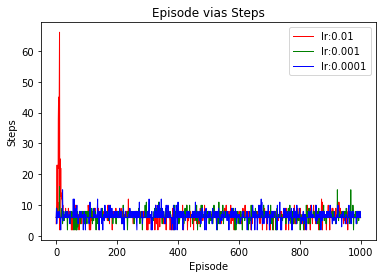

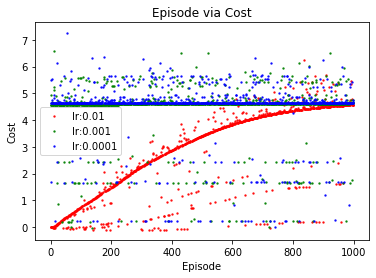

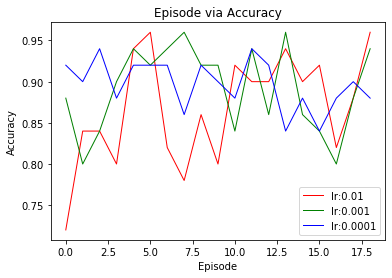

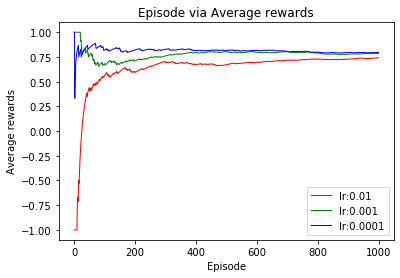

In [1]:
# 4x4 frozen lake problem/ q learning for different learning rate
# Change Job index == 2 before runnning
import numpy as np
import matplotlib.pyplot as plt

from Environment import Environment
from Parameters import *
from First_visit_Monte_carlo_control import Monte_carlo
from SARSA import SARSA
from Q_learning import  Q_learning

np.random.seed(10)

# Define line plot functions
# Episodes via steps
def plot_steps(steps, label):
    plt.figure()
    plt.plot(np.arange(len(steps[0])), steps[0], 'r', label =label[0], linewidth=1)
    plt.plot(np.arange(len(steps[1])), steps[1], 'g', label =label[1], linewidth=1)
    plt.plot(np.arange(len(steps[2])), steps[2], 'b', label =label[2], linewidth=1)
    plt.title('Episode vias Steps')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.legend(loc='best')
    plt.show()

# Episodes via Costs
def plot_all_cost(all_cost, label):
    plt.figure()
    plt.plot(np.arange(len(all_cost[0])), all_cost[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(all_cost[1])), all_cost[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(all_cost[2])), all_cost[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Cost')
    plt.xlabel('Episode')
    plt.ylabel('Cost')
    plt.legend(loc='best')
    plt.show()

# Episodes via Accuracy
def plot_accuracy(accuracy, label):
    plt.figure()
    plt.plot(np.arange(len(accuracy[0])), accuracy[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(accuracy[1])), accuracy[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(accuracy[2])), accuracy[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Accuracy')
    plt.xlabel('Episode')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

# Episodes via Average Rewards
def plot_average_rewards(Reward_list, label):
    plt.figure()
    plt.plot(np.arange(len(Reward_list[0])), Reward_list[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(Reward_list[1])), Reward_list[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(Reward_list[2])), Reward_list[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Average rewards')
    plt.xlabel('Episode')
    plt.ylabel('Average rewards')
    plt.legend(loc='best')
    plt.show()


# Define scatter plot functions
def plot_steps_scatter(steps, label):
    plt.figure()
    plt.scatter(np.arange(len(steps[0])), steps[0], alpha=0.8, s=1.5, c='r', label =label[0])
    plt.scatter(np.arange(len(steps[1])), steps[1], alpha=0.8, s=1.5, c='g', label =label[1])
    plt.scatter(np.arange(len(steps[2])), steps[2], alpha=0.8, s=1.5, c='b', label =label[2])
    plt.title('Episode via Steps')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.legend(loc='best')
    plt.show()


def plot_all_cost_scatter(all_cost, label):
    plt.figure()
    plt.scatter(np.arange(len(all_cost[0])), all_cost[0], label=label[0], alpha=0.8, s=2, c='r')
    plt.scatter(np.arange(len(all_cost[1])), all_cost[1], label=label[1], alpha=0.8, s=2, c='g')
    plt.scatter(np.arange(len(all_cost[2])), all_cost[2], label=label[2], alpha=0.8, s=2, c='b')
    plt.title('Episode via Cost')
    plt.xlabel('Episode')
    plt.ylabel('Cost')
    plt.legend(loc='best')
    plt.show()


def plot_accuracy_scatter(accuracy, label):
    plt.figure()
    plt.scatter(np.arange(len(accuracy[0])), accuracy[0], alpha=0.8, s=1.5, c='r', label=label[0])
    plt.scatter(np.arange(len(accuracy[1])), accuracy[1], alpha=0.8, s=1.5, c='g', label=label[1])
    plt.scatter(np.arange(len(accuracy[2])), accuracy[2], alpha=0.8, s=1.5, c='b', label=label[2])
    plt.title('Episode via Accuracy')
    plt.xlabel('Episode')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()


def plot_average_rewards_scatter(Reward_list, label):
    plt.figure()
    plt.scatter(np.arange(len(Reward_list[0])), Reward_list[0], alpha=0.8, s=1.5, c='r', label=label[0])
    plt.scatter(np.arange(len(Reward_list[1])), Reward_list[1], alpha=0.8, s=1.5, c='g', label=label[1])
    plt.scatter(np.arange(len(Reward_list[2])), Reward_list[2], alpha=0.8, s=1.5, c='b', label=label[2])
    plt.title('Episode via Average rewards')
    plt.xlabel('Episode')
    plt.ylabel('Average rewards')
    plt.legend(loc='best')
    plt.show()
    
    
    
env = Environment()

label_2 = ['lr:0.01', 'lr:0.001', 'lr:0.0001']

Q_learning = Q_learning(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

Q_learning.lr = 0.01

Q_1, steps_1, all_cost_1, accuracy_1, all_cost_bar_1, Rewards_list_1 = Q_learning.train()

Q_learning.lr = 0.001

Q_2, steps_2, all_cost_2, accuracy_2, all_cost_bar_2, Rewards_list_2 = Q_learning.train()

Q_learning.lr = 0.0001

Q_3, steps_3, all_cost_3, accuracy_3, all_cost_bar_3, Rewards_list_3 = Q_learning.train()

steps = [steps_1, steps_2, steps_3]

all_cost = [all_cost_1, all_cost_2, all_cost_3]

accuracy = [accuracy_1, accuracy_2, accuracy_3]

Rewards_list = [Rewards_list_1, Rewards_list_2, Rewards_list_3]

plot_steps(steps, label_2)

plot_all_cost_scatter(all_cost, label_2)

plot_accuracy(accuracy, label_2)

plot_average_rewards(Rewards_list, label_2)

## 4x4 frozen lake problem/ Comparison test for Discount factor

### Change Job  == 3 before runnning

Create 4x4 environment!
episode:0
episode:1
episode:2
episode:3
episode:4
episode:5
episode:6
episode:7
episode:8
episode:9
episode:10
episode:11
episode:12
episode:13
episode:14
episode:15
episode:16
episode:17
episode:18
episode:19
episode:20
episode:21
episode:22
episode:23
episode:24
episode:25
episode:26
episode:27
episode:28
episode:29
episode:30
episode:31
episode:32
episode:33
episode:34
episode:35
episode:36
episode:37
episode:38
episode:39
episode:40
episode:41
episode:42
episode:43
episode:44
episode:45
episode:46
episode:47
episode:48
episode:49
episode:50
episode:51
episode:52
episode:53
episode:54
episode:55
episode:56
episode:57
episode:58
episode:59
episode:60
episode:61
episode:62
episode:63
episode:64
episode:65
episode:66
episode:67
episode:68
episode:69
episode:70
episode:71
episode:72
episode:73
episode:74
episode:75
episode:76
episode:77
episode:78
episode:79
episode:80
episode:81
episode:82
episode:83
episode:84
episode:85
episode:86
episode:87
episode:88
episode

episode:701
episode:702
episode:703
episode:704
episode:705
episode:706
episode:707
episode:708
episode:709
episode:710
episode:711
episode:712
episode:713
episode:714
episode:715
episode:716
episode:717
episode:718
episode:719
episode:720
episode:721
episode:722
episode:723
episode:724
episode:725
episode:726
episode:727
episode:728
episode:729
episode:730
episode:731
episode:732
episode:733
episode:734
episode:735
episode:736
episode:737
episode:738
episode:739
episode:740
episode:741
episode:742
episode:743
episode:744
episode:745
episode:746
episode:747
episode:748
episode:749
episode:750
episode:751
episode:752
episode:753
episode:754
episode:755
episode:756
episode:757
episode:758
episode:759
episode:760
episode:761
episode:762
episode:763
episode:764
episode:765
episode:766
episode:767
episode:768
episode:769
episode:770
episode:771
episode:772
episode:773
episode:774
episode:775
episode:776
episode:777
episode:778
episode:779
episode:780
episode:781
episode:782
episode:783
epis

episode:328
episode:329
episode:330
episode:331
episode:332
episode:333
episode:334
episode:335
episode:336
episode:337
episode:338
episode:339
episode:340
episode:341
episode:342
episode:343
episode:344
episode:345
episode:346
episode:347
episode:348
episode:349
episode:350
episode:351
episode:352
episode:353
episode:354
episode:355
episode:356
episode:357
episode:358
episode:359
episode:360
episode:361
episode:362
episode:363
episode:364
episode:365
episode:366
episode:367
episode:368
episode:369
episode:370
episode:371
episode:372
episode:373
episode:374
episode:375
episode:376
episode:377
episode:378
episode:379
episode:380
episode:381
episode:382
episode:383
episode:384
episode:385
episode:386
episode:387
episode:388
episode:389
episode:390
episode:391
episode:392
episode:393
episode:394
episode:395
episode:396
episode:397
episode:398
episode:399
episode:400
episode:401
episode:402
episode:403
episode:404
episode:405
episode:406
episode:407
episode:408
episode:409
episode:410
epis

episode:12
episode:13
episode:14
episode:15
episode:16
episode:17
episode:18
episode:19
episode:20
episode:21
episode:22
episode:23
episode:24
episode:25
episode:26
episode:27
episode:28
episode:29
episode:30
episode:31
episode:32
episode:33
episode:34
episode:35
episode:36
episode:37
episode:38
episode:39
episode:40
episode:41
episode:42
episode:43
episode:44
episode:45
episode:46
episode:47
episode:48
episode:49
episode:50
episode:51
episode:52
episode:53
episode:54
episode:55
episode:56
episode:57
episode:58
episode:59
episode:60
episode:61
episode:62
episode:63
episode:64
episode:65
episode:66
episode:67
episode:68
episode:69
episode:70
episode:71
episode:72
episode:73
episode:74
episode:75
episode:76
episode:77
episode:78
episode:79
episode:80
episode:81
episode:82
episode:83
episode:84
episode:85
episode:86
episode:87
episode:88
episode:89
episode:90
episode:91
episode:92
episode:93
episode:94
episode:95
episode:96
episode:97
episode:98
episode:99
episode:100
episode:101
episode:

episode:725
episode:726
episode:727
episode:728
episode:729
episode:730
episode:731
episode:732
episode:733
episode:734
episode:735
episode:736
episode:737
episode:738
episode:739
episode:740
episode:741
episode:742
episode:743
episode:744
episode:745
episode:746
episode:747
episode:748
episode:749
episode:750
episode:751
episode:752
episode:753
episode:754
episode:755
episode:756
episode:757
episode:758
episode:759
episode:760
episode:761
episode:762
episode:763
episode:764
episode:765
episode:766
episode:767
episode:768
episode:769
episode:770
episode:771
episode:772
episode:773
episode:774
episode:775
episode:776
episode:777
episode:778
episode:779
episode:780
episode:781
episode:782
episode:783
episode:784
episode:785
episode:786
episode:787
episode:788
episode:789
episode:790
episode:791
episode:792
episode:793
episode:794
episode:795
episode:796
episode:797
episode:798
episode:799
episode:800
episode:801
episode:802
episode:803
episode:804
episode:805
episode:806
episode:807
epis

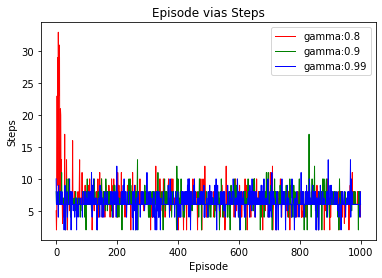

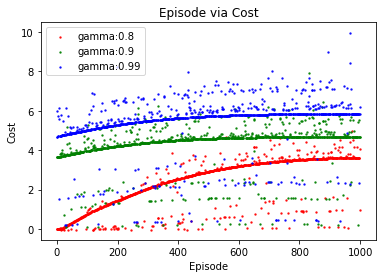

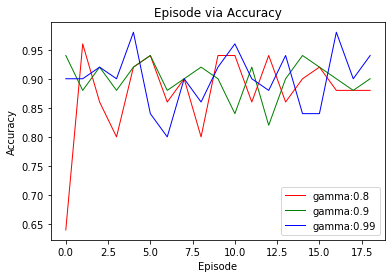

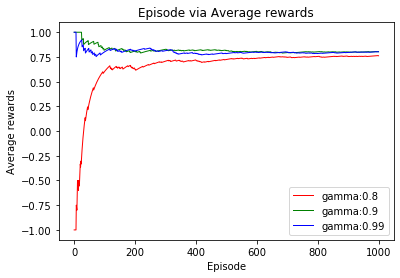

In [1]:
# 4z4 frozen lake problem/Q learning for different discount factor
# Change Job index == 3 before runnning
import numpy as np
import matplotlib.pyplot as plt

from Environment import Environment
from Parameters import *
from First_visit_Monte_carlo_control import Monte_carlo
from SARSA import SARSA
from Q_learning import  Q_learning
np.random.seed(1)

# Define line plot functions
# Episodes via steps
def plot_steps(steps, label):
    plt.figure()
    plt.plot(np.arange(len(steps[0])), steps[0], 'r', label =label[0], linewidth=1)
    plt.plot(np.arange(len(steps[1])), steps[1], 'g', label =label[1], linewidth=1)
    plt.plot(np.arange(len(steps[2])), steps[2], 'b', label =label[2], linewidth=1)
    plt.title('Episode vias Steps')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.legend(loc='best')
    plt.show()

# Episodes via Costs
def plot_all_cost(all_cost, label):
    plt.figure()
    plt.plot(np.arange(len(all_cost[0])), all_cost[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(all_cost[1])), all_cost[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(all_cost[2])), all_cost[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Cost')
    plt.xlabel('Episode')
    plt.ylabel('Cost')
    plt.legend(loc='best')
    plt.show()

# Episodes via Accuracy
def plot_accuracy(accuracy, label):
    plt.figure()
    plt.plot(np.arange(len(accuracy[0])), accuracy[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(accuracy[1])), accuracy[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(accuracy[2])), accuracy[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Accuracy')
    plt.xlabel('Episode')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

# Episodes via Average Rewards
def plot_average_rewards(Reward_list, label):
    plt.figure()
    plt.plot(np.arange(len(Reward_list[0])), Reward_list[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(Reward_list[1])), Reward_list[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(Reward_list[2])), Reward_list[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Average rewards')
    plt.xlabel('Episode')
    plt.ylabel('Average rewards')
    plt.legend(loc='best')
    plt.show()


# Define scatter plot functions
def plot_steps_scatter(steps, label):
    plt.figure()
    plt.scatter(np.arange(len(steps[0])), steps[0], alpha=0.8, s=1.5, c='r', label =label[0])
    plt.scatter(np.arange(len(steps[1])), steps[1], alpha=0.8, s=1.5, c='g', label =label[1])
    plt.scatter(np.arange(len(steps[2])), steps[2], alpha=0.8, s=1.5, c='b', label =label[2])
    plt.title('Episode via Steps')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.legend(loc='best')
    plt.show()


def plot_all_cost_scatter(all_cost, label):
    plt.figure()
    plt.scatter(np.arange(len(all_cost[0])), all_cost[0], label=label[0], alpha=0.8, s=2, c='r')
    plt.scatter(np.arange(len(all_cost[1])), all_cost[1], label=label[1], alpha=0.8, s=2, c='g')
    plt.scatter(np.arange(len(all_cost[2])), all_cost[2], label=label[2], alpha=0.8, s=2, c='b')
    plt.title('Episode via Cost')
    plt.xlabel('Episode')
    plt.ylabel('Cost')
    plt.legend(loc='best')
    plt.show()


def plot_accuracy_scatter(accuracy, label):
    plt.figure()
    plt.scatter(np.arange(len(accuracy[0])), accuracy[0], alpha=0.8, s=1.5, c='r', label=label[0])
    plt.scatter(np.arange(len(accuracy[1])), accuracy[1], alpha=0.8, s=1.5, c='g', label=label[1])
    plt.scatter(np.arange(len(accuracy[2])), accuracy[2], alpha=0.8, s=1.5, c='b', label=label[2])
    plt.title('Episode via Accuracy')
    plt.xlabel('Episode')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()


def plot_average_rewards_scatter(Reward_list, label):
    plt.figure()
    plt.scatter(np.arange(len(Reward_list[0])), Reward_list[0], alpha=0.8, s=1.5, c='r', label=label[0])
    plt.scatter(np.arange(len(Reward_list[1])), Reward_list[1], alpha=0.8, s=1.5, c='g', label=label[1])
    plt.scatter(np.arange(len(Reward_list[2])), Reward_list[2], alpha=0.8, s=1.5, c='b', label=label[2])
    plt.title('Episode via Average rewards')
    plt.xlabel('Episode')
    plt.ylabel('Average rewards')
    plt.legend(loc='best')
    plt.show()
    
    
env = Environment()

label_3 = ['gamma:0.8', 'gamma:0.9', 'gamma:0.99']

Q_learning = Q_learning(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

Q_learning.gamma = 0.8
Q_1, steps_1, all_cost_1, accuracy_1, all_cost_bar_1, Rewards_list_1  =  Q_learning.train()

Q_learning.gamma = 0.9
Q_2, steps_2, all_cost_2, accuracy_2, all_cost_bar_2, Rewards_list_2 =  Q_learning.train()

Q_learning.gamma = 0.99
Q_3, steps_3, all_cost_3, accuracy_3, all_cost_bar_3, Rewards_list_3 = Q_learning.train()

steps = [steps_1, steps_2, steps_3]

all_cost = [all_cost_1, all_cost_2, all_cost_3]

accuracy = [accuracy_1, accuracy_2, accuracy_3]

Rewards_list = [Rewards_list_1, Rewards_list_2, Rewards_list_3]

plot_steps(steps, label_3)

plot_all_cost_scatter(all_cost, label_3)

plot_accuracy(accuracy, label_3)

plot_average_rewards(Rewards_list, label_3)

## 4x4 frozen lake problem/ Comparison test for Epsilon

### Change Job  == 4 before runnning

Create 4x4 environment!
episode:0
episode:1
episode:2
episode:3
episode:4
episode:5
episode:6
episode:7
episode:8
episode:9
episode:10
episode:11
episode:12
episode:13
episode:14
episode:15
episode:16
episode:17
episode:18
episode:19
episode:20
episode:21
episode:22
episode:23
episode:24
episode:25
episode:26
episode:27
episode:28
episode:29
episode:30
episode:31
episode:32
episode:33
episode:34
episode:35
episode:36
episode:37
episode:38
episode:39
episode:40
episode:41
episode:42
episode:43
episode:44
episode:45
episode:46
episode:47
episode:48
episode:49
episode:50
episode:51
episode:52
episode:53
episode:54
episode:55
episode:56
episode:57
episode:58
episode:59
episode:60
episode:61
episode:62
episode:63
episode:64
episode:65
episode:66
episode:67
episode:68
episode:69
episode:70
episode:71
episode:72
episode:73
episode:74
episode:75
episode:76
episode:77
episode:78
episode:79
episode:80
episode:81
episode:82
episode:83
episode:84
episode:85
episode:86
episode:87
episode:88
episode

episode:701
episode:702
episode:703
episode:704
episode:705
episode:706
episode:707
episode:708
episode:709
episode:710
episode:711
episode:712
episode:713
episode:714
episode:715
episode:716
episode:717
episode:718
episode:719
episode:720
episode:721
episode:722
episode:723
episode:724
episode:725
episode:726
episode:727
episode:728
episode:729
episode:730
episode:731
episode:732
episode:733
episode:734
episode:735
episode:736
episode:737
episode:738
episode:739
episode:740
episode:741
episode:742
episode:743
episode:744
episode:745
episode:746
episode:747
episode:748
episode:749
episode:750
episode:751
episode:752
episode:753
episode:754
episode:755
episode:756
episode:757
episode:758
episode:759
episode:760
episode:761
episode:762
episode:763
episode:764
episode:765
episode:766
episode:767
episode:768
episode:769
episode:770
episode:771
episode:772
episode:773
episode:774
episode:775
episode:776
episode:777
episode:778
episode:779
episode:780
episode:781
episode:782
episode:783
epis

episode:326
episode:327
episode:328
episode:329
episode:330
episode:331
episode:332
episode:333
episode:334
episode:335
episode:336
episode:337
episode:338
episode:339
episode:340
episode:341
episode:342
episode:343
episode:344
episode:345
episode:346
episode:347
episode:348
episode:349
episode:350
episode:351
episode:352
episode:353
episode:354
episode:355
episode:356
episode:357
episode:358
episode:359
episode:360
episode:361
episode:362
episode:363
episode:364
episode:365
episode:366
episode:367
episode:368
episode:369
episode:370
episode:371
episode:372
episode:373
episode:374
episode:375
episode:376
episode:377
episode:378
episode:379
episode:380
episode:381
episode:382
episode:383
episode:384
episode:385
episode:386
episode:387
episode:388
episode:389
episode:390
episode:391
episode:392
episode:393
episode:394
episode:395
episode:396
episode:397
episode:398
episode:399
episode:400
episode:401
episode:402
episode:403
episode:404
episode:405
episode:406
episode:407
episode:408
epis

episode:2
episode:3
episode:4
episode:5
episode:6
episode:7
episode:8
episode:9
episode:10
episode:11
episode:12
episode:13
episode:14
episode:15
episode:16
episode:17
episode:18
episode:19
episode:20
episode:21
episode:22
episode:23
episode:24
episode:25
episode:26
episode:27
episode:28
episode:29
episode:30
episode:31
episode:32
episode:33
episode:34
episode:35
episode:36
episode:37
episode:38
episode:39
episode:40
episode:41
episode:42
episode:43
episode:44
episode:45
episode:46
episode:47
episode:48
episode:49
episode:50
episode:51
episode:52
episode:53
episode:54
episode:55
episode:56
episode:57
episode:58
episode:59
episode:60
episode:61
episode:62
episode:63
episode:64
episode:65
episode:66
episode:67
episode:68
episode:69
episode:70
episode:71
episode:72
episode:73
episode:74
episode:75
episode:76
episode:77
episode:78
episode:79
episode:80
episode:81
episode:82
episode:83
episode:84
episode:85
episode:86
episode:87
episode:88
episode:89
episode:90
episode:91
episode:92
episode

episode:713
episode:714
episode:715
episode:716
episode:717
episode:718
episode:719
episode:720
episode:721
episode:722
episode:723
episode:724
episode:725
episode:726
episode:727
episode:728
episode:729
episode:730
episode:731
episode:732
episode:733
episode:734
episode:735
episode:736
episode:737
episode:738
episode:739
episode:740
episode:741
episode:742
episode:743
episode:744
episode:745
episode:746
episode:747
episode:748
episode:749
episode:750
episode:751
episode:752
episode:753
episode:754
episode:755
episode:756
episode:757
episode:758
episode:759
episode:760
episode:761
episode:762
episode:763
episode:764
episode:765
episode:766
episode:767
episode:768
episode:769
episode:770
episode:771
episode:772
episode:773
episode:774
episode:775
episode:776
episode:777
episode:778
episode:779
episode:780
episode:781
episode:782
episode:783
episode:784
episode:785
episode:786
episode:787
episode:788
episode:789
episode:790
episode:791
episode:792
episode:793
episode:794
episode:795
epis

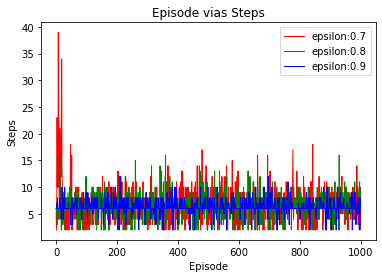

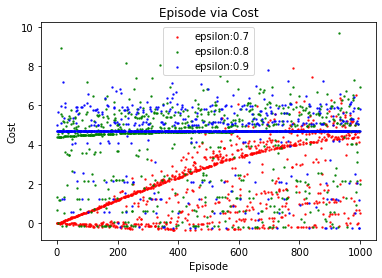

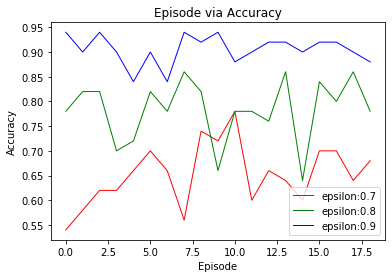

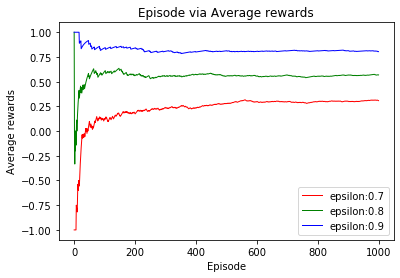

In [1]:
# 4z4 frozen lake problem/ q learning for different epsilon
# Change Job index == 4 before runnning
import numpy as np
import matplotlib.pyplot as plt

from Environment import Environment
from Parameters import *
from First_visit_Monte_carlo_control import Monte_carlo
from SARSA import SARSA
from Q_learning import  Q_learning
np.random.seed(1)

# Define line plot functions
# Episodes via steps
def plot_steps(steps, label):
    plt.figure()
    plt.plot(np.arange(len(steps[0])), steps[0], 'r', label =label[0], linewidth=1)
    plt.plot(np.arange(len(steps[1])), steps[1], 'g', label =label[1], linewidth=1)
    plt.plot(np.arange(len(steps[2])), steps[2], 'b', label =label[2], linewidth=1)
    plt.title('Episode vias Steps')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.legend(loc='best')
    plt.show()

# Episodes via Costs
def plot_all_cost(all_cost, label):
    plt.figure()
    plt.plot(np.arange(len(all_cost[0])), all_cost[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(all_cost[1])), all_cost[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(all_cost[2])), all_cost[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Cost')
    plt.xlabel('Episode')
    plt.ylabel('Cost')
    plt.legend(loc='best')
    plt.show()

# Episodes via Accuracy
def plot_accuracy(accuracy, label):
    plt.figure()
    plt.plot(np.arange(len(accuracy[0])), accuracy[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(accuracy[1])), accuracy[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(accuracy[2])), accuracy[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Accuracy')
    plt.xlabel('Episode')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

# Episodes via Average Rewards
def plot_average_rewards(Reward_list, label):
    plt.figure()
    plt.plot(np.arange(len(Reward_list[0])), Reward_list[0], 'r', label=label[0], linewidth=1)
    plt.plot(np.arange(len(Reward_list[1])), Reward_list[1], 'g', label=label[1], linewidth=1)
    plt.plot(np.arange(len(Reward_list[2])), Reward_list[2], 'b', label=label[2], linewidth=1)
    plt.title('Episode via Average rewards')
    plt.xlabel('Episode')
    plt.ylabel('Average rewards')
    plt.legend(loc='best')
    plt.show()


# Define scatter plot functions
def plot_steps_scatter(steps, label):
    plt.figure()
    plt.scatter(np.arange(len(steps[0])), steps[0], alpha=0.8, s=1.5, c='r', label =label[0])
    plt.scatter(np.arange(len(steps[1])), steps[1], alpha=0.8, s=1.5, c='g', label =label[1])
    plt.scatter(np.arange(len(steps[2])), steps[2], alpha=0.8, s=1.5, c='b', label =label[2])
    plt.title('Episode via Steps')
    plt.xlabel('Episode')
    plt.ylabel('Steps')
    plt.legend(loc='best')
    plt.show()


def plot_all_cost_scatter(all_cost, label):
    plt.figure()
    plt.scatter(np.arange(len(all_cost[0])), all_cost[0], label=label[0], alpha=0.8, s=2, c='r')
    plt.scatter(np.arange(len(all_cost[1])), all_cost[1], label=label[1], alpha=0.8, s=2, c='g')
    plt.scatter(np.arange(len(all_cost[2])), all_cost[2], label=label[2], alpha=0.8, s=2, c='b')
    plt.title('Episode via Cost')
    plt.xlabel('Episode')
    plt.ylabel('Cost')
    plt.legend(loc='best')
    plt.show()


def plot_accuracy_scatter(accuracy, label):
    plt.figure()
    plt.scatter(np.arange(len(accuracy[0])), accuracy[0], alpha=0.8, s=1.5, c='r', label=label[0])
    plt.scatter(np.arange(len(accuracy[1])), accuracy[1], alpha=0.8, s=1.5, c='g', label=label[1])
    plt.scatter(np.arange(len(accuracy[2])), accuracy[2], alpha=0.8, s=1.5, c='b', label=label[2])
    plt.title('Episode via Accuracy')
    plt.xlabel('Episode')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()


def plot_average_rewards_scatter(Reward_list, label):
    plt.figure()
    plt.scatter(np.arange(len(Reward_list[0])), Reward_list[0], alpha=0.8, s=1.5, c='r', label=label[0])
    plt.scatter(np.arange(len(Reward_list[1])), Reward_list[1], alpha=0.8, s=1.5, c='g', label=label[1])
    plt.scatter(np.arange(len(Reward_list[2])), Reward_list[2], alpha=0.8, s=1.5, c='b', label=label[2])
    plt.title('Episode via Average rewards')
    plt.xlabel('Episode')
    plt.ylabel('Average rewards')
    plt.legend(loc='best')
    plt.show()
    

env = Environment()

label_4 = ['epsilon:0.7', 'epsilon:0.8', 'epsilon:0.9']

Q_learning = Q_learning(env, learning_rate=LEARNING_RATE, gamma=GAMMA, epsilon=EPSILON)

Q_learning.epsilon = 0.7
Q_1, steps_1, all_cost_1, accuracy_1, all_cost_bar_1, Rewards_list_1 = Q_learning.train()

Q_learning.epsilon = 0.8
Q_2, steps_2, all_cost_2, accuracy_2, all_cost_bar_2, Rewards_list_2 = Q_learning.train()

Q_learning.epsilon = 0.9
Q_3, steps_3, all_cost_3, accuracy_3, all_cost_bar_3, Rewards_list_3 = Q_learning.train()

steps = [steps_1, steps_2, steps_3]

all_cost = [all_cost_1, all_cost_2, all_cost_3]

accuracy = [accuracy_1, accuracy_2, accuracy_3]

Rewards_list = [Rewards_list_1, Rewards_list_2, Rewards_list_3]

plot_steps(steps, label_4)

plot_all_cost_scatter(all_cost, label_4)

plot_accuracy(accuracy, label_4)

plot_average_rewards(Rewards_list, label_4)
